In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
from google.colab import files

print("⬆️ Upload your kaggle.json here")
uploaded = files.upload()

for fn in uploaded.keys():
    !cp {fn} ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle authentication success ✔")


⬆️ Upload your kaggle.json here


Saving kaggle.json to kaggle.json
Kaggle authentication success ✔


In [ ]:
import os

base_path = "/content/drive/MyDrive/HAM10000"
images_path = f"{base_path}/images"
masks_path = f"{base_path}/masks"

os.makedirs(images_path, exist_ok=True)
os.makedirs(masks_path, exist_ok=True)

print("Folders created successfully ✔")


Folders created successfully ✔


In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p "/content/"


Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.19G/5.20G [01:09<00:00, 82.7MB/s]
100% 5.20G/5.20G [01:09<00:00, 80.2MB/s]


In [ ]:
import zipfile
import glob

zip_files = glob.glob("/content/*.zip")
zip_files


['/content/skin-cancer-mnist-ham10000.zip']

In [ ]:
# Extract all ZIP files
for z in zip_files:
    print(f"Extracting: {z}")
    with zipfile.ZipFile(z, 'r') as zip_ref:
        zip_ref.extractall("/content/HAM10000_raw/")


Extracting: /content/skin-cancer-mnist-ham10000.zip


In [ ]:
import shutil

raw_path = "/content/HAM10000_raw"

# Move images
for p in ["HAM10000_images_part_1", "HAM10000_images_part_2"]:
    img_dir = f"{raw_path}/{p}/"
    if os.path.exists(img_dir):
        for img in os.listdir(img_dir):
            shutil.copy(f"{img_dir}/{img}", images_path)

# Move masks
mask_dir = f"{raw_path}/HAM10000_segmentations_lesion_tschandl/"
if os.path.exists(mask_dir):
    for m in os.listdir(mask_dir):
        shutil.copy(f"{mask_dir}/{m}", masks_path)

print("Images & masks successfully copied to Google Drive ✔")


Images & masks successfully copied to Google Drive ✔


In [ ]:
import shutil

metadata_src = "/content/HAM10000_raw/HAM10000_metadata.csv"
metadata_dst = f"{base_path}/metadata.csv"

if os.path.exists(metadata_src):
    shutil.copy(metadata_src, metadata_dst)
    print("metadata.csv saved ✔")
else:
    print("metadata.csv not found ❌")


metadata.csv saved ✔


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
sns.set_context("paper", font_scale=1.4)

def save_fig(name):
    plt.savefig(f"/content/drive/MyDrive/HAM10000/figures/{name}.png",
                dpi=600, bbox_inches='tight')


In [ ]:
import os

base_path = "/content/drive/MyDrive/HAM10000"
fig_path = f"{base_path}/figures"

os.makedirs(base_path, exist_ok=True)
os.makedirs(fig_path, exist_ok=True)

print("Folders created:", base_path, fig_path)


Folders created: /content/drive/MyDrive/HAM10000 /content/drive/MyDrive/HAM10000/figures


In [ ]:
def save_fig(name):
    plt.savefig(f"/content/drive/MyDrive/HAM10000/figures/{name}.png",
                dpi=600, bbox_inches='tight')


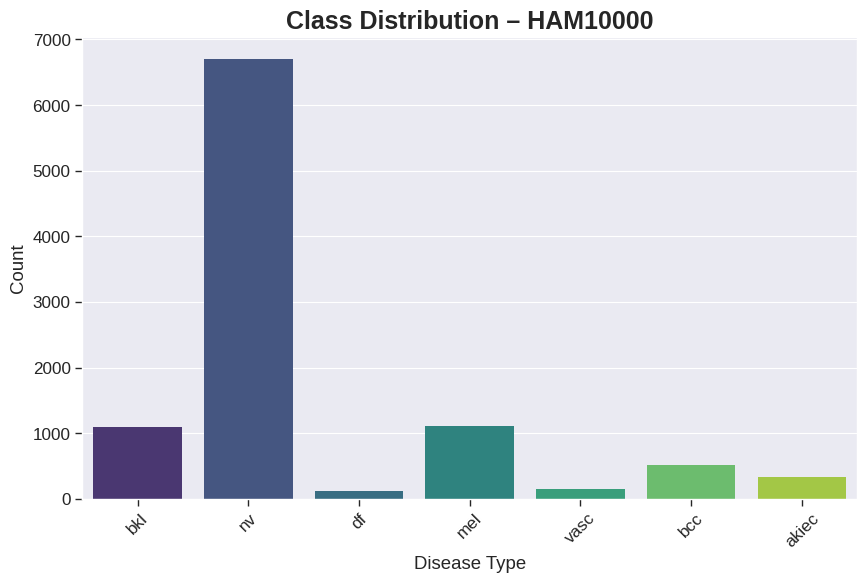

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='dx', hue='dx', legend=False, palette="viridis")
plt.title("Class Distribution – HAM10000", fontsize=18, weight='bold')
plt.xlabel("Disease Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
save_fig("class_distribution")
plt.show()


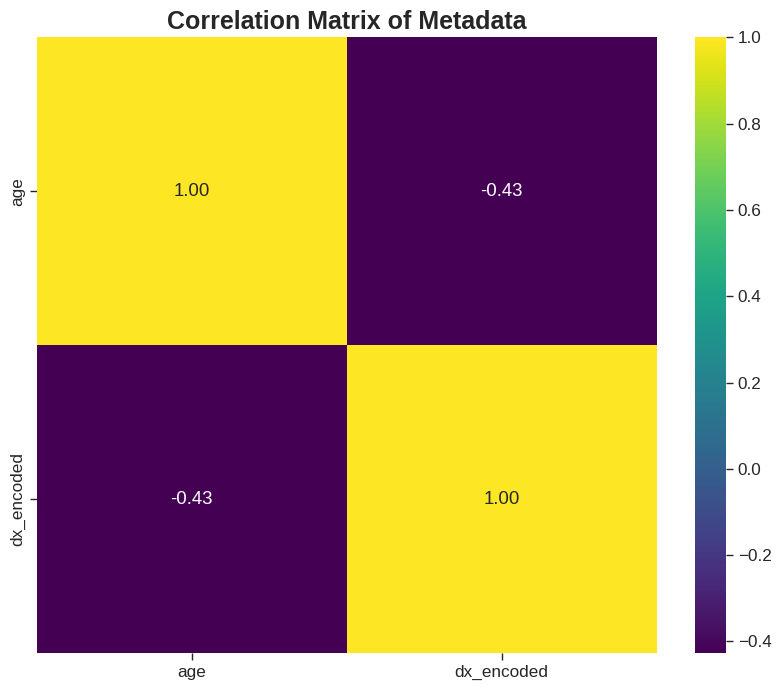

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

numerical_df = df[['age', 'dx_encoded']].copy()
corr = numerical_df.corr()

sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix of Metadata", fontsize=18, weight='bold')
save_fig("correlation_matrix")
plt.show()


/tmp/ipython-input-915829964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dx', y='age', palette='viridis')


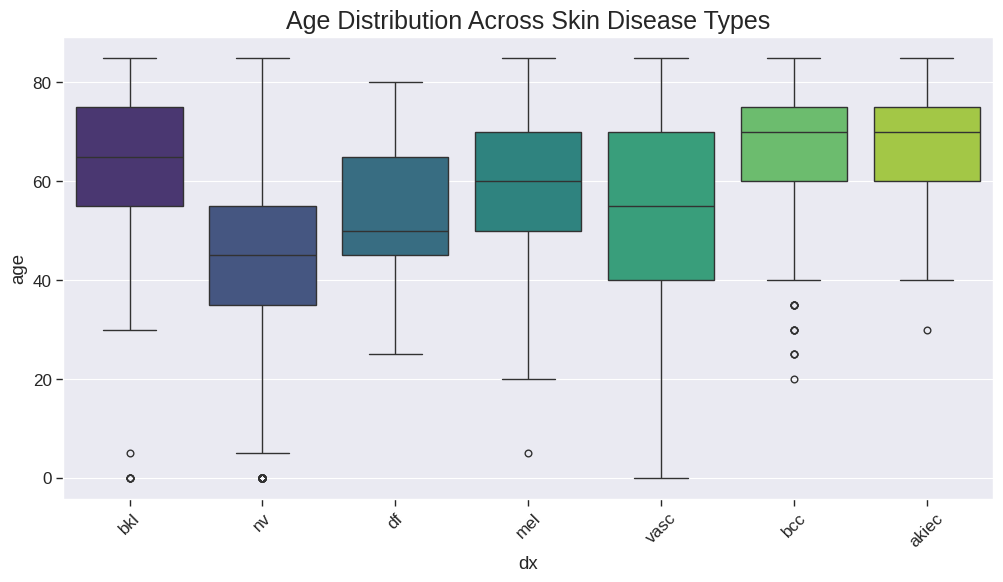

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='dx', y='age', palette='viridis')
plt.title("Age Distribution Across Skin Disease Types", fontsize=18)
plt.xticks(rotation=45)
save_fig("age_disease_boxplot")
plt.show()


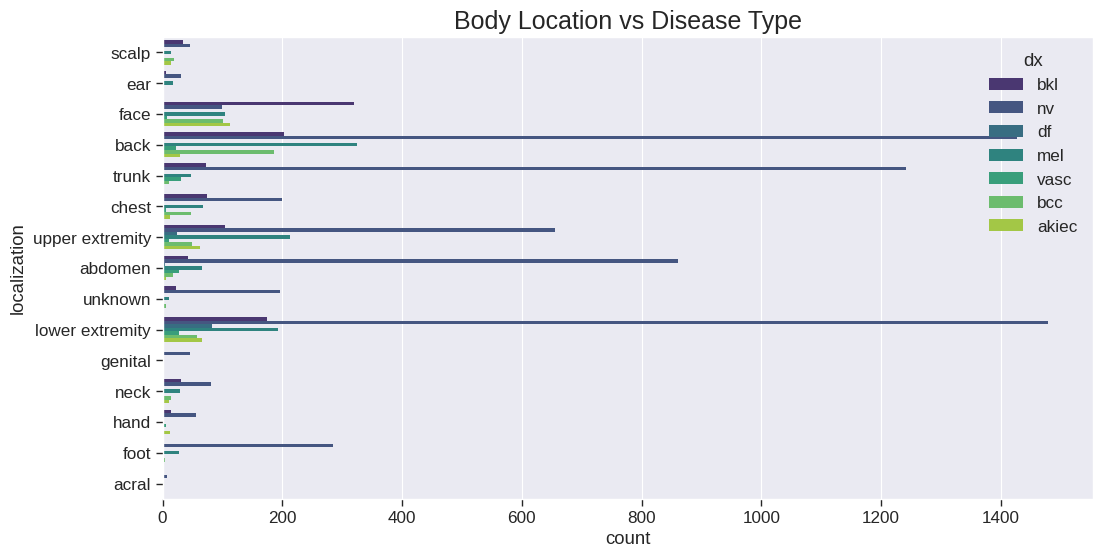

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='localization', hue='dx', palette='viridis')
plt.title("Body Location vs Disease Type", fontsize=18)
save_fig("body_location_distribution")
plt.show()


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
from tqdm import tqdm

model = EfficientNetB0(include_top=False, pooling='avg', weights='imagenet')

deep_features = []

for img_id in tqdm(df['image_id']):
    path = f"/content/drive/MyDrive/HAM10000/images/{img_id}.jpg"
    img = image.load_img(path, target_size=(224,224))
    x = image.img_to_array(img)
    x = preprocess_input(x)
    feat = model.predict(np.expand_dims(x, axis=0))[0]
    deep_features.append(feat)

deep_features = np.array(deep_features)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


  0%|          | 0/10015 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


  0%|          | 1/10015 [00:03<10:02:19,  3.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  0%|          | 2/10015 [00:03<4:30:55,  1.62s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  0%|          | 3/10015 [00:04<2:44:42,  1.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  0%|          | 4/10015 [00:04<1:53:56,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  0%|          | 5/10015 [00:04<1:24:53,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  0%|          | 6/10015 [00:04<1:06:39,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  0%|          | 7/10015 [00:04<56:46,  2.94it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  0%|          | 8/10015 [00:05<49:23,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  0%|          | 9/10015 [00:05<45:55,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  0%|          | 10/10015 [00:05<43:57,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  0%|          | 11/10015 [00:05<40:26,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  0%|          | 12/10015 [00:05<37:39,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  0%|          | 13/10015 [00:06<38:22,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  0%|          | 14/10015 [00:06<38:12,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  0%|          | 15/10015 [00:06<36:18,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  0%|          | 16/10015 [00:06<34:57,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  0%|          | 17/10015 [00:07<35:14,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  0%|          | 18/10015 [00:07<34:17,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  0%|          | 19/10015 [00:07<33:25,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  0%|          | 20/10015 [00:07<32:56,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  0%|          | 21/10015 [00:07<31:49,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  0%|          | 22/10015 [00:07<31:42,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  0%|          | 23/10015 [00:08<32:09,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  0%|          | 24/10015 [00:08<32:03,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  0%|          | 25/10015 [00:08<31:35,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  0%|          | 26/10015 [00:08<31:21,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  0%|          | 27/10015 [00:08<31:30,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  0%|          | 28/10015 [00:09<31:53,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  0%|          | 29/10015 [00:09<32:01,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  0%|          | 30/10015 [00:09<32:28,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  0%|          | 31/10015 [00:09<32:07,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  0%|          | 32/10015 [00:09<33:33,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  0%|          | 33/10015 [00:10<32:39,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  0%|          | 34/10015 [00:10<33:24,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  0%|          | 35/10015 [00:10<32:19,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  0%|          | 36/10015 [00:10<32:08,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  0%|          | 37/10015 [00:10<31:45,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  0%|          | 38/10015 [00:11<31:16,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  0%|          | 39/10015 [00:11<31:45,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  0%|          | 40/10015 [00:11<33:29,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  0%|          | 41/10015 [00:11<45:07,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  0%|          | 42/10015 [00:12<44:52,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  0%|          | 43/10015 [00:12<47:41,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  0%|          | 44/10015 [00:12<54:15,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  0%|          | 45/10015 [00:13<51:03,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  0%|          | 46/10015 [00:13<49:47,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  0%|          | 47/10015 [00:13<47:11,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  0%|          | 48/10015 [00:13<47:50,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  0%|          | 49/10015 [00:14<47:32,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  0%|          | 50/10015 [00:14<48:59,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  1%|          | 51/10015 [00:14<48:07,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|          | 52/10015 [00:15<54:48,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  1%|          | 53/10015 [00:15<59:28,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  1%|          | 54/10015 [00:15<51:00,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  1%|          | 55/10015 [00:16<44:53,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  1%|          | 56/10015 [00:16<42:36,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  1%|          | 57/10015 [00:16<38:58,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  1%|          | 58/10015 [00:16<37:33,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  1%|          | 59/10015 [00:16<35:51,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  1%|          | 60/10015 [00:17<34:42,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  1%|          | 61/10015 [00:17<33:39,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|          | 62/10015 [00:17<32:51,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  1%|          | 63/10015 [00:17<33:29,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  1%|          | 64/10015 [00:17<32:52,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  1%|          | 65/10015 [00:18<33:49,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  1%|          | 66/10015 [00:18<33:45,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  1%|          | 67/10015 [00:18<35:05,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  1%|          | 68/10015 [00:18<34:57,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  1%|          | 69/10015 [00:18<33:46,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  1%|          | 70/10015 [00:19<32:22,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  1%|          | 71/10015 [00:19<33:30,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  1%|          | 72/10015 [00:19<32:40,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  1%|          | 73/10015 [00:19<32:47,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  1%|          | 74/10015 [00:19<34:00,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  1%|          | 75/10015 [00:20<33:27,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  1%|          | 76/10015 [00:20<33:31,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|          | 77/10015 [00:20<32:48,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|          | 78/10015 [00:20<32:07,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  1%|          | 79/10015 [00:20<31:59,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  1%|          | 80/10015 [00:21<33:36,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  1%|          | 81/10015 [00:21<32:45,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  1%|          | 82/10015 [00:21<34:17,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  1%|          | 83/10015 [00:21<33:25,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  1%|          | 84/10015 [00:21<34:45,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  1%|          | 85/10015 [00:22<35:49,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  1%|          | 86/10015 [00:22<37:05,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  1%|          | 87/10015 [00:22<35:30,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  1%|          | 88/10015 [00:22<34:52,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  1%|          | 89/10015 [00:23<34:26,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  1%|          | 90/10015 [00:23<33:26,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  1%|          | 91/10015 [00:23<33:29,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  1%|          | 92/10015 [00:23<33:21,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  1%|          | 93/10015 [00:23<32:23,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  1%|          | 94/10015 [00:23<32:54,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|          | 95/10015 [00:24<32:21,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  1%|          | 96/10015 [00:24<33:05,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  1%|          | 97/10015 [00:24<33:07,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  1%|          | 98/10015 [00:24<33:05,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  1%|          | 99/10015 [00:25<34:13,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  1%|          | 100/10015 [00:25<33:11,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  1%|          | 101/10015 [00:25<33:03,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  1%|          | 102/10015 [00:25<33:15,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  1%|          | 103/10015 [00:25<38:28,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  1%|          | 104/10015 [00:26<41:56,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  1%|          | 105/10015 [00:26<43:52,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  1%|          | 106/10015 [00:26<44:09,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  1%|          | 107/10015 [00:27<44:14,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  1%|          | 108/10015 [00:27<52:34,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


  1%|          | 109/10015 [00:27<57:11,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  1%|          | 110/10015 [00:28<53:38,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  1%|          | 111/10015 [00:28<52:56,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  1%|          | 112/10015 [00:28<50:50,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  1%|          | 113/10015 [00:29<56:54,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  1%|          | 114/10015 [00:29<1:01:47,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  1%|          | 115/10015 [00:29<54:10,  3.05it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  1%|          | 116/10015 [00:30<46:58,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  1%|          | 117/10015 [00:30<42:02,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  1%|          | 118/10015 [00:30<39:31,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  1%|          | 119/10015 [00:30<36:39,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  1%|          | 120/10015 [00:30<35:40,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  1%|          | 121/10015 [00:30<34:27,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  1%|          | 122/10015 [00:31<32:39,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  1%|          | 123/10015 [00:31<34:03,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|          | 124/10015 [00:31<33:25,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  1%|          | 125/10015 [00:31<32:37,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  1%|▏         | 126/10015 [00:31<31:46,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  1%|▏         | 127/10015 [00:32<31:03,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  1%|▏         | 128/10015 [00:32<31:34,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  1%|▏         | 129/10015 [00:32<32:45,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  1%|▏         | 130/10015 [00:32<32:03,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|▏         | 131/10015 [00:32<33:37,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  1%|▏         | 132/10015 [00:33<33:01,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|▏         | 133/10015 [00:33<34:31,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  1%|▏         | 134/10015 [00:33<34:34,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  1%|▏         | 135/10015 [00:33<34:55,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  1%|▏         | 136/10015 [00:33<33:46,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  1%|▏         | 137/10015 [00:34<32:26,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|▏         | 138/10015 [00:34<31:40,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  1%|▏         | 139/10015 [00:34<31:43,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  1%|▏         | 140/10015 [00:34<31:22,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  1%|▏         | 141/10015 [00:34<32:52,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  1%|▏         | 142/10015 [00:35<32:40,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  1%|▏         | 143/10015 [00:35<32:00,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  1%|▏         | 144/10015 [00:35<31:58,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  1%|▏         | 145/10015 [00:35<33:10,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  1%|▏         | 146/10015 [00:35<35:01,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  1%|▏         | 147/10015 [00:36<35:31,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  1%|▏         | 148/10015 [00:36<36:36,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  1%|▏         | 149/10015 [00:36<36:38,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  1%|▏         | 150/10015 [00:36<36:50,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  2%|▏         | 151/10015 [00:37<35:39,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  2%|▏         | 152/10015 [00:37<34:59,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 153/10015 [00:37<33:51,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  2%|▏         | 154/10015 [00:37<33:36,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  2%|▏         | 155/10015 [00:37<34:44,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 156/10015 [00:38<34:09,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  2%|▏         | 157/10015 [00:38<33:58,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  2%|▏         | 158/10015 [00:38<33:13,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  2%|▏         | 159/10015 [00:38<35:46,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  2%|▏         | 160/10015 [00:38<34:28,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  2%|▏         | 161/10015 [00:39<35:27,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  2%|▏         | 162/10015 [00:39<34:36,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 163/10015 [00:39<33:26,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 164/10015 [00:39<34:14,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  2%|▏         | 165/10015 [00:40<45:51,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  2%|▏         | 166/10015 [00:40<45:19,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▏         | 167/10015 [00:40<45:25,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  2%|▏         | 168/10015 [00:41<47:56,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  2%|▏         | 169/10015 [00:41<47:19,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  2%|▏         | 170/10015 [00:41<55:01,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▏         | 171/10015 [00:42<1:00:25,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  2%|▏         | 172/10015 [00:42<55:59,  2.93it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


  2%|▏         | 173/10015 [00:42<53:29,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  2%|▏         | 174/10015 [00:43<58:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  2%|▏         | 175/10015 [00:43<1:01:36,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  2%|▏         | 176/10015 [00:43<52:09,  3.14it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 177/10015 [00:44<45:36,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 178/10015 [00:44<41:18,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  2%|▏         | 179/10015 [00:44<37:34,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  2%|▏         | 180/10015 [00:44<36:09,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  2%|▏         | 181/10015 [00:44<34:50,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  2%|▏         | 182/10015 [00:45<33:49,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  2%|▏         | 183/10015 [00:45<33:38,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  2%|▏         | 184/10015 [00:45<33:02,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  2%|▏         | 185/10015 [00:45<34:14,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 186/10015 [00:45<35:01,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  2%|▏         | 187/10015 [00:46<33:10,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  2%|▏         | 188/10015 [00:46<32:59,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  2%|▏         | 189/10015 [00:46<32:13,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  2%|▏         | 190/10015 [00:46<31:06,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  2%|▏         | 191/10015 [00:46<30:55,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  2%|▏         | 192/10015 [00:47<31:57,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  2%|▏         | 193/10015 [00:47<32:18,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  2%|▏         | 194/10015 [00:47<32:17,  5.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  2%|▏         | 195/10015 [00:47<33:53,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  2%|▏         | 196/10015 [00:47<32:47,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  2%|▏         | 197/10015 [00:48<32:19,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  2%|▏         | 198/10015 [00:48<31:34,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  2%|▏         | 199/10015 [00:48<31:44,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  2%|▏         | 200/10015 [00:48<31:08,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  2%|▏         | 201/10015 [00:48<30:56,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 202/10015 [00:48<32:56,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  2%|▏         | 203/10015 [00:49<34:11,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  2%|▏         | 204/10015 [00:49<34:14,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  2%|▏         | 205/10015 [00:49<33:05,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 206/10015 [00:49<33:52,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  2%|▏         | 207/10015 [00:50<32:55,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  2%|▏         | 208/10015 [00:50<32:51,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 209/10015 [00:50<33:40,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 210/10015 [00:50<33:02,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  2%|▏         | 211/10015 [00:50<32:31,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  2%|▏         | 212/10015 [00:51<32:16,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  2%|▏         | 213/10015 [00:51<32:38,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  2%|▏         | 214/10015 [00:51<33:04,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


  2%|▏         | 215/10015 [00:51<32:06,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  2%|▏         | 216/10015 [00:51<32:06,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  2%|▏         | 217/10015 [00:51<31:46,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  2%|▏         | 218/10015 [00:52<33:24,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  2%|▏         | 219/10015 [00:52<33:39,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  2%|▏         | 220/10015 [00:52<34:56,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  2%|▏         | 221/10015 [00:52<33:51,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  2%|▏         | 222/10015 [00:53<33:28,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  2%|▏         | 223/10015 [00:53<33:37,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  2%|▏         | 224/10015 [00:53<32:59,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 225/10015 [00:53<32:40,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  2%|▏         | 226/10015 [00:54<42:33,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  2%|▏         | 227/10015 [00:54<49:49,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  2%|▏         | 228/10015 [00:54<56:20,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  2%|▏         | 229/10015 [00:55<53:24,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▏         | 230/10015 [00:55<58:09,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  2%|▏         | 231/10015 [00:56<1:01:16,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  2%|▏         | 232/10015 [00:56<1:03:49,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  2%|▏         | 233/10015 [00:56<59:45,  2.73it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  2%|▏         | 234/10015 [00:57<1:03:22,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  2%|▏         | 235/10015 [00:57<1:05:46,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  2%|▏         | 236/10015 [00:57<55:46,  2.92it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 237/10015 [00:58<48:14,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  2%|▏         | 238/10015 [00:58<44:44,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  2%|▏         | 239/10015 [00:58<42:20,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  2%|▏         | 240/10015 [00:58<38:43,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  2%|▏         | 241/10015 [00:58<37:26,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  2%|▏         | 242/10015 [00:59<35:45,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  2%|▏         | 243/10015 [00:59<36:06,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  2%|▏         | 244/10015 [00:59<34:27,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 245/10015 [00:59<33:19,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  2%|▏         | 246/10015 [00:59<34:16,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  2%|▏         | 247/10015 [01:00<33:14,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  2%|▏         | 248/10015 [01:00<33:10,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  2%|▏         | 249/10015 [01:00<34:13,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  2%|▏         | 250/10015 [01:00<33:45,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  3%|▎         | 251/10015 [01:00<33:33,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  3%|▎         | 252/10015 [01:01<33:44,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  3%|▎         | 253/10015 [01:01<33:56,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  3%|▎         | 254/10015 [01:01<35:10,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  3%|▎         | 255/10015 [01:01<33:44,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  3%|▎         | 256/10015 [01:01<33:59,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  3%|▎         | 257/10015 [01:02<32:44,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  3%|▎         | 258/10015 [01:02<32:14,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  3%|▎         | 259/10015 [01:02<31:59,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  3%|▎         | 260/10015 [01:02<31:48,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  3%|▎         | 261/10015 [01:02<31:29,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  3%|▎         | 262/10015 [01:03<32:20,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  3%|▎         | 263/10015 [01:03<34:21,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  3%|▎         | 264/10015 [01:03<33:59,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  3%|▎         | 265/10015 [01:03<34:09,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  3%|▎         | 266/10015 [01:04<34:32,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  3%|▎         | 267/10015 [01:04<34:49,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  3%|▎         | 268/10015 [01:04<34:56,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  3%|▎         | 269/10015 [01:04<34:45,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  3%|▎         | 270/10015 [01:04<36:12,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 271/10015 [01:05<40:35,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


  3%|▎         | 272/10015 [01:05<41:47,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  3%|▎         | 273/10015 [01:05<39:14,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  3%|▎         | 274/10015 [01:05<38:49,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  3%|▎         | 275/10015 [01:06<37:31,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  3%|▎         | 276/10015 [01:06<36:26,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  3%|▎         | 277/10015 [01:06<34:56,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  3%|▎         | 278/10015 [01:06<35:59,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  3%|▎         | 279/10015 [01:06<34:29,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  3%|▎         | 280/10015 [01:07<36:11,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  3%|▎         | 281/10015 [01:07<35:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  3%|▎         | 282/10015 [01:07<38:05,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  3%|▎         | 283/10015 [01:07<40:45,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  3%|▎         | 284/10015 [01:08<43:44,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  3%|▎         | 285/10015 [01:08<50:46,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  3%|▎         | 286/10015 [01:08<48:03,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  3%|▎         | 287/10015 [01:09<47:04,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  3%|▎         | 288/10015 [01:09<48:50,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  3%|▎         | 289/10015 [01:09<48:14,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


  3%|▎         | 290/10015 [01:10<47:01,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  3%|▎         | 291/10015 [01:10<48:46,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  3%|▎         | 292/10015 [01:10<49:22,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  3%|▎         | 293/10015 [01:11<49:25,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  3%|▎         | 294/10015 [01:11<50:06,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  3%|▎         | 295/10015 [01:11<57:32,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  3%|▎         | 296/10015 [01:12<50:56,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  3%|▎         | 297/10015 [01:12<46:13,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  3%|▎         | 298/10015 [01:12<44:01,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  3%|▎         | 299/10015 [01:12<40:08,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  3%|▎         | 300/10015 [01:12<37:42,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  3%|▎         | 301/10015 [01:13<37:29,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  3%|▎         | 302/10015 [01:13<35:51,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  3%|▎         | 303/10015 [01:13<35:48,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  3%|▎         | 304/10015 [01:13<35:51,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  3%|▎         | 305/10015 [01:14<34:29,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  3%|▎         | 306/10015 [01:14<33:37,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  3%|▎         | 307/10015 [01:14<33:02,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  3%|▎         | 308/10015 [01:14<34:41,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  3%|▎         | 309/10015 [01:14<33:34,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  3%|▎         | 310/10015 [01:15<34:33,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  3%|▎         | 311/10015 [01:15<34:09,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  3%|▎         | 312/10015 [01:15<35:42,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 313/10015 [01:15<36:17,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  3%|▎         | 314/10015 [01:15<36:13,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  3%|▎         | 315/10015 [01:16<36:03,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  3%|▎         | 316/10015 [01:16<36:32,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  3%|▎         | 317/10015 [01:16<37:28,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  3%|▎         | 318/10015 [01:16<37:48,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  3%|▎         | 319/10015 [01:17<38:13,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  3%|▎         | 320/10015 [01:17<38:23,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  3%|▎         | 321/10015 [01:17<35:52,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  3%|▎         | 322/10015 [01:17<35:38,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  3%|▎         | 323/10015 [01:17<34:27,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  3%|▎         | 324/10015 [01:18<35:32,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  3%|▎         | 325/10015 [01:18<35:41,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  3%|▎         | 326/10015 [01:18<36:06,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  3%|▎         | 327/10015 [01:18<35:50,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  3%|▎         | 328/10015 [01:19<35:14,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  3%|▎         | 329/10015 [01:19<36:03,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  3%|▎         | 330/10015 [01:19<35:14,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  3%|▎         | 331/10015 [01:19<36:28,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  3%|▎         | 332/10015 [01:20<37:02,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  3%|▎         | 333/10015 [01:20<37:04,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  3%|▎         | 334/10015 [01:20<36:57,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  3%|▎         | 335/10015 [01:20<36:48,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  3%|▎         | 336/10015 [01:20<37:00,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  3%|▎         | 337/10015 [01:21<36:42,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  3%|▎         | 338/10015 [01:21<37:17,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  3%|▎         | 339/10015 [01:21<35:59,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  3%|▎         | 340/10015 [01:21<35:48,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  3%|▎         | 341/10015 [01:22<41:06,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  3%|▎         | 342/10015 [01:22<44:04,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  3%|▎         | 343/10015 [01:22<45:20,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  3%|▎         | 344/10015 [01:23<46:27,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  3%|▎         | 345/10015 [01:23<46:55,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  3%|▎         | 346/10015 [01:23<45:46,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  3%|▎         | 347/10015 [01:23<45:45,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  3%|▎         | 348/10015 [01:24<52:51,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  3%|▎         | 349/10015 [01:24<50:33,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  3%|▎         | 350/10015 [01:25<55:46,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  4%|▎         | 351/10015 [01:25<54:15,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  4%|▎         | 352/10015 [01:25<52:08,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  4%|▎         | 353/10015 [01:25<52:26,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  4%|▎         | 354/10015 [01:26<48:10,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  4%|▎         | 355/10015 [01:26<43:46,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  4%|▎         | 356/10015 [01:26<40:27,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  4%|▎         | 357/10015 [01:26<37:49,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  4%|▎         | 358/10015 [01:27<35:17,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  4%|▎         | 359/10015 [01:27<35:47,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  4%|▎         | 360/10015 [01:27<35:23,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  4%|▎         | 361/10015 [01:27<34:04,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  4%|▎         | 362/10015 [01:27<33:20,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  4%|▎         | 363/10015 [01:28<32:47,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  4%|▎         | 364/10015 [01:28<32:22,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  4%|▎         | 365/10015 [01:28<33:21,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  4%|▎         | 366/10015 [01:28<33:54,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  4%|▎         | 367/10015 [01:28<33:10,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  4%|▎         | 368/10015 [01:29<33:03,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  4%|▎         | 369/10015 [01:29<32:12,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  4%|▎         | 370/10015 [01:29<32:54,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  4%|▎         | 371/10015 [01:29<32:55,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  4%|▎         | 372/10015 [01:29<34:00,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  4%|▎         | 373/10015 [01:30<33:43,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  4%|▎         | 374/10015 [01:30<33:47,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  4%|▎         | 375/10015 [01:30<34:02,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  4%|▍         | 376/10015 [01:30<35:09,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  4%|▍         | 377/10015 [01:30<34:37,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  4%|▍         | 378/10015 [01:31<33:34,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  4%|▍         | 379/10015 [01:31<33:54,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  4%|▍         | 380/10015 [01:31<34:06,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  4%|▍         | 381/10015 [01:31<35:06,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  4%|▍         | 382/10015 [01:32<33:40,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  4%|▍         | 383/10015 [01:32<32:47,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  4%|▍         | 384/10015 [01:32<34:23,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  4%|▍         | 385/10015 [01:32<33:53,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  4%|▍         | 386/10015 [01:32<33:37,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  4%|▍         | 387/10015 [01:33<34:49,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  4%|▍         | 388/10015 [01:33<33:29,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  4%|▍         | 389/10015 [01:33<33:20,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  4%|▍         | 390/10015 [01:33<32:56,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  4%|▍         | 391/10015 [01:33<32:30,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  4%|▍         | 392/10015 [01:34<32:15,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  4%|▍         | 393/10015 [01:34<32:12,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  4%|▍         | 394/10015 [01:34<32:02,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  4%|▍         | 395/10015 [01:34<32:38,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  4%|▍         | 396/10015 [01:34<34:00,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  4%|▍         | 397/10015 [01:35<35:55,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  4%|▍         | 398/10015 [01:35<35:31,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  4%|▍         | 399/10015 [01:35<35:02,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  4%|▍         | 400/10015 [01:35<35:03,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  4%|▍         | 401/10015 [01:36<34:24,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  4%|▍         | 402/10015 [01:36<38:58,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▍         | 403/10015 [01:36<42:09,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  4%|▍         | 404/10015 [01:37<46:52,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  4%|▍         | 405/10015 [01:37<47:29,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  4%|▍         | 406/10015 [01:37<48:17,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  4%|▍         | 407/10015 [01:37<49:12,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▍         | 408/10015 [01:38<55:13,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▍         | 409/10015 [01:38<52:34,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  4%|▍         | 410/10015 [01:39<51:28,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  4%|▍         | 411/10015 [01:39<50:47,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  4%|▍         | 412/10015 [01:39<50:45,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  4%|▍         | 413/10015 [01:39<49:32,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▍         | 414/10015 [01:40<49:46,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  4%|▍         | 415/10015 [01:40<56:01,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  4%|▍         | 416/10015 [01:40<49:25,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  4%|▍         | 417/10015 [01:41<45:24,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  4%|▍         | 418/10015 [01:41<42:55,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  4%|▍         | 419/10015 [01:41<39:30,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  4%|▍         | 420/10015 [01:41<39:16,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  4%|▍         | 421/10015 [01:41<37:39,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  4%|▍         | 422/10015 [01:42<37:37,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  4%|▍         | 423/10015 [01:42<36:38,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  4%|▍         | 424/10015 [01:42<36:40,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  4%|▍         | 425/10015 [01:42<35:29,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  4%|▍         | 426/10015 [01:43<37:22,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  4%|▍         | 427/10015 [01:43<37:00,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  4%|▍         | 428/10015 [01:43<35:38,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  4%|▍         | 429/10015 [01:43<33:42,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  4%|▍         | 430/10015 [01:43<32:55,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  4%|▍         | 431/10015 [01:44<32:58,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  4%|▍         | 432/10015 [01:44<35:05,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  4%|▍         | 433/10015 [01:44<34:24,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  4%|▍         | 434/10015 [01:44<34:23,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  4%|▍         | 435/10015 [01:45<34:27,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  4%|▍         | 436/10015 [01:45<35:10,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  4%|▍         | 437/10015 [01:45<37:12,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  4%|▍         | 438/10015 [01:45<37:39,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  4%|▍         | 439/10015 [01:45<36:00,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  4%|▍         | 440/10015 [01:46<35:04,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  4%|▍         | 441/10015 [01:46<35:30,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  4%|▍         | 442/10015 [01:46<34:40,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  4%|▍         | 443/10015 [01:46<34:18,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  4%|▍         | 444/10015 [01:47<34:38,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  4%|▍         | 445/10015 [01:47<34:24,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  4%|▍         | 446/10015 [01:47<35:55,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  4%|▍         | 447/10015 [01:47<39:38,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


  4%|▍         | 448/10015 [01:48<39:34,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  4%|▍         | 449/10015 [01:48<38:14,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  4%|▍         | 450/10015 [01:48<38:43,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  5%|▍         | 451/10015 [01:48<37:08,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  5%|▍         | 452/10015 [01:48<36:07,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  5%|▍         | 453/10015 [01:49<35:16,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  5%|▍         | 454/10015 [01:49<36:04,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▍         | 455/10015 [01:49<35:00,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  5%|▍         | 456/10015 [01:49<36:24,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  5%|▍         | 457/10015 [01:50<36:36,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  5%|▍         | 458/10015 [01:50<35:52,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  5%|▍         | 459/10015 [01:50<36:41,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  5%|▍         | 460/10015 [01:50<39:54,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  5%|▍         | 461/10015 [01:51<43:02,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  5%|▍         | 462/10015 [01:51<50:44,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  5%|▍         | 463/10015 [01:51<51:02,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|▍         | 464/10015 [01:52<56:31,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  5%|▍         | 465/10015 [01:52<54:33,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|▍         | 466/10015 [01:53<58:57,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  5%|▍         | 467/10015 [01:53<54:41,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  5%|▍         | 468/10015 [01:53<53:53,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  5%|▍         | 469/10015 [01:54<58:37,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  5%|▍         | 470/10015 [01:54<55:23,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  5%|▍         | 471/10015 [01:54<53:53,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  5%|▍         | 472/10015 [01:55<50:24,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  5%|▍         | 473/10015 [01:55<44:45,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  5%|▍         | 474/10015 [01:55<41:09,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  5%|▍         | 475/10015 [01:55<38:10,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  5%|▍         | 476/10015 [01:55<38:17,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  5%|▍         | 477/10015 [01:56<37:41,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  5%|▍         | 478/10015 [01:56<35:44,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  5%|▍         | 479/10015 [01:56<34:17,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  5%|▍         | 480/10015 [01:56<33:56,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  5%|▍         | 481/10015 [01:56<34:24,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  5%|▍         | 482/10015 [01:57<33:35,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  5%|▍         | 483/10015 [01:57<32:54,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  5%|▍         | 484/10015 [01:57<32:13,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  5%|▍         | 485/10015 [01:57<31:40,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▍         | 486/10015 [01:57<31:09,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  5%|▍         | 487/10015 [01:58<33:28,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▍         | 488/10015 [01:58<32:44,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▍         | 489/10015 [01:58<33:48,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  5%|▍         | 490/10015 [01:58<32:25,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  5%|▍         | 491/10015 [01:58<32:03,  4.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  5%|▍         | 492/10015 [01:59<34:33,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  5%|▍         | 493/10015 [01:59<35:16,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  5%|▍         | 494/10015 [01:59<34:31,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  5%|▍         | 495/10015 [01:59<35:20,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  5%|▍         | 496/10015 [02:00<34:48,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  5%|▍         | 497/10015 [02:00<35:10,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  5%|▍         | 498/10015 [02:00<34:32,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  5%|▍         | 499/10015 [02:00<34:54,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▍         | 500/10015 [02:00<34:56,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  5%|▌         | 501/10015 [02:01<33:43,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  5%|▌         | 502/10015 [02:01<33:15,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  5%|▌         | 503/10015 [02:01<32:24,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  5%|▌         | 504/10015 [02:01<33:07,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  5%|▌         | 505/10015 [02:01<33:16,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  5%|▌         | 506/10015 [02:02<34:05,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  5%|▌         | 507/10015 [02:02<34:02,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  5%|▌         | 508/10015 [02:02<33:44,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  5%|▌         | 509/10015 [02:02<33:18,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  5%|▌         | 510/10015 [02:03<32:44,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  5%|▌         | 511/10015 [02:03<33:22,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  5%|▌         | 512/10015 [02:03<35:00,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  5%|▌         | 513/10015 [02:03<35:33,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  5%|▌         | 514/10015 [02:03<33:52,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  5%|▌         | 515/10015 [02:04<32:29,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


  5%|▌         | 516/10015 [02:04<34:11,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  5%|▌         | 517/10015 [02:04<35:30,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  5%|▌         | 518/10015 [02:04<34:29,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  5%|▌         | 519/10015 [02:05<43:05,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  5%|▌         | 520/10015 [02:05<46:17,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  5%|▌         | 521/10015 [02:05<46:52,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  5%|▌         | 522/10015 [02:06<46:08,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  5%|▌         | 523/10015 [02:06<54:11,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


  5%|▌         | 524/10015 [02:06<53:57,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  5%|▌         | 525/10015 [02:07<58:01,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  5%|▌         | 526/10015 [02:07<54:29,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  5%|▌         | 527/10015 [02:07<52:57,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  5%|▌         | 528/10015 [02:08<52:54,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  5%|▌         | 529/10015 [02:08<52:57,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  5%|▌         | 530/10015 [02:08<52:00,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  5%|▌         | 531/10015 [02:09<57:08,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  5%|▌         | 532/10015 [02:09<50:44,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▌         | 533/10015 [02:09<44:34,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  5%|▌         | 534/10015 [02:09<40:44,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  5%|▌         | 535/10015 [02:10<37:43,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  5%|▌         | 536/10015 [02:10<35:38,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  5%|▌         | 537/10015 [02:10<34:37,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  5%|▌         | 538/10015 [02:10<33:14,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  5%|▌         | 539/10015 [02:10<32:01,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  5%|▌         | 540/10015 [02:11<32:30,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  5%|▌         | 541/10015 [02:11<32:25,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  5%|▌         | 542/10015 [02:11<33:38,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  5%|▌         | 543/10015 [02:11<32:47,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  5%|▌         | 544/10015 [02:12<32:31,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  5%|▌         | 545/10015 [02:12<33:39,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  5%|▌         | 546/10015 [02:12<33:00,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  5%|▌         | 547/10015 [02:12<33:08,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  5%|▌         | 548/10015 [02:12<32:13,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  5%|▌         | 549/10015 [02:13<31:50,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  5%|▌         | 550/10015 [02:13<31:28,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  6%|▌         | 551/10015 [02:13<31:10,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  6%|▌         | 552/10015 [02:13<31:25,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  6%|▌         | 553/10015 [02:13<32:25,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  6%|▌         | 554/10015 [02:14<32:12,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  6%|▌         | 555/10015 [02:14<32:13,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  6%|▌         | 556/10015 [02:14<31:32,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  6%|▌         | 557/10015 [02:14<31:29,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  6%|▌         | 558/10015 [02:14<31:52,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  6%|▌         | 559/10015 [02:15<31:56,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  6%|▌         | 560/10015 [02:15<31:47,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  6%|▌         | 561/10015 [02:15<31:25,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  6%|▌         | 562/10015 [02:15<31:10,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  6%|▌         | 563/10015 [02:15<32:27,  4.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  6%|▌         | 564/10015 [02:16<32:33,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  6%|▌         | 565/10015 [02:16<32:51,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  6%|▌         | 566/10015 [02:16<33:06,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  6%|▌         | 567/10015 [02:16<32:46,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  6%|▌         | 568/10015 [02:16<33:53,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  6%|▌         | 569/10015 [02:17<34:21,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  6%|▌         | 570/10015 [02:17<34:09,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  6%|▌         | 571/10015 [02:17<34:10,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  6%|▌         | 572/10015 [02:17<34:36,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  6%|▌         | 573/10015 [02:18<34:34,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  6%|▌         | 574/10015 [02:18<35:01,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  6%|▌         | 575/10015 [02:18<33:50,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  6%|▌         | 576/10015 [02:18<34:09,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  6%|▌         | 577/10015 [02:18<35:45,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  6%|▌         | 578/10015 [02:19<34:30,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  6%|▌         | 579/10015 [02:19<34:36,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  6%|▌         | 580/10015 [02:19<40:19,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  6%|▌         | 581/10015 [02:20<51:45,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


  6%|▌         | 582/10015 [02:20<57:17,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|▌         | 583/10015 [02:21<56:31,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  6%|▌         | 584/10015 [02:21<55:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  6%|▌         | 585/10015 [02:21<55:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  6%|▌         | 586/10015 [02:21<52:29,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  6%|▌         | 587/10015 [02:22<52:03,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  6%|▌         | 588/10015 [02:22<52:09,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  6%|▌         | 589/10015 [02:22<53:04,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  6%|▌         | 590/10015 [02:23<53:59,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  6%|▌         | 591/10015 [02:23<1:00:15,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


  6%|▌         | 592/10015 [02:24<59:34,  2.64it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  6%|▌         | 593/10015 [02:24<52:44,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  6%|▌         | 594/10015 [02:24<47:51,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  6%|▌         | 595/10015 [02:24<44:58,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  6%|▌         | 596/10015 [02:25<42:54,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


  6%|▌         | 597/10015 [02:25<43:59,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  6%|▌         | 598/10015 [02:25<41:57,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  6%|▌         | 599/10015 [02:25<40:49,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  6%|▌         | 600/10015 [02:26<40:59,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  6%|▌         | 601/10015 [02:26<43:10,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


  6%|▌         | 602/10015 [02:26<44:28,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  6%|▌         | 603/10015 [02:27<43:16,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  6%|▌         | 604/10015 [02:27<40:43,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  6%|▌         | 605/10015 [02:27<39:39,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


  6%|▌         | 606/10015 [02:27<38:17,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


  6%|▌         | 607/10015 [02:27<38:43,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  6%|▌         | 608/10015 [02:28<44:05,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  6%|▌         | 609/10015 [02:28<43:01,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  6%|▌         | 610/10015 [02:28<46:04,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  6%|▌         | 611/10015 [02:29<47:00,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  6%|▌         | 612/10015 [02:29<55:24,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  6%|▌         | 613/10015 [02:30<52:15,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  6%|▌         | 614/10015 [02:30<46:54,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  6%|▌         | 615/10015 [02:30<43:08,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  6%|▌         | 616/10015 [02:30<39:35,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


  6%|▌         | 617/10015 [02:30<39:38,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  6%|▌         | 618/10015 [02:31<36:53,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  6%|▌         | 619/10015 [02:31<35:22,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  6%|▌         | 620/10015 [02:31<34:26,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  6%|▌         | 621/10015 [02:31<33:37,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  6%|▌         | 622/10015 [02:31<34:01,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  6%|▌         | 623/10015 [02:32<33:21,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  6%|▌         | 624/10015 [02:32<34:03,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  6%|▌         | 625/10015 [02:32<36:16,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  6%|▋         | 626/10015 [02:32<36:35,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  6%|▋         | 627/10015 [02:33<37:57,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  6%|▋         | 628/10015 [02:33<37:18,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  6%|▋         | 629/10015 [02:33<37:26,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  6%|▋         | 630/10015 [02:33<35:24,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  6%|▋         | 631/10015 [02:34<35:06,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  6%|▋         | 632/10015 [02:34<33:44,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  6%|▋         | 633/10015 [02:34<37:17,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  6%|▋         | 634/10015 [02:34<46:18,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  6%|▋         | 635/10015 [02:35<47:32,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  6%|▋         | 636/10015 [02:35<56:09,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  6%|▋         | 637/10015 [02:36<59:49,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  6%|▋         | 638/10015 [02:36<1:01:42,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  6%|▋         | 639/10015 [02:37<1:03:47,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  6%|▋         | 640/10015 [02:37<1:01:24,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  6%|▋         | 641/10015 [02:37<58:03,  2.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  6%|▋         | 642/10015 [02:38<56:19,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  6%|▋         | 643/10015 [02:38<56:17,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  6%|▋         | 644/10015 [02:38<52:42,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  6%|▋         | 645/10015 [02:38<46:26,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  6%|▋         | 646/10015 [02:39<45:24,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  6%|▋         | 647/10015 [02:39<42:14,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  6%|▋         | 648/10015 [02:39<39:50,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  6%|▋         | 649/10015 [02:39<37:27,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  6%|▋         | 650/10015 [02:40<35:54,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  7%|▋         | 651/10015 [02:40<34:04,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  7%|▋         | 652/10015 [02:40<35:30,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  7%|▋         | 653/10015 [02:40<34:07,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  7%|▋         | 654/10015 [02:40<34:46,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  7%|▋         | 655/10015 [02:41<33:31,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  7%|▋         | 656/10015 [02:41<32:42,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  7%|▋         | 657/10015 [02:41<33:32,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  7%|▋         | 658/10015 [02:41<32:47,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  7%|▋         | 659/10015 [02:41<32:34,  4.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  7%|▋         | 660/10015 [02:42<32:28,  4.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  7%|▋         | 661/10015 [02:42<32:41,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  7%|▋         | 662/10015 [02:42<33:16,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  7%|▋         | 663/10015 [02:42<33:19,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  7%|▋         | 664/10015 [02:43<32:44,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  7%|▋         | 665/10015 [02:43<32:52,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  7%|▋         | 666/10015 [02:43<32:24,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  7%|▋         | 667/10015 [02:43<32:33,  4.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  7%|▋         | 668/10015 [02:43<33:52,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|▋         | 669/10015 [02:44<34:37,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  7%|▋         | 670/10015 [02:44<34:38,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  7%|▋         | 671/10015 [02:44<35:06,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  7%|▋         | 672/10015 [02:44<34:45,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  7%|▋         | 673/10015 [02:45<34:52,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  7%|▋         | 674/10015 [02:45<36:45,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  7%|▋         | 675/10015 [02:45<38:52,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  7%|▋         | 676/10015 [02:45<38:47,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  7%|▋         | 677/10015 [02:46<39:21,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  7%|▋         | 678/10015 [02:46<37:45,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  7%|▋         | 679/10015 [02:46<37:28,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  7%|▋         | 680/10015 [02:46<38:26,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  7%|▋         | 681/10015 [02:46<36:36,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  7%|▋         | 682/10015 [02:47<34:38,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  7%|▋         | 683/10015 [02:47<33:17,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  7%|▋         | 684/10015 [02:47<34:41,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  7%|▋         | 685/10015 [02:47<34:47,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  7%|▋         | 686/10015 [02:48<33:48,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  7%|▋         | 687/10015 [02:48<34:33,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  7%|▋         | 688/10015 [02:48<33:33,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


  7%|▋         | 689/10015 [02:48<35:46,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  7%|▋         | 690/10015 [02:49<45:41,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  7%|▋         | 691/10015 [02:49<52:04,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|▋         | 692/10015 [02:49<50:23,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  7%|▋         | 693/10015 [02:50<49:54,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  7%|▋         | 694/10015 [02:50<48:23,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  7%|▋         | 695/10015 [02:50<46:35,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  7%|▋         | 696/10015 [02:51<47:01,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  7%|▋         | 697/10015 [02:51<46:44,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  7%|▋         | 698/10015 [02:51<47:36,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  7%|▋         | 699/10015 [02:52<54:36,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  7%|▋         | 700/10015 [02:52<52:49,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  7%|▋         | 701/10015 [02:52<51:44,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


  7%|▋         | 702/10015 [02:53<49:13,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  7%|▋         | 703/10015 [02:53<43:57,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  7%|▋         | 704/10015 [02:53<40:18,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  7%|▋         | 705/10015 [02:53<37:21,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  7%|▋         | 706/10015 [02:53<34:57,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|▋         | 707/10015 [02:54<33:35,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  7%|▋         | 708/10015 [02:54<34:45,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  7%|▋         | 709/10015 [02:54<33:34,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  7%|▋         | 710/10015 [02:54<33:16,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  7%|▋         | 711/10015 [02:54<34:40,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  7%|▋         | 712/10015 [02:55<35:10,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  7%|▋         | 713/10015 [02:55<35:25,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  7%|▋         | 714/10015 [02:55<33:30,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  7%|▋         | 715/10015 [02:55<32:27,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  7%|▋         | 716/10015 [02:56<31:45,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  7%|▋         | 717/10015 [02:56<31:52,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  7%|▋         | 718/10015 [02:56<33:16,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  7%|▋         | 719/10015 [02:56<31:46,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  7%|▋         | 720/10015 [02:56<32:12,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  7%|▋         | 721/10015 [02:57<33:41,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  7%|▋         | 722/10015 [02:57<34:35,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  7%|▋         | 723/10015 [02:57<35:07,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  7%|▋         | 724/10015 [02:57<33:22,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  7%|▋         | 725/10015 [02:57<34:19,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  7%|▋         | 726/10015 [02:58<33:31,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  7%|▋         | 727/10015 [02:58<34:30,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  7%|▋         | 728/10015 [02:58<33:30,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  7%|▋         | 729/10015 [02:58<34:20,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  7%|▋         | 730/10015 [02:59<32:56,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|▋         | 731/10015 [02:59<33:32,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  7%|▋         | 732/10015 [02:59<36:57,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  7%|▋         | 733/10015 [02:59<35:29,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  7%|▋         | 734/10015 [03:00<34:54,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  7%|▋         | 735/10015 [03:00<34:20,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  7%|▋         | 736/10015 [03:00<33:25,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  7%|▋         | 737/10015 [03:00<33:22,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  7%|▋         | 738/10015 [03:00<32:32,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  7%|▋         | 739/10015 [03:01<32:09,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  7%|▋         | 740/10015 [03:01<31:59,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  7%|▋         | 741/10015 [03:01<33:09,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  7%|▋         | 742/10015 [03:01<33:59,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  7%|▋         | 743/10015 [03:01<33:15,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  7%|▋         | 744/10015 [03:02<33:28,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  7%|▋         | 745/10015 [03:02<34:34,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  7%|▋         | 746/10015 [03:02<34:44,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  7%|▋         | 747/10015 [03:02<33:44,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  7%|▋         | 748/10015 [03:03<33:14,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  7%|▋         | 749/10015 [03:03<44:55,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  7%|▋         | 750/10015 [03:03<52:05,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  7%|▋         | 751/10015 [03:04<50:21,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


  8%|▊         | 752/10015 [03:04<47:27,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  8%|▊         | 753/10015 [03:04<46:37,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  8%|▊         | 754/10015 [03:05<46:19,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  8%|▊         | 755/10015 [03:05<45:29,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  8%|▊         | 756/10015 [03:05<52:12,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  8%|▊         | 757/10015 [03:06<50:31,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  8%|▊         | 758/10015 [03:06<51:47,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  8%|▊         | 759/10015 [03:06<55:43,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  8%|▊         | 760/10015 [03:07<58:51,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  8%|▊         | 761/10015 [03:07<50:41,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  8%|▊         | 762/10015 [03:07<46:16,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  8%|▊         | 763/10015 [03:07<42:04,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  8%|▊         | 764/10015 [03:08<40:26,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  8%|▊         | 765/10015 [03:08<36:36,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  8%|▊         | 766/10015 [03:08<35:18,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  8%|▊         | 767/10015 [03:08<33:23,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  8%|▊         | 768/10015 [03:08<33:29,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  8%|▊         | 769/10015 [03:09<34:15,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  8%|▊         | 770/10015 [03:09<36:04,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  8%|▊         | 771/10015 [03:09<35:24,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  8%|▊         | 772/10015 [03:09<35:44,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  8%|▊         | 773/10015 [03:10<36:43,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  8%|▊         | 774/10015 [03:10<35:43,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  8%|▊         | 775/10015 [03:10<36:02,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  8%|▊         | 776/10015 [03:10<35:04,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  8%|▊         | 777/10015 [03:11<34:28,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  8%|▊         | 778/10015 [03:11<34:34,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  8%|▊         | 779/10015 [03:11<33:45,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  8%|▊         | 780/10015 [03:11<34:39,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  8%|▊         | 781/10015 [03:11<35:56,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  8%|▊         | 782/10015 [03:12<35:40,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  8%|▊         | 783/10015 [03:12<35:58,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  8%|▊         | 784/10015 [03:12<34:31,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  8%|▊         | 785/10015 [03:12<33:06,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  8%|▊         | 786/10015 [03:13<34:33,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  8%|▊         | 787/10015 [03:13<34:55,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  8%|▊         | 788/10015 [03:13<33:35,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  8%|▊         | 789/10015 [03:13<34:01,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  8%|▊         | 790/10015 [03:13<34:27,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  8%|▊         | 791/10015 [03:14<34:55,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  8%|▊         | 792/10015 [03:14<35:22,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  8%|▊         | 793/10015 [03:14<34:32,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  8%|▊         | 794/10015 [03:14<33:44,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  8%|▊         | 795/10015 [03:15<33:32,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  8%|▊         | 796/10015 [03:15<34:25,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  8%|▊         | 797/10015 [03:15<34:09,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  8%|▊         | 798/10015 [03:15<34:51,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  8%|▊         | 799/10015 [03:15<33:16,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  8%|▊         | 800/10015 [03:16<34:16,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  8%|▊         | 801/10015 [03:16<34:26,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  8%|▊         | 802/10015 [03:16<33:01,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  8%|▊         | 803/10015 [03:16<32:24,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  8%|▊         | 804/10015 [03:17<32:21,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  8%|▊         | 805/10015 [03:17<33:30,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  8%|▊         | 806/10015 [03:17<38:50,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


  8%|▊         | 807/10015 [03:18<46:09,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  8%|▊         | 808/10015 [03:18<52:32,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  8%|▊         | 809/10015 [03:18<56:36,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  8%|▊         | 810/10015 [03:19<54:08,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  8%|▊         | 811/10015 [03:19<52:07,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  8%|▊         | 812/10015 [03:19<56:43,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  8%|▊         | 813/10015 [03:20<53:42,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  8%|▊         | 814/10015 [03:20<51:52,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


  8%|▊         | 815/10015 [03:20<49:20,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  8%|▊         | 816/10015 [03:21<50:10,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  8%|▊         | 817/10015 [03:21<51:37,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


  8%|▊         | 818/10015 [03:21<48:35,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  8%|▊         | 819/10015 [03:22<44:48,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  8%|▊         | 820/10015 [03:22<41:26,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  8%|▊         | 821/10015 [03:22<38:36,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  8%|▊         | 822/10015 [03:22<38:01,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  8%|▊         | 823/10015 [03:22<35:48,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  8%|▊         | 824/10015 [03:23<34:46,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  8%|▊         | 825/10015 [03:23<33:44,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  8%|▊         | 826/10015 [03:23<34:27,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  8%|▊         | 827/10015 [03:23<34:25,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  8%|▊         | 828/10015 [03:24<34:07,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  8%|▊         | 829/10015 [03:24<35:15,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  8%|▊         | 830/10015 [03:24<35:29,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  8%|▊         | 831/10015 [03:24<36:26,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


  8%|▊         | 832/10015 [03:25<36:29,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  8%|▊         | 833/10015 [03:25<36:56,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  8%|▊         | 834/10015 [03:25<35:37,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  8%|▊         | 835/10015 [03:25<35:59,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  8%|▊         | 836/10015 [03:25<36:17,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  8%|▊         | 837/10015 [03:26<35:03,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  8%|▊         | 838/10015 [03:26<35:32,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  8%|▊         | 839/10015 [03:26<36:27,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


  8%|▊         | 840/10015 [03:26<37:00,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  8%|▊         | 841/10015 [03:27<36:37,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  8%|▊         | 842/10015 [03:27<37:37,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  8%|▊         | 843/10015 [03:27<36:32,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  8%|▊         | 844/10015 [03:27<35:26,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


  8%|▊         | 845/10015 [03:28<34:55,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  8%|▊         | 846/10015 [03:28<33:49,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  8%|▊         | 847/10015 [03:28<33:34,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  8%|▊         | 848/10015 [03:28<32:39,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  8%|▊         | 849/10015 [03:28<32:01,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  8%|▊         | 850/10015 [03:29<32:20,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  8%|▊         | 851/10015 [03:29<32:32,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  9%|▊         | 852/10015 [03:29<32:26,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  9%|▊         | 853/10015 [03:29<33:34,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  9%|▊         | 854/10015 [03:29<33:29,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  9%|▊         | 855/10015 [03:30<34:24,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  9%|▊         | 856/10015 [03:30<35:28,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  9%|▊         | 857/10015 [03:30<33:59,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  9%|▊         | 858/10015 [03:30<32:50,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  9%|▊         | 859/10015 [03:31<32:18,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  9%|▊         | 860/10015 [03:31<32:49,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  9%|▊         | 861/10015 [03:31<31:59,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  9%|▊         | 862/10015 [03:31<32:44,  4.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  9%|▊         | 863/10015 [03:32<37:20,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  9%|▊         | 864/10015 [03:32<42:48,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  9%|▊         | 865/10015 [03:32<45:09,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  9%|▊         | 866/10015 [03:33<46:58,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  9%|▊         | 867/10015 [03:33<47:48,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  9%|▊         | 868/10015 [03:33<52:58,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  9%|▊         | 869/10015 [03:34<50:26,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  9%|▊         | 870/10015 [03:34<51:41,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  9%|▊         | 871/10015 [03:34<55:34,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  9%|▊         | 872/10015 [03:35<59:29,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


  9%|▊         | 873/10015 [03:35<57:52,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|▊         | 874/10015 [03:36<55:11,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


  9%|▊         | 875/10015 [03:36<50:48,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  9%|▊         | 876/10015 [03:36<47:36,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▉         | 877/10015 [03:36<43:14,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  9%|▉         | 878/10015 [03:36<40:10,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 879/10015 [03:37<37:40,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  9%|▉         | 880/10015 [03:37<35:53,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  9%|▉         | 881/10015 [03:37<35:30,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  9%|▉         | 882/10015 [03:37<34:30,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  9%|▉         | 883/10015 [03:38<35:00,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  9%|▉         | 884/10015 [03:38<33:25,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  9%|▉         | 885/10015 [03:38<32:09,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▉         | 886/10015 [03:38<31:04,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  9%|▉         | 887/10015 [03:38<32:50,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 888/10015 [03:39<32:45,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  9%|▉         | 889/10015 [03:39<32:40,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  9%|▉         | 890/10015 [03:39<33:51,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  9%|▉         | 891/10015 [03:39<33:54,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  9%|▉         | 892/10015 [03:39<32:55,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  9%|▉         | 893/10015 [03:40<33:06,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  9%|▉         | 894/10015 [03:40<32:39,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  9%|▉         | 895/10015 [03:40<31:55,  4.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  9%|▉         | 896/10015 [03:40<32:26,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  9%|▉         | 897/10015 [03:41<34:48,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 898/10015 [03:41<33:37,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  9%|▉         | 899/10015 [03:41<34:06,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  9%|▉         | 900/10015 [03:41<33:47,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  9%|▉         | 901/10015 [03:41<33:56,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  9%|▉         | 902/10015 [03:42<34:46,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  9%|▉         | 903/10015 [03:42<34:01,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  9%|▉         | 904/10015 [03:42<33:49,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 905/10015 [03:42<33:40,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  9%|▉         | 906/10015 [03:43<33:59,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


  9%|▉         | 907/10015 [03:43<34:41,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  9%|▉         | 908/10015 [03:43<34:02,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  9%|▉         | 909/10015 [03:43<32:54,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  9%|▉         | 910/10015 [03:43<33:43,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  9%|▉         | 911/10015 [03:44<33:00,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  9%|▉         | 912/10015 [03:44<33:24,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  9%|▉         | 913/10015 [03:44<33:32,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  9%|▉         | 914/10015 [03:44<34:28,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  9%|▉         | 915/10015 [03:45<35:43,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  9%|▉         | 916/10015 [03:45<36:27,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 917/10015 [03:45<35:34,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  9%|▉         | 918/10015 [03:45<35:48,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


  9%|▉         | 919/10015 [03:46<35:33,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  9%|▉         | 920/10015 [03:46<43:25,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  9%|▉         | 921/10015 [03:46<44:14,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  9%|▉         | 922/10015 [03:47<44:54,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  9%|▉         | 923/10015 [03:47<44:33,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  9%|▉         | 924/10015 [03:47<46:32,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


  9%|▉         | 925/10015 [03:48<48:31,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  9%|▉         | 926/10015 [03:48<50:16,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


  9%|▉         | 927/10015 [03:48<55:31,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  9%|▉         | 928/10015 [03:49<52:14,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  9%|▉         | 929/10015 [03:49<51:24,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  9%|▉         | 930/10015 [03:49<51:44,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  9%|▉         | 931/10015 [03:50<50:45,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  9%|▉         | 932/10015 [03:50<52:28,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  9%|▉         | 933/10015 [03:50<56:22,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  9%|▉         | 934/10015 [03:51<48:32,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


  9%|▉         | 935/10015 [03:51<43:30,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  9%|▉         | 936/10015 [03:51<42:47,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  9%|▉         | 937/10015 [03:51<40:32,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  9%|▉         | 938/10015 [03:52<39:48,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


  9%|▉         | 939/10015 [03:52<39:32,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  9%|▉         | 940/10015 [03:52<40:13,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


  9%|▉         | 941/10015 [03:52<37:11,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  9%|▉         | 942/10015 [03:53<35:31,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  9%|▉         | 943/10015 [03:53<33:48,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  9%|▉         | 944/10015 [03:53<32:33,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  9%|▉         | 945/10015 [03:53<32:18,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  9%|▉         | 946/10015 [03:53<33:01,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


  9%|▉         | 947/10015 [03:54<32:21,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  9%|▉         | 948/10015 [03:54<34:15,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


  9%|▉         | 949/10015 [03:55<52:20,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  9%|▉         | 950/10015 [03:55<45:55,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  9%|▉         | 951/10015 [03:55<42:07,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 10%|▉         | 952/10015 [03:55<40:12,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 10%|▉         | 953/10015 [03:55<38:06,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|▉         | 954/10015 [03:56<37:42,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 10%|▉         | 955/10015 [03:56<37:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 10%|▉         | 956/10015 [03:56<35:36,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 10%|▉         | 957/10015 [03:56<34:48,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 10%|▉         | 958/10015 [03:57<33:46,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 10%|▉         | 959/10015 [03:57<32:46,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 10%|▉         | 960/10015 [03:57<32:29,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 10%|▉         | 961/10015 [03:57<34:08,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 10%|▉         | 962/10015 [03:57<35:08,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 10%|▉         | 963/10015 [03:58<35:24,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 10%|▉         | 964/10015 [03:58<34:19,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|▉         | 965/10015 [03:58<33:16,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 10%|▉         | 966/10015 [03:58<34:00,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 10%|▉         | 967/10015 [03:59<33:34,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 10%|▉         | 968/10015 [03:59<34:08,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 10%|▉         | 969/10015 [03:59<32:42,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 10%|▉         | 970/10015 [03:59<32:58,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 10%|▉         | 971/10015 [03:59<34:56,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 10%|▉         | 972/10015 [04:00<34:45,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 10%|▉         | 973/10015 [04:00<37:20,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 10%|▉         | 974/10015 [04:00<36:17,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 10%|▉         | 975/10015 [04:01<43:26,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 10%|▉         | 976/10015 [04:01<45:25,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 10%|▉         | 977/10015 [04:01<46:47,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 10%|▉         | 978/10015 [04:02<48:28,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 10%|▉         | 979/10015 [04:02<54:48,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 10%|▉         | 980/10015 [04:02<57:16,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 10%|▉         | 981/10015 [04:03<52:55,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 10%|▉         | 982/10015 [04:03<50:57,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 10%|▉         | 983/10015 [04:03<50:12,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 10%|▉         | 984/10015 [04:04<55:23,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 10%|▉         | 985/10015 [04:04<52:52,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 10%|▉         | 986/10015 [04:05<53:25,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 10%|▉         | 987/10015 [04:05<53:18,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 10%|▉         | 988/10015 [04:05<48:00,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 10%|▉         | 989/10015 [04:06<52:01,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 10%|▉         | 990/10015 [04:06<46:50,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 10%|▉         | 991/10015 [04:06<43:28,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 10%|▉         | 992/10015 [04:06<41:11,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|▉         | 993/10015 [04:06<38:23,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 10%|▉         | 994/10015 [04:07<36:29,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 10%|▉         | 995/10015 [04:07<35:46,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 10%|▉         | 996/10015 [04:07<34:04,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 10%|▉         | 997/10015 [04:07<34:17,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 10%|▉         | 998/10015 [04:08<33:55,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 10%|▉         | 999/10015 [04:08<33:32,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 10%|▉         | 1000/10015 [04:08<33:34,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 10%|▉         | 1001/10015 [04:08<34:42,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 10%|█         | 1002/10015 [04:08<34:57,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 10%|█         | 1003/10015 [04:09<33:24,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 10%|█         | 1004/10015 [04:09<33:46,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 10%|█         | 1005/10015 [04:09<32:55,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 10%|█         | 1006/10015 [04:09<32:36,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 10%|█         | 1007/10015 [04:10<32:18,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|█         | 1008/10015 [04:10<32:03,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 10%|█         | 1009/10015 [04:10<33:06,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 10%|█         | 1010/10015 [04:10<32:56,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 10%|█         | 1011/10015 [04:10<34:12,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|█         | 1012/10015 [04:11<34:39,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 10%|█         | 1013/10015 [04:11<35:19,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 10%|█         | 1014/10015 [04:11<35:22,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 10%|█         | 1015/10015 [04:11<34:36,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 10%|█         | 1016/10015 [04:12<35:09,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 10%|█         | 1017/10015 [04:12<33:26,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 10%|█         | 1018/10015 [04:12<33:52,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 10%|█         | 1019/10015 [04:12<33:00,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 10%|█         | 1020/10015 [04:12<32:20,  4.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 10%|█         | 1021/10015 [04:13<33:45,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 10%|█         | 1022/10015 [04:13<32:59,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 10%|█         | 1023/10015 [04:13<33:17,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|█         | 1024/10015 [04:13<34:13,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 10%|█         | 1025/10015 [04:14<32:53,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 10%|█         | 1026/10015 [04:14<32:39,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 10%|█         | 1027/10015 [04:14<32:43,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 10%|█         | 1028/10015 [04:14<34:04,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 10%|█         | 1029/10015 [04:14<32:45,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 10%|█         | 1030/10015 [04:15<32:48,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 10%|█         | 1031/10015 [04:15<42:16,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 10%|█         | 1032/10015 [04:15<43:15,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 10%|█         | 1033/10015 [04:16<50:55,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 10%|█         | 1034/10015 [04:16<52:25,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 10%|█         | 1035/10015 [04:17<53:53,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 10%|█         | 1036/10015 [04:17<59:29,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 10%|█         | 1037/10015 [04:17<57:57,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 10%|█         | 1038/10015 [04:18<1:00:13,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 10%|█         | 1039/10015 [04:18<1:01:46,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 10%|█         | 1040/10015 [04:19<1:05:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 10%|█         | 1041/10015 [04:19<1:00:54,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 10%|█         | 1042/10015 [04:19<53:06,  2.82it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 10%|█         | 1043/10015 [04:20<48:02,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 10%|█         | 1044/10015 [04:20<44:48,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 10%|█         | 1045/10015 [04:20<41:14,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 10%|█         | 1046/10015 [04:20<38:40,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 10%|█         | 1047/10015 [04:21<36:51,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 10%|█         | 1048/10015 [04:21<36:43,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 10%|█         | 1049/10015 [04:21<35:47,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 10%|█         | 1050/10015 [04:21<34:53,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 10%|█         | 1051/10015 [04:21<34:44,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 11%|█         | 1052/10015 [04:22<35:20,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█         | 1053/10015 [04:22<34:16,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 11%|█         | 1054/10015 [04:22<34:15,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 11%|█         | 1055/10015 [04:22<33:58,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 11%|█         | 1056/10015 [04:23<33:13,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 11%|█         | 1057/10015 [04:23<34:27,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 11%|█         | 1058/10015 [04:23<34:03,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 11%|█         | 1059/10015 [04:23<34:03,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 11%|█         | 1060/10015 [04:24<34:44,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 11%|█         | 1061/10015 [04:24<42:22,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 11%|█         | 1062/10015 [04:24<39:49,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 11%|█         | 1063/10015 [04:24<38:52,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 11%|█         | 1064/10015 [04:25<38:10,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 11%|█         | 1065/10015 [04:25<38:18,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 11%|█         | 1066/10015 [04:25<37:54,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 11%|█         | 1067/10015 [04:25<37:09,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 11%|█         | 1068/10015 [04:26<37:24,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 11%|█         | 1069/10015 [04:26<41:32,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 11%|█         | 1070/10015 [04:26<42:39,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 11%|█         | 1071/10015 [04:27<43:44,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 11%|█         | 1072/10015 [04:27<40:58,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 11%|█         | 1073/10015 [04:27<40:27,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 11%|█         | 1074/10015 [04:27<37:44,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 11%|█         | 1075/10015 [04:28<36:10,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 11%|█         | 1076/10015 [04:28<34:17,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 11%|█         | 1077/10015 [04:28<34:38,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 11%|█         | 1078/10015 [04:28<34:53,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 11%|█         | 1079/10015 [04:28<35:11,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 11%|█         | 1080/10015 [04:29<33:20,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 11%|█         | 1081/10015 [04:29<33:06,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 11%|█         | 1082/10015 [04:29<33:24,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 11%|█         | 1083/10015 [04:30<42:09,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 11%|█         | 1084/10015 [04:30<50:41,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 11%|█         | 1085/10015 [04:31<57:36,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|█         | 1086/10015 [04:31<59:36,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 11%|█         | 1087/10015 [04:31<56:42,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 11%|█         | 1088/10015 [04:32<53:31,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 11%|█         | 1089/10015 [04:32<51:40,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 11%|█         | 1090/10015 [04:32<51:53,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 11%|█         | 1091/10015 [04:33<52:42,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|█         | 1092/10015 [04:33<55:50,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 11%|█         | 1093/10015 [04:34<59:49,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 11%|█         | 1094/10015 [04:34<53:15,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 11%|█         | 1095/10015 [04:34<46:59,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 11%|█         | 1096/10015 [04:34<41:58,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 11%|█         | 1097/10015 [04:34<38:37,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 11%|█         | 1098/10015 [04:35<38:50,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 11%|█         | 1099/10015 [04:35<36:45,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 11%|█         | 1100/10015 [04:35<35:17,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 11%|█         | 1101/10015 [04:35<34:42,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 11%|█         | 1102/10015 [04:36<36:10,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 11%|█         | 1103/10015 [04:36<35:55,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 11%|█         | 1104/10015 [04:36<34:52,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 11%|█         | 1105/10015 [04:36<34:02,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 11%|█         | 1106/10015 [04:36<33:31,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 11%|█         | 1107/10015 [04:37<34:34,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 11%|█         | 1108/10015 [04:37<34:58,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 11%|█         | 1109/10015 [04:37<33:42,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 11%|█         | 1110/10015 [04:37<32:56,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 11%|█         | 1111/10015 [04:38<32:42,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 11%|█         | 1112/10015 [04:38<32:31,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 11%|█         | 1113/10015 [04:38<32:07,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 11%|█         | 1114/10015 [04:38<32:51,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 11%|█         | 1115/10015 [04:38<31:39,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 11%|█         | 1116/10015 [04:39<31:33,  4.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 11%|█         | 1117/10015 [04:39<32:15,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 11%|█         | 1118/10015 [04:39<32:02,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 11%|█         | 1119/10015 [04:39<32:56,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 11%|█         | 1120/10015 [04:40<32:05,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 11%|█         | 1121/10015 [04:40<32:09,  4.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 11%|█         | 1122/10015 [04:40<32:47,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 11%|█         | 1123/10015 [04:40<32:26,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 11%|█         | 1124/10015 [04:40<33:17,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█         | 1125/10015 [04:41<33:49,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 11%|█         | 1126/10015 [04:41<33:43,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 11%|█▏        | 1127/10015 [04:41<32:57,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 11%|█▏        | 1128/10015 [04:41<32:30,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 11%|█▏        | 1129/10015 [04:42<33:36,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 11%|█▏        | 1130/10015 [04:42<35:07,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 11%|█▏        | 1131/10015 [04:42<35:27,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 11%|█▏        | 1132/10015 [04:42<35:43,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█▏        | 1133/10015 [04:43<34:10,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 11%|█▏        | 1134/10015 [04:43<33:47,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 11%|█▏        | 1135/10015 [04:43<33:40,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 11%|█▏        | 1136/10015 [04:43<32:20,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 11%|█▏        | 1137/10015 [04:43<33:02,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 11%|█▏        | 1138/10015 [04:44<34:12,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 11%|█▏        | 1139/10015 [04:44<40:08,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|█▏        | 1140/10015 [04:44<42:53,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 11%|█▏        | 1141/10015 [04:45<45:08,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 11%|█▏        | 1142/10015 [04:45<52:04,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 11%|█▏        | 1143/10015 [04:46<54:30,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 11%|█▏        | 1144/10015 [04:46<55:03,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 11%|█▏        | 1145/10015 [04:46<1:00:25,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 11%|█▏        | 1146/10015 [04:47<1:01:42,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 11%|█▏        | 1147/10015 [04:47<58:56,  2.51it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 11%|█▏        | 1148/10015 [04:48<1:02:27,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 11%|█▏        | 1149/10015 [04:48<1:06:08,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 11%|█▏        | 1150/10015 [04:49<1:04:18,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 11%|█▏        | 1151/10015 [04:49<56:40,  2.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 12%|█▏        | 1152/10015 [04:49<50:39,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 12%|█▏        | 1153/10015 [04:50<52:03,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 12%|█▏        | 1154/10015 [04:50<54:49,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 12%|█▏        | 1155/10015 [04:50<58:35,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 12%|█▏        | 1156/10015 [04:51<56:13,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 12%|█▏        | 1157/10015 [04:51<56:16,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 12%|█▏        | 1158/10015 [04:51<50:03,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 12%|█▏        | 1159/10015 [04:52<46:19,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 12%|█▏        | 1160/10015 [04:52<47:33,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 12%|█▏        | 1161/10015 [04:52<47:21,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 12%|█▏        | 1162/10015 [04:53<52:13,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 12%|█▏        | 1163/10015 [04:53<45:36,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 12%|█▏        | 1164/10015 [04:53<41:41,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 12%|█▏        | 1165/10015 [04:53<38:45,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 12%|█▏        | 1166/10015 [04:54<37:35,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 1167/10015 [04:54<37:02,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 12%|█▏        | 1168/10015 [04:54<36:10,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 12%|█▏        | 1169/10015 [04:54<36:14,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 12%|█▏        | 1170/10015 [04:55<35:13,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 12%|█▏        | 1171/10015 [04:55<36:03,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 12%|█▏        | 1172/10015 [04:55<34:26,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 12%|█▏        | 1173/10015 [04:55<34:41,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 12%|█▏        | 1174/10015 [04:55<34:15,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 12%|█▏        | 1175/10015 [04:56<34:47,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 12%|█▏        | 1176/10015 [04:56<36:20,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 12%|█▏        | 1177/10015 [04:56<36:18,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 12%|█▏        | 1178/10015 [04:56<35:30,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 12%|█▏        | 1179/10015 [04:57<35:57,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 1180/10015 [04:57<36:16,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 12%|█▏        | 1181/10015 [04:57<35:24,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 12%|█▏        | 1182/10015 [04:57<35:50,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 1183/10015 [04:58<35:45,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 12%|█▏        | 1184/10015 [04:58<35:24,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 12%|█▏        | 1185/10015 [04:58<34:29,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 12%|█▏        | 1186/10015 [04:58<34:49,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 12%|█▏        | 1187/10015 [04:59<33:55,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 12%|█▏        | 1188/10015 [04:59<38:27,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|█▏        | 1189/10015 [04:59<40:49,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 12%|█▏        | 1190/10015 [05:00<42:23,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 12%|█▏        | 1191/10015 [05:00<44:39,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 12%|█▏        | 1192/10015 [05:00<52:29,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 12%|█▏        | 1193/10015 [05:01<56:36,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 12%|█▏        | 1194/10015 [05:01<54:00,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 12%|█▏        | 1195/10015 [05:01<53:43,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 12%|█▏        | 1196/10015 [05:02<57:19,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 12%|█▏        | 1197/10015 [05:02<58:38,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 12%|█▏        | 1198/10015 [05:03<56:58,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 12%|█▏        | 1199/10015 [05:03<54:15,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 12%|█▏        | 1200/10015 [05:03<51:09,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 12%|█▏        | 1201/10015 [05:04<46:04,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 12%|█▏        | 1202/10015 [05:04<43:10,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 1203/10015 [05:04<39:35,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 12%|█▏        | 1204/10015 [05:04<38:39,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 12%|█▏        | 1205/10015 [05:05<37:43,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 12%|█▏        | 1206/10015 [05:05<37:36,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 12%|█▏        | 1207/10015 [05:05<38:03,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 12%|█▏        | 1208/10015 [05:05<35:52,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 12%|█▏        | 1209/10015 [05:06<36:37,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 12%|█▏        | 1210/10015 [05:06<36:46,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 12%|█▏        | 1211/10015 [05:06<35:55,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 12%|█▏        | 1212/10015 [05:06<35:37,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 12%|█▏        | 1213/10015 [05:07<36:23,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 12%|█▏        | 1214/10015 [05:07<36:09,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 12%|█▏        | 1215/10015 [05:07<35:16,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 12%|█▏        | 1216/10015 [05:07<34:30,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 12%|█▏        | 1217/10015 [05:07<34:29,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 12%|█▏        | 1218/10015 [05:08<34:59,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 12%|█▏        | 1219/10015 [05:08<41:18,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 12%|█▏        | 1220/10015 [05:09<48:19,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 12%|█▏        | 1221/10015 [05:09<54:16,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 12%|█▏        | 1222/10015 [05:09<51:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 12%|█▏        | 1223/10015 [05:10<52:03,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|█▏        | 1224/10015 [05:10<51:27,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 12%|█▏        | 1225/10015 [05:10<50:58,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 12%|█▏        | 1226/10015 [05:11<54:37,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 12%|█▏        | 1227/10015 [05:11<1:04:47,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 12%|█▏        | 1228/10015 [05:12<1:05:48,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 12%|█▏        | 1229/10015 [05:12<1:12:23,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 12%|█▏        | 1230/10015 [05:13<1:14:27,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 12%|█▏        | 1231/10015 [05:13<1:14:09,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


 12%|█▏        | 1232/10015 [05:14<1:33:19,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 12%|█▏        | 1233/10015 [05:15<1:34:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 12%|█▏        | 1234/10015 [05:16<1:26:09,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 12%|█▏        | 1235/10015 [05:16<1:22:41,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 12%|█▏        | 1236/10015 [05:17<1:24:01,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 12%|█▏        | 1237/10015 [05:17<1:21:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 12%|█▏        | 1238/10015 [05:18<1:20:24,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 12%|█▏        | 1239/10015 [05:18<1:17:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 12%|█▏        | 1240/10015 [05:19<1:33:42,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 12%|█▏        | 1241/10015 [05:20<1:28:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 12%|█▏        | 1242/10015 [05:20<1:29:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 12%|█▏        | 1243/10015 [05:21<1:25:30,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 12%|█▏        | 1244/10015 [05:21<1:30:36,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 12%|█▏        | 1245/10015 [05:22<1:42:43,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 12%|█▏        | 1246/10015 [05:23<1:35:29,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 12%|█▏        | 1247/10015 [05:23<1:25:38,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 12%|█▏        | 1248/10015 [05:24<1:12:09,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 12%|█▏        | 1249/10015 [05:24<1:13:26,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 12%|█▏        | 1250/10015 [05:24<1:04:13,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 12%|█▏        | 1251/10015 [05:25<57:27,  2.54it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 13%|█▎        | 1252/10015 [05:25<52:50,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 13%|█▎        | 1253/10015 [05:25<51:38,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 13%|█▎        | 1254/10015 [05:26<52:09,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 13%|█▎        | 1255/10015 [05:26<1:01:07,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 13%|█▎        | 1256/10015 [05:27<59:46,  2.44it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 13%|█▎        | 1257/10015 [05:27<54:19,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 13%|█▎        | 1258/10015 [05:27<49:25,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 13%|█▎        | 1259/10015 [05:28<52:55,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 13%|█▎        | 1260/10015 [05:28<46:07,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 13%|█▎        | 1261/10015 [05:28<43:57,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 13%|█▎        | 1262/10015 [05:28<41:11,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 13%|█▎        | 1263/10015 [05:29<43:27,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 13%|█▎        | 1264/10015 [05:29<42:04,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 13%|█▎        | 1265/10015 [05:29<39:53,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 13%|█▎        | 1266/10015 [05:29<38:15,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 13%|█▎        | 1267/10015 [05:30<45:30,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 13%|█▎        | 1268/10015 [05:30<45:25,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 13%|█▎        | 1269/10015 [05:30<44:41,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 13%|█▎        | 1270/10015 [05:31<52:07,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 13%|█▎        | 1271/10015 [05:31<56:09,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 13%|█▎        | 1272/10015 [05:32<1:02:55,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 13%|█▎        | 1273/10015 [05:33<1:22:52,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 13%|█▎        | 1274/10015 [05:33<1:22:57,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 13%|█▎        | 1275/10015 [05:34<1:21:37,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 13%|█▎        | 1276/10015 [05:34<1:19:46,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 13%|█▎        | 1277/10015 [05:35<1:20:27,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 13%|█▎        | 1278/10015 [05:36<1:22:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 13%|█▎        | 1279/10015 [05:36<1:22:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 13%|█▎        | 1280/10015 [05:37<1:18:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 13%|█▎        | 1281/10015 [05:37<1:16:43,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 13%|█▎        | 1282/10015 [05:37<1:10:05,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 13%|█▎        | 1283/10015 [05:38<1:08:40,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 13%|█▎        | 1284/10015 [05:38<59:39,  2.44it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 13%|█▎        | 1285/10015 [05:38<54:16,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 13%|█▎        | 1286/10015 [05:39<48:25,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 13%|█▎        | 1287/10015 [05:39<46:43,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 13%|█▎        | 1288/10015 [05:39<44:51,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 13%|█▎        | 1289/10015 [05:40<42:25,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 13%|█▎        | 1290/10015 [05:40<40:21,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 13%|█▎        | 1291/10015 [05:40<38:31,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 13%|█▎        | 1292/10015 [05:40<37:11,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 13%|█▎        | 1293/10015 [05:40<35:08,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 13%|█▎        | 1294/10015 [05:41<34:32,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 13%|█▎        | 1295/10015 [05:41<34:46,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 13%|█▎        | 1296/10015 [05:41<34:50,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 13%|█▎        | 1297/10015 [05:41<34:02,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 13%|█▎        | 1298/10015 [05:42<34:12,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 13%|█▎        | 1299/10015 [05:42<33:18,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 13%|█▎        | 1300/10015 [05:42<34:13,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 13%|█▎        | 1301/10015 [05:42<33:34,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 13%|█▎        | 1302/10015 [05:43<33:43,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 13%|█▎        | 1303/10015 [05:43<34:02,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 13%|█▎        | 1304/10015 [05:43<33:22,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 13%|█▎        | 1305/10015 [05:43<33:01,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 13%|█▎        | 1306/10015 [05:43<32:30,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 13%|█▎        | 1307/10015 [05:44<34:04,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 13%|█▎        | 1308/10015 [05:44<32:36,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 13%|█▎        | 1309/10015 [05:44<32:21,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 13%|█▎        | 1310/10015 [05:44<33:43,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 13%|█▎        | 1311/10015 [05:45<32:46,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 13%|█▎        | 1312/10015 [05:45<34:28,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 13%|█▎        | 1313/10015 [05:45<33:25,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 13%|█▎        | 1314/10015 [05:45<34:08,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 13%|█▎        | 1315/10015 [05:46<32:42,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 13%|█▎        | 1316/10015 [05:46<31:55,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 13%|█▎        | 1317/10015 [05:46<32:09,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 13%|█▎        | 1318/10015 [05:46<31:50,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 13%|█▎        | 1319/10015 [05:46<31:39,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 13%|█▎        | 1320/10015 [05:47<31:03,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 13%|█▎        | 1321/10015 [05:47<32:34,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 13%|█▎        | 1322/10015 [05:47<41:13,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 13%|█▎        | 1323/10015 [05:48<48:21,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 13%|█▎        | 1324/10015 [05:48<48:55,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 13%|█▎        | 1325/10015 [05:48<47:45,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 13%|█▎        | 1326/10015 [05:49<47:31,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 13%|█▎        | 1327/10015 [05:49<46:44,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 13%|█▎        | 1328/10015 [05:49<53:17,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 13%|█▎        | 1329/10015 [05:50<50:31,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 13%|█▎        | 1330/10015 [05:50<55:55,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 13%|█▎        | 1331/10015 [05:51<52:04,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 13%|█▎        | 1332/10015 [05:51<49:33,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 13%|█▎        | 1333/10015 [05:51<54:34,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 13%|█▎        | 1334/10015 [05:52<47:53,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 13%|█▎        | 1335/10015 [05:52<43:23,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 13%|█▎        | 1336/10015 [05:52<40:00,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 13%|█▎        | 1337/10015 [05:52<37:34,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 13%|█▎        | 1338/10015 [05:52<37:13,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 13%|█▎        | 1339/10015 [05:53<34:59,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 13%|█▎        | 1340/10015 [05:53<33:36,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 13%|█▎        | 1341/10015 [05:53<32:21,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 13%|█▎        | 1342/10015 [05:53<31:33,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 13%|█▎        | 1343/10015 [05:54<31:13,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 13%|█▎        | 1344/10015 [05:54<30:34,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 13%|█▎        | 1345/10015 [05:54<30:37,  4.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 13%|█▎        | 1346/10015 [05:54<30:48,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 13%|█▎        | 1347/10015 [05:54<31:36,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 13%|█▎        | 1348/10015 [05:55<31:47,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 13%|█▎        | 1349/10015 [05:55<32:56,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 13%|█▎        | 1350/10015 [05:55<32:20,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 13%|█▎        | 1351/10015 [05:55<32:03,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 13%|█▎        | 1352/10015 [05:56<33:52,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 14%|█▎        | 1353/10015 [05:56<35:12,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 14%|█▎        | 1354/10015 [05:56<37:36,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 14%|█▎        | 1355/10015 [05:56<37:31,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 14%|█▎        | 1356/10015 [05:57<38:20,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 14%|█▎        | 1357/10015 [05:57<45:57,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 14%|█▎        | 1358/10015 [05:57<43:58,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 14%|█▎        | 1359/10015 [05:58<42:52,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 14%|█▎        | 1360/10015 [05:58<41:28,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 14%|█▎        | 1361/10015 [05:58<39:29,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 14%|█▎        | 1362/10015 [05:58<38:17,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 14%|█▎        | 1363/10015 [05:59<42:34,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 14%|█▎        | 1364/10015 [05:59<47:17,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 14%|█▎        | 1365/10015 [06:00<52:37,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 14%|█▎        | 1366/10015 [06:00<56:53,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█▎        | 1367/10015 [06:00<55:27,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 14%|█▎        | 1368/10015 [06:01<50:27,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 14%|█▎        | 1369/10015 [06:01<53:56,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step


 14%|█▎        | 1370/10015 [06:02<1:11:53,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 14%|█▎        | 1371/10015 [06:03<1:18:30,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 14%|█▎        | 1372/10015 [06:03<1:19:15,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 14%|█▎        | 1373/10015 [06:03<1:10:40,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 14%|█▎        | 1374/10015 [06:04<1:08:36,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 14%|█▎        | 1375/10015 [06:04<1:10:08,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 14%|█▎        | 1376/10015 [06:05<1:03:09,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 14%|█▎        | 1377/10015 [06:05<1:04:22,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 14%|█▍        | 1378/10015 [06:06<1:00:15,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 14%|█▍        | 1379/10015 [06:06<1:02:07,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 14%|█▍        | 1380/10015 [06:06<1:02:15,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 14%|█▍        | 1381/10015 [06:07<54:19,  2.65it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 14%|█▍        | 1382/10015 [06:07<49:08,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 14%|█▍        | 1383/10015 [06:07<43:49,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 14%|█▍        | 1384/10015 [06:07<42:45,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 14%|█▍        | 1385/10015 [06:08<40:49,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 14%|█▍        | 1386/10015 [06:08<38:44,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 14%|█▍        | 1387/10015 [06:08<37:29,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 14%|█▍        | 1388/10015 [06:08<35:56,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 14%|█▍        | 1389/10015 [06:09<34:21,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 14%|█▍        | 1390/10015 [06:09<33:50,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 14%|█▍        | 1391/10015 [06:09<32:53,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 14%|█▍        | 1392/10015 [06:09<31:57,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 14%|█▍        | 1393/10015 [06:10<32:56,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 14%|█▍        | 1394/10015 [06:10<32:55,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 14%|█▍        | 1395/10015 [06:10<32:53,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 14%|█▍        | 1396/10015 [06:10<32:31,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 14%|█▍        | 1397/10015 [06:10<33:31,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 14%|█▍        | 1398/10015 [06:11<33:01,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 14%|█▍        | 1399/10015 [06:11<34:05,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 14%|█▍        | 1400/10015 [06:11<32:46,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 14%|█▍        | 1401/10015 [06:11<32:23,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 14%|█▍        | 1402/10015 [06:12<32:31,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 14%|█▍        | 1403/10015 [06:12<31:54,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 14%|█▍        | 1404/10015 [06:12<31:43,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 14%|█▍        | 1405/10015 [06:12<32:40,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 14%|█▍        | 1406/10015 [06:13<40:17,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 14%|█▍        | 1407/10015 [06:13<38:25,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 14%|█▍        | 1408/10015 [06:13<37:26,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 14%|█▍        | 1409/10015 [06:13<35:25,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 14%|█▍        | 1410/10015 [06:14<35:12,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 14%|█▍        | 1411/10015 [06:14<35:11,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 14%|█▍        | 1412/10015 [06:14<34:36,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 14%|█▍        | 1413/10015 [06:14<34:32,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 14%|█▍        | 1414/10015 [06:15<34:53,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 14%|█▍        | 1415/10015 [06:15<42:06,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 14%|█▍        | 1416/10015 [06:15<39:22,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 14%|█▍        | 1417/10015 [06:15<37:47,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 14%|█▍        | 1418/10015 [06:16<36:52,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 14%|█▍        | 1419/10015 [06:16<36:00,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 14%|█▍        | 1420/10015 [06:16<36:06,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 14%|█▍        | 1421/10015 [06:16<34:19,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 14%|█▍        | 1422/10015 [06:17<44:33,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 14%|█▍        | 1423/10015 [06:17<45:16,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 14%|█▍        | 1424/10015 [06:18<44:21,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 14%|█▍        | 1425/10015 [06:18<43:37,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 14%|█▍        | 1426/10015 [06:18<46:31,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 14%|█▍        | 1427/10015 [06:19<46:48,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 14%|█▍        | 1428/10015 [06:19<47:05,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 14%|█▍        | 1429/10015 [06:19<49:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 14%|█▍        | 1430/10015 [06:20<55:37,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 14%|█▍        | 1431/10015 [06:20<58:49,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 14%|█▍        | 1432/10015 [06:21<54:39,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 14%|█▍        | 1433/10015 [06:21<58:14,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 14%|█▍        | 1434/10015 [06:21<53:05,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 14%|█▍        | 1435/10015 [06:21<46:57,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 14%|█▍        | 1436/10015 [06:22<43:36,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 14%|█▍        | 1437/10015 [06:22<40:18,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 14%|█▍        | 1438/10015 [06:22<39:19,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 14%|█▍        | 1439/10015 [06:22<36:46,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 14%|█▍        | 1440/10015 [06:23<34:28,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 14%|█▍        | 1441/10015 [06:23<36:13,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 14%|█▍        | 1442/10015 [06:23<35:56,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 14%|█▍        | 1443/10015 [06:23<35:36,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 14%|█▍        | 1444/10015 [06:24<35:59,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 14%|█▍        | 1445/10015 [06:24<36:06,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 14%|█▍        | 1446/10015 [06:24<35:12,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 14%|█▍        | 1447/10015 [06:24<35:12,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 14%|█▍        | 1448/10015 [06:25<35:16,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 14%|█▍        | 1449/10015 [06:25<35:01,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 14%|█▍        | 1450/10015 [06:25<35:09,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 14%|█▍        | 1451/10015 [06:25<34:44,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 14%|█▍        | 1452/10015 [06:26<34:05,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 15%|█▍        | 1453/10015 [06:26<35:00,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 15%|█▍        | 1454/10015 [06:26<41:04,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 15%|█▍        | 1455/10015 [06:27<41:11,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 15%|█▍        | 1456/10015 [06:27<40:51,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 15%|█▍        | 1457/10015 [06:27<40:14,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 15%|█▍        | 1458/10015 [06:27<38:52,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 15%|█▍        | 1459/10015 [06:28<36:53,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 15%|█▍        | 1460/10015 [06:28<36:31,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 15%|█▍        | 1461/10015 [06:28<35:18,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▍        | 1462/10015 [06:28<34:57,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 15%|█▍        | 1463/10015 [06:29<34:16,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 15%|█▍        | 1464/10015 [06:29<33:44,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 15%|█▍        | 1465/10015 [06:29<34:11,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 15%|█▍        | 1466/10015 [06:29<35:09,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 15%|█▍        | 1467/10015 [06:30<35:02,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 15%|█▍        | 1468/10015 [06:30<36:23,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 15%|█▍        | 1469/10015 [06:30<37:57,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 15%|█▍        | 1470/10015 [06:30<37:46,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 15%|█▍        | 1471/10015 [06:31<36:36,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 15%|█▍        | 1472/10015 [06:31<36:32,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 15%|█▍        | 1473/10015 [06:31<35:29,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 15%|█▍        | 1474/10015 [06:32<43:40,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 15%|█▍        | 1475/10015 [06:32<45:58,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 15%|█▍        | 1476/10015 [06:32<46:57,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 15%|█▍        | 1477/10015 [06:33<47:40,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 15%|█▍        | 1478/10015 [06:33<52:45,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 15%|█▍        | 1479/10015 [06:33<51:38,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 15%|█▍        | 1480/10015 [06:34<48:52,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 15%|█▍        | 1481/10015 [06:34<52:45,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 15%|█▍        | 1482/10015 [06:34<49:56,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 15%|█▍        | 1483/10015 [06:35<55:02,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 15%|█▍        | 1484/10015 [06:35<52:47,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 15%|█▍        | 1485/10015 [06:36<56:37,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 15%|█▍        | 1486/10015 [06:36<50:31,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 15%|█▍        | 1487/10015 [06:36<47:18,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 15%|█▍        | 1488/10015 [06:36<42:16,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 15%|█▍        | 1489/10015 [06:37<39:38,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 15%|█▍        | 1490/10015 [06:37<37:58,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▍        | 1491/10015 [06:37<35:59,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 15%|█▍        | 1492/10015 [06:37<35:29,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 15%|█▍        | 1493/10015 [06:38<34:08,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 15%|█▍        | 1494/10015 [06:38<34:00,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 15%|█▍        | 1495/10015 [06:38<32:55,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 15%|█▍        | 1496/10015 [06:38<33:12,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 15%|█▍        | 1497/10015 [06:38<32:18,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 15%|█▍        | 1498/10015 [06:39<31:11,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 15%|█▍        | 1499/10015 [06:39<31:02,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 15%|█▍        | 1500/10015 [06:39<31:09,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 15%|█▍        | 1501/10015 [06:39<32:20,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 15%|█▍        | 1502/10015 [06:40<32:09,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 15%|█▌        | 1503/10015 [06:40<32:15,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 15%|█▌        | 1504/10015 [06:40<32:11,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 15%|█▌        | 1505/10015 [06:40<31:53,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 15%|█▌        | 1506/10015 [06:40<32:22,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▌        | 1507/10015 [06:41<31:48,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 15%|█▌        | 1508/10015 [06:41<32:07,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 15%|█▌        | 1509/10015 [06:41<31:54,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 15%|█▌        | 1510/10015 [06:41<31:21,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 15%|█▌        | 1511/10015 [06:42<31:00,  4.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 15%|█▌        | 1512/10015 [06:42<30:28,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 15%|█▌        | 1513/10015 [06:42<30:49,  4.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 15%|█▌        | 1514/10015 [06:42<30:40,  4.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 15%|█▌        | 1515/10015 [06:42<31:59,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 15%|█▌        | 1516/10015 [06:43<31:45,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 15%|█▌        | 1517/10015 [06:43<32:16,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▌        | 1518/10015 [06:43<32:13,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 15%|█▌        | 1519/10015 [06:43<33:35,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 15%|█▌        | 1520/10015 [06:44<33:19,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 15%|█▌        | 1521/10015 [06:44<33:28,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 15%|█▌        | 1522/10015 [06:44<35:14,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 15%|█▌        | 1523/10015 [06:44<33:21,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 15%|█▌        | 1524/10015 [06:45<32:54,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 15%|█▌        | 1525/10015 [06:45<33:26,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 15%|█▌        | 1526/10015 [06:45<33:04,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 15%|█▌        | 1527/10015 [06:45<33:48,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 15%|█▌        | 1528/10015 [06:46<33:06,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 15%|█▌        | 1529/10015 [06:46<34:31,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 15%|█▌        | 1530/10015 [06:46<44:58,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 15%|█▌        | 1531/10015 [06:47<50:36,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 15%|█▌        | 1532/10015 [06:47<48:29,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 15%|█▌        | 1533/10015 [06:48<53:09,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 15%|█▌        | 1534/10015 [06:48<56:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 15%|█▌        | 1535/10015 [06:48<51:31,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 15%|█▌        | 1536/10015 [06:49<56:14,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 15%|█▌        | 1537/10015 [06:49<59:19,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 15%|█▌        | 1538/10015 [06:50<58:07,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 15%|█▌        | 1539/10015 [06:50<1:00:32,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 15%|█▌        | 1540/10015 [06:51<1:03:00,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 15%|█▌        | 1541/10015 [06:51<54:08,  2.61it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 15%|█▌        | 1542/10015 [06:51<48:29,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 15%|█▌        | 1543/10015 [06:51<44:12,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 15%|█▌        | 1544/10015 [06:52<41:35,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▌        | 1545/10015 [06:52<38:58,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 15%|█▌        | 1546/10015 [06:52<37:11,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 15%|█▌        | 1547/10015 [06:52<36:43,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 15%|█▌        | 1548/10015 [06:52<35:02,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 15%|█▌        | 1549/10015 [06:53<35:44,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 15%|█▌        | 1550/10015 [06:53<34:19,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 15%|█▌        | 1551/10015 [06:53<34:48,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 15%|█▌        | 1552/10015 [06:53<33:41,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 16%|█▌        | 1553/10015 [06:54<34:22,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 16%|█▌        | 1554/10015 [06:54<33:59,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 16%|█▌        | 1555/10015 [06:54<33:30,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 16%|█▌        | 1556/10015 [06:54<34:09,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 16%|█▌        | 1557/10015 [06:55<34:00,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 16%|█▌        | 1558/10015 [06:55<32:44,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 16%|█▌        | 1559/10015 [06:55<32:11,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 16%|█▌        | 1560/10015 [06:55<31:48,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 16%|█▌        | 1561/10015 [06:56<32:28,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 16%|█▌        | 1562/10015 [06:56<32:28,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 16%|█▌        | 1563/10015 [06:56<33:41,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 16%|█▌        | 1564/10015 [06:56<33:30,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 16%|█▌        | 1565/10015 [06:57<34:00,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 16%|█▌        | 1566/10015 [06:57<33:27,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 16%|█▌        | 1567/10015 [06:57<33:39,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 16%|█▌        | 1568/10015 [06:57<33:23,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 16%|█▌        | 1569/10015 [06:57<34:09,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 16%|█▌        | 1570/10015 [06:58<33:42,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 16%|█▌        | 1571/10015 [06:58<33:49,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 16%|█▌        | 1572/10015 [06:58<32:57,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 16%|█▌        | 1573/10015 [06:58<32:55,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 16%|█▌        | 1574/10015 [06:59<34:37,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 16%|█▌        | 1575/10015 [06:59<33:32,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 16%|█▌        | 1576/10015 [06:59<32:50,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 16%|█▌        | 1577/10015 [06:59<32:21,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 16%|█▌        | 1578/10015 [07:00<33:09,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 16%|█▌        | 1579/10015 [07:00<33:13,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 16%|█▌        | 1580/10015 [07:00<33:31,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 16%|█▌        | 1581/10015 [07:00<33:22,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 16%|█▌        | 1582/10015 [07:01<35:14,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 16%|█▌        | 1583/10015 [07:01<40:07,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 16%|█▌        | 1584/10015 [07:01<46:57,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 16%|█▌        | 1585/10015 [07:02<47:51,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 16%|█▌        | 1586/10015 [07:02<54:39,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 16%|█▌        | 1587/10015 [07:03<56:21,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 16%|█▌        | 1588/10015 [07:03<56:06,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 16%|█▌        | 1589/10015 [07:04<1:00:27,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 16%|█▌        | 1590/10015 [07:04<1:03:09,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 16%|█▌        | 1591/10015 [07:05<1:03:23,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 16%|█▌        | 1592/10015 [07:05<1:07:06,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 16%|█▌        | 1593/10015 [07:05<1:04:40,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 16%|█▌        | 1594/10015 [07:06<58:55,  2.38it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 16%|█▌        | 1595/10015 [07:06<58:36,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 16%|█▌        | 1596/10015 [07:06<52:30,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 16%|█▌        | 1597/10015 [07:07<46:52,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 16%|█▌        | 1598/10015 [07:07<43:45,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 16%|█▌        | 1599/10015 [07:07<48:12,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 16%|█▌        | 1600/10015 [07:08<43:24,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 16%|█▌        | 1601/10015 [07:08<40:31,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 16%|█▌        | 1602/10015 [07:08<38:52,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 16%|█▌        | 1603/10015 [07:08<36:29,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 16%|█▌        | 1604/10015 [07:09<35:52,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 16%|█▌        | 1605/10015 [07:09<36:56,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 16%|█▌        | 1606/10015 [07:09<37:02,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 16%|█▌        | 1607/10015 [07:09<35:34,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 16%|█▌        | 1608/10015 [07:10<34:07,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 16%|█▌        | 1609/10015 [07:10<35:31,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 16%|█▌        | 1610/10015 [07:10<35:27,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 16%|█▌        | 1611/10015 [07:10<36:13,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 16%|█▌        | 1612/10015 [07:11<35:11,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 16%|█▌        | 1613/10015 [07:11<35:55,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 16%|█▌        | 1614/10015 [07:11<36:58,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 16%|█▌        | 1615/10015 [07:12<42:57,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 16%|█▌        | 1616/10015 [07:12<39:52,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 16%|█▌        | 1617/10015 [07:12<38:34,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 16%|█▌        | 1618/10015 [07:12<36:05,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 16%|█▌        | 1619/10015 [07:13<35:49,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 16%|█▌        | 1620/10015 [07:13<34:14,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 16%|█▌        | 1621/10015 [07:13<35:03,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 16%|█▌        | 1622/10015 [07:13<34:52,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 16%|█▌        | 1623/10015 [07:14<35:28,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 16%|█▌        | 1624/10015 [07:14<35:21,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 16%|█▌        | 1625/10015 [07:14<34:19,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 16%|█▌        | 1626/10015 [07:14<33:19,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 16%|█▌        | 1627/10015 [07:14<32:51,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 16%|█▋        | 1628/10015 [07:15<34:11,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 16%|█▋        | 1629/10015 [07:15<36:02,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 16%|█▋        | 1630/10015 [07:15<34:28,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 16%|█▋        | 1631/10015 [07:15<33:26,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 16%|█▋        | 1632/10015 [07:16<34:26,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 16%|█▋        | 1633/10015 [07:16<38:39,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 16%|█▋        | 1634/10015 [07:17<45:29,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 16%|█▋        | 1635/10015 [07:17<45:15,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 16%|█▋        | 1636/10015 [07:17<50:55,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 16%|█▋        | 1637/10015 [07:18<54:15,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 16%|█▋        | 1638/10015 [07:18<52:13,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 16%|█▋        | 1639/10015 [07:19<55:29,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 16%|█▋        | 1640/10015 [07:19<52:20,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 16%|█▋        | 1641/10015 [07:19<51:51,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 16%|█▋        | 1642/10015 [07:20<56:59,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 16%|█▋        | 1643/10015 [07:20<55:32,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 16%|█▋        | 1644/10015 [07:20<47:58,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 16%|█▋        | 1645/10015 [07:21<43:18,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 16%|█▋        | 1646/10015 [07:21<39:53,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 16%|█▋        | 1647/10015 [07:21<38:16,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 16%|█▋        | 1648/10015 [07:21<35:58,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 16%|█▋        | 1649/10015 [07:21<34:49,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 16%|█▋        | 1650/10015 [07:22<33:53,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 16%|█▋        | 1651/10015 [07:22<34:22,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 16%|█▋        | 1652/10015 [07:22<33:41,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 17%|█▋        | 1653/10015 [07:22<34:03,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 17%|█▋        | 1654/10015 [07:23<32:38,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 17%|█▋        | 1655/10015 [07:23<32:37,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 17%|█▋        | 1656/10015 [07:23<32:22,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 17%|█▋        | 1657/10015 [07:23<31:50,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 17%|█▋        | 1658/10015 [07:24<31:40,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 17%|█▋        | 1659/10015 [07:24<32:32,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 17%|█▋        | 1660/10015 [07:24<32:57,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 17%|█▋        | 1661/10015 [07:24<34:06,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 17%|█▋        | 1662/10015 [07:25<33:31,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 17%|█▋        | 1663/10015 [07:25<33:06,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 1664/10015 [07:25<32:36,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 17%|█▋        | 1665/10015 [07:25<32:27,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 17%|█▋        | 1666/10015 [07:25<32:58,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 17%|█▋        | 1667/10015 [07:26<33:01,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 17%|█▋        | 1668/10015 [07:26<41:03,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 17%|█▋        | 1669/10015 [07:26<40:25,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 17%|█▋        | 1670/10015 [07:27<37:41,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 17%|█▋        | 1671/10015 [07:27<37:16,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 17%|█▋        | 1672/10015 [07:27<35:00,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 17%|█▋        | 1673/10015 [07:27<34:34,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 1674/10015 [07:28<33:32,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 17%|█▋        | 1675/10015 [07:28<32:40,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 17%|█▋        | 1676/10015 [07:28<31:56,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 17%|█▋        | 1677/10015 [07:28<31:28,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 17%|█▋        | 1678/10015 [07:28<31:43,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 17%|█▋        | 1679/10015 [07:29<31:06,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 17%|█▋        | 1680/10015 [07:29<30:15,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 17%|█▋        | 1681/10015 [07:29<32:05,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 17%|█▋        | 1682/10015 [07:30<39:21,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 17%|█▋        | 1683/10015 [07:30<36:41,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 17%|█▋        | 1684/10015 [07:30<35:19,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 17%|█▋        | 1685/10015 [07:30<37:28,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 17%|█▋        | 1686/10015 [07:31<45:10,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 17%|█▋        | 1687/10015 [07:31<44:43,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 17%|█▋        | 1688/10015 [07:32<48:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 17%|█▋        | 1689/10015 [07:32<48:13,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 17%|█▋        | 1690/10015 [07:32<52:28,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 17%|█▋        | 1691/10015 [07:33<50:15,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 17%|█▋        | 1692/10015 [07:33<53:19,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 17%|█▋        | 1693/10015 [07:33<49:52,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 17%|█▋        | 1694/10015 [07:34<48:20,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 17%|█▋        | 1695/10015 [07:34<53:51,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 17%|█▋        | 1696/10015 [07:35<55:47,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 17%|█▋        | 1697/10015 [07:35<48:08,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 17%|█▋        | 1698/10015 [07:35<44:41,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 17%|█▋        | 1699/10015 [07:35<39:47,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 17%|█▋        | 1700/10015 [07:36<38:03,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 17%|█▋        | 1701/10015 [07:36<36:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 17%|█▋        | 1702/10015 [07:36<34:35,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 17%|█▋        | 1703/10015 [07:36<32:52,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 17%|█▋        | 1704/10015 [07:36<33:14,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 1705/10015 [07:37<34:09,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 17%|█▋        | 1706/10015 [07:37<34:16,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 17%|█▋        | 1707/10015 [07:37<34:36,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 17%|█▋        | 1708/10015 [07:37<34:13,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 17%|█▋        | 1709/10015 [07:38<32:47,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 1710/10015 [07:38<32:29,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 17%|█▋        | 1711/10015 [07:38<33:49,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 1712/10015 [07:38<33:33,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 17%|█▋        | 1713/10015 [07:39<32:37,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 17%|█▋        | 1714/10015 [07:39<31:55,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 17%|█▋        | 1715/10015 [07:39<31:43,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 17%|█▋        | 1716/10015 [07:39<31:09,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 17%|█▋        | 1717/10015 [07:40<31:41,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 17%|█▋        | 1718/10015 [07:40<32:25,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 17%|█▋        | 1719/10015 [07:40<31:55,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 17%|█▋        | 1720/10015 [07:40<33:10,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 17%|█▋        | 1721/10015 [07:40<33:11,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 1722/10015 [07:41<33:15,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 17%|█▋        | 1723/10015 [07:41<33:07,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 17%|█▋        | 1724/10015 [07:41<33:27,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 17%|█▋        | 1725/10015 [07:41<32:02,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 17%|█▋        | 1726/10015 [07:42<31:34,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 17%|█▋        | 1727/10015 [07:42<30:54,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 17%|█▋        | 1728/10015 [07:42<31:24,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 17%|█▋        | 1729/10015 [07:42<31:31,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 17%|█▋        | 1730/10015 [07:43<31:13,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 17%|█▋        | 1731/10015 [07:43<30:53,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 1732/10015 [07:43<30:46,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 17%|█▋        | 1733/10015 [07:43<31:46,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 17%|█▋        | 1734/10015 [07:43<30:53,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 17%|█▋        | 1735/10015 [07:44<31:51,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 17%|█▋        | 1736/10015 [07:44<31:00,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 17%|█▋        | 1737/10015 [07:44<30:37,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 17%|█▋        | 1738/10015 [07:44<31:06,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 17%|█▋        | 1739/10015 [07:45<30:22,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 17%|█▋        | 1740/10015 [07:45<34:52,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 17%|█▋        | 1741/10015 [07:45<38:37,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 17%|█▋        | 1742/10015 [07:46<47:33,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 17%|█▋        | 1743/10015 [07:46<51:40,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 17%|█▋        | 1744/10015 [07:46<49:55,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 17%|█▋        | 1745/10015 [07:47<48:16,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 17%|█▋        | 1746/10015 [07:47<46:50,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 17%|█▋        | 1747/10015 [07:48<50:29,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 17%|█▋        | 1748/10015 [07:48<48:02,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 17%|█▋        | 1749/10015 [07:48<46:33,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 17%|█▋        | 1750/10015 [07:48<45:08,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 17%|█▋        | 1751/10015 [07:49<50:26,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 17%|█▋        | 1752/10015 [07:49<48:00,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 18%|█▊        | 1753/10015 [07:49<43:46,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 18%|█▊        | 1754/10015 [07:50<40:43,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 18%|█▊        | 1755/10015 [07:50<38:00,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 18%|█▊        | 1756/10015 [07:50<35:48,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 18%|█▊        | 1757/10015 [07:50<34:15,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 18%|█▊        | 1758/10015 [07:51<33:00,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 18%|█▊        | 1759/10015 [07:51<33:27,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 18%|█▊        | 1760/10015 [07:51<32:59,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 18%|█▊        | 1761/10015 [07:51<32:21,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 18%|█▊        | 1762/10015 [07:52<31:30,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 18%|█▊        | 1763/10015 [07:52<32:06,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 18%|█▊        | 1764/10015 [07:52<32:41,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 18%|█▊        | 1765/10015 [07:52<31:52,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 18%|█▊        | 1766/10015 [07:52<31:39,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 18%|█▊        | 1767/10015 [07:53<31:20,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 18%|█▊        | 1768/10015 [07:53<31:57,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 18%|█▊        | 1769/10015 [07:53<31:16,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 18%|█▊        | 1770/10015 [07:53<32:01,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 18%|█▊        | 1771/10015 [07:54<30:54,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 18%|█▊        | 1772/10015 [07:54<31:44,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 18%|█▊        | 1773/10015 [07:54<30:49,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 18%|█▊        | 1774/10015 [07:54<30:23,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 18%|█▊        | 1775/10015 [07:55<30:00,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 18%|█▊        | 1776/10015 [07:55<30:49,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 18%|█▊        | 1777/10015 [07:55<32:06,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 18%|█▊        | 1778/10015 [07:55<31:23,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 18%|█▊        | 1779/10015 [07:55<31:10,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 18%|█▊        | 1780/10015 [07:56<32:00,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 18%|█▊        | 1781/10015 [07:56<31:26,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 18%|█▊        | 1782/10015 [07:56<32:03,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 18%|█▊        | 1783/10015 [07:56<31:56,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 18%|█▊        | 1784/10015 [07:57<31:04,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 18%|█▊        | 1785/10015 [07:57<30:33,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 18%|█▊        | 1786/10015 [07:57<30:49,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 18%|█▊        | 1787/10015 [07:57<30:29,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 18%|█▊        | 1788/10015 [07:57<30:10,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 18%|█▊        | 1789/10015 [07:58<31:19,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 18%|█▊        | 1790/10015 [07:58<41:23,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 18%|█▊        | 1791/10015 [07:59<42:16,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 18%|█▊        | 1792/10015 [07:59<42:30,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 18%|█▊        | 1793/10015 [07:59<43:30,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 18%|█▊        | 1794/10015 [08:00<53:49,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 18%|█▊        | 1795/10015 [08:01<1:11:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 18%|█▊        | 1796/10015 [08:01<1:27:46,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 18%|█▊        | 1797/10015 [08:02<1:22:33,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step


 18%|█▊        | 1798/10015 [08:03<1:26:33,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 18%|█▊        | 1799/10015 [08:03<1:25:19,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 18%|█▊        | 1800/10015 [08:04<1:26:16,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 18%|█▊        | 1801/10015 [08:05<1:38:23,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


 18%|█▊        | 1802/10015 [08:06<1:52:15,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


 18%|█▊        | 1803/10015 [08:07<2:06:36,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 18%|█▊        | 1804/10015 [08:08<2:07:48,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 18%|█▊        | 1805/10015 [08:09<1:53:46,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 18%|█▊        | 1806/10015 [08:09<1:38:11,  1.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 18%|█▊        | 1807/10015 [08:09<1:17:36,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 18%|█▊        | 1808/10015 [08:10<1:04:42,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 18%|█▊        | 1809/10015 [08:10<54:46,  2.50it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 18%|█▊        | 1810/10015 [08:10<49:12,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 18%|█▊        | 1811/10015 [08:10<44:55,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 18%|█▊        | 1812/10015 [08:11<40:44,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 18%|█▊        | 1813/10015 [08:11<40:25,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 18%|█▊        | 1814/10015 [08:11<40:17,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 18%|█▊        | 1815/10015 [08:11<39:31,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 18%|█▊        | 1816/10015 [08:12<37:17,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 18%|█▊        | 1817/10015 [08:12<36:45,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 18%|█▊        | 1818/10015 [08:12<36:53,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 18%|█▊        | 1819/10015 [08:12<35:33,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 18%|█▊        | 1820/10015 [08:13<35:24,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 18%|█▊        | 1821/10015 [08:13<35:15,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 18%|█▊        | 1822/10015 [08:13<34:39,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 18%|█▊        | 1823/10015 [08:13<33:51,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 18%|█▊        | 1824/10015 [08:14<33:21,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 18%|█▊        | 1825/10015 [08:14<33:41,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 18%|█▊        | 1826/10015 [08:14<33:07,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 18%|█▊        | 1827/10015 [08:14<34:06,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 18%|█▊        | 1828/10015 [08:15<33:46,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 18%|█▊        | 1829/10015 [08:15<33:48,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 18%|█▊        | 1830/10015 [08:15<33:53,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 18%|█▊        | 1831/10015 [08:15<33:15,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 18%|█▊        | 1832/10015 [08:16<33:25,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 18%|█▊        | 1833/10015 [08:16<33:29,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 18%|█▊        | 1834/10015 [08:16<33:20,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 18%|█▊        | 1835/10015 [08:16<32:32,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 18%|█▊        | 1836/10015 [08:17<32:49,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 18%|█▊        | 1837/10015 [08:17<32:23,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 18%|█▊        | 1838/10015 [08:17<32:01,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 18%|█▊        | 1839/10015 [08:17<31:35,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 18%|█▊        | 1840/10015 [08:17<32:29,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 18%|█▊        | 1841/10015 [08:18<32:15,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 18%|█▊        | 1842/10015 [08:18<32:24,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 18%|█▊        | 1843/10015 [08:18<33:04,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 18%|█▊        | 1844/10015 [08:19<39:25,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 18%|█▊        | 1845/10015 [08:19<36:08,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 18%|█▊        | 1846/10015 [08:19<34:58,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|█▊        | 1847/10015 [08:19<39:08,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 18%|█▊        | 1848/10015 [08:20<42:25,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 18%|█▊        | 1849/10015 [08:20<47:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 18%|█▊        | 1850/10015 [08:21<47:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 18%|█▊        | 1851/10015 [08:21<46:49,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|█▊        | 1852/10015 [08:21<53:00,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 19%|█▊        | 1853/10015 [08:22<55:30,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 19%|█▊        | 1854/10015 [08:22<52:25,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 19%|█▊        | 1855/10015 [08:23<50:35,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 19%|█▊        | 1856/10015 [08:23<48:44,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 19%|█▊        | 1857/10015 [08:23<49:06,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 19%|█▊        | 1858/10015 [08:24<52:00,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 19%|█▊        | 1859/10015 [08:24<46:10,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 19%|█▊        | 1860/10015 [08:24<42:02,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 19%|█▊        | 1861/10015 [08:24<39:16,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 19%|█▊        | 1862/10015 [08:25<37:16,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 19%|█▊        | 1863/10015 [08:25<43:08,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 19%|█▊        | 1864/10015 [08:25<39:42,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 19%|█▊        | 1865/10015 [08:26<38:35,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 19%|█▊        | 1866/10015 [08:26<37:44,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 19%|█▊        | 1867/10015 [08:26<41:27,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 19%|█▊        | 1868/10015 [08:27<43:03,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 19%|█▊        | 1869/10015 [08:27<41:09,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 19%|█▊        | 1870/10015 [08:27<39:34,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 19%|█▊        | 1871/10015 [08:27<36:39,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 19%|█▊        | 1872/10015 [08:28<35:18,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 19%|█▊        | 1873/10015 [08:28<34:03,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 19%|█▊        | 1874/10015 [08:28<34:13,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 19%|█▊        | 1875/10015 [08:28<34:50,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 19%|█▊        | 1876/10015 [08:28<33:43,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 19%|█▊        | 1877/10015 [08:29<32:53,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 19%|█▉        | 1878/10015 [08:29<32:13,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 19%|█▉        | 1879/10015 [08:29<32:21,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 19%|█▉        | 1880/10015 [08:29<32:02,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 19%|█▉        | 1881/10015 [08:30<32:37,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 19%|█▉        | 1882/10015 [08:30<32:47,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 19%|█▉        | 1883/10015 [08:30<34:14,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 19%|█▉        | 1884/10015 [08:30<32:41,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 19%|█▉        | 1885/10015 [08:31<33:25,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 19%|█▉        | 1886/10015 [08:31<34:02,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 19%|█▉        | 1887/10015 [08:31<33:59,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 19%|█▉        | 1888/10015 [08:31<34:03,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 19%|█▉        | 1889/10015 [08:32<32:56,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 19%|█▉        | 1890/10015 [08:32<33:19,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 19%|█▉        | 1891/10015 [08:32<31:50,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 19%|█▉        | 1892/10015 [08:32<32:18,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 19%|█▉        | 1893/10015 [08:33<31:05,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 19%|█▉        | 1894/10015 [08:33<30:28,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 19%|█▉        | 1895/10015 [08:33<29:53,  4.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 19%|█▉        | 1896/10015 [08:33<29:40,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 19%|█▉        | 1897/10015 [08:33<30:10,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 19%|█▉        | 1898/10015 [08:34<30:15,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 19%|█▉        | 1899/10015 [08:34<39:47,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 19%|█▉        | 1900/10015 [08:34<42:54,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 19%|█▉        | 1901/10015 [08:35<43:06,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 19%|█▉        | 1902/10015 [08:35<48:06,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 19%|█▉        | 1903/10015 [08:36<51:52,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 19%|█▉        | 1904/10015 [08:36<54:55,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 19%|█▉        | 1905/10015 [08:37<56:41,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 19%|█▉        | 1906/10015 [08:37<53:06,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 19%|█▉        | 1907/10015 [08:37<49:57,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 19%|█▉        | 1908/10015 [08:38<46:28,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 19%|█▉        | 1909/10015 [08:38<47:30,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 19%|█▉        | 1910/10015 [08:38<46:25,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 19%|█▉        | 1911/10015 [08:39<43:15,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 19%|█▉        | 1912/10015 [08:39<38:57,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 19%|█▉        | 1913/10015 [08:39<36:23,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 19%|█▉        | 1914/10015 [08:39<34:03,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 19%|█▉        | 1915/10015 [08:39<32:45,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 19%|█▉        | 1916/10015 [08:40<31:26,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 19%|█▉        | 1917/10015 [08:40<31:18,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 19%|█▉        | 1918/10015 [08:40<30:44,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 19%|█▉        | 1919/10015 [08:40<30:16,  4.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 19%|█▉        | 1920/10015 [08:40<30:52,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 19%|█▉        | 1921/10015 [08:41<30:23,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 19%|█▉        | 1922/10015 [08:41<32:18,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 19%|█▉        | 1923/10015 [08:41<32:38,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 19%|█▉        | 1924/10015 [08:41<32:23,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 19%|█▉        | 1925/10015 [08:42<32:01,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 19%|█▉        | 1926/10015 [08:42<32:06,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 19%|█▉        | 1927/10015 [08:42<32:21,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 19%|█▉        | 1928/10015 [08:42<32:06,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 19%|█▉        | 1929/10015 [08:43<30:45,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 19%|█▉        | 1930/10015 [08:43<30:37,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 19%|█▉        | 1931/10015 [08:43<32:22,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 19%|█▉        | 1932/10015 [08:43<32:02,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 19%|█▉        | 1933/10015 [08:44<32:07,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 19%|█▉        | 1934/10015 [08:44<32:25,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 19%|█▉        | 1935/10015 [08:44<33:08,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 19%|█▉        | 1936/10015 [08:44<33:41,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 19%|█▉        | 1937/10015 [08:45<32:54,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 19%|█▉        | 1938/10015 [08:45<33:11,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 19%|█▉        | 1939/10015 [08:45<33:10,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 19%|█▉        | 1940/10015 [08:45<33:15,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 19%|█▉        | 1941/10015 [08:46<33:07,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 19%|█▉        | 1942/10015 [08:46<31:30,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 19%|█▉        | 1943/10015 [08:46<31:41,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 19%|█▉        | 1944/10015 [08:46<32:06,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 19%|█▉        | 1945/10015 [08:47<32:44,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 19%|█▉        | 1946/10015 [08:47<32:37,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 19%|█▉        | 1947/10015 [08:47<32:52,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 19%|█▉        | 1948/10015 [08:47<33:08,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 19%|█▉        | 1949/10015 [08:48<33:32,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 19%|█▉        | 1950/10015 [08:48<32:16,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 19%|█▉        | 1951/10015 [08:48<33:59,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 19%|█▉        | 1952/10015 [08:48<41:30,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 20%|█▉        | 1953/10015 [08:49<42:39,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 20%|█▉        | 1954/10015 [08:49<41:13,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 20%|█▉        | 1955/10015 [08:50<48:45,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|█▉        | 1956/10015 [08:50<47:48,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 20%|█▉        | 1957/10015 [08:50<47:43,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 20%|█▉        | 1958/10015 [08:51<47:52,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 20%|█▉        | 1959/10015 [08:51<46:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 20%|█▉        | 1960/10015 [08:51<47:57,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 20%|█▉        | 1961/10015 [08:52<49:10,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 20%|█▉        | 1962/10015 [08:52<54:59,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 20%|█▉        | 1963/10015 [08:53<56:41,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 20%|█▉        | 1964/10015 [08:53<57:40,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 20%|█▉        | 1965/10015 [08:53<48:42,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 20%|█▉        | 1966/10015 [08:54<43:03,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 20%|█▉        | 1967/10015 [08:54<40:35,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 20%|█▉        | 1968/10015 [08:54<37:20,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 20%|█▉        | 1969/10015 [08:54<36:02,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 20%|█▉        | 1970/10015 [08:55<35:44,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 20%|█▉        | 1971/10015 [08:55<35:03,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 20%|█▉        | 1972/10015 [08:55<34:07,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 20%|█▉        | 1973/10015 [08:55<32:57,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 20%|█▉        | 1974/10015 [08:56<32:56,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 20%|█▉        | 1975/10015 [08:56<33:12,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 20%|█▉        | 1976/10015 [08:56<33:30,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 20%|█▉        | 1977/10015 [08:56<33:25,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 20%|█▉        | 1978/10015 [08:56<32:49,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 20%|█▉        | 1979/10015 [08:57<31:55,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 20%|█▉        | 1980/10015 [08:57<31:32,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 20%|█▉        | 1981/10015 [08:57<32:02,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 20%|█▉        | 1982/10015 [08:57<31:56,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 20%|█▉        | 1983/10015 [08:58<31:22,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 20%|█▉        | 1984/10015 [08:58<31:54,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 20%|█▉        | 1985/10015 [08:58<31:50,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 20%|█▉        | 1986/10015 [08:58<31:36,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 20%|█▉        | 1987/10015 [08:59<31:35,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 20%|█▉        | 1988/10015 [08:59<31:43,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 20%|█▉        | 1989/10015 [08:59<31:12,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 20%|█▉        | 1990/10015 [08:59<30:36,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 20%|█▉        | 1991/10015 [09:00<30:23,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 20%|█▉        | 1992/10015 [09:00<29:53,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 20%|█▉        | 1993/10015 [09:00<30:18,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 20%|█▉        | 1994/10015 [09:00<30:46,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 20%|█▉        | 1995/10015 [09:00<31:37,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 20%|█▉        | 1996/10015 [09:01<30:28,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 20%|█▉        | 1997/10015 [09:01<30:28,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 20%|█▉        | 1998/10015 [09:01<30:54,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 20%|█▉        | 1999/10015 [09:01<31:46,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 20%|█▉        | 2000/10015 [09:02<30:30,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 20%|█▉        | 2001/10015 [09:02<30:39,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 20%|█▉        | 2002/10015 [09:02<30:21,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 20%|██        | 2003/10015 [09:02<30:30,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 20%|██        | 2004/10015 [09:02<29:51,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 20%|██        | 2005/10015 [09:03<30:40,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 20%|██        | 2006/10015 [09:03<31:59,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 20%|██        | 2007/10015 [09:03<41:06,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 20%|██        | 2008/10015 [09:04<41:58,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 20%|██        | 2009/10015 [09:04<42:31,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 20%|██        | 2010/10015 [09:04<44:48,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 20%|██        | 2011/10015 [09:05<47:33,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 20%|██        | 2012/10015 [09:05<46:41,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 20%|██        | 2013/10015 [09:06<47:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 20%|██        | 2014/10015 [09:06<46:20,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 20%|██        | 2015/10015 [09:06<47:14,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 20%|██        | 2016/10015 [09:07<48:04,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 20%|██        | 2017/10015 [09:07<48:33,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 20%|██        | 2018/10015 [09:07<49:54,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 20%|██        | 2019/10015 [09:08<54:21,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 20%|██        | 2020/10015 [09:08<48:22,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 20%|██        | 2021/10015 [09:08<42:56,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 20%|██        | 2022/10015 [09:09<40:04,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 20%|██        | 2023/10015 [09:09<37:02,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 20%|██        | 2024/10015 [09:09<34:22,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 20%|██        | 2025/10015 [09:09<32:45,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 20%|██        | 2026/10015 [09:10<31:11,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 20%|██        | 2027/10015 [09:10<31:18,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 20%|██        | 2028/10015 [09:10<30:28,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 20%|██        | 2029/10015 [09:10<31:18,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 20%|██        | 2030/10015 [09:10<30:28,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 20%|██        | 2031/10015 [09:11<31:12,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 20%|██        | 2032/10015 [09:11<31:31,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 20%|██        | 2033/10015 [09:11<31:16,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 20%|██        | 2034/10015 [09:11<31:24,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 20%|██        | 2035/10015 [09:12<30:53,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 20%|██        | 2036/10015 [09:12<31:47,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 20%|██        | 2037/10015 [09:12<31:20,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 20%|██        | 2038/10015 [09:12<30:25,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 20%|██        | 2039/10015 [09:13<29:58,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 20%|██        | 2040/10015 [09:13<29:36,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 20%|██        | 2041/10015 [09:13<30:43,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 20%|██        | 2042/10015 [09:13<30:25,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 20%|██        | 2043/10015 [09:13<31:09,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 20%|██        | 2044/10015 [09:14<30:43,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 20%|██        | 2045/10015 [09:14<31:21,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 20%|██        | 2046/10015 [09:14<32:00,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 20%|██        | 2047/10015 [09:14<31:07,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 20%|██        | 2048/10015 [09:15<31:54,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 20%|██        | 2049/10015 [09:15<32:44,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 20%|██        | 2050/10015 [09:15<31:28,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 20%|██        | 2051/10015 [09:15<32:01,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 20%|██        | 2052/10015 [09:16<31:41,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 20%|██        | 2053/10015 [09:16<32:24,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 21%|██        | 2054/10015 [09:16<33:08,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 21%|██        | 2055/10015 [09:16<34:07,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 21%|██        | 2056/10015 [09:17<34:21,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 21%|██        | 2057/10015 [09:17<34:39,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 21%|██        | 2058/10015 [09:17<35:19,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 21%|██        | 2059/10015 [09:18<35:07,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 21%|██        | 2060/10015 [09:18<34:40,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 21%|██        | 2061/10015 [09:18<41:10,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 21%|██        | 2062/10015 [09:19<42:40,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 21%|██        | 2063/10015 [09:19<42:33,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 21%|██        | 2064/10015 [09:19<47:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 21%|██        | 2065/10015 [09:20<48:06,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 21%|██        | 2066/10015 [09:20<46:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 21%|██        | 2067/10015 [09:20<47:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 21%|██        | 2068/10015 [09:21<50:33,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 21%|██        | 2069/10015 [09:21<53:53,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 21%|██        | 2070/10015 [09:22<56:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 21%|██        | 2071/10015 [09:22<53:19,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 21%|██        | 2072/10015 [09:23<54:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 21%|██        | 2073/10015 [09:23<51:23,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 21%|██        | 2074/10015 [09:23<45:35,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 21%|██        | 2075/10015 [09:23<40:09,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 21%|██        | 2076/10015 [09:24<38:03,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 21%|██        | 2077/10015 [09:24<36:05,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 21%|██        | 2078/10015 [09:24<34:38,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 21%|██        | 2079/10015 [09:24<34:38,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 21%|██        | 2080/10015 [09:25<40:32,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 21%|██        | 2081/10015 [09:25<36:42,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 21%|██        | 2082/10015 [09:25<35:45,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 21%|██        | 2083/10015 [09:25<33:13,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 21%|██        | 2084/10015 [09:26<32:33,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 21%|██        | 2085/10015 [09:26<31:54,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 21%|██        | 2086/10015 [09:26<30:59,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 21%|██        | 2087/10015 [09:26<30:22,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 21%|██        | 2088/10015 [09:26<29:55,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 21%|██        | 2089/10015 [09:27<31:15,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 21%|██        | 2090/10015 [09:27<31:55,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 21%|██        | 2091/10015 [09:27<32:02,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 21%|██        | 2092/10015 [09:28<32:39,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 21%|██        | 2093/10015 [09:28<32:49,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 21%|██        | 2094/10015 [09:28<32:05,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 21%|██        | 2095/10015 [09:28<31:21,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 21%|██        | 2096/10015 [09:28<31:22,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 21%|██        | 2097/10015 [09:29<30:26,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 21%|██        | 2098/10015 [09:29<30:50,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 21%|██        | 2099/10015 [09:29<31:20,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 21%|██        | 2100/10015 [09:29<30:14,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 21%|██        | 2101/10015 [09:30<30:14,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 21%|██        | 2102/10015 [09:30<31:16,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 21%|██        | 2103/10015 [09:30<31:17,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 21%|██        | 2104/10015 [09:30<30:54,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 21%|██        | 2105/10015 [09:31<30:21,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 21%|██        | 2106/10015 [09:31<30:09,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 21%|██        | 2107/10015 [09:31<30:33,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 21%|██        | 2108/10015 [09:31<30:35,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 21%|██        | 2109/10015 [09:31<31:55,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 21%|██        | 2110/10015 [09:32<31:34,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 21%|██        | 2111/10015 [09:32<31:37,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 21%|██        | 2112/10015 [09:32<31:55,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 21%|██        | 2113/10015 [09:32<32:25,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 21%|██        | 2114/10015 [09:33<31:37,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 21%|██        | 2115/10015 [09:33<40:25,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 21%|██        | 2116/10015 [09:33<41:23,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 21%|██        | 2117/10015 [09:34<46:22,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 21%|██        | 2118/10015 [09:34<45:45,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 21%|██        | 2119/10015 [09:35<45:30,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 21%|██        | 2120/10015 [09:35<44:36,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 21%|██        | 2121/10015 [09:35<43:27,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 21%|██        | 2122/10015 [09:36<43:33,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 21%|██        | 2123/10015 [09:36<42:30,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 21%|██        | 2124/10015 [09:36<48:23,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 21%|██        | 2125/10015 [09:37<52:22,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 21%|██        | 2126/10015 [09:37<51:01,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 21%|██        | 2127/10015 [09:38<52:31,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 21%|██        | 2128/10015 [09:38<49:37,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 21%|██▏       | 2129/10015 [09:38<43:10,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 21%|██▏       | 2130/10015 [09:38<40:16,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 21%|██▏       | 2131/10015 [09:39<36:49,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 21%|██▏       | 2132/10015 [09:39<35:09,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 21%|██▏       | 2133/10015 [09:39<33:10,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 21%|██▏       | 2134/10015 [09:39<31:30,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 21%|██▏       | 2135/10015 [09:40<31:32,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 21%|██▏       | 2136/10015 [09:40<30:35,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 21%|██▏       | 2137/10015 [09:40<31:41,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 21%|██▏       | 2138/10015 [09:40<31:13,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 21%|██▏       | 2139/10015 [09:41<32:10,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 21%|██▏       | 2140/10015 [09:41<32:24,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 21%|██▏       | 2141/10015 [09:41<39:27,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 21%|██▏       | 2142/10015 [09:41<36:36,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 21%|██▏       | 2143/10015 [09:42<35:31,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 21%|██▏       | 2144/10015 [09:42<35:02,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 21%|██▏       | 2145/10015 [09:42<33:49,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 21%|██▏       | 2146/10015 [09:42<32:08,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 21%|██▏       | 2147/10015 [09:43<32:21,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 21%|██▏       | 2148/10015 [09:43<31:45,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 21%|██▏       | 2149/10015 [09:43<32:00,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 21%|██▏       | 2150/10015 [09:43<31:42,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 21%|██▏       | 2151/10015 [09:44<32:42,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 21%|██▏       | 2152/10015 [09:44<35:04,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 21%|██▏       | 2153/10015 [09:44<37:38,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 22%|██▏       | 2154/10015 [09:45<39:37,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 22%|██▏       | 2155/10015 [09:45<40:30,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 22%|██▏       | 2156/10015 [09:45<38:46,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 22%|██▏       | 2157/10015 [09:45<35:55,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 22%|██▏       | 2158/10015 [09:46<34:07,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 22%|██▏       | 2159/10015 [09:46<34:26,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 22%|██▏       | 2160/10015 [09:46<35:22,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 22%|██▏       | 2161/10015 [09:46<34:25,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 22%|██▏       | 2162/10015 [09:47<33:11,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 22%|██▏       | 2163/10015 [09:47<34:00,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 22%|██▏       | 2164/10015 [09:47<33:30,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 22%|██▏       | 2165/10015 [09:47<32:21,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 22%|██▏       | 2166/10015 [09:48<33:05,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 22%|██▏       | 2167/10015 [09:48<39:34,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 22%|██▏       | 2168/10015 [09:48<40:18,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 22%|██▏       | 2169/10015 [09:49<43:17,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 22%|██▏       | 2170/10015 [09:49<48:50,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 22%|██▏       | 2171/10015 [09:50<46:11,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 22%|██▏       | 2172/10015 [09:50<44:05,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 22%|██▏       | 2173/10015 [09:50<50:16,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 22%|██▏       | 2174/10015 [09:51<53:16,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 22%|██▏       | 2175/10015 [09:51<52:14,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 22%|██▏       | 2176/10015 [09:52<50:38,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 22%|██▏       | 2177/10015 [09:52<53:24,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 22%|██▏       | 2178/10015 [09:53<55:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 22%|██▏       | 2179/10015 [09:53<49:55,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 22%|██▏       | 2180/10015 [09:53<44:35,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 22%|██▏       | 2181/10015 [09:53<41:08,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 22%|██▏       | 2182/10015 [09:54<38:35,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 22%|██▏       | 2183/10015 [09:54<35:36,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 22%|██▏       | 2184/10015 [09:54<33:52,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 22%|██▏       | 2185/10015 [09:54<34:12,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 22%|██▏       | 2186/10015 [09:54<33:40,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 22%|██▏       | 2187/10015 [09:55<32:39,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 22%|██▏       | 2188/10015 [09:55<32:30,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 22%|██▏       | 2189/10015 [09:55<31:39,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 22%|██▏       | 2190/10015 [09:55<30:51,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 22%|██▏       | 2191/10015 [09:56<31:30,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 22%|██▏       | 2192/10015 [09:56<32:11,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 22%|██▏       | 2193/10015 [09:56<31:46,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 22%|██▏       | 2194/10015 [09:56<30:11,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 22%|██▏       | 2195/10015 [09:57<30:19,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 22%|██▏       | 2196/10015 [09:57<29:26,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 22%|██▏       | 2197/10015 [09:57<30:39,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 22%|██▏       | 2198/10015 [09:57<30:01,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 22%|██▏       | 2199/10015 [09:58<29:44,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 22%|██▏       | 2200/10015 [09:58<31:18,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 22%|██▏       | 2201/10015 [09:58<30:59,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 22%|██▏       | 2202/10015 [09:58<30:30,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 22%|██▏       | 2203/10015 [09:58<29:49,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 22%|██▏       | 2204/10015 [09:59<30:31,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 22%|██▏       | 2205/10015 [09:59<30:04,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 22%|██▏       | 2206/10015 [09:59<29:16,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 22%|██▏       | 2207/10015 [09:59<28:24,  4.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 22%|██▏       | 2208/10015 [10:00<28:48,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 22%|██▏       | 2209/10015 [10:00<31:19,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 22%|██▏       | 2210/10015 [10:00<30:49,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 22%|██▏       | 2211/10015 [10:00<31:18,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 22%|██▏       | 2212/10015 [10:01<30:05,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 22%|██▏       | 2213/10015 [10:01<30:46,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 22%|██▏       | 2214/10015 [10:01<30:18,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 22%|██▏       | 2215/10015 [10:01<30:10,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 22%|██▏       | 2216/10015 [10:01<30:32,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 22%|██▏       | 2217/10015 [10:02<30:27,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 22%|██▏       | 2218/10015 [10:02<31:05,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 22%|██▏       | 2219/10015 [10:02<29:36,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 22%|██▏       | 2220/10015 [10:02<29:01,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 22%|██▏       | 2221/10015 [10:03<30:41,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 22%|██▏       | 2222/10015 [10:03<36:20,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 22%|██▏       | 2223/10015 [10:03<38:15,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 22%|██▏       | 2224/10015 [10:04<45:51,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 22%|██▏       | 2225/10015 [10:04<50:10,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 22%|██▏       | 2226/10015 [10:05<48:44,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 22%|██▏       | 2227/10015 [10:05<51:32,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 22%|██▏       | 2228/10015 [10:05<49:01,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 22%|██▏       | 2229/10015 [10:06<50:33,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 22%|██▏       | 2230/10015 [10:06<49:02,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 22%|██▏       | 2231/10015 [10:07<47:59,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 22%|██▏       | 2232/10015 [10:07<47:07,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 22%|██▏       | 2233/10015 [10:07<51:23,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 22%|██▏       | 2234/10015 [10:08<55:17,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 22%|██▏       | 2235/10015 [10:08<47:31,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 22%|██▏       | 2236/10015 [10:08<42:40,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 22%|██▏       | 2237/10015 [10:09<38:38,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 22%|██▏       | 2238/10015 [10:09<36:02,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 22%|██▏       | 2239/10015 [10:09<35:01,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 22%|██▏       | 2240/10015 [10:09<33:53,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 22%|██▏       | 2241/10015 [10:10<33:14,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 22%|██▏       | 2242/10015 [10:10<31:00,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 22%|██▏       | 2243/10015 [10:10<31:03,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 22%|██▏       | 2244/10015 [10:10<31:11,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 22%|██▏       | 2245/10015 [10:10<31:32,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 22%|██▏       | 2246/10015 [10:11<31:25,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 22%|██▏       | 2247/10015 [10:11<31:45,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 22%|██▏       | 2248/10015 [10:11<31:55,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 22%|██▏       | 2249/10015 [10:11<32:15,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 22%|██▏       | 2250/10015 [10:12<32:41,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 22%|██▏       | 2251/10015 [10:12<31:23,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 22%|██▏       | 2252/10015 [10:12<31:38,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 22%|██▏       | 2253/10015 [10:12<30:35,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 23%|██▎       | 2254/10015 [10:13<30:43,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 23%|██▎       | 2255/10015 [10:13<31:42,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 23%|██▎       | 2256/10015 [10:13<30:02,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 23%|██▎       | 2257/10015 [10:13<31:08,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 23%|██▎       | 2258/10015 [10:14<31:04,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 23%|██▎       | 2259/10015 [10:14<30:55,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 23%|██▎       | 2260/10015 [10:14<30:18,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 23%|██▎       | 2261/10015 [10:14<29:59,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 2262/10015 [10:15<30:09,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 23%|██▎       | 2263/10015 [10:15<32:01,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 23%|██▎       | 2264/10015 [10:15<31:07,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 23%|██▎       | 2265/10015 [10:15<30:29,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 23%|██▎       | 2266/10015 [10:16<30:07,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 23%|██▎       | 2267/10015 [10:16<30:10,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 23%|██▎       | 2268/10015 [10:16<29:21,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 23%|██▎       | 2269/10015 [10:16<30:02,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 23%|██▎       | 2270/10015 [10:16<29:46,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 23%|██▎       | 2271/10015 [10:17<30:47,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 23%|██▎       | 2272/10015 [10:17<31:36,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 23%|██▎       | 2273/10015 [10:17<30:32,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 23%|██▎       | 2274/10015 [10:17<30:24,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 23%|██▎       | 2275/10015 [10:18<31:08,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 23%|██▎       | 2276/10015 [10:18<36:01,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 23%|██▎       | 2277/10015 [10:18<42:54,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 23%|██▎       | 2278/10015 [10:19<42:56,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 23%|██▎       | 2279/10015 [10:19<43:49,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 23%|██▎       | 2280/10015 [10:20<43:50,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 23%|██▎       | 2281/10015 [10:20<44:05,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 23%|██▎       | 2282/10015 [10:20<48:45,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 23%|██▎       | 2283/10015 [10:21<51:02,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 23%|██▎       | 2284/10015 [10:21<50:36,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 23%|██▎       | 2285/10015 [10:22<49:45,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 23%|██▎       | 2286/10015 [10:22<47:43,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 23%|██▎       | 2287/10015 [10:22<47:51,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 23%|██▎       | 2288/10015 [10:23<45:57,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 23%|██▎       | 2289/10015 [10:23<48:18,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 23%|██▎       | 2290/10015 [10:23<42:38,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 23%|██▎       | 2291/10015 [10:23<38:43,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 23%|██▎       | 2292/10015 [10:24<36:58,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 23%|██▎       | 2293/10015 [10:24<35:13,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 23%|██▎       | 2294/10015 [10:24<34:26,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 23%|██▎       | 2295/10015 [10:24<34:11,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 2296/10015 [10:25<34:02,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 23%|██▎       | 2297/10015 [10:25<32:30,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 23%|██▎       | 2298/10015 [10:25<31:52,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 23%|██▎       | 2299/10015 [10:25<33:03,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 2300/10015 [10:26<32:35,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 23%|██▎       | 2301/10015 [10:26<32:06,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 23%|██▎       | 2302/10015 [10:26<32:33,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 23%|██▎       | 2303/10015 [10:26<32:23,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 23%|██▎       | 2304/10015 [10:27<31:33,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 23%|██▎       | 2305/10015 [10:27<31:41,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 23%|██▎       | 2306/10015 [10:27<32:00,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 23%|██▎       | 2307/10015 [10:27<32:31,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 23%|██▎       | 2308/10015 [10:28<32:51,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 23%|██▎       | 2309/10015 [10:28<32:10,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 23%|██▎       | 2310/10015 [10:28<31:29,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 23%|██▎       | 2311/10015 [10:28<31:51,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 23%|██▎       | 2312/10015 [10:29<39:38,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 23%|██▎       | 2313/10015 [10:29<39:27,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 23%|██▎       | 2314/10015 [10:30<40:40,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 23%|██▎       | 2315/10015 [10:30<45:37,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 23%|██▎       | 2316/10015 [10:30<45:33,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 23%|██▎       | 2317/10015 [10:31<49:58,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 23%|██▎       | 2318/10015 [10:31<49:16,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 23%|██▎       | 2319/10015 [10:31<46:10,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 23%|██▎       | 2320/10015 [10:32<50:19,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 23%|██▎       | 2321/10015 [10:32<47:20,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 23%|██▎       | 2322/10015 [10:33<50:24,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 23%|██▎       | 2323/10015 [10:33<53:24,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 23%|██▎       | 2324/10015 [10:34<57:37,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 23%|██▎       | 2325/10015 [10:34<57:09,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 23%|██▎       | 2326/10015 [10:35<1:03:40,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 23%|██▎       | 2327/10015 [10:35<1:08:49,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 23%|██▎       | 2328/10015 [10:36<1:09:27,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 23%|██▎       | 2329/10015 [10:36<1:10:10,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 23%|██▎       | 2330/10015 [10:37<1:09:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 23%|██▎       | 2331/10015 [10:38<1:09:36,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 23%|██▎       | 2332/10015 [10:38<1:08:37,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 23%|██▎       | 2333/10015 [10:38<1:02:25,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 23%|██▎       | 2334/10015 [10:39<56:05,  2.28it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 23%|██▎       | 2335/10015 [10:39<52:45,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 23%|██▎       | 2336/10015 [10:39<49:55,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 23%|██▎       | 2337/10015 [10:40<52:08,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 23%|██▎       | 2338/10015 [10:40<44:34,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 23%|██▎       | 2339/10015 [10:40<39:06,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 23%|██▎       | 2340/10015 [10:41<36:38,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 23%|██▎       | 2341/10015 [10:41<35:16,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 23%|██▎       | 2342/10015 [10:41<34:33,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 23%|██▎       | 2343/10015 [10:41<32:48,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 23%|██▎       | 2344/10015 [10:42<31:40,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 23%|██▎       | 2345/10015 [10:42<31:27,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 23%|██▎       | 2346/10015 [10:42<30:50,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 23%|██▎       | 2347/10015 [10:42<30:21,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 23%|██▎       | 2348/10015 [10:42<30:46,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 23%|██▎       | 2349/10015 [10:43<30:03,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 23%|██▎       | 2350/10015 [10:43<30:34,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 23%|██▎       | 2351/10015 [10:43<29:14,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 23%|██▎       | 2352/10015 [10:43<29:03,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 23%|██▎       | 2353/10015 [10:44<29:27,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 24%|██▎       | 2354/10015 [10:44<30:59,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 24%|██▎       | 2355/10015 [10:44<30:18,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 24%|██▎       | 2356/10015 [10:44<30:38,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 24%|██▎       | 2357/10015 [10:45<29:59,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 24%|██▎       | 2358/10015 [10:45<30:47,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 24%|██▎       | 2359/10015 [10:45<31:17,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 24%|██▎       | 2360/10015 [10:45<30:36,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 24%|██▎       | 2361/10015 [10:46<31:07,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 24%|██▎       | 2362/10015 [10:46<31:12,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 24%|██▎       | 2363/10015 [10:46<30:25,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 24%|██▎       | 2364/10015 [10:46<29:58,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 24%|██▎       | 2365/10015 [10:47<30:40,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 24%|██▎       | 2366/10015 [10:47<31:00,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 24%|██▎       | 2367/10015 [10:47<32:41,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 24%|██▎       | 2368/10015 [10:47<32:36,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 24%|██▎       | 2369/10015 [10:48<31:53,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 24%|██▎       | 2370/10015 [10:48<31:33,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 24%|██▎       | 2371/10015 [10:48<31:51,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 24%|██▎       | 2372/10015 [10:48<31:35,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 24%|██▎       | 2373/10015 [10:49<30:03,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 24%|██▎       | 2374/10015 [10:49<29:51,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 24%|██▎       | 2375/10015 [10:49<28:55,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 24%|██▎       | 2376/10015 [10:49<30:29,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 24%|██▎       | 2377/10015 [10:49<30:05,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 24%|██▎       | 2378/10015 [10:50<30:50,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 24%|██▍       | 2379/10015 [10:50<38:04,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 24%|██▍       | 2380/10015 [10:51<43:18,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 24%|██▍       | 2381/10015 [10:51<47:08,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 24%|██▍       | 2382/10015 [10:51<46:21,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 24%|██▍       | 2383/10015 [10:52<48:54,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 24%|██▍       | 2384/10015 [10:52<47:16,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 24%|██▍       | 2385/10015 [10:52<44:21,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 24%|██▍       | 2386/10015 [10:53<44:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 24%|██▍       | 2387/10015 [10:53<48:29,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 24%|██▍       | 2388/10015 [10:54<51:01,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 24%|██▍       | 2389/10015 [10:54<48:37,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 24%|██▍       | 2390/10015 [10:54<51:16,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 24%|██▍       | 2391/10015 [10:55<45:00,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 24%|██▍       | 2392/10015 [10:55<40:39,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 24%|██▍       | 2393/10015 [10:55<37:07,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 24%|██▍       | 2394/10015 [10:55<35:05,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 24%|██▍       | 2395/10015 [10:56<34:37,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 24%|██▍       | 2396/10015 [10:56<33:39,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 24%|██▍       | 2397/10015 [10:56<33:21,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 24%|██▍       | 2398/10015 [10:56<32:20,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 24%|██▍       | 2399/10015 [10:57<32:54,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 24%|██▍       | 2400/10015 [10:57<34:07,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 24%|██▍       | 2401/10015 [10:57<34:20,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 24%|██▍       | 2402/10015 [10:58<33:48,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 24%|██▍       | 2403/10015 [10:58<33:35,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 24%|██▍       | 2404/10015 [10:58<33:21,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 24%|██▍       | 2405/10015 [10:58<33:24,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 24%|██▍       | 2406/10015 [10:59<32:23,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 24%|██▍       | 2407/10015 [10:59<33:19,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 24%|██▍       | 2408/10015 [10:59<32:03,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 24%|██▍       | 2409/10015 [10:59<33:14,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 24%|██▍       | 2410/10015 [11:00<34:17,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 24%|██▍       | 2411/10015 [11:00<35:54,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 24%|██▍       | 2412/10015 [11:00<41:35,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 24%|██▍       | 2413/10015 [11:01<38:44,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 24%|██▍       | 2414/10015 [11:01<37:23,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 24%|██▍       | 2415/10015 [11:01<36:16,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 24%|██▍       | 2416/10015 [11:01<33:30,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 24%|██▍       | 2417/10015 [11:02<32:06,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 24%|██▍       | 2418/10015 [11:02<33:23,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 24%|██▍       | 2419/10015 [11:02<33:52,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 24%|██▍       | 2420/10015 [11:02<32:09,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 24%|██▍       | 2421/10015 [11:03<31:14,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 24%|██▍       | 2422/10015 [11:03<31:44,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 24%|██▍       | 2423/10015 [11:03<31:01,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 24%|██▍       | 2424/10015 [11:03<31:00,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 24%|██▍       | 2425/10015 [11:04<30:28,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 24%|██▍       | 2426/10015 [11:04<30:33,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 24%|██▍       | 2427/10015 [11:04<31:13,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 24%|██▍       | 2428/10015 [11:04<31:52,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 24%|██▍       | 2429/10015 [11:05<41:29,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 24%|██▍       | 2430/10015 [11:05<47:44,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 24%|██▍       | 2431/10015 [11:06<51:38,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 24%|██▍       | 2432/10015 [11:06<49:56,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 24%|██▍       | 2433/10015 [11:07<48:41,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 24%|██▍       | 2434/10015 [11:07<50:15,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 24%|██▍       | 2435/10015 [11:07<50:49,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 24%|██▍       | 2436/10015 [11:08<49:29,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 24%|██▍       | 2437/10015 [11:08<49:57,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 24%|██▍       | 2438/10015 [11:09<52:07,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 24%|██▍       | 2439/10015 [11:09<49:40,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 24%|██▍       | 2440/10015 [11:09<52:42,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 24%|██▍       | 2441/10015 [11:10<45:55,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 24%|██▍       | 2442/10015 [11:10<42:04,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 24%|██▍       | 2443/10015 [11:10<38:56,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 24%|██▍       | 2444/10015 [11:10<36:26,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 24%|██▍       | 2445/10015 [11:11<35:02,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 24%|██▍       | 2446/10015 [11:11<33:06,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 24%|██▍       | 2447/10015 [11:11<32:05,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 24%|██▍       | 2448/10015 [11:11<30:52,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 24%|██▍       | 2449/10015 [11:12<31:14,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 24%|██▍       | 2450/10015 [11:12<31:10,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 24%|██▍       | 2451/10015 [11:12<30:19,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 24%|██▍       | 2452/10015 [11:12<30:04,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 24%|██▍       | 2453/10015 [11:13<30:07,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 25%|██▍       | 2454/10015 [11:13<30:09,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▍       | 2455/10015 [11:13<29:59,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 25%|██▍       | 2456/10015 [11:13<29:40,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 25%|██▍       | 2457/10015 [11:14<30:16,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 25%|██▍       | 2458/10015 [11:14<29:41,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 25%|██▍       | 2459/10015 [11:14<29:54,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 25%|██▍       | 2460/10015 [11:14<28:56,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 25%|██▍       | 2461/10015 [11:14<29:01,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 25%|██▍       | 2462/10015 [11:15<29:41,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 25%|██▍       | 2463/10015 [11:15<30:39,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 25%|██▍       | 2464/10015 [11:15<29:57,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 25%|██▍       | 2465/10015 [11:15<29:36,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 25%|██▍       | 2466/10015 [11:16<29:16,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 25%|██▍       | 2467/10015 [11:16<30:00,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 25%|██▍       | 2468/10015 [11:16<29:15,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▍       | 2469/10015 [11:16<28:57,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 25%|██▍       | 2470/10015 [11:17<28:32,  4.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 25%|██▍       | 2471/10015 [11:17<28:00,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 25%|██▍       | 2472/10015 [11:17<29:01,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 25%|██▍       | 2473/10015 [11:17<29:16,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 25%|██▍       | 2474/10015 [11:18<31:02,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 25%|██▍       | 2475/10015 [11:18<30:35,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 25%|██▍       | 2476/10015 [11:18<31:05,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 25%|██▍       | 2477/10015 [11:18<30:05,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 25%|██▍       | 2478/10015 [11:18<29:47,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 25%|██▍       | 2479/10015 [11:19<29:16,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 25%|██▍       | 2480/10015 [11:19<29:46,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 25%|██▍       | 2481/10015 [11:19<29:38,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 25%|██▍       | 2482/10015 [11:19<29:58,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 25%|██▍       | 2483/10015 [11:20<33:26,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 25%|██▍       | 2484/10015 [11:20<40:47,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 25%|██▍       | 2485/10015 [11:21<40:43,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|██▍       | 2486/10015 [11:21<46:36,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 25%|██▍       | 2487/10015 [11:21<45:50,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 25%|██▍       | 2488/10015 [11:22<43:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 25%|██▍       | 2489/10015 [11:22<46:56,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 25%|██▍       | 2490/10015 [11:22<46:32,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 25%|██▍       | 2491/10015 [11:23<50:13,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 25%|██▍       | 2492/10015 [11:23<46:45,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 25%|██▍       | 2493/10015 [11:24<46:20,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 25%|██▍       | 2494/10015 [11:24<44:03,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 25%|██▍       | 2495/10015 [11:24<47:45,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 25%|██▍       | 2496/10015 [11:25<41:35,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 25%|██▍       | 2497/10015 [11:25<39:09,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 25%|██▍       | 2498/10015 [11:25<36:32,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 25%|██▍       | 2499/10015 [11:25<34:33,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 25%|██▍       | 2500/10015 [11:26<33:54,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 25%|██▍       | 2501/10015 [11:26<33:05,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 25%|██▍       | 2502/10015 [11:26<33:28,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 25%|██▍       | 2503/10015 [11:26<33:51,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 25%|██▌       | 2504/10015 [11:27<33:39,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 25%|██▌       | 2505/10015 [11:27<31:51,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 25%|██▌       | 2506/10015 [11:27<30:42,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 25%|██▌       | 2507/10015 [11:27<29:28,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 25%|██▌       | 2508/10015 [11:28<29:34,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 25%|██▌       | 2509/10015 [11:28<30:34,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 25%|██▌       | 2510/10015 [11:28<29:41,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▌       | 2511/10015 [11:28<29:12,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 25%|██▌       | 2512/10015 [11:29<29:24,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 25%|██▌       | 2513/10015 [11:29<31:00,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 25%|██▌       | 2514/10015 [11:29<30:06,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 25%|██▌       | 2515/10015 [11:29<29:53,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 25%|██▌       | 2516/10015 [11:29<30:23,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 25%|██▌       | 2517/10015 [11:30<29:58,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 25%|██▌       | 2518/10015 [11:30<29:54,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 25%|██▌       | 2519/10015 [11:30<30:31,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 25%|██▌       | 2520/10015 [11:30<29:54,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 25%|██▌       | 2521/10015 [11:31<31:40,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 25%|██▌       | 2522/10015 [11:31<33:31,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 25%|██▌       | 2523/10015 [11:31<32:34,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 25%|██▌       | 2524/10015 [11:32<31:46,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 25%|██▌       | 2525/10015 [11:32<32:07,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 25%|██▌       | 2526/10015 [11:32<32:35,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 25%|██▌       | 2527/10015 [11:32<32:59,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 25%|██▌       | 2528/10015 [11:33<31:58,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 25%|██▌       | 2529/10015 [11:33<32:04,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 25%|██▌       | 2530/10015 [11:33<31:39,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 25%|██▌       | 2531/10015 [11:33<30:29,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 25%|██▌       | 2532/10015 [11:34<30:42,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 25%|██▌       | 2533/10015 [11:34<30:56,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 25%|██▌       | 2534/10015 [11:34<31:10,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 25%|██▌       | 2535/10015 [11:34<30:12,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 25%|██▌       | 2536/10015 [11:35<33:17,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 25%|██▌       | 2537/10015 [11:35<40:31,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 25%|██▌       | 2538/10015 [11:35<41:13,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 25%|██▌       | 2539/10015 [11:36<42:44,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 25%|██▌       | 2540/10015 [11:36<45:40,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 25%|██▌       | 2541/10015 [11:37<45:54,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 25%|██▌       | 2542/10015 [11:37<47:37,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 25%|██▌       | 2543/10015 [11:37<47:47,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 25%|██▌       | 2544/10015 [11:38<49:15,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 25%|██▌       | 2545/10015 [11:38<48:14,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 25%|██▌       | 2546/10015 [11:39<49:20,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 25%|██▌       | 2547/10015 [11:39<54:00,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 25%|██▌       | 2548/10015 [11:39<50:29,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 25%|██▌       | 2549/10015 [11:40<45:05,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 25%|██▌       | 2550/10015 [11:40<39:40,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 25%|██▌       | 2551/10015 [11:40<37:26,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 25%|██▌       | 2552/10015 [11:40<35:29,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 25%|██▌       | 2553/10015 [11:41<33:06,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 2554/10015 [11:41<31:37,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 26%|██▌       | 2555/10015 [11:41<30:27,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 26%|██▌       | 2556/10015 [11:41<29:57,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 26%|██▌       | 2557/10015 [11:42<30:35,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 26%|██▌       | 2558/10015 [11:42<30:16,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▌       | 2559/10015 [11:42<29:28,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 26%|██▌       | 2560/10015 [11:42<30:17,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 26%|██▌       | 2561/10015 [11:43<30:05,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 26%|██▌       | 2562/10015 [11:43<29:31,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 26%|██▌       | 2563/10015 [11:43<28:46,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 26%|██▌       | 2564/10015 [11:43<28:27,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 26%|██▌       | 2565/10015 [11:43<28:03,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 26%|██▌       | 2566/10015 [11:44<28:24,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 26%|██▌       | 2567/10015 [11:44<29:15,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 26%|██▌       | 2568/10015 [11:44<27:38,  4.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 26%|██▌       | 2569/10015 [11:44<28:18,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 26%|██▌       | 2570/10015 [11:45<29:21,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 26%|██▌       | 2571/10015 [11:45<30:45,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 26%|██▌       | 2572/10015 [11:45<30:24,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 26%|██▌       | 2573/10015 [11:45<30:32,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 26%|██▌       | 2574/10015 [11:46<31:10,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 26%|██▌       | 2575/10015 [11:46<30:44,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 26%|██▌       | 2576/10015 [11:46<31:21,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 26%|██▌       | 2577/10015 [11:46<30:18,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 2578/10015 [11:47<29:10,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 26%|██▌       | 2579/10015 [11:47<29:11,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▌       | 2580/10015 [11:47<30:05,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 26%|██▌       | 2581/10015 [11:47<30:00,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 26%|██▌       | 2582/10015 [11:48<30:19,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 26%|██▌       | 2583/10015 [11:48<31:12,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 26%|██▌       | 2584/10015 [11:48<30:43,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 26%|██▌       | 2585/10015 [11:48<30:23,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 26%|██▌       | 2586/10015 [11:49<30:15,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 26%|██▌       | 2587/10015 [11:49<30:06,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 26%|██▌       | 2588/10015 [11:49<30:13,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 26%|██▌       | 2589/10015 [11:49<30:05,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 26%|██▌       | 2590/10015 [11:50<36:53,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 26%|██▌       | 2591/10015 [11:50<39:04,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 26%|██▌       | 2592/10015 [11:50<40:20,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 26%|██▌       | 2593/10015 [11:51<45:55,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 26%|██▌       | 2594/10015 [11:51<46:48,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 26%|██▌       | 2595/10015 [11:52<45:08,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 26%|██▌       | 2596/10015 [11:52<48:30,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 26%|██▌       | 2597/10015 [11:53<51:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 26%|██▌       | 2598/10015 [11:53<48:33,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 26%|██▌       | 2599/10015 [11:53<51:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 26%|██▌       | 2600/10015 [11:54<53:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 26%|██▌       | 2601/10015 [11:54<47:44,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 2602/10015 [11:54<41:38,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 26%|██▌       | 2603/10015 [11:55<39:18,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 26%|██▌       | 2604/10015 [11:55<35:31,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 26%|██▌       | 2605/10015 [11:55<34:03,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 26%|██▌       | 2606/10015 [11:55<32:33,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 26%|██▌       | 2607/10015 [11:56<32:20,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 26%|██▌       | 2608/10015 [11:56<31:30,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 26%|██▌       | 2609/10015 [11:56<31:19,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 26%|██▌       | 2610/10015 [11:56<30:45,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 26%|██▌       | 2611/10015 [11:57<30:41,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 26%|██▌       | 2612/10015 [11:57<30:10,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 26%|██▌       | 2613/10015 [11:57<29:30,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 26%|██▌       | 2614/10015 [11:57<29:06,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 2615/10015 [11:57<28:59,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 26%|██▌       | 2616/10015 [11:58<29:44,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 26%|██▌       | 2617/10015 [11:58<29:38,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 26%|██▌       | 2618/10015 [11:58<29:18,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 26%|██▌       | 2619/10015 [11:58<30:57,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 26%|██▌       | 2620/10015 [11:59<30:52,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 26%|██▌       | 2621/10015 [11:59<30:57,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 26%|██▌       | 2622/10015 [11:59<31:03,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▌       | 2623/10015 [11:59<30:06,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 26%|██▌       | 2624/10015 [12:00<30:17,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 26%|██▌       | 2625/10015 [12:00<30:51,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 26%|██▌       | 2626/10015 [12:00<30:05,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 26%|██▌       | 2627/10015 [12:00<29:28,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 26%|██▌       | 2628/10015 [12:01<28:36,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 26%|██▋       | 2629/10015 [12:01<29:48,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 26%|██▋       | 2630/10015 [12:01<29:20,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 26%|██▋       | 2631/10015 [12:01<29:42,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 26%|██▋       | 2632/10015 [12:02<29:19,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 26%|██▋       | 2633/10015 [12:02<30:37,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 26%|██▋       | 2634/10015 [12:02<31:05,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 26%|██▋       | 2635/10015 [12:02<30:15,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▋       | 2636/10015 [12:03<29:41,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 26%|██▋       | 2637/10015 [12:03<36:23,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 26%|██▋       | 2638/10015 [12:03<34:48,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 26%|██▋       | 2639/10015 [12:04<32:44,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 26%|██▋       | 2640/10015 [12:04<31:23,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 26%|██▋       | 2641/10015 [12:04<32:45,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 26%|██▋       | 2642/10015 [12:05<40:00,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 26%|██▋       | 2643/10015 [12:05<42:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 26%|██▋       | 2644/10015 [12:05<43:51,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 26%|██▋       | 2645/10015 [12:06<44:43,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 26%|██▋       | 2646/10015 [12:06<43:13,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 26%|██▋       | 2647/10015 [12:06<43:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 26%|██▋       | 2648/10015 [12:07<44:31,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 26%|██▋       | 2649/10015 [12:07<49:31,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 26%|██▋       | 2650/10015 [12:08<51:42,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 26%|██▋       | 2651/10015 [12:08<52:26,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 26%|██▋       | 2652/10015 [12:09<54:23,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 26%|██▋       | 2653/10015 [12:09<54:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 27%|██▋       | 2654/10015 [12:09<47:31,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 27%|██▋       | 2655/10015 [12:10<43:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 27%|██▋       | 2656/10015 [12:10<39:52,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 27%|██▋       | 2657/10015 [12:10<37:29,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 27%|██▋       | 2658/10015 [12:10<35:10,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 27%|██▋       | 2659/10015 [12:11<34:16,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 27%|██▋       | 2660/10015 [12:11<32:45,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 27%|██▋       | 2661/10015 [12:11<33:49,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 27%|██▋       | 2662/10015 [12:11<32:10,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 27%|██▋       | 2663/10015 [12:12<32:32,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 27%|██▋       | 2664/10015 [12:12<30:49,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 27%|██▋       | 2665/10015 [12:12<30:50,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 27%|██▋       | 2666/10015 [12:12<30:13,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 27%|██▋       | 2667/10015 [12:13<30:56,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 27%|██▋       | 2668/10015 [12:13<30:58,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 27%|██▋       | 2669/10015 [12:13<31:02,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 27%|██▋       | 2670/10015 [12:13<30:19,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 27%|██▋       | 2671/10015 [12:14<30:52,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 27%|██▋       | 2672/10015 [12:14<30:21,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 27%|██▋       | 2673/10015 [12:14<29:50,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 27%|██▋       | 2674/10015 [12:14<30:19,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 27%|██▋       | 2675/10015 [12:15<29:43,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 27%|██▋       | 2676/10015 [12:15<33:09,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 27%|██▋       | 2677/10015 [12:15<34:43,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 27%|██▋       | 2678/10015 [12:16<40:13,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 27%|██▋       | 2679/10015 [12:16<39:08,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 27%|██▋       | 2680/10015 [12:16<37:14,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 27%|██▋       | 2681/10015 [12:17<36:09,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 27%|██▋       | 2682/10015 [12:17<34:31,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 27%|██▋       | 2683/10015 [12:17<33:29,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 27%|██▋       | 2684/10015 [12:17<32:58,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 27%|██▋       | 2685/10015 [12:18<32:03,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 27%|██▋       | 2686/10015 [12:18<30:48,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 27%|██▋       | 2687/10015 [12:18<37:46,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 27%|██▋       | 2688/10015 [12:18<34:26,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 27%|██▋       | 2689/10015 [12:19<33:02,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 27%|██▋       | 2690/10015 [12:19<32:50,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 27%|██▋       | 2691/10015 [12:19<39:41,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 27%|██▋       | 2692/10015 [12:20<40:14,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 27%|██▋       | 2693/10015 [12:20<43:00,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 27%|██▋       | 2694/10015 [12:21<48:25,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 27%|██▋       | 2695/10015 [12:21<45:57,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 27%|██▋       | 2696/10015 [12:21<49:24,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 27%|██▋       | 2697/10015 [12:22<46:24,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 27%|██▋       | 2698/10015 [12:22<49:41,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 27%|██▋       | 2699/10015 [12:23<45:45,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 27%|██▋       | 2700/10015 [12:23<43:59,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 27%|██▋       | 2701/10015 [12:23<43:17,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 27%|██▋       | 2702/10015 [12:24<48:13,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 27%|██▋       | 2703/10015 [12:24<46:47,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 27%|██▋       | 2704/10015 [12:24<46:16,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 27%|██▋       | 2705/10015 [12:25<42:38,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 27%|██▋       | 2706/10015 [12:25<39:47,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 27%|██▋       | 2707/10015 [12:25<37:44,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 27%|██▋       | 2708/10015 [12:25<34:52,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 27%|██▋       | 2709/10015 [12:26<34:04,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 27%|██▋       | 2710/10015 [12:26<33:16,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 27%|██▋       | 2711/10015 [12:26<31:57,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 27%|██▋       | 2712/10015 [12:26<31:46,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 27%|██▋       | 2713/10015 [12:27<38:31,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 27%|██▋       | 2714/10015 [12:27<35:12,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 27%|██▋       | 2715/10015 [12:27<33:40,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 27%|██▋       | 2716/10015 [12:28<33:09,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 27%|██▋       | 2717/10015 [12:28<32:54,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 27%|██▋       | 2718/10015 [12:28<32:26,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 27%|██▋       | 2719/10015 [12:28<31:36,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 27%|██▋       | 2720/10015 [12:29<30:57,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 27%|██▋       | 2721/10015 [12:29<30:54,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 27%|██▋       | 2722/10015 [12:29<30:49,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 27%|██▋       | 2723/10015 [12:29<29:11,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 27%|██▋       | 2724/10015 [12:30<28:08,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 27%|██▋       | 2725/10015 [12:30<29:48,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 27%|██▋       | 2726/10015 [12:30<29:28,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 27%|██▋       | 2727/10015 [12:30<29:17,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 27%|██▋       | 2728/10015 [12:31<29:29,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 27%|██▋       | 2729/10015 [12:31<29:45,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 27%|██▋       | 2730/10015 [12:31<30:12,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 27%|██▋       | 2731/10015 [12:31<30:00,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 27%|██▋       | 2732/10015 [12:32<29:30,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 27%|██▋       | 2733/10015 [12:32<29:27,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 27%|██▋       | 2734/10015 [12:32<30:23,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 27%|██▋       | 2735/10015 [12:32<29:53,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 27%|██▋       | 2736/10015 [12:33<29:38,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 27%|██▋       | 2737/10015 [12:33<29:42,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 27%|██▋       | 2738/10015 [12:33<30:22,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 27%|██▋       | 2739/10015 [12:33<29:52,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 27%|██▋       | 2740/10015 [12:34<30:10,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 27%|██▋       | 2741/10015 [12:34<30:17,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 27%|██▋       | 2742/10015 [12:34<30:20,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 27%|██▋       | 2743/10015 [12:34<30:53,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 27%|██▋       | 2744/10015 [12:35<38:26,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 27%|██▋       | 2745/10015 [12:35<38:46,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 27%|██▋       | 2746/10015 [12:36<40:52,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 27%|██▋       | 2747/10015 [12:36<40:11,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 27%|██▋       | 2748/10015 [12:36<40:52,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 27%|██▋       | 2749/10015 [12:37<45:37,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 27%|██▋       | 2750/10015 [12:37<48:17,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 27%|██▋       | 2751/10015 [12:38<50:22,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 27%|██▋       | 2752/10015 [12:38<48:01,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 27%|██▋       | 2753/10015 [12:38<45:59,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 27%|██▋       | 2754/10015 [12:39<49:38,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 28%|██▊       | 2755/10015 [12:39<51:42,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|██▊       | 2756/10015 [12:40<48:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 28%|██▊       | 2757/10015 [12:40<42:20,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 28%|██▊       | 2758/10015 [12:40<37:39,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 28%|██▊       | 2759/10015 [12:40<35:23,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 28%|██▊       | 2760/10015 [12:40<31:55,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 28%|██▊       | 2761/10015 [12:41<31:05,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 28%|██▊       | 2762/10015 [12:41<31:52,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 28%|██▊       | 2763/10015 [12:41<30:59,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 28%|██▊       | 2764/10015 [12:41<30:24,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 28%|██▊       | 2765/10015 [12:42<30:31,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 28%|██▊       | 2766/10015 [12:42<30:43,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 28%|██▊       | 2767/10015 [12:42<30:19,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 28%|██▊       | 2768/10015 [12:42<28:29,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 28%|██▊       | 2769/10015 [12:43<28:59,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 28%|██▊       | 2770/10015 [12:43<29:24,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 28%|██▊       | 2771/10015 [12:43<29:16,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 28%|██▊       | 2772/10015 [12:43<27:45,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 28%|██▊       | 2773/10015 [12:44<28:19,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 28%|██▊       | 2774/10015 [12:44<30:11,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 28%|██▊       | 2775/10015 [12:44<30:15,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 28%|██▊       | 2776/10015 [12:44<30:10,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 28%|██▊       | 2777/10015 [12:45<30:14,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 28%|██▊       | 2778/10015 [12:45<31:19,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 28%|██▊       | 2779/10015 [12:45<30:06,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 28%|██▊       | 2780/10015 [12:45<30:47,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 28%|██▊       | 2781/10015 [12:46<29:46,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 28%|██▊       | 2782/10015 [12:46<30:34,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 28%|██▊       | 2783/10015 [12:46<29:59,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 28%|██▊       | 2784/10015 [12:46<30:01,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 28%|██▊       | 2785/10015 [12:47<29:08,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 28%|██▊       | 2786/10015 [12:47<30:28,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 28%|██▊       | 2787/10015 [12:47<30:26,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 28%|██▊       | 2788/10015 [12:47<29:38,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 28%|██▊       | 2789/10015 [12:48<29:07,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 28%|██▊       | 2790/10015 [12:48<29:03,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 28%|██▊       | 2791/10015 [12:48<30:10,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 28%|██▊       | 2792/10015 [12:48<29:55,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 28%|██▊       | 2793/10015 [12:49<29:33,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 28%|██▊       | 2794/10015 [12:49<27:57,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 28%|██▊       | 2795/10015 [12:49<28:03,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 28%|██▊       | 2796/10015 [12:49<27:52,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 28%|██▊       | 2797/10015 [12:50<31:25,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 28%|██▊       | 2798/10015 [12:50<40:34,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 28%|██▊       | 2799/10015 [12:50<39:28,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 28%|██▊       | 2800/10015 [12:51<42:13,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 28%|██▊       | 2801/10015 [12:51<42:48,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 28%|██▊       | 2802/10015 [12:52<42:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 28%|██▊       | 2803/10015 [12:52<44:51,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 28%|██▊       | 2804/10015 [12:52<47:21,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 28%|██▊       | 2805/10015 [12:53<43:34,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 28%|██▊       | 2806/10015 [12:53<47:05,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 28%|██▊       | 2807/10015 [12:53<44:10,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 28%|██▊       | 2808/10015 [12:54<41:43,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 28%|██▊       | 2809/10015 [12:54<46:31,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 28%|██▊       | 2810/10015 [12:55<48:41,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 28%|██▊       | 2811/10015 [12:55<42:45,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 2812/10015 [12:55<37:34,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 28%|██▊       | 2813/10015 [12:55<34:23,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 28%|██▊       | 2814/10015 [12:56<32:57,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 28%|██▊       | 2815/10015 [12:56<32:17,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 28%|██▊       | 2816/10015 [12:56<31:20,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 28%|██▊       | 2817/10015 [12:56<29:23,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 28%|██▊       | 2818/10015 [12:57<28:18,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 28%|██▊       | 2819/10015 [12:57<28:07,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 28%|██▊       | 2820/10015 [12:57<27:22,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 28%|██▊       | 2821/10015 [12:57<27:41,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 28%|██▊       | 2822/10015 [12:57<28:02,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 28%|██▊       | 2823/10015 [12:58<29:09,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 28%|██▊       | 2824/10015 [12:58<29:04,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 28%|██▊       | 2825/10015 [12:58<28:59,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 28%|██▊       | 2826/10015 [12:58<29:36,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 28%|██▊       | 2827/10015 [12:59<29:43,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 28%|██▊       | 2828/10015 [12:59<29:11,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 28%|██▊       | 2829/10015 [12:59<28:09,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 28%|██▊       | 2830/10015 [12:59<28:52,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 28%|██▊       | 2831/10015 [13:00<27:26,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 28%|██▊       | 2832/10015 [13:00<28:19,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 28%|██▊       | 2833/10015 [13:00<29:00,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 28%|██▊       | 2834/10015 [13:00<29:36,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 28%|██▊       | 2835/10015 [13:01<29:57,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 28%|██▊       | 2836/10015 [13:01<30:43,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 28%|██▊       | 2837/10015 [13:01<31:11,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 28%|██▊       | 2838/10015 [13:01<30:05,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 28%|██▊       | 2839/10015 [13:02<29:04,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 2840/10015 [13:02<28:28,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 28%|██▊       | 2841/10015 [13:02<29:27,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 28%|██▊       | 2842/10015 [13:02<28:51,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 28%|██▊       | 2843/10015 [13:03<28:36,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 28%|██▊       | 2844/10015 [13:03<28:14,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 28%|██▊       | 2845/10015 [13:03<29:21,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 28%|██▊       | 2846/10015 [13:03<29:10,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 28%|██▊       | 2847/10015 [13:04<29:13,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 28%|██▊       | 2848/10015 [13:04<28:56,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 28%|██▊       | 2849/10015 [13:04<29:38,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 28%|██▊       | 2850/10015 [13:04<28:54,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 28%|██▊       | 2851/10015 [13:05<28:58,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 28%|██▊       | 2852/10015 [13:05<31:16,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|██▊       | 2853/10015 [13:05<38:38,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 28%|██▊       | 2854/10015 [13:06<37:42,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 29%|██▊       | 2855/10015 [13:06<41:48,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 29%|██▊       | 2856/10015 [13:06<45:20,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 29%|██▊       | 2857/10015 [13:07<44:32,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 29%|██▊       | 2858/10015 [13:07<47:13,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 29%|██▊       | 2859/10015 [13:08<45:02,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 29%|██▊       | 2860/10015 [13:08<47:27,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 29%|██▊       | 2861/10015 [13:09<49:51,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 29%|██▊       | 2862/10015 [13:09<48:21,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 29%|██▊       | 2863/10015 [13:09<46:50,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 29%|██▊       | 2864/10015 [13:10<50:12,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 29%|██▊       | 2865/10015 [13:10<42:45,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 29%|██▊       | 2866/10015 [13:10<38:29,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 29%|██▊       | 2867/10015 [13:10<35:39,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 29%|██▊       | 2868/10015 [13:11<33:17,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 29%|██▊       | 2869/10015 [13:11<32:32,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 29%|██▊       | 2870/10015 [13:11<31:32,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 29%|██▊       | 2871/10015 [13:11<31:39,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 29%|██▊       | 2872/10015 [13:12<32:07,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 29%|██▊       | 2873/10015 [13:12<31:41,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 29%|██▊       | 2874/10015 [13:12<31:16,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 29%|██▊       | 2875/10015 [13:13<31:03,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 29%|██▊       | 2876/10015 [13:13<30:15,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 29%|██▊       | 2877/10015 [13:13<30:07,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 29%|██▊       | 2878/10015 [13:13<28:42,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 29%|██▊       | 2879/10015 [13:13<28:49,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 29%|██▉       | 2880/10015 [13:14<28:40,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 29%|██▉       | 2881/10015 [13:14<29:55,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 29%|██▉       | 2882/10015 [13:14<30:01,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 29%|██▉       | 2883/10015 [13:14<30:05,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 29%|██▉       | 2884/10015 [13:15<30:50,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 29%|██▉       | 2885/10015 [13:15<31:00,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 29%|██▉       | 2886/10015 [13:15<29:41,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 29%|██▉       | 2887/10015 [13:15<29:18,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 29%|██▉       | 2888/10015 [13:16<28:43,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 29%|██▉       | 2889/10015 [13:16<30:35,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 29%|██▉       | 2890/10015 [13:16<30:16,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 29%|██▉       | 2891/10015 [13:17<29:46,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 29%|██▉       | 2892/10015 [13:17<28:12,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 29%|██▉       | 2893/10015 [13:17<29:21,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 29%|██▉       | 2894/10015 [13:17<29:47,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 29%|██▉       | 2895/10015 [13:17<29:47,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 29%|██▉       | 2896/10015 [13:18<29:57,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 29%|██▉       | 2897/10015 [13:18<29:42,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 29%|██▉       | 2898/10015 [13:18<30:17,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 29%|██▉       | 2899/10015 [13:18<29:26,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 29%|██▉       | 2900/10015 [13:19<29:37,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 29%|██▉       | 2901/10015 [13:19<28:23,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 29%|██▉       | 2902/10015 [13:19<28:45,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 29%|██▉       | 2903/10015 [13:19<28:42,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 29%|██▉       | 2904/10015 [13:20<34:43,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 29%|██▉       | 2905/10015 [13:20<35:01,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 29%|██▉       | 2906/10015 [13:21<39:54,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 29%|██▉       | 2907/10015 [13:21<41:32,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 29%|██▉       | 2908/10015 [13:21<43:44,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 29%|██▉       | 2909/10015 [13:22<45:40,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 29%|██▉       | 2910/10015 [13:22<45:28,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 29%|██▉       | 2911/10015 [13:23<45:02,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 29%|██▉       | 2912/10015 [13:23<44:34,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 29%|██▉       | 2913/10015 [13:23<48:01,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|██▉       | 2914/10015 [13:24<49:40,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 29%|██▉       | 2915/10015 [13:24<46:19,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 29%|██▉       | 2916/10015 [13:25<45:32,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 29%|██▉       | 2917/10015 [13:25<41:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 29%|██▉       | 2918/10015 [13:25<38:34,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 29%|██▉       | 2919/10015 [13:25<35:32,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 29%|██▉       | 2920/10015 [13:26<34:27,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 29%|██▉       | 2921/10015 [13:26<34:35,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 29%|██▉       | 2922/10015 [13:26<35:19,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 29%|██▉       | 2923/10015 [13:26<34:18,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 29%|██▉       | 2924/10015 [13:27<39:07,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 29%|██▉       | 2925/10015 [13:27<35:55,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 29%|██▉       | 2926/10015 [13:27<32:57,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 29%|██▉       | 2927/10015 [13:28<30:49,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 29%|██▉       | 2928/10015 [13:28<30:40,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 29%|██▉       | 2929/10015 [13:28<30:21,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 29%|██▉       | 2930/10015 [13:28<29:38,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 29%|██▉       | 2931/10015 [13:29<30:28,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 29%|██▉       | 2932/10015 [13:29<30:50,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 29%|██▉       | 2933/10015 [13:29<30:24,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 29%|██▉       | 2934/10015 [13:29<29:36,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 29%|██▉       | 2935/10015 [13:30<29:09,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 29%|██▉       | 2936/10015 [13:30<28:58,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 29%|██▉       | 2937/10015 [13:30<29:01,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 29%|██▉       | 2938/10015 [13:30<28:29,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 29%|██▉       | 2939/10015 [13:31<28:03,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 29%|██▉       | 2940/10015 [13:31<27:48,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 29%|██▉       | 2941/10015 [13:31<29:37,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 29%|██▉       | 2942/10015 [13:31<29:27,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 29%|██▉       | 2943/10015 [13:32<28:49,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 29%|██▉       | 2944/10015 [13:32<29:20,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 29%|██▉       | 2945/10015 [13:32<30:08,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 29%|██▉       | 2946/10015 [13:32<29:49,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 29%|██▉       | 2947/10015 [13:33<30:06,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 29%|██▉       | 2948/10015 [13:33<29:15,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 29%|██▉       | 2949/10015 [13:33<29:35,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 29%|██▉       | 2950/10015 [13:33<29:36,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 29%|██▉       | 2951/10015 [13:34<28:41,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 29%|██▉       | 2952/10015 [13:34<28:12,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 29%|██▉       | 2953/10015 [13:34<28:31,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 29%|██▉       | 2954/10015 [13:34<29:16,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 30%|██▉       | 2955/10015 [13:35<35:32,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 30%|██▉       | 2956/10015 [13:35<40:38,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 30%|██▉       | 2957/10015 [13:36<43:45,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 30%|██▉       | 2958/10015 [13:36<42:35,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 30%|██▉       | 2959/10015 [13:36<43:51,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 30%|██▉       | 2960/10015 [13:37<42:31,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 30%|██▉       | 2961/10015 [13:37<42:45,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 30%|██▉       | 2962/10015 [13:38<46:28,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 30%|██▉       | 2963/10015 [13:38<47:23,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 30%|██▉       | 2964/10015 [13:38<48:09,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 30%|██▉       | 2965/10015 [13:39<50:50,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 30%|██▉       | 2966/10015 [13:39<48:40,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 30%|██▉       | 2967/10015 [13:39<41:56,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 30%|██▉       | 2968/10015 [13:40<38:02,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|██▉       | 2969/10015 [13:40<35:01,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|██▉       | 2970/10015 [13:40<33:34,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 30%|██▉       | 2971/10015 [13:40<32:24,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 30%|██▉       | 2972/10015 [13:41<30:52,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 30%|██▉       | 2973/10015 [13:41<31:22,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|██▉       | 2974/10015 [13:41<29:59,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 30%|██▉       | 2975/10015 [13:41<28:41,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 30%|██▉       | 2976/10015 [13:42<27:59,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 30%|██▉       | 2977/10015 [13:42<28:49,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 30%|██▉       | 2978/10015 [13:42<28:39,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 30%|██▉       | 2979/10015 [13:42<29:15,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 30%|██▉       | 2980/10015 [13:43<28:41,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 30%|██▉       | 2981/10015 [13:43<29:16,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 30%|██▉       | 2982/10015 [13:43<29:05,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|██▉       | 2983/10015 [13:43<29:26,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 30%|██▉       | 2984/10015 [13:44<29:21,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 30%|██▉       | 2985/10015 [13:44<30:03,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 30%|██▉       | 2986/10015 [13:44<29:16,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 30%|██▉       | 2987/10015 [13:44<29:03,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 30%|██▉       | 2988/10015 [13:45<28:32,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 30%|██▉       | 2989/10015 [13:45<30:05,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 30%|██▉       | 2990/10015 [13:45<29:54,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 30%|██▉       | 2991/10015 [13:45<30:22,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 30%|██▉       | 2992/10015 [13:46<29:38,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 30%|██▉       | 2993/10015 [13:46<36:33,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 30%|██▉       | 2994/10015 [13:46<33:17,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 30%|██▉       | 2995/10015 [13:47<31:46,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 30%|██▉       | 2996/10015 [13:47<30:41,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 30%|██▉       | 2997/10015 [13:47<29:59,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|██▉       | 2998/10015 [13:47<29:15,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 30%|██▉       | 2999/10015 [13:48<28:37,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 30%|██▉       | 3000/10015 [13:48<29:03,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 30%|██▉       | 3001/10015 [13:48<29:36,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|██▉       | 3002/10015 [13:48<28:46,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 30%|██▉       | 3003/10015 [13:49<30:11,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 30%|██▉       | 3004/10015 [13:49<29:59,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 30%|███       | 3005/10015 [13:49<30:34,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 30%|███       | 3006/10015 [13:49<32:19,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 30%|███       | 3007/10015 [13:50<38:26,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 30%|███       | 3008/10015 [13:50<38:46,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 30%|███       | 3009/10015 [13:51<38:18,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 30%|███       | 3010/10015 [13:51<38:04,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 30%|███       | 3011/10015 [13:51<42:35,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 30%|███       | 3012/10015 [13:52<41:06,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 30%|███       | 3013/10015 [13:52<44:42,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 30%|███       | 3014/10015 [13:53<47:12,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 30%|███       | 3015/10015 [13:53<49:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 30%|███       | 3016/10015 [13:53<47:16,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 30%|███       | 3017/10015 [13:54<48:31,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 30%|███       | 3018/10015 [13:54<44:27,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 30%|███       | 3019/10015 [13:54<43:26,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 30%|███       | 3020/10015 [13:55<46:48,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|███       | 3021/10015 [13:55<40:28,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 30%|███       | 3022/10015 [13:55<36:38,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 30%|███       | 3023/10015 [13:56<33:49,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 30%|███       | 3024/10015 [13:56<33:37,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 30%|███       | 3025/10015 [13:56<32:55,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 30%|███       | 3026/10015 [13:56<31:38,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 30%|███       | 3027/10015 [13:57<30:15,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 30%|███       | 3028/10015 [13:57<30:30,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 30%|███       | 3029/10015 [13:57<29:42,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 30%|███       | 3030/10015 [13:57<29:08,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 30%|███       | 3031/10015 [13:58<28:43,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 30%|███       | 3032/10015 [13:58<28:57,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 30%|███       | 3033/10015 [13:58<28:23,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 30%|███       | 3034/10015 [13:58<27:44,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 30%|███       | 3035/10015 [13:59<27:42,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 30%|███       | 3036/10015 [13:59<28:19,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 30%|███       | 3037/10015 [13:59<28:10,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 30%|███       | 3038/10015 [13:59<28:07,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 30%|███       | 3039/10015 [14:00<28:54,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 30%|███       | 3040/10015 [14:00<28:29,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 30%|███       | 3041/10015 [14:00<29:54,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 30%|███       | 3042/10015 [14:00<29:42,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 30%|███       | 3043/10015 [14:01<28:41,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 30%|███       | 3044/10015 [14:01<28:31,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 30%|███       | 3045/10015 [14:01<28:57,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 30%|███       | 3046/10015 [14:01<28:45,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 30%|███       | 3047/10015 [14:02<28:08,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 30%|███       | 3048/10015 [14:02<28:05,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 30%|███       | 3049/10015 [14:02<30:07,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 30%|███       | 3050/10015 [14:02<30:39,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 30%|███       | 3051/10015 [14:03<30:04,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 30%|███       | 3052/10015 [14:03<30:20,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 30%|███       | 3053/10015 [14:03<30:17,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 30%|███       | 3054/10015 [14:03<29:44,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 31%|███       | 3055/10015 [14:04<30:08,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 31%|███       | 3056/10015 [14:04<29:45,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 31%|███       | 3057/10015 [14:04<30:58,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 31%|███       | 3058/10015 [14:04<30:47,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 31%|███       | 3059/10015 [14:05<34:23,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 31%|███       | 3060/10015 [14:05<40:20,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|███       | 3061/10015 [14:06<41:02,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 31%|███       | 3062/10015 [14:06<41:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 31%|███       | 3063/10015 [14:06<42:49,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 31%|███       | 3064/10015 [14:07<45:34,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|███       | 3065/10015 [14:07<43:55,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|███       | 3066/10015 [14:08<42:30,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 31%|███       | 3067/10015 [14:08<44:53,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 31%|███       | 3068/10015 [14:08<43:14,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 31%|███       | 3069/10015 [14:09<43:05,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 31%|███       | 3070/10015 [14:09<40:35,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 31%|███       | 3071/10015 [14:09<44:16,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|███       | 3072/10015 [14:10<47:52,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 31%|███       | 3073/10015 [14:10<42:26,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 31%|███       | 3074/10015 [14:10<37:58,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 31%|███       | 3075/10015 [14:11<35:35,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 31%|███       | 3076/10015 [14:11<33:27,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 31%|███       | 3077/10015 [14:11<32:08,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 31%|███       | 3078/10015 [14:11<31:40,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 31%|███       | 3079/10015 [14:12<29:48,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 31%|███       | 3080/10015 [14:12<30:48,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 31%|███       | 3081/10015 [14:12<29:03,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 31%|███       | 3082/10015 [14:12<28:05,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 31%|███       | 3083/10015 [14:13<27:20,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 31%|███       | 3084/10015 [14:13<27:56,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 31%|███       | 3085/10015 [14:13<28:11,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 31%|███       | 3086/10015 [14:13<28:12,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 31%|███       | 3087/10015 [14:14<28:44,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 31%|███       | 3088/10015 [14:14<28:54,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 31%|███       | 3089/10015 [14:14<28:14,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 31%|███       | 3090/10015 [14:14<29:06,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 31%|███       | 3091/10015 [14:15<28:23,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 31%|███       | 3092/10015 [14:15<29:17,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 31%|███       | 3093/10015 [14:15<28:54,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 31%|███       | 3094/10015 [14:15<28:11,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 31%|███       | 3095/10015 [14:16<28:00,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 31%|███       | 3096/10015 [14:16<27:24,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 31%|███       | 3097/10015 [14:16<29:02,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 31%|███       | 3098/10015 [14:16<29:19,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 31%|███       | 3099/10015 [14:17<29:34,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 31%|███       | 3100/10015 [14:17<29:23,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 31%|███       | 3101/10015 [14:17<29:44,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 31%|███       | 3102/10015 [14:17<29:02,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 31%|███       | 3103/10015 [14:18<28:23,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 31%|███       | 3104/10015 [14:18<28:15,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 31%|███       | 3105/10015 [14:18<29:30,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 31%|███       | 3106/10015 [14:18<28:54,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 31%|███       | 3107/10015 [14:19<29:03,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 31%|███       | 3108/10015 [14:19<27:42,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 31%|███       | 3109/10015 [14:19<30:10,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 31%|███       | 3110/10015 [14:19<29:46,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 31%|███       | 3111/10015 [14:20<29:15,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 31%|███       | 3112/10015 [14:20<30:03,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 31%|███       | 3113/10015 [14:20<35:07,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 31%|███       | 3114/10015 [14:21<35:56,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|███       | 3115/10015 [14:21<40:44,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 31%|███       | 3116/10015 [14:22<41:38,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 31%|███       | 3117/10015 [14:22<44:10,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 31%|███       | 3118/10015 [14:22<43:41,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 31%|███       | 3119/10015 [14:23<44:08,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 31%|███       | 3120/10015 [14:23<44:10,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 31%|███       | 3121/10015 [14:24<45:01,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 31%|███       | 3122/10015 [14:24<49:00,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 31%|███       | 3123/10015 [14:24<46:24,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 31%|███       | 3124/10015 [14:25<48:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|███       | 3125/10015 [14:25<44:42,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 31%|███       | 3126/10015 [14:25<39:50,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 31%|███       | 3127/10015 [14:26<36:26,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 31%|███       | 3128/10015 [14:26<34:40,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 31%|███       | 3129/10015 [14:26<32:54,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 31%|███▏      | 3130/10015 [14:26<31:03,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 31%|███▏      | 3131/10015 [14:27<29:27,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 31%|███▏      | 3132/10015 [14:27<29:18,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 31%|███▏      | 3133/10015 [14:27<30:20,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 31%|███▏      | 3134/10015 [14:27<29:58,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 31%|███▏      | 3135/10015 [14:28<28:58,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 31%|███▏      | 3136/10015 [14:28<29:33,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 31%|███▏      | 3137/10015 [14:28<29:11,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 31%|███▏      | 3138/10015 [14:28<29:10,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 31%|███▏      | 3139/10015 [14:29<28:52,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 31%|███▏      | 3140/10015 [14:29<28:40,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 31%|███▏      | 3141/10015 [14:29<29:18,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 31%|███▏      | 3142/10015 [14:29<28:19,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 31%|███▏      | 3143/10015 [14:30<27:53,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 31%|███▏      | 3144/10015 [14:30<28:37,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 31%|███▏      | 3145/10015 [14:30<28:48,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 31%|███▏      | 3146/10015 [14:30<28:37,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 31%|███▏      | 3147/10015 [14:31<28:04,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 31%|███▏      | 3148/10015 [14:31<28:18,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 31%|███▏      | 3149/10015 [14:31<29:12,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 31%|███▏      | 3150/10015 [14:31<29:36,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 31%|███▏      | 3151/10015 [14:32<29:32,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 31%|███▏      | 3152/10015 [14:32<28:32,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 31%|███▏      | 3153/10015 [14:32<29:20,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 31%|███▏      | 3154/10015 [14:32<28:25,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 32%|███▏      | 3155/10015 [14:33<28:51,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 32%|███▏      | 3156/10015 [14:33<27:20,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 32%|███▏      | 3157/10015 [14:33<29:34,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 32%|███▏      | 3158/10015 [14:33<29:11,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 32%|███▏      | 3159/10015 [14:34<28:46,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 32%|███▏      | 3160/10015 [14:34<29:04,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 32%|███▏      | 3161/10015 [14:34<35:10,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 32%|███▏      | 3162/10015 [14:35<33:22,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 32%|███▏      | 3163/10015 [14:35<32:40,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 32%|███▏      | 3164/10015 [14:35<31:34,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|███▏      | 3165/10015 [14:36<33:49,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 32%|███▏      | 3166/10015 [14:36<39:29,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 32%|███▏      | 3167/10015 [14:36<39:01,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 32%|███▏      | 3168/10015 [14:37<39:42,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 32%|███▏      | 3169/10015 [14:37<40:01,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 32%|███▏      | 3170/10015 [14:37<43:03,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 32%|███▏      | 3171/10015 [14:38<46:39,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 32%|███▏      | 3172/10015 [14:38<43:54,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 32%|███▏      | 3173/10015 [14:39<42:40,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 32%|███▏      | 3174/10015 [14:39<41:25,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 32%|███▏      | 3175/10015 [14:39<41:49,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 32%|███▏      | 3176/10015 [14:40<43:12,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 32%|███▏      | 3177/10015 [14:40<46:26,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 32%|███▏      | 3178/10015 [14:41<43:12,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 32%|███▏      | 3179/10015 [14:41<40:45,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 32%|███▏      | 3180/10015 [14:41<37:06,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 32%|███▏      | 3181/10015 [14:41<35:30,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 32%|███▏      | 3182/10015 [14:42<33:52,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 32%|███▏      | 3183/10015 [14:42<31:43,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 32%|███▏      | 3184/10015 [14:42<32:17,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 32%|███▏      | 3185/10015 [14:42<30:20,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 32%|███▏      | 3186/10015 [14:43<29:28,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 32%|███▏      | 3187/10015 [14:43<29:49,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 32%|███▏      | 3188/10015 [14:43<28:47,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 32%|███▏      | 3189/10015 [14:43<28:15,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 32%|███▏      | 3190/10015 [14:44<27:47,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 32%|███▏      | 3191/10015 [14:44<27:51,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 32%|███▏      | 3192/10015 [14:44<28:43,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 32%|███▏      | 3193/10015 [14:44<28:51,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 32%|███▏      | 3194/10015 [14:45<29:24,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 32%|███▏      | 3195/10015 [14:45<29:31,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 32%|███▏      | 3196/10015 [14:45<29:04,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 32%|███▏      | 3197/10015 [14:45<28:46,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 32%|███▏      | 3198/10015 [14:46<28:14,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 32%|███▏      | 3199/10015 [14:46<28:00,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 32%|███▏      | 3200/10015 [14:46<28:07,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 32%|███▏      | 3201/10015 [14:46<30:07,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 32%|███▏      | 3202/10015 [14:47<28:37,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 32%|███▏      | 3203/10015 [14:47<28:04,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 32%|███▏      | 3204/10015 [14:47<27:11,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 32%|███▏      | 3205/10015 [14:47<28:01,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 32%|███▏      | 3206/10015 [14:48<28:41,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 32%|███▏      | 3207/10015 [14:48<28:06,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 32%|███▏      | 3208/10015 [14:48<28:34,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 32%|███▏      | 3209/10015 [14:48<28:05,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 32%|███▏      | 3210/10015 [14:49<28:44,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 32%|███▏      | 3211/10015 [14:49<27:18,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 32%|███▏      | 3212/10015 [14:49<27:58,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 32%|███▏      | 3213/10015 [14:49<27:46,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 32%|███▏      | 3214/10015 [14:50<27:37,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 32%|███▏      | 3215/10015 [14:50<27:21,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 32%|███▏      | 3216/10015 [14:50<27:32,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 32%|███▏      | 3217/10015 [14:50<28:03,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 32%|███▏      | 3218/10015 [14:51<28:15,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 32%|███▏      | 3219/10015 [14:51<31:55,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 32%|███▏      | 3220/10015 [14:51<34:14,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 32%|███▏      | 3221/10015 [14:52<38:18,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 32%|███▏      | 3222/10015 [14:52<40:45,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 32%|███▏      | 3223/10015 [14:52<40:10,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 32%|███▏      | 3224/10015 [14:53<41:16,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 32%|███▏      | 3225/10015 [14:53<44:31,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 32%|███▏      | 3226/10015 [14:54<42:30,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 32%|███▏      | 3227/10015 [14:54<41:20,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 32%|███▏      | 3228/10015 [14:54<40:45,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 32%|███▏      | 3229/10015 [14:55<41:03,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 32%|███▏      | 3230/10015 [14:55<41:24,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 32%|███▏      | 3231/10015 [14:55<40:25,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 32%|███▏      | 3232/10015 [14:56<40:39,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 32%|███▏      | 3233/10015 [14:56<41:22,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 32%|███▏      | 3234/10015 [14:57<40:28,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 32%|███▏      | 3235/10015 [14:57<36:35,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 32%|███▏      | 3236/10015 [14:57<34:29,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 32%|███▏      | 3237/10015 [14:57<31:35,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 32%|███▏      | 3238/10015 [14:57<30:06,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 32%|███▏      | 3239/10015 [14:58<28:51,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 32%|███▏      | 3240/10015 [14:58<28:50,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 32%|███▏      | 3241/10015 [14:58<28:14,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 32%|███▏      | 3242/10015 [14:59<44:54,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 32%|███▏      | 3243/10015 [14:59<45:48,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 32%|███▏      | 3244/10015 [15:00<40:25,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 32%|███▏      | 3245/10015 [15:00<37:28,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 32%|███▏      | 3246/10015 [15:00<35:17,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 32%|███▏      | 3247/10015 [15:00<33:40,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 32%|███▏      | 3248/10015 [15:01<31:18,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 32%|███▏      | 3249/10015 [15:01<29:57,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 32%|███▏      | 3250/10015 [15:01<28:35,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 32%|███▏      | 3251/10015 [15:01<28:41,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 32%|███▏      | 3252/10015 [15:02<27:50,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 32%|███▏      | 3253/10015 [15:02<28:33,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 32%|███▏      | 3254/10015 [15:02<28:27,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 33%|███▎      | 3255/10015 [15:02<29:21,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 33%|███▎      | 3256/10015 [15:03<29:28,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 33%|███▎      | 3257/10015 [15:03<28:20,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 33%|███▎      | 3258/10015 [15:03<27:58,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 33%|███▎      | 3259/10015 [15:03<28:24,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 33%|███▎      | 3260/10015 [15:04<28:08,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 33%|███▎      | 3261/10015 [15:04<27:47,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 33%|███▎      | 3262/10015 [15:04<27:55,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 33%|███▎      | 3263/10015 [15:04<28:14,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 33%|███▎      | 3264/10015 [15:05<27:37,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 33%|███▎      | 3265/10015 [15:05<27:56,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 33%|███▎      | 3266/10015 [15:05<28:15,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 33%|███▎      | 3267/10015 [15:05<28:37,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 33%|███▎      | 3268/10015 [15:06<29:11,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 33%|███▎      | 3269/10015 [15:06<29:06,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 33%|███▎      | 3270/10015 [15:06<29:23,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 33%|███▎      | 3271/10015 [15:06<29:03,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 33%|███▎      | 3272/10015 [15:07<36:33,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 33%|███▎      | 3273/10015 [15:07<36:19,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 33%|███▎      | 3274/10015 [15:08<38:48,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 33%|███▎      | 3275/10015 [15:08<42:41,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 33%|███▎      | 3276/10015 [15:09<44:55,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 33%|███▎      | 3277/10015 [15:09<42:47,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 33%|███▎      | 3278/10015 [15:09<47:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 33%|███▎      | 3279/10015 [15:10<48:09,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 33%|███▎      | 3280/10015 [15:10<46:19,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 33%|███▎      | 3281/10015 [15:11<44:30,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 33%|███▎      | 3282/10015 [15:11<43:40,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 33%|███▎      | 3283/10015 [15:11<46:51,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 33%|███▎      | 3284/10015 [15:12<43:28,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 33%|███▎      | 3285/10015 [15:12<38:36,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 33%|███▎      | 3286/10015 [15:12<36:37,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 33%|███▎      | 3287/10015 [15:13<33:49,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 33%|███▎      | 3288/10015 [15:13<32:34,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 33%|███▎      | 3289/10015 [15:13<30:48,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 33%|███▎      | 3290/10015 [15:13<30:14,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 33%|███▎      | 3291/10015 [15:14<29:26,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 33%|███▎      | 3292/10015 [15:14<29:13,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 33%|███▎      | 3293/10015 [15:14<29:41,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 33%|███▎      | 3294/10015 [15:14<28:51,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 33%|███▎      | 3295/10015 [15:15<28:58,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 33%|███▎      | 3296/10015 [15:15<29:35,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 33%|███▎      | 3297/10015 [15:15<28:48,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 33%|███▎      | 3298/10015 [15:15<29:13,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 33%|███▎      | 3299/10015 [15:16<28:31,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 33%|███▎      | 3300/10015 [15:16<28:49,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 33%|███▎      | 3301/10015 [15:16<29:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 33%|███▎      | 3302/10015 [15:16<29:39,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 33%|███▎      | 3303/10015 [15:17<29:01,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 33%|███▎      | 3304/10015 [15:17<28:30,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 33%|███▎      | 3305/10015 [15:17<29:33,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 33%|███▎      | 3306/10015 [15:17<29:18,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 33%|███▎      | 3307/10015 [15:18<29:29,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 33%|███▎      | 3308/10015 [15:18<28:49,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 33%|███▎      | 3309/10015 [15:18<28:08,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 33%|███▎      | 3310/10015 [15:18<28:17,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 33%|███▎      | 3311/10015 [15:19<28:00,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 33%|███▎      | 3312/10015 [15:19<27:42,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 33%|███▎      | 3313/10015 [15:19<27:33,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 33%|███▎      | 3314/10015 [15:19<29:31,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 33%|███▎      | 3315/10015 [15:20<29:05,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 33%|███▎      | 3316/10015 [15:20<28:25,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 33%|███▎      | 3317/10015 [15:20<27:53,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 33%|███▎      | 3318/10015 [15:20<28:30,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 33%|███▎      | 3319/10015 [15:21<28:21,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 33%|███▎      | 3320/10015 [15:21<28:16,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 33%|███▎      | 3321/10015 [15:21<27:52,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 33%|███▎      | 3322/10015 [15:21<27:25,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 33%|███▎      | 3323/10015 [15:22<30:09,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 33%|███▎      | 3324/10015 [15:22<36:34,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 33%|███▎      | 3325/10015 [15:23<40:44,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 33%|███▎      | 3326/10015 [15:23<39:59,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 33%|███▎      | 3327/10015 [15:24<43:42,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 33%|███▎      | 3328/10015 [15:24<43:55,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 33%|███▎      | 3329/10015 [15:24<43:24,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 33%|███▎      | 3330/10015 [15:25<45:33,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 33%|███▎      | 3331/10015 [15:25<42:17,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 33%|███▎      | 3332/10015 [15:25<41:25,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 33%|███▎      | 3333/10015 [15:26<40:30,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 33%|███▎      | 3334/10015 [15:26<42:05,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 33%|███▎      | 3335/10015 [15:27<44:32,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 33%|███▎      | 3336/10015 [15:27<42:01,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 33%|███▎      | 3337/10015 [15:27<38:17,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 33%|███▎      | 3338/10015 [15:27<34:40,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 33%|███▎      | 3339/10015 [15:28<33:03,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 33%|███▎      | 3340/10015 [15:28<31:48,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 33%|███▎      | 3341/10015 [15:28<31:18,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 33%|███▎      | 3342/10015 [15:29<30:48,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 33%|███▎      | 3343/10015 [15:29<30:14,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 33%|███▎      | 3344/10015 [15:29<30:01,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 33%|███▎      | 3345/10015 [15:29<29:18,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 33%|███▎      | 3346/10015 [15:30<30:26,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 33%|███▎      | 3347/10015 [15:30<28:48,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 33%|███▎      | 3348/10015 [15:30<27:46,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 33%|███▎      | 3349/10015 [15:30<27:36,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 33%|███▎      | 3350/10015 [15:31<28:22,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 33%|███▎      | 3351/10015 [15:31<28:00,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 33%|███▎      | 3352/10015 [15:31<28:21,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 33%|███▎      | 3353/10015 [15:31<28:51,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 33%|███▎      | 3354/10015 [15:32<29:13,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 33%|███▎      | 3355/10015 [15:32<28:50,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 34%|███▎      | 3356/10015 [15:32<28:23,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 34%|███▎      | 3357/10015 [15:32<28:15,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 34%|███▎      | 3358/10015 [15:33<28:47,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 34%|███▎      | 3359/10015 [15:33<27:57,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 34%|███▎      | 3360/10015 [15:33<27:06,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 34%|███▎      | 3361/10015 [15:33<27:14,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 34%|███▎      | 3362/10015 [15:34<27:40,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 34%|███▎      | 3363/10015 [15:34<28:11,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 34%|███▎      | 3364/10015 [15:34<27:35,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 34%|███▎      | 3365/10015 [15:34<27:45,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 34%|███▎      | 3366/10015 [15:35<28:02,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 34%|███▎      | 3367/10015 [15:35<28:29,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 34%|███▎      | 3368/10015 [15:35<27:42,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 34%|███▎      | 3369/10015 [15:35<28:05,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 34%|███▎      | 3370/10015 [15:36<28:51,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 34%|███▎      | 3371/10015 [15:36<29:23,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 34%|███▎      | 3372/10015 [15:36<27:51,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 34%|███▎      | 3373/10015 [15:36<27:35,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 34%|███▎      | 3374/10015 [15:37<29:25,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 34%|███▎      | 3375/10015 [15:37<34:54,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 34%|███▎      | 3376/10015 [15:37<36:08,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 34%|███▎      | 3377/10015 [15:38<38:17,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 34%|███▎      | 3378/10015 [15:38<42:11,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|███▎      | 3379/10015 [15:39<40:32,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 34%|███▎      | 3380/10015 [15:39<43:16,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 34%|███▍      | 3381/10015 [15:40<45:04,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 34%|███▍      | 3382/10015 [15:40<47:22,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 34%|███▍      | 3383/10015 [15:40<47:52,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 34%|███▍      | 3384/10015 [15:41<45:20,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 34%|███▍      | 3385/10015 [15:41<48:33,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 34%|███▍      | 3386/10015 [15:42<46:53,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 34%|███▍      | 3387/10015 [15:42<41:42,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 34%|███▍      | 3388/10015 [15:42<38:35,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 34%|███▍      | 3389/10015 [15:43<35:26,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 34%|███▍      | 3390/10015 [15:43<32:44,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 34%|███▍      | 3391/10015 [15:43<31:09,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 34%|███▍      | 3392/10015 [15:43<30:19,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 34%|███▍      | 3393/10015 [15:44<29:49,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 34%|███▍      | 3394/10015 [15:44<29:07,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 34%|███▍      | 3395/10015 [15:44<29:22,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 34%|███▍      | 3396/10015 [15:44<28:40,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 34%|███▍      | 3397/10015 [15:45<28:23,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 34%|███▍      | 3398/10015 [15:45<28:04,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 34%|███▍      | 3399/10015 [15:45<27:47,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 34%|███▍      | 3400/10015 [15:45<28:17,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 34%|███▍      | 3401/10015 [15:46<27:42,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 34%|███▍      | 3402/10015 [15:46<28:16,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 34%|███▍      | 3403/10015 [15:46<28:56,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 34%|███▍      | 3404/10015 [15:46<29:15,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 34%|███▍      | 3405/10015 [15:47<29:01,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 34%|███▍      | 3406/10015 [15:47<28:07,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 34%|███▍      | 3407/10015 [15:47<27:47,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 34%|███▍      | 3408/10015 [15:47<27:37,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 34%|███▍      | 3409/10015 [15:48<28:10,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 34%|███▍      | 3410/10015 [15:48<28:07,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 34%|███▍      | 3411/10015 [15:48<27:20,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 34%|███▍      | 3412/10015 [15:48<27:08,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 34%|███▍      | 3413/10015 [15:49<27:49,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 34%|███▍      | 3414/10015 [15:49<27:26,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 34%|███▍      | 3415/10015 [15:49<27:49,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 34%|███▍      | 3416/10015 [15:49<28:25,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 34%|███▍      | 3417/10015 [15:50<28:50,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 34%|███▍      | 3418/10015 [15:50<28:30,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 34%|███▍      | 3419/10015 [15:50<27:24,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 34%|███▍      | 3420/10015 [15:50<27:13,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 34%|███▍      | 3421/10015 [15:51<27:45,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 34%|███▍      | 3422/10015 [15:51<28:39,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 34%|███▍      | 3423/10015 [15:51<29:27,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 34%|███▍      | 3424/10015 [15:51<29:22,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 34%|███▍      | 3425/10015 [15:52<29:21,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 34%|███▍      | 3426/10015 [15:52<36:06,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 34%|███▍      | 3427/10015 [15:53<36:58,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 34%|███▍      | 3428/10015 [15:53<40:20,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 34%|███▍      | 3429/10015 [15:53<40:23,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 34%|███▍      | 3430/10015 [15:54<42:58,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 34%|███▍      | 3431/10015 [15:54<45:26,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 34%|███▍      | 3432/10015 [15:55<47:35,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 34%|███▍      | 3433/10015 [15:55<48:18,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 34%|███▍      | 3434/10015 [15:56<45:56,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 34%|███▍      | 3435/10015 [15:56<44:49,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 34%|███▍      | 3436/10015 [15:56<44:35,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 34%|███▍      | 3437/10015 [15:57<44:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 34%|███▍      | 3438/10015 [15:57<40:21,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 34%|███▍      | 3439/10015 [15:57<36:35,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 34%|███▍      | 3440/10015 [15:58<33:17,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 34%|███▍      | 3441/10015 [15:58<31:32,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 34%|███▍      | 3442/10015 [15:58<31:12,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 34%|███▍      | 3443/10015 [15:58<30:48,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 34%|███▍      | 3444/10015 [15:59<29:44,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 34%|███▍      | 3445/10015 [15:59<28:23,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 34%|███▍      | 3446/10015 [15:59<28:41,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 34%|███▍      | 3447/10015 [15:59<29:13,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 34%|███▍      | 3448/10015 [16:00<28:29,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 34%|███▍      | 3449/10015 [16:00<28:38,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 34%|███▍      | 3450/10015 [16:00<28:09,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 34%|███▍      | 3451/10015 [16:00<28:54,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 34%|███▍      | 3452/10015 [16:01<27:57,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 34%|███▍      | 3453/10015 [16:01<27:36,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 34%|███▍      | 3454/10015 [16:01<27:29,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 34%|███▍      | 3455/10015 [16:01<28:17,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 35%|███▍      | 3456/10015 [16:02<27:30,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 35%|███▍      | 3457/10015 [16:02<28:15,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 35%|███▍      | 3458/10015 [16:02<28:48,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 35%|███▍      | 3459/10015 [16:02<29:16,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 35%|███▍      | 3460/10015 [16:03<29:30,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 35%|███▍      | 3461/10015 [16:03<28:57,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 35%|███▍      | 3462/10015 [16:03<28:37,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 35%|███▍      | 3463/10015 [16:04<28:36,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 35%|███▍      | 3464/10015 [16:04<27:54,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 35%|███▍      | 3465/10015 [16:04<28:39,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 35%|███▍      | 3466/10015 [16:04<27:46,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 35%|███▍      | 3467/10015 [16:05<28:33,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 35%|███▍      | 3468/10015 [16:05<28:06,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 35%|███▍      | 3469/10015 [16:05<27:49,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 35%|███▍      | 3470/10015 [16:05<27:39,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 35%|███▍      | 3471/10015 [16:06<27:37,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 35%|███▍      | 3472/10015 [16:06<27:32,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 35%|███▍      | 3473/10015 [16:06<27:47,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 35%|███▍      | 3474/10015 [16:06<28:11,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 35%|███▍      | 3475/10015 [16:07<27:40,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 35%|███▍      | 3476/10015 [16:07<32:18,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 35%|███▍      | 3477/10015 [16:07<34:44,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 35%|███▍      | 3478/10015 [16:08<37:42,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 35%|███▍      | 3479/10015 [16:08<41:15,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 35%|███▍      | 3480/10015 [16:09<39:04,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 35%|███▍      | 3481/10015 [16:09<41:18,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 35%|███▍      | 3482/10015 [16:09<38:59,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 35%|███▍      | 3483/10015 [16:10<40:17,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 35%|███▍      | 3484/10015 [16:10<41:40,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 35%|███▍      | 3485/10015 [16:10<41:53,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 35%|███▍      | 3486/10015 [16:11<44:32,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 35%|███▍      | 3487/10015 [16:11<47:42,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 35%|███▍      | 3488/10015 [16:12<48:05,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 35%|███▍      | 3489/10015 [16:12<42:57,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 35%|███▍      | 3490/10015 [16:12<38:05,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 35%|███▍      | 3491/10015 [16:13<34:21,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 35%|███▍      | 3492/10015 [16:13<32:24,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 35%|███▍      | 3493/10015 [16:13<31:19,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 35%|███▍      | 3494/10015 [16:13<30:26,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 35%|███▍      | 3495/10015 [16:14<29:38,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 35%|███▍      | 3496/10015 [16:14<28:35,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 35%|███▍      | 3497/10015 [16:14<34:13,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 35%|███▍      | 3498/10015 [16:15<32:06,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 35%|███▍      | 3499/10015 [16:15<30:41,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 35%|███▍      | 3500/10015 [16:15<29:19,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 35%|███▍      | 3501/10015 [16:15<29:18,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 35%|███▍      | 3502/10015 [16:16<29:05,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 35%|███▍      | 3503/10015 [16:16<28:31,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 35%|███▍      | 3504/10015 [16:16<27:25,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 35%|███▍      | 3505/10015 [16:16<27:31,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 35%|███▌      | 3506/10015 [16:17<27:18,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 35%|███▌      | 3507/10015 [16:17<27:13,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 35%|███▌      | 3508/10015 [16:17<27:48,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 35%|███▌      | 3509/10015 [16:17<27:43,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 35%|███▌      | 3510/10015 [16:18<27:23,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 35%|███▌      | 3511/10015 [16:18<27:17,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 35%|███▌      | 3512/10015 [16:18<26:47,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 35%|███▌      | 3513/10015 [16:18<27:45,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 35%|███▌      | 3514/10015 [16:19<27:24,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 35%|███▌      | 3515/10015 [16:19<28:11,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 35%|███▌      | 3516/10015 [16:19<28:00,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 35%|███▌      | 3517/10015 [16:19<27:22,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 35%|███▌      | 3518/10015 [16:20<28:44,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 35%|███▌      | 3519/10015 [16:20<28:20,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 35%|███▌      | 3520/10015 [16:20<27:38,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 35%|███▌      | 3521/10015 [16:20<27:27,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 35%|███▌      | 3522/10015 [16:21<28:19,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 35%|███▌      | 3523/10015 [16:21<28:10,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 35%|███▌      | 3524/10015 [16:21<27:41,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 35%|███▌      | 3525/10015 [16:22<27:34,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 35%|███▌      | 3526/10015 [16:22<27:58,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 35%|███▌      | 3527/10015 [16:22<27:32,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 35%|███▌      | 3528/10015 [16:23<34:42,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 35%|███▌      | 3529/10015 [16:23<34:40,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 35%|███▌      | 3530/10015 [16:23<38:50,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 35%|███▌      | 3531/10015 [16:24<41:50,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 35%|███▌      | 3532/10015 [16:24<44:53,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 35%|███▌      | 3533/10015 [16:25<42:13,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 35%|███▌      | 3534/10015 [16:25<43:51,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 35%|███▌      | 3535/10015 [16:25<44:39,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 35%|███▌      | 3536/10015 [16:26<46:50,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 35%|███▌      | 3537/10015 [16:26<45:38,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 35%|███▌      | 3538/10015 [16:27<47:14,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 35%|███▌      | 3539/10015 [16:27<44:29,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 35%|███▌      | 3540/10015 [16:27<40:01,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 35%|███▌      | 3541/10015 [16:28<36:27,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 35%|███▌      | 3542/10015 [16:28<34:13,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 35%|███▌      | 3543/10015 [16:28<31:59,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 35%|███▌      | 3544/10015 [16:28<31:16,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 35%|███▌      | 3545/10015 [16:29<30:54,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 35%|███▌      | 3546/10015 [16:29<29:19,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 35%|███▌      | 3547/10015 [16:29<28:56,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 35%|███▌      | 3548/10015 [16:29<29:20,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 35%|███▌      | 3549/10015 [16:30<29:11,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 35%|███▌      | 3550/10015 [16:30<29:10,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 35%|███▌      | 3551/10015 [16:30<28:46,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 35%|███▌      | 3552/10015 [16:31<29:10,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 35%|███▌      | 3553/10015 [16:31<28:02,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 35%|███▌      | 3554/10015 [16:31<28:36,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 35%|███▌      | 3555/10015 [16:32<34:10,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|███▌      | 3556/10015 [16:32<34:39,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 36%|███▌      | 3557/10015 [16:32<40:17,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 36%|███▌      | 3558/10015 [16:33<37:44,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 36%|███▌      | 3559/10015 [16:33<42:32,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 36%|███▌      | 3560/10015 [16:33<38:47,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 36%|███▌      | 3561/10015 [16:34<35:52,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 36%|███▌      | 3562/10015 [16:34<33:17,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 36%|███▌      | 3563/10015 [16:34<31:49,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 36%|███▌      | 3564/10015 [16:34<29:49,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 36%|███▌      | 3565/10015 [16:35<30:00,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 36%|███▌      | 3566/10015 [16:35<29:57,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 36%|███▌      | 3567/10015 [16:35<29:32,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 36%|███▌      | 3568/10015 [16:36<29:43,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 36%|███▌      | 3569/10015 [16:36<30:04,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 36%|███▌      | 3570/10015 [16:36<29:00,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 36%|███▌      | 3571/10015 [16:36<28:57,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 36%|███▌      | 3572/10015 [16:37<29:03,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 36%|███▌      | 3573/10015 [16:37<28:14,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 36%|███▌      | 3574/10015 [16:37<27:25,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 36%|███▌      | 3575/10015 [16:37<31:10,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 36%|███▌      | 3576/10015 [16:38<36:29,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 36%|███▌      | 3577/10015 [16:38<35:07,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 36%|███▌      | 3578/10015 [16:39<39:11,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 36%|███▌      | 3579/10015 [16:39<42:31,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|███▌      | 3580/10015 [16:40<44:16,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 36%|███▌      | 3581/10015 [16:40<45:16,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 36%|███▌      | 3582/10015 [16:41<46:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 36%|███▌      | 3583/10015 [16:41<42:54,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 36%|███▌      | 3584/10015 [16:41<45:21,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 36%|███▌      | 3585/10015 [16:42<47:16,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 36%|███▌      | 3586/10015 [16:42<43:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 36%|███▌      | 3587/10015 [16:42<39:29,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 36%|███▌      | 3588/10015 [16:43<35:15,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 36%|███▌      | 3589/10015 [16:43<32:57,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 36%|███▌      | 3590/10015 [16:43<30:51,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 36%|███▌      | 3591/10015 [16:43<30:41,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 36%|███▌      | 3592/10015 [16:44<29:25,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 36%|███▌      | 3593/10015 [16:44<28:49,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 36%|███▌      | 3594/10015 [16:44<28:11,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 36%|███▌      | 3595/10015 [16:44<29:02,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 36%|███▌      | 3596/10015 [16:45<28:30,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 36%|███▌      | 3597/10015 [16:45<28:34,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 36%|███▌      | 3598/10015 [16:45<27:15,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 36%|███▌      | 3599/10015 [16:45<27:33,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 36%|███▌      | 3600/10015 [16:46<27:13,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 36%|███▌      | 3601/10015 [16:46<26:50,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 36%|███▌      | 3602/10015 [16:46<28:00,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 36%|███▌      | 3603/10015 [16:47<28:05,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 36%|███▌      | 3604/10015 [16:47<28:12,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 36%|███▌      | 3605/10015 [16:47<27:56,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 36%|███▌      | 3606/10015 [16:47<28:33,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 36%|███▌      | 3607/10015 [16:48<28:12,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 36%|███▌      | 3608/10015 [16:48<28:00,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 36%|███▌      | 3609/10015 [16:48<27:51,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 36%|███▌      | 3610/10015 [16:48<27:40,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 36%|███▌      | 3611/10015 [16:49<33:23,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 36%|███▌      | 3612/10015 [16:49<30:17,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 36%|███▌      | 3613/10015 [16:49<30:13,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 36%|███▌      | 3614/10015 [16:50<36:49,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 36%|███▌      | 3615/10015 [16:50<34:44,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 36%|███▌      | 3616/10015 [16:50<32:30,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 36%|███▌      | 3617/10015 [16:51<31:41,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 36%|███▌      | 3618/10015 [16:51<31:32,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 36%|███▌      | 3619/10015 [16:51<31:23,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 36%|███▌      | 3620/10015 [16:51<31:09,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 36%|███▌      | 3621/10015 [16:52<33:42,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 36%|███▌      | 3622/10015 [16:52<34:21,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 36%|███▌      | 3623/10015 [16:53<39:28,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 36%|███▌      | 3624/10015 [16:53<42:04,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 36%|███▌      | 3625/10015 [16:53<40:55,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 36%|███▌      | 3626/10015 [16:54<44:36,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 36%|███▌      | 3627/10015 [16:54<42:35,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 36%|███▌      | 3628/10015 [16:55<40:46,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 36%|███▌      | 3629/10015 [16:55<42:15,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 36%|███▌      | 3630/10015 [16:56<45:06,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 36%|███▋      | 3631/10015 [16:56<43:43,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 36%|███▋      | 3632/10015 [16:56<43:30,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 36%|███▋      | 3633/10015 [16:57<44:03,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 36%|███▋      | 3634/10015 [16:57<46:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 36%|███▋      | 3635/10015 [16:58<43:35,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 36%|███▋      | 3636/10015 [16:58<42:01,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 36%|███▋      | 3637/10015 [16:58<40:00,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 36%|███▋      | 3638/10015 [16:59<37:59,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 36%|███▋      | 3639/10015 [16:59<35:59,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 36%|███▋      | 3640/10015 [16:59<34:13,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 36%|███▋      | 3641/10015 [17:00<32:51,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 36%|███▋      | 3642/10015 [17:00<32:56,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 36%|███▋      | 3643/10015 [17:00<37:17,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 36%|███▋      | 3644/10015 [17:01<34:38,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 36%|███▋      | 3645/10015 [17:01<33:52,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 36%|███▋      | 3646/10015 [17:01<32:06,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 36%|███▋      | 3647/10015 [17:02<36:31,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 36%|███▋      | 3648/10015 [17:02<34:58,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 36%|███▋      | 3649/10015 [17:02<34:23,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 36%|███▋      | 3650/10015 [17:02<35:03,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 36%|███▋      | 3651/10015 [17:03<37:44,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 36%|███▋      | 3652/10015 [17:03<35:23,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 36%|███▋      | 3653/10015 [17:04<38:54,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 36%|███▋      | 3654/10015 [17:04<37:58,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 36%|███▋      | 3655/10015 [17:04<41:47,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 37%|███▋      | 3656/10015 [17:05<41:06,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 37%|███▋      | 3657/10015 [17:05<46:51,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 37%|███▋      | 3658/10015 [17:06<51:11,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 37%|███▋      | 3659/10015 [17:07<53:41,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 37%|███▋      | 3660/10015 [17:07<49:22,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 37%|███▋      | 3661/10015 [17:07<48:38,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 37%|███▋      | 3662/10015 [17:08<52:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 37%|███▋      | 3663/10015 [17:08<53:24,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 37%|███▋      | 3664/10015 [17:09<55:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 37%|███▋      | 3665/10015 [17:10<55:48,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 37%|███▋      | 3666/10015 [17:10<57:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 37%|███▋      | 3667/10015 [17:11<55:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 37%|███▋      | 3668/10015 [17:11<53:51,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 37%|███▋      | 3669/10015 [17:12<54:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 37%|███▋      | 3670/10015 [17:12<56:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 37%|███▋      | 3671/10015 [17:13<54:03,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 37%|███▋      | 3672/10015 [17:13<53:45,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 37%|███▋      | 3673/10015 [17:14<52:10,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 37%|███▋      | 3674/10015 [17:14<53:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 37%|███▋      | 3675/10015 [17:15<50:53,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 37%|███▋      | 3676/10015 [17:15<45:35,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 37%|███▋      | 3677/10015 [17:15<42:13,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 37%|███▋      | 3678/10015 [17:15<38:13,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 37%|███▋      | 3679/10015 [17:16<35:12,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 37%|███▋      | 3680/10015 [17:16<33:30,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 37%|███▋      | 3681/10015 [17:16<33:04,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 37%|███▋      | 3682/10015 [17:17<31:10,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 37%|███▋      | 3683/10015 [17:17<29:45,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 37%|███▋      | 3684/10015 [17:17<31:22,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 37%|███▋      | 3685/10015 [17:18<33:19,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 37%|███▋      | 3686/10015 [17:18<38:36,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 37%|███▋      | 3687/10015 [17:19<43:52,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 37%|███▋      | 3688/10015 [17:19<39:09,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 37%|███▋      | 3689/10015 [17:19<36:24,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 37%|███▋      | 3690/10015 [17:19<35:14,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 37%|███▋      | 3691/10015 [17:20<33:00,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 37%|███▋      | 3692/10015 [17:20<32:02,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 37%|███▋      | 3693/10015 [17:20<30:50,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 37%|███▋      | 3694/10015 [17:20<29:38,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 37%|███▋      | 3695/10015 [17:21<28:10,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 37%|███▋      | 3696/10015 [17:21<28:18,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 37%|███▋      | 3697/10015 [17:21<29:35,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 37%|███▋      | 3698/10015 [17:22<30:27,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 37%|███▋      | 3699/10015 [17:22<30:08,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 37%|███▋      | 3700/10015 [17:22<30:24,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 37%|███▋      | 3701/10015 [17:22<30:16,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 37%|███▋      | 3702/10015 [17:23<31:04,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 37%|███▋      | 3703/10015 [17:23<31:28,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 37%|███▋      | 3704/10015 [17:24<37:18,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 37%|███▋      | 3705/10015 [17:24<41:05,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 37%|███▋      | 3706/10015 [17:24<41:23,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 37%|███▋      | 3707/10015 [17:25<41:54,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 37%|███▋      | 3708/10015 [17:25<41:54,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 37%|███▋      | 3709/10015 [17:26<43:07,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 37%|███▋      | 3710/10015 [17:26<45:08,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 37%|███▋      | 3711/10015 [17:27<44:33,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 37%|███▋      | 3712/10015 [17:27<44:13,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 37%|███▋      | 3713/10015 [17:27<46:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 37%|███▋      | 3714/10015 [17:28<46:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 37%|███▋      | 3715/10015 [17:28<44:48,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 37%|███▋      | 3716/10015 [17:29<43:18,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 37%|███▋      | 3717/10015 [17:29<42:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 37%|███▋      | 3718/10015 [17:29<40:18,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 37%|███▋      | 3719/10015 [17:30<42:43,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 37%|███▋      | 3720/10015 [17:30<40:00,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 37%|███▋      | 3721/10015 [17:31<42:08,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 37%|███▋      | 3722/10015 [17:31<37:24,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 37%|███▋      | 3723/10015 [17:31<39:33,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 37%|███▋      | 3724/10015 [17:32<34:51,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 37%|███▋      | 3725/10015 [17:32<32:26,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 37%|███▋      | 3726/10015 [17:32<30:43,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 37%|███▋      | 3727/10015 [17:32<30:15,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 37%|███▋      | 3728/10015 [17:33<28:45,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 37%|███▋      | 3729/10015 [17:33<27:44,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 37%|███▋      | 3730/10015 [17:33<27:09,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 37%|███▋      | 3731/10015 [17:33<27:10,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 37%|███▋      | 3732/10015 [17:34<26:31,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 37%|███▋      | 3733/10015 [17:34<26:08,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 37%|███▋      | 3734/10015 [17:34<26:34,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 37%|███▋      | 3735/10015 [17:34<27:06,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 37%|███▋      | 3736/10015 [17:35<27:51,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 37%|███▋      | 3737/10015 [17:35<28:09,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 37%|███▋      | 3738/10015 [17:35<27:20,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 37%|███▋      | 3739/10015 [17:36<30:51,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 37%|███▋      | 3740/10015 [17:36<31:51,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 37%|███▋      | 3741/10015 [17:36<30:52,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 37%|███▋      | 3742/10015 [17:37<36:19,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 37%|███▋      | 3743/10015 [17:37<34:28,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 37%|███▋      | 3744/10015 [17:37<34:48,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 37%|███▋      | 3745/10015 [17:38<38:55,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 37%|███▋      | 3746/10015 [17:38<37:16,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 37%|███▋      | 3747/10015 [17:38<36:09,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 37%|███▋      | 3748/10015 [17:39<36:46,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 37%|███▋      | 3749/10015 [17:39<40:43,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 37%|███▋      | 3750/10015 [17:40<39:45,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 37%|███▋      | 3751/10015 [17:40<45:36,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 37%|███▋      | 3752/10015 [17:41<46:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 37%|███▋      | 3753/10015 [17:41<48:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 37%|███▋      | 3754/10015 [17:42<49:56,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 37%|███▋      | 3755/10015 [17:42<50:50,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 38%|███▊      | 3756/10015 [17:43<50:51,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 38%|███▊      | 3757/10015 [17:43<48:44,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 38%|███▊      | 3758/10015 [17:43<48:32,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 38%|███▊      | 3759/10015 [17:44<50:26,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 38%|███▊      | 3760/10015 [17:45<50:58,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 38%|███▊      | 3761/10015 [17:45<47:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 38%|███▊      | 3762/10015 [17:45<46:00,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 38%|███▊      | 3763/10015 [17:46<46:27,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 38%|███▊      | 3764/10015 [17:46<45:47,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 38%|███▊      | 3765/10015 [17:47<47:25,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 38%|███▊      | 3766/10015 [17:47<41:25,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 38%|███▊      | 3767/10015 [17:47<37:18,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 38%|███▊      | 3768/10015 [17:47<34:01,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 38%|███▊      | 3769/10015 [17:48<33:01,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 38%|███▊      | 3770/10015 [17:48<32:05,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 38%|███▊      | 3771/10015 [17:48<30:25,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 38%|███▊      | 3772/10015 [17:49<30:04,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 38%|███▊      | 3773/10015 [17:49<30:38,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 38%|███▊      | 3774/10015 [17:49<31:47,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 38%|███▊      | 3775/10015 [17:50<33:14,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 38%|███▊      | 3776/10015 [17:50<34:54,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 38%|███▊      | 3777/10015 [17:50<39:26,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 38%|███▊      | 3778/10015 [17:51<41:08,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 38%|███▊      | 3779/10015 [17:51<38:59,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 38%|███▊      | 3780/10015 [17:52<41:30,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 38%|███▊      | 3781/10015 [17:52<40:26,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|███▊      | 3782/10015 [17:52<39:36,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 38%|███▊      | 3783/10015 [17:53<37:08,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 38%|███▊      | 3784/10015 [17:53<34:59,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 38%|███▊      | 3785/10015 [17:53<32:44,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 38%|███▊      | 3786/10015 [17:53<31:13,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 38%|███▊      | 3787/10015 [17:54<30:28,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 38%|███▊      | 3788/10015 [17:54<30:07,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 38%|███▊      | 3789/10015 [17:54<29:43,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 38%|███▊      | 3790/10015 [17:55<28:31,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 38%|███▊      | 3791/10015 [17:55<28:13,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 38%|███▊      | 3792/10015 [17:55<27:49,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 38%|███▊      | 3793/10015 [17:55<26:53,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 38%|███▊      | 3794/10015 [17:56<27:40,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 38%|███▊      | 3795/10015 [17:56<28:10,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 38%|███▊      | 3796/10015 [17:56<28:46,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 38%|███▊      | 3797/10015 [17:56<28:47,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 38%|███▊      | 3798/10015 [17:57<34:10,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 38%|███▊      | 3799/10015 [17:57<37:47,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 38%|███▊      | 3800/10015 [17:58<36:52,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 38%|███▊      | 3801/10015 [17:58<38:10,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 38%|███▊      | 3802/10015 [17:59<39:22,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 38%|███▊      | 3803/10015 [17:59<40:37,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 38%|███▊      | 3804/10015 [17:59<42:20,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 3805/10015 [18:00<43:14,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 38%|███▊      | 3806/10015 [18:00<41:18,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 38%|███▊      | 3807/10015 [18:01<39:52,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 38%|███▊      | 3808/10015 [18:01<39:48,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 38%|███▊      | 3809/10015 [18:01<39:30,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 38%|███▊      | 3810/10015 [18:02<40:52,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 38%|███▊      | 3811/10015 [18:02<40:28,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 38%|███▊      | 3812/10015 [18:02<36:34,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 38%|███▊      | 3813/10015 [18:03<32:59,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 38%|███▊      | 3814/10015 [18:03<31:39,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 38%|███▊      | 3815/10015 [18:03<29:44,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 38%|███▊      | 3816/10015 [18:03<28:00,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 38%|███▊      | 3817/10015 [18:04<27:24,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 38%|███▊      | 3818/10015 [18:04<28:08,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 38%|███▊      | 3819/10015 [18:04<27:24,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 38%|███▊      | 3820/10015 [18:04<27:10,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 38%|███▊      | 3821/10015 [18:05<27:38,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 38%|███▊      | 3822/10015 [18:05<27:39,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 38%|███▊      | 3823/10015 [18:05<27:23,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 38%|███▊      | 3824/10015 [18:05<27:34,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 38%|███▊      | 3825/10015 [18:06<27:24,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 38%|███▊      | 3826/10015 [18:06<26:58,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 38%|███▊      | 3827/10015 [18:06<26:28,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 38%|███▊      | 3828/10015 [18:06<26:18,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 38%|███▊      | 3829/10015 [18:07<26:21,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 38%|███▊      | 3830/10015 [18:07<26:58,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 38%|███▊      | 3831/10015 [18:07<26:30,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 38%|███▊      | 3832/10015 [18:08<26:26,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 38%|███▊      | 3833/10015 [18:08<26:14,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 38%|███▊      | 3834/10015 [18:08<36:11,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 38%|███▊      | 3835/10015 [18:09<54:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 38%|███▊      | 3836/10015 [18:10<53:11,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 38%|███▊      | 3837/10015 [18:10<47:37,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 38%|███▊      | 3838/10015 [18:11<48:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 38%|███▊      | 3839/10015 [18:11<46:18,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 38%|███▊      | 3840/10015 [18:11<44:02,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 38%|███▊      | 3841/10015 [18:12<46:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 38%|███▊      | 3842/10015 [18:13<58:33,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 38%|███▊      | 3843/10015 [18:13<57:44,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


 38%|███▊      | 3844/10015 [18:14<1:04:06,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step


 38%|███▊      | 3845/10015 [18:15<1:12:32,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


 38%|███▊      | 3846/10015 [18:16<1:20:02,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


 38%|███▊      | 3847/10015 [18:17<1:30:12,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 38%|███▊      | 3848/10015 [18:18<1:31:18,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 38%|███▊      | 3849/10015 [18:19<1:22:39,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 38%|███▊      | 3850/10015 [18:19<1:14:22,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 38%|███▊      | 3851/10015 [18:19<1:03:16,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 38%|███▊      | 3852/10015 [18:20<56:17,  1.82it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 38%|███▊      | 3853/10015 [18:20<55:10,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 38%|███▊      | 3854/10015 [18:21<49:57,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 38%|███▊      | 3855/10015 [18:21<50:02,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 39%|███▊      | 3856/10015 [18:21<43:16,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 39%|███▊      | 3857/10015 [18:22<39:33,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 39%|███▊      | 3858/10015 [18:22<36:09,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 39%|███▊      | 3859/10015 [18:22<35:07,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 39%|███▊      | 3860/10015 [18:23<32:30,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 39%|███▊      | 3861/10015 [18:23<32:03,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 39%|███▊      | 3862/10015 [18:23<30:36,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 39%|███▊      | 3863/10015 [18:23<29:45,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 39%|███▊      | 3864/10015 [18:24<28:35,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 39%|███▊      | 3865/10015 [18:24<28:51,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 39%|███▊      | 3866/10015 [18:24<29:11,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 39%|███▊      | 3867/10015 [18:25<30:09,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 39%|███▊      | 3868/10015 [18:25<35:30,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 39%|███▊      | 3869/10015 [18:25<32:38,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 39%|███▊      | 3870/10015 [18:26<32:42,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 39%|███▊      | 3871/10015 [18:26<34:56,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 39%|███▊      | 3872/10015 [18:26<36:02,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 39%|███▊      | 3873/10015 [18:27<38:01,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 39%|███▊      | 3874/10015 [18:27<36:53,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 39%|███▊      | 3875/10015 [18:27<35:53,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 39%|███▊      | 3876/10015 [18:28<34:20,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 39%|███▊      | 3877/10015 [18:28<32:06,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 39%|███▊      | 3878/10015 [18:28<31:21,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 39%|███▊      | 3879/10015 [18:29<35:22,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 39%|███▊      | 3880/10015 [18:29<33:12,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 39%|███▉      | 3881/10015 [18:29<32:32,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 39%|███▉      | 3882/10015 [18:30<31:29,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 39%|███▉      | 3883/10015 [18:30<32:28,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 39%|███▉      | 3884/10015 [18:30<30:57,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 39%|███▉      | 3885/10015 [18:31<30:03,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 39%|███▉      | 3886/10015 [18:31<29:16,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 39%|███▉      | 3887/10015 [18:31<29:14,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 39%|███▉      | 3888/10015 [18:31<29:56,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 39%|███▉      | 3889/10015 [18:32<30:01,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 39%|███▉      | 3890/10015 [18:32<35:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 39%|███▉      | 3891/10015 [18:33<38:43,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 39%|███▉      | 3892/10015 [18:33<41:44,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 39%|███▉      | 3893/10015 [18:34<43:09,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 39%|███▉      | 3894/10015 [18:34<40:33,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 39%|███▉      | 3895/10015 [18:34<37:50,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 39%|███▉      | 3896/10015 [18:35<40:03,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 39%|███▉      | 3897/10015 [18:35<38:54,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 39%|███▉      | 3898/10015 [18:35<39:23,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 39%|███▉      | 3899/10015 [18:36<38:27,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 39%|███▉      | 3900/10015 [18:36<38:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 39%|███▉      | 3901/10015 [18:37<40:26,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 39%|███▉      | 3902/10015 [18:37<43:41,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 39%|███▉      | 3903/10015 [18:37<38:08,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 39%|███▉      | 3904/10015 [18:38<35:10,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 39%|███▉      | 3905/10015 [18:38<32:06,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 39%|███▉      | 3906/10015 [18:38<29:59,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 39%|███▉      | 3907/10015 [18:38<29:07,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 39%|███▉      | 3908/10015 [18:39<28:21,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 39%|███▉      | 3909/10015 [18:39<27:53,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 39%|███▉      | 3910/10015 [18:39<26:58,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 39%|███▉      | 3911/10015 [18:39<26:50,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 39%|███▉      | 3912/10015 [18:40<31:30,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 39%|███▉      | 3913/10015 [18:40<29:36,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 39%|███▉      | 3914/10015 [18:40<28:26,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 39%|███▉      | 3915/10015 [18:41<28:24,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 39%|███▉      | 3916/10015 [18:41<28:29,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 39%|███▉      | 3917/10015 [18:41<29:50,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 39%|███▉      | 3918/10015 [18:41<30:18,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 39%|███▉      | 3919/10015 [18:42<29:25,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 39%|███▉      | 3920/10015 [18:42<28:17,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 39%|███▉      | 3921/10015 [18:42<27:49,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 39%|███▉      | 3922/10015 [18:43<26:53,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 39%|███▉      | 3923/10015 [18:43<26:34,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 39%|███▉      | 3924/10015 [18:43<26:37,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 39%|███▉      | 3925/10015 [18:43<26:23,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 39%|███▉      | 3926/10015 [18:44<26:20,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 39%|███▉      | 3927/10015 [18:44<26:24,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 39%|███▉      | 3928/10015 [18:44<27:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 39%|███▉      | 3929/10015 [18:44<26:37,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 39%|███▉      | 3930/10015 [18:45<27:14,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 39%|███▉      | 3931/10015 [18:45<27:22,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 39%|███▉      | 3932/10015 [18:45<28:23,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 39%|███▉      | 3933/10015 [18:45<28:12,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 39%|███▉      | 3934/10015 [18:46<27:15,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 39%|███▉      | 3935/10015 [18:46<26:43,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 39%|███▉      | 3936/10015 [18:46<27:09,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 39%|███▉      | 3937/10015 [18:47<26:48,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 39%|███▉      | 3938/10015 [18:47<26:58,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 39%|███▉      | 3939/10015 [18:47<27:04,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 39%|███▉      | 3940/10015 [18:47<30:58,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 39%|███▉      | 3941/10015 [18:48<35:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 39%|███▉      | 3942/10015 [18:48<36:34,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 39%|███▉      | 3943/10015 [18:49<39:25,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 39%|███▉      | 3944/10015 [18:49<37:25,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 39%|███▉      | 3945/10015 [18:49<36:19,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 39%|███▉      | 3946/10015 [18:50<39:21,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 39%|███▉      | 3947/10015 [18:50<41:13,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 39%|███▉      | 3948/10015 [18:51<42:32,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 39%|███▉      | 3949/10015 [18:51<43:32,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 39%|███▉      | 3950/10015 [18:52<41:02,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 39%|███▉      | 3951/10015 [18:52<44:48,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 39%|███▉      | 3952/10015 [18:52<42:52,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 39%|███▉      | 3953/10015 [18:53<43:27,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 39%|███▉      | 3954/10015 [18:53<37:25,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 39%|███▉      | 3955/10015 [18:53<33:40,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 40%|███▉      | 3956/10015 [18:54<31:44,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 40%|███▉      | 3957/10015 [18:54<31:05,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 40%|███▉      | 3958/10015 [18:54<28:20,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 40%|███▉      | 3959/10015 [18:54<27:24,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 40%|███▉      | 3960/10015 [18:55<27:00,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 40%|███▉      | 3961/10015 [18:55<27:07,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 40%|███▉      | 3962/10015 [18:55<26:59,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 40%|███▉      | 3963/10015 [18:56<27:45,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 40%|███▉      | 3964/10015 [18:56<27:18,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 40%|███▉      | 3965/10015 [18:56<32:55,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 40%|███▉      | 3966/10015 [18:56<30:34,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 40%|███▉      | 3967/10015 [18:57<28:45,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 40%|███▉      | 3968/10015 [18:57<27:43,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 40%|███▉      | 3969/10015 [18:57<27:23,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 40%|███▉      | 3970/10015 [18:57<26:19,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 40%|███▉      | 3971/10015 [18:58<25:46,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 40%|███▉      | 3972/10015 [18:58<25:33,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 40%|███▉      | 3973/10015 [18:58<26:24,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 40%|███▉      | 3974/10015 [18:59<26:19,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 40%|███▉      | 3975/10015 [18:59<26:35,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 40%|███▉      | 3976/10015 [18:59<26:01,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 40%|███▉      | 3977/10015 [18:59<26:40,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 40%|███▉      | 3978/10015 [19:00<26:02,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 40%|███▉      | 3979/10015 [19:00<25:57,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 40%|███▉      | 3980/10015 [19:00<25:45,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 40%|███▉      | 3981/10015 [19:00<31:05,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 40%|███▉      | 3982/10015 [19:01<28:22,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 40%|███▉      | 3983/10015 [19:01<27:34,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 40%|███▉      | 3984/10015 [19:01<26:59,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 40%|███▉      | 3985/10015 [19:01<27:08,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 40%|███▉      | 3986/10015 [19:02<26:41,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 40%|███▉      | 3987/10015 [19:02<26:17,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 40%|███▉      | 3988/10015 [19:02<25:53,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 40%|███▉      | 3989/10015 [19:03<31:54,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 40%|███▉      | 3990/10015 [19:03<32:45,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 40%|███▉      | 3991/10015 [19:03<33:49,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 40%|███▉      | 3992/10015 [19:04<36:38,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 40%|███▉      | 3993/10015 [19:04<38:59,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 40%|███▉      | 3994/10015 [19:05<38:33,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 40%|███▉      | 3995/10015 [19:05<38:40,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 40%|███▉      | 3996/10015 [19:06<42:33,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 40%|███▉      | 3997/10015 [19:06<44:30,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 40%|███▉      | 3998/10015 [19:07<46:50,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 40%|███▉      | 3999/10015 [19:07<44:24,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 40%|███▉      | 4000/10015 [19:07<42:45,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 40%|███▉      | 4001/10015 [19:08<44:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 40%|███▉      | 4002/10015 [19:08<40:58,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 40%|███▉      | 4003/10015 [19:08<36:37,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 40%|███▉      | 4004/10015 [19:09<38:27,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 40%|███▉      | 4005/10015 [19:09<35:01,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 40%|████      | 4006/10015 [19:10<37:49,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 40%|████      | 4007/10015 [19:10<34:20,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 40%|████      | 4008/10015 [19:10<32:03,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 40%|████      | 4009/10015 [19:10<31:06,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 40%|████      | 4010/10015 [19:11<31:03,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 40%|████      | 4011/10015 [19:11<30:59,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 40%|████      | 4012/10015 [19:11<33:38,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 40%|████      | 4013/10015 [19:12<31:47,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 40%|████      | 4014/10015 [19:12<30:39,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 40%|████      | 4015/10015 [19:12<30:10,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 40%|████      | 4016/10015 [19:13<30:39,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 40%|████      | 4017/10015 [19:13<29:33,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 40%|████      | 4018/10015 [19:13<28:30,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 40%|████      | 4019/10015 [19:13<27:26,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 40%|████      | 4020/10015 [19:14<27:52,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 40%|████      | 4021/10015 [19:14<27:38,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 40%|████      | 4022/10015 [19:14<26:51,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 40%|████      | 4023/10015 [19:14<26:57,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 40%|████      | 4024/10015 [19:15<28:45,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 40%|████      | 4025/10015 [19:15<27:48,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 40%|████      | 4026/10015 [19:15<27:09,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 40%|████      | 4027/10015 [19:16<26:44,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 40%|████      | 4028/10015 [19:16<28:05,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 40%|████      | 4029/10015 [19:16<27:50,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 40%|████      | 4030/10015 [19:16<27:16,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 40%|████      | 4031/10015 [19:17<27:16,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 40%|████      | 4032/10015 [19:17<28:11,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 40%|████      | 4033/10015 [19:17<27:43,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 40%|████      | 4034/10015 [19:17<27:33,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 40%|████      | 4035/10015 [19:18<33:07,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 40%|████      | 4036/10015 [19:18<38:21,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 40%|████      | 4037/10015 [19:19<42:23,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 40%|████      | 4038/10015 [19:20<46:16,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 40%|████      | 4039/10015 [19:20<50:57,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 40%|████      | 4040/10015 [19:21<51:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 40%|████      | 4041/10015 [19:22<1:01:52,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 40%|████      | 4042/10015 [19:22<59:02,  1.69it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 40%|████      | 4043/10015 [19:23<1:05:40,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 40%|████      | 4044/10015 [19:23<1:03:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 40%|████      | 4045/10015 [19:24<59:05,  1.68it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 40%|████      | 4046/10015 [19:24<53:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 40%|████      | 4047/10015 [19:25<53:15,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|████      | 4048/10015 [19:25<48:03,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 40%|████      | 4049/10015 [19:26<43:16,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 40%|████      | 4050/10015 [19:26<41:49,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 40%|████      | 4051/10015 [19:26<38:13,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 40%|████      | 4052/10015 [19:27<35:25,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 40%|████      | 4053/10015 [19:27<32:17,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 40%|████      | 4054/10015 [19:27<30:36,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 40%|████      | 4055/10015 [19:27<29:11,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 40%|████      | 4056/10015 [19:28<27:32,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 41%|████      | 4057/10015 [19:28<26:48,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 41%|████      | 4058/10015 [19:28<27:06,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 41%|████      | 4059/10015 [19:28<27:16,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 41%|████      | 4060/10015 [19:29<27:05,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 41%|████      | 4061/10015 [19:29<26:47,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 41%|████      | 4062/10015 [19:29<27:11,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 41%|████      | 4063/10015 [19:29<26:53,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 41%|████      | 4064/10015 [19:30<26:11,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 41%|████      | 4065/10015 [19:30<25:50,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 41%|████      | 4066/10015 [19:30<26:09,  3.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 41%|████      | 4067/10015 [19:31<25:49,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 41%|████      | 4068/10015 [19:31<25:26,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 41%|████      | 4069/10015 [19:31<25:38,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 41%|████      | 4070/10015 [19:31<26:56,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 41%|████      | 4071/10015 [19:32<26:44,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 41%|████      | 4072/10015 [19:32<26:19,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 41%|████      | 4073/10015 [19:32<26:12,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 41%|████      | 4074/10015 [19:32<27:02,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 41%|████      | 4075/10015 [19:33<27:10,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 41%|████      | 4076/10015 [19:33<26:43,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 41%|████      | 4077/10015 [19:33<26:13,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 41%|████      | 4078/10015 [19:33<26:16,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 41%|████      | 4079/10015 [19:34<25:54,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 41%|████      | 4080/10015 [19:34<25:45,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 41%|████      | 4081/10015 [19:34<25:29,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 41%|████      | 4082/10015 [19:35<30:49,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 41%|████      | 4083/10015 [19:35<29:00,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 41%|████      | 4084/10015 [19:35<34:19,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 41%|████      | 4085/10015 [19:36<35:21,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 41%|████      | 4086/10015 [19:36<38:17,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 41%|████      | 4087/10015 [19:37<37:59,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 41%|████      | 4088/10015 [19:37<39:07,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 41%|████      | 4089/10015 [19:38<42:32,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 41%|████      | 4090/10015 [19:38<39:04,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 41%|████      | 4091/10015 [19:38<40:07,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 41%|████      | 4092/10015 [19:39<37:28,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 41%|████      | 4093/10015 [19:39<36:52,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 41%|████      | 4094/10015 [19:39<37:20,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 41%|████      | 4095/10015 [19:40<37:58,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 41%|████      | 4096/10015 [19:40<38:05,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 41%|████      | 4097/10015 [19:41<40:59,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 41%|████      | 4098/10015 [19:41<35:32,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 41%|████      | 4099/10015 [19:41<38:15,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 41%|████      | 4100/10015 [19:42<34:51,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 41%|████      | 4101/10015 [19:42<31:52,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 41%|████      | 4102/10015 [19:42<30:06,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 41%|████      | 4103/10015 [19:42<29:04,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 41%|████      | 4104/10015 [19:43<27:17,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 41%|████      | 4105/10015 [19:43<26:18,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 41%|████      | 4106/10015 [19:43<26:03,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 41%|████      | 4107/10015 [19:43<26:34,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 41%|████      | 4108/10015 [19:44<26:46,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 41%|████      | 4109/10015 [19:44<27:37,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 41%|████      | 4110/10015 [19:44<26:20,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 41%|████      | 4111/10015 [19:44<26:35,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 41%|████      | 4112/10015 [19:45<25:54,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 41%|████      | 4113/10015 [19:45<26:27,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 41%|████      | 4114/10015 [19:45<26:03,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 41%|████      | 4115/10015 [19:46<26:42,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 41%|████      | 4116/10015 [19:46<31:00,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 41%|████      | 4117/10015 [19:46<28:39,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 41%|████      | 4118/10015 [19:46<28:41,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 41%|████      | 4119/10015 [19:47<27:45,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 41%|████      | 4120/10015 [19:47<27:13,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 41%|████      | 4121/10015 [19:47<27:03,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 41%|████      | 4122/10015 [19:48<27:24,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 41%|████      | 4123/10015 [19:48<27:07,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 41%|████      | 4124/10015 [19:48<27:40,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 41%|████      | 4125/10015 [19:48<26:39,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 41%|████      | 4126/10015 [19:49<26:58,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 41%|████      | 4127/10015 [19:49<26:25,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 41%|████      | 4128/10015 [19:49<30:51,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 41%|████      | 4129/10015 [19:50<28:13,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 41%|████      | 4130/10015 [19:50<28:15,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 41%|████      | 4131/10015 [19:50<27:46,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 41%|████▏     | 4132/10015 [19:50<27:25,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 41%|████▏     | 4133/10015 [19:51<28:49,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 41%|████▏     | 4134/10015 [19:51<31:36,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 41%|████▏     | 4135/10015 [19:52<33:29,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 41%|████▏     | 4136/10015 [19:52<35:08,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 41%|████▏     | 4137/10015 [19:52<37:56,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 41%|████▏     | 4138/10015 [19:53<37:37,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 41%|████▏     | 4139/10015 [19:53<39:53,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 41%|████▏     | 4140/10015 [19:54<42:19,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 41%|████▏     | 4141/10015 [19:54<41:03,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 41%|████▏     | 4142/10015 [19:54<40:22,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 41%|████▏     | 4143/10015 [19:55<39:34,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 41%|████▏     | 4144/10015 [19:55<39:03,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 41%|████▏     | 4145/10015 [19:56<39:37,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 41%|████▏     | 4146/10015 [19:56<40:04,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 41%|████▏     | 4147/10015 [19:56<40:03,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 41%|████▏     | 4148/10015 [19:57<35:28,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 41%|████▏     | 4149/10015 [19:57<32:45,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 41%|████▏     | 4150/10015 [19:57<35:40,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 41%|████▏     | 4151/10015 [19:58<31:36,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 41%|████▏     | 4152/10015 [19:58<29:41,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 41%|████▏     | 4153/10015 [19:58<28:02,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 41%|████▏     | 4154/10015 [19:58<28:24,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 41%|████▏     | 4155/10015 [19:59<27:29,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 41%|████▏     | 4156/10015 [19:59<27:14,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 42%|████▏     | 4157/10015 [19:59<26:16,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 42%|████▏     | 4158/10015 [20:00<26:35,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 42%|████▏     | 4159/10015 [20:00<26:16,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 42%|████▏     | 4160/10015 [20:00<25:56,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 42%|████▏     | 4161/10015 [20:00<25:57,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 42%|████▏     | 4162/10015 [20:01<26:46,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 42%|████▏     | 4163/10015 [20:01<26:16,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 42%|████▏     | 4164/10015 [20:01<30:44,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 42%|████▏     | 4165/10015 [20:02<27:55,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 42%|████▏     | 4166/10015 [20:02<28:11,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 42%|████▏     | 4167/10015 [20:02<27:18,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 42%|████▏     | 4168/10015 [20:02<26:53,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 42%|████▏     | 4169/10015 [20:03<31:26,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 42%|████▏     | 4170/10015 [20:03<28:40,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 42%|████▏     | 4171/10015 [20:03<27:49,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 42%|████▏     | 4172/10015 [20:04<27:20,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 42%|████▏     | 4173/10015 [20:04<27:28,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 42%|████▏     | 4174/10015 [20:04<31:24,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 42%|████▏     | 4175/10015 [20:04<28:24,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 42%|████▏     | 4176/10015 [20:05<27:40,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 42%|████▏     | 4177/10015 [20:05<27:45,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 42%|████▏     | 4178/10015 [20:05<32:06,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 42%|████▏     | 4179/10015 [20:06<30:07,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 42%|████▏     | 4180/10015 [20:06<29:15,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 42%|████▏     | 4181/10015 [20:06<33:08,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████▏     | 4182/10015 [20:07<33:47,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 42%|████▏     | 4183/10015 [20:07<37:33,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 42%|████▏     | 4184/10015 [20:08<36:18,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 42%|████▏     | 4185/10015 [20:08<37:51,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 42%|████▏     | 4186/10015 [20:08<37:26,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████▏     | 4187/10015 [20:09<35:56,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████▏     | 4188/10015 [20:09<35:26,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 42%|████▏     | 4189/10015 [20:09<33:28,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 42%|████▏     | 4190/10015 [20:10<35:03,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 42%|████▏     | 4191/10015 [20:10<35:27,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 42%|████▏     | 4192/10015 [20:11<40:19,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 42%|████▏     | 4193/10015 [20:11<40:04,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 42%|████▏     | 4194/10015 [20:12<41:52,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 42%|████▏     | 4195/10015 [20:12<41:01,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 42%|████▏     | 4196/10015 [20:13<44:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 42%|████▏     | 4197/10015 [20:13<38:02,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 42%|████▏     | 4198/10015 [20:13<34:53,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 42%|████▏     | 4199/10015 [20:13<31:36,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 42%|████▏     | 4200/10015 [20:14<34:39,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 42%|████▏     | 4201/10015 [20:14<30:53,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 42%|████▏     | 4202/10015 [20:14<29:43,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 42%|████▏     | 4203/10015 [20:14<28:33,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 42%|████▏     | 4204/10015 [20:15<29:32,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 42%|████▏     | 4205/10015 [20:15<34:00,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 42%|████▏     | 4206/10015 [20:16<31:18,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 42%|████▏     | 4207/10015 [20:16<31:59,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 42%|████▏     | 4208/10015 [20:16<30:57,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 42%|████▏     | 4209/10015 [20:16<29:17,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 42%|████▏     | 4210/10015 [20:17<27:30,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 42%|████▏     | 4211/10015 [20:17<27:53,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 42%|████▏     | 4212/10015 [20:17<27:12,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 42%|████▏     | 4213/10015 [20:18<26:46,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 42%|████▏     | 4214/10015 [20:18<26:50,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 42%|████▏     | 4215/10015 [20:18<27:24,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 42%|████▏     | 4216/10015 [20:18<26:32,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 42%|████▏     | 4217/10015 [20:19<26:13,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 42%|████▏     | 4218/10015 [20:19<25:48,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 42%|████▏     | 4219/10015 [20:19<26:43,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 42%|████▏     | 4220/10015 [20:19<26:51,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 42%|████▏     | 4221/10015 [20:20<28:56,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 42%|████▏     | 4222/10015 [20:20<32:49,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 42%|████▏     | 4223/10015 [20:20<30:37,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 42%|████▏     | 4224/10015 [20:21<29:59,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 42%|████▏     | 4225/10015 [20:21<32:53,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 42%|████▏     | 4226/10015 [20:22<37:08,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 42%|████▏     | 4227/10015 [20:22<34:49,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 42%|████▏     | 4228/10015 [20:22<34:54,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 42%|████▏     | 4229/10015 [20:23<36:54,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 42%|████▏     | 4230/10015 [20:23<39:22,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████▏     | 4231/10015 [20:24<37:50,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 42%|████▏     | 4232/10015 [20:24<39:08,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 42%|████▏     | 4233/10015 [20:24<38:13,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 42%|████▏     | 4234/10015 [20:25<39:20,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 42%|████▏     | 4235/10015 [20:25<37:10,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 42%|████▏     | 4236/10015 [20:26<38:39,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 42%|████▏     | 4237/10015 [20:26<40:51,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 42%|████▏     | 4238/10015 [20:27<41:50,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 42%|████▏     | 4239/10015 [20:27<42:48,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 42%|████▏     | 4240/10015 [20:27<42:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 42%|████▏     | 4241/10015 [20:28<44:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 42%|████▏     | 4242/10015 [20:28<42:57,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 42%|████▏     | 4243/10015 [20:29<43:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 42%|████▏     | 4244/10015 [20:29<39:54,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 42%|████▏     | 4245/10015 [20:29<36:09,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 42%|████▏     | 4246/10015 [20:30<33:16,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 42%|████▏     | 4247/10015 [20:30<32:06,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 42%|████▏     | 4248/10015 [20:30<30:22,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 42%|████▏     | 4249/10015 [20:31<29:38,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 42%|████▏     | 4250/10015 [20:31<33:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 42%|████▏     | 4251/10015 [20:31<33:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 42%|████▏     | 4252/10015 [20:32<36:10,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 42%|████▏     | 4253/10015 [20:32<33:39,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 42%|████▏     | 4254/10015 [20:32<31:42,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 42%|████▏     | 4255/10015 [20:33<35:00,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 42%|████▏     | 4256/10015 [20:33<36:48,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 43%|████▎     | 4257/10015 [20:34<33:41,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 43%|████▎     | 4258/10015 [20:34<33:18,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 43%|████▎     | 4259/10015 [20:34<32:22,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 43%|████▎     | 4260/10015 [20:34<30:29,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 43%|████▎     | 4261/10015 [20:35<33:39,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 43%|████▎     | 4262/10015 [20:35<30:56,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 43%|████▎     | 4263/10015 [20:35<29:29,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 43%|████▎     | 4264/10015 [20:36<30:20,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 43%|████▎     | 4265/10015 [20:36<34:56,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 43%|████▎     | 4266/10015 [20:37<32:34,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 43%|████▎     | 4267/10015 [20:37<30:35,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 43%|████▎     | 4268/10015 [20:37<29:07,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 43%|████▎     | 4269/10015 [20:37<28:55,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 43%|████▎     | 4270/10015 [20:38<28:15,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 43%|████▎     | 4271/10015 [20:38<27:50,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 43%|████▎     | 4272/10015 [20:38<27:15,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 43%|████▎     | 4273/10015 [20:38<26:26,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 43%|████▎     | 4274/10015 [20:39<26:22,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 43%|████▎     | 4275/10015 [20:39<27:05,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 43%|████▎     | 4276/10015 [20:39<30:07,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 43%|████▎     | 4277/10015 [20:40<32:55,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 43%|████▎     | 4278/10015 [20:40<33:50,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 43%|████▎     | 4279/10015 [20:41<37:00,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 43%|████▎     | 4280/10015 [20:41<35:40,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 43%|████▎     | 4281/10015 [20:41<37:54,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 43%|████▎     | 4282/10015 [20:42<40:14,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 43%|████▎     | 4283/10015 [20:42<41:00,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 43%|████▎     | 4284/10015 [20:43<39:47,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 43%|████▎     | 4285/10015 [20:43<37:47,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 43%|████▎     | 4286/10015 [20:44<40:34,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 43%|████▎     | 4287/10015 [20:44<43:35,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 43%|████▎     | 4288/10015 [20:45<43:25,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


 43%|████▎     | 4289/10015 [20:45<51:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


 43%|████▎     | 4290/10015 [20:46<57:05,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 43%|████▎     | 4291/10015 [20:47<56:36,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 43%|████▎     | 4292/10015 [20:47<53:05,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 43%|████▎     | 4293/10015 [20:48<48:47,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 43%|████▎     | 4294/10015 [20:48<48:47,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 43%|████▎     | 4295/10015 [20:49<47:13,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 43%|████▎     | 4296/10015 [20:49<41:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 43%|████▎     | 4297/10015 [20:49<37:14,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████▎     | 4298/10015 [20:49<36:29,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 43%|████▎     | 4299/10015 [20:50<34:33,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 43%|████▎     | 4300/10015 [20:50<32:09,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 43%|████▎     | 4301/10015 [20:50<30:18,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 43%|████▎     | 4302/10015 [20:51<28:48,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 43%|████▎     | 4303/10015 [20:51<33:28,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 43%|████▎     | 4304/10015 [20:51<30:57,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 43%|████▎     | 4305/10015 [20:52<29:29,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 43%|████▎     | 4306/10015 [20:52<28:45,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 43%|████▎     | 4307/10015 [20:52<29:06,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 43%|████▎     | 4308/10015 [20:52<28:14,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 43%|████▎     | 4309/10015 [20:53<28:02,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 43%|████▎     | 4310/10015 [20:53<33:13,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 43%|████▎     | 4311/10015 [20:54<30:46,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 43%|████▎     | 4312/10015 [20:54<34:33,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 43%|████▎     | 4313/10015 [20:54<32:10,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 43%|████▎     | 4314/10015 [20:55<29:58,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 43%|████▎     | 4315/10015 [20:55<28:49,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 43%|████▎     | 4316/10015 [20:55<28:11,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 43%|████▎     | 4317/10015 [20:55<27:04,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 43%|████▎     | 4318/10015 [20:56<26:59,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 43%|████▎     | 4319/10015 [20:56<31:57,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 43%|████▎     | 4320/10015 [20:56<29:33,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 43%|████▎     | 4321/10015 [20:57<29:15,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 43%|████▎     | 4322/10015 [20:57<29:15,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 43%|████▎     | 4323/10015 [20:57<32:39,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 43%|████▎     | 4324/10015 [20:58<34:57,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 43%|████▎     | 4325/10015 [20:58<38:27,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 43%|████▎     | 4326/10015 [20:59<40:02,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 43%|████▎     | 4327/10015 [20:59<41:34,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 43%|████▎     | 4328/10015 [21:00<42:08,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 43%|████▎     | 4329/10015 [21:00<40:50,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 43%|████▎     | 4330/10015 [21:01<41:50,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 43%|████▎     | 4331/10015 [21:01<39:44,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 43%|████▎     | 4332/10015 [21:01<40:19,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 43%|████▎     | 4333/10015 [21:02<41:18,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 43%|████▎     | 4334/10015 [21:02<40:45,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 43%|████▎     | 4335/10015 [21:03<43:05,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 43%|████▎     | 4336/10015 [21:03<40:11,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 43%|████▎     | 4337/10015 [21:04<41:30,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 43%|████▎     | 4338/10015 [21:04<36:21,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 43%|████▎     | 4339/10015 [21:04<32:59,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 43%|████▎     | 4340/10015 [21:04<30:51,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 43%|████▎     | 4341/10015 [21:05<29:52,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 43%|████▎     | 4342/10015 [21:05<31:02,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 43%|████▎     | 4343/10015 [21:05<28:53,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 43%|████▎     | 4344/10015 [21:06<28:37,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 43%|████▎     | 4345/10015 [21:06<27:35,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 43%|████▎     | 4346/10015 [21:06<28:27,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 43%|████▎     | 4347/10015 [21:07<32:30,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 43%|████▎     | 4348/10015 [21:07<30:12,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 43%|████▎     | 4349/10015 [21:07<29:33,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 43%|████▎     | 4350/10015 [21:07<28:00,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 43%|████▎     | 4351/10015 [21:08<26:45,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 43%|████▎     | 4352/10015 [21:08<26:19,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 43%|████▎     | 4353/10015 [21:08<30:25,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 43%|████▎     | 4354/10015 [21:09<28:28,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 43%|████▎     | 4355/10015 [21:09<27:14,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 43%|████▎     | 4356/10015 [21:09<31:19,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 44%|████▎     | 4357/10015 [21:10<28:15,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 44%|████▎     | 4358/10015 [21:10<28:18,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 44%|████▎     | 4359/10015 [21:10<27:45,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 44%|████▎     | 4360/10015 [21:10<28:02,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 44%|████▎     | 4361/10015 [21:11<27:29,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 44%|████▎     | 4362/10015 [21:11<27:30,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 44%|████▎     | 4363/10015 [21:11<31:25,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 44%|████▎     | 4364/10015 [21:12<29:04,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 44%|████▎     | 4365/10015 [21:12<28:20,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 44%|████▎     | 4366/10015 [21:12<28:29,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 44%|████▎     | 4367/10015 [21:13<32:39,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 44%|████▎     | 4368/10015 [21:13<29:43,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 44%|████▎     | 4369/10015 [21:13<28:25,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 44%|████▎     | 4370/10015 [21:14<32:17,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 44%|████▎     | 4371/10015 [21:14<34:04,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 44%|████▎     | 4372/10015 [21:15<37:17,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 44%|████▎     | 4373/10015 [21:15<39:51,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 44%|████▎     | 4374/10015 [21:15<37:51,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 44%|████▎     | 4375/10015 [21:16<39:15,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 44%|████▎     | 4376/10015 [21:16<40:48,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 44%|████▎     | 4377/10015 [21:17<43:26,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 44%|████▎     | 4378/10015 [21:17<42:00,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 44%|████▎     | 4379/10015 [21:18<43:13,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 44%|████▎     | 4380/10015 [21:18<47:43,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 44%|████▎     | 4381/10015 [21:19<47:40,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


 44%|████▍     | 4382/10015 [21:20<54:30,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 44%|████▍     | 4383/10015 [21:20<54:13,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 44%|████▍     | 4384/10015 [21:21<1:03:02,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 44%|████▍     | 4385/10015 [21:22<56:21,  1.66it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 44%|████▍     | 4386/10015 [21:22<50:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 44%|████▍     | 4387/10015 [21:22<47:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 44%|████▍     | 4388/10015 [21:23<42:47,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 44%|████▍     | 4389/10015 [21:23<38:20,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 44%|████▍     | 4390/10015 [21:23<34:52,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 44%|████▍     | 4391/10015 [21:24<32:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 44%|████▍     | 4392/10015 [21:24<34:43,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 44%|████▍     | 4393/10015 [21:24<32:18,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 44%|████▍     | 4394/10015 [21:25<30:45,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 44%|████▍     | 4395/10015 [21:25<34:44,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 44%|████▍     | 4396/10015 [21:25<31:40,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 44%|████▍     | 4397/10015 [21:26<29:20,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 44%|████▍     | 4398/10015 [21:26<28:47,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 44%|████▍     | 4399/10015 [21:26<29:26,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 44%|████▍     | 4400/10015 [21:26<29:29,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 44%|████▍     | 4401/10015 [21:27<30:35,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 44%|████▍     | 4402/10015 [21:27<33:41,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 44%|████▍     | 4403/10015 [21:27<30:09,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 44%|████▍     | 4404/10015 [21:28<28:08,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 44%|████▍     | 4405/10015 [21:28<27:29,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 44%|████▍     | 4406/10015 [21:28<26:57,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 44%|████▍     | 4407/10015 [21:29<31:37,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 44%|████▍     | 4408/10015 [21:29<29:03,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 44%|████▍     | 4409/10015 [21:29<27:48,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 44%|████▍     | 4410/10015 [21:30<27:13,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 44%|████▍     | 4411/10015 [21:30<27:01,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 44%|████▍     | 4412/10015 [21:30<27:11,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 44%|████▍     | 4413/10015 [21:30<26:48,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 44%|████▍     | 4414/10015 [21:31<26:25,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 44%|████▍     | 4415/10015 [21:31<27:42,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 44%|████▍     | 4416/10015 [21:31<32:13,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 44%|████▍     | 4417/10015 [21:32<32:57,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 44%|████▍     | 4418/10015 [21:32<37:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 44%|████▍     | 4419/10015 [21:33<40:03,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 44%|████▍     | 4420/10015 [21:33<43:40,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 44%|████▍     | 4421/10015 [21:34<43:33,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 44%|████▍     | 4422/10015 [21:34<44:22,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 44%|████▍     | 4423/10015 [21:35<43:59,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 44%|████▍     | 4424/10015 [21:35<45:31,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 44%|████▍     | 4425/10015 [21:36<45:35,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 44%|████▍     | 4426/10015 [21:36<42:42,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 44%|████▍     | 4427/10015 [21:37<41:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 44%|████▍     | 4428/10015 [21:37<39:41,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 44%|████▍     | 4429/10015 [21:37<37:25,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 44%|████▍     | 4430/10015 [21:38<37:44,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 44%|████▍     | 4431/10015 [21:38<38:58,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 44%|████▍     | 4432/10015 [21:38<34:23,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 44%|████▍     | 4433/10015 [21:39<30:39,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 44%|████▍     | 4434/10015 [21:39<29:28,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 44%|████▍     | 4435/10015 [21:39<27:58,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 44%|████▍     | 4436/10015 [21:40<26:34,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 44%|████▍     | 4437/10015 [21:40<25:21,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 44%|████▍     | 4438/10015 [21:40<30:02,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 44%|████▍     | 4439/10015 [21:40<27:12,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 44%|████▍     | 4440/10015 [21:41<26:23,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 44%|████▍     | 4441/10015 [21:41<26:22,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 44%|████▍     | 4442/10015 [21:41<27:04,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 44%|████▍     | 4443/10015 [21:42<26:23,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 44%|████▍     | 4444/10015 [21:42<25:09,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 44%|████▍     | 4445/10015 [21:42<25:19,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 44%|████▍     | 4446/10015 [21:43<30:29,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 44%|████▍     | 4447/10015 [21:43<28:05,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 44%|████▍     | 4448/10015 [21:43<27:46,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 44%|████▍     | 4449/10015 [21:43<26:58,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 44%|████▍     | 4450/10015 [21:44<26:12,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 44%|████▍     | 4451/10015 [21:44<25:57,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 44%|████▍     | 4452/10015 [21:44<25:55,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 44%|████▍     | 4453/10015 [21:44<26:54,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 44%|████▍     | 4454/10015 [21:45<29:22,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 44%|████▍     | 4455/10015 [21:45<33:28,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 44%|████▍     | 4456/10015 [21:46<31:01,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 45%|████▍     | 4457/10015 [21:46<30:08,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 45%|████▍     | 4458/10015 [21:46<34:55,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 45%|████▍     | 4459/10015 [21:47<32:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 45%|████▍     | 4460/10015 [21:47<29:58,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 45%|████▍     | 4461/10015 [21:47<29:32,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 45%|████▍     | 4462/10015 [21:48<29:20,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 45%|████▍     | 4463/10015 [21:48<32:50,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 45%|████▍     | 4464/10015 [21:48<33:05,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 45%|████▍     | 4465/10015 [21:49<35:46,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 45%|████▍     | 4466/10015 [21:49<38:57,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 45%|████▍     | 4467/10015 [21:50<39:53,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 45%|████▍     | 4468/10015 [21:50<40:50,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 45%|████▍     | 4469/10015 [21:51<42:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 45%|████▍     | 4470/10015 [21:51<43:03,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 45%|████▍     | 4471/10015 [21:52<41:55,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 45%|████▍     | 4472/10015 [21:52<43:23,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 45%|████▍     | 4473/10015 [21:53<41:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 45%|████▍     | 4474/10015 [21:53<42:32,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 45%|████▍     | 4475/10015 [21:54<42:57,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 45%|████▍     | 4476/10015 [21:54<40:45,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 45%|████▍     | 4477/10015 [21:54<41:21,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 45%|████▍     | 4478/10015 [21:55<36:26,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 45%|████▍     | 4479/10015 [21:55<33:02,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 45%|████▍     | 4480/10015 [21:55<30:41,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 45%|████▍     | 4481/10015 [21:55<29:55,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 45%|████▍     | 4482/10015 [21:56<29:51,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 45%|████▍     | 4483/10015 [21:56<29:43,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 45%|████▍     | 4484/10015 [21:56<30:09,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 45%|████▍     | 4485/10015 [21:57<29:02,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 45%|████▍     | 4486/10015 [21:57<28:45,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 45%|████▍     | 4487/10015 [21:57<27:49,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 45%|████▍     | 4488/10015 [21:58<32:09,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 45%|████▍     | 4489/10015 [21:58<30:16,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 45%|████▍     | 4490/10015 [21:58<29:36,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 45%|████▍     | 4491/10015 [21:59<31:17,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 45%|████▍     | 4492/10015 [21:59<34:46,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 45%|████▍     | 4493/10015 [22:00<33:36,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 45%|████▍     | 4494/10015 [22:00<38:39,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 45%|████▍     | 4495/10015 [22:01<41:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 45%|████▍     | 4496/10015 [22:01<37:17,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 45%|████▍     | 4497/10015 [22:01<38:51,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 45%|████▍     | 4498/10015 [22:02<35:16,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 45%|████▍     | 4499/10015 [22:02<38:33,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 45%|████▍     | 4500/10015 [22:02<34:23,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|████▍     | 4501/10015 [22:03<36:00,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 45%|████▍     | 4502/10015 [22:03<33:16,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 45%|████▍     | 4503/10015 [22:04<34:21,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 45%|████▍     | 4504/10015 [22:04<31:51,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 45%|████▍     | 4505/10015 [22:04<34:02,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 45%|████▍     | 4506/10015 [22:05<37:53,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 45%|████▌     | 4507/10015 [22:05<42:48,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 45%|████▌     | 4508/10015 [22:06<43:35,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 45%|████▌     | 4509/10015 [22:06<46:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 45%|████▌     | 4510/10015 [22:07<46:18,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 45%|████▌     | 4511/10015 [22:07<43:29,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 45%|████▌     | 4512/10015 [22:08<56:19,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 45%|████▌     | 4513/10015 [22:09<53:51,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 45%|████▌     | 4514/10015 [22:09<52:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 45%|████▌     | 4515/10015 [22:10<51:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 45%|████▌     | 4516/10015 [22:10<47:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 45%|████▌     | 4517/10015 [22:11<47:38,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 45%|████▌     | 4518/10015 [22:11<48:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|████▌     | 4519/10015 [22:12<47:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 45%|████▌     | 4520/10015 [22:12<40:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 45%|████▌     | 4521/10015 [22:12<36:17,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 45%|████▌     | 4522/10015 [22:13<36:59,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 45%|████▌     | 4523/10015 [22:13<37:22,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 45%|████▌     | 4524/10015 [22:14<33:04,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 45%|████▌     | 4525/10015 [22:14<31:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 45%|████▌     | 4526/10015 [22:14<35:04,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 45%|████▌     | 4527/10015 [22:15<36:37,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 45%|████▌     | 4528/10015 [22:15<35:32,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 45%|████▌     | 4529/10015 [22:16<37:41,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 45%|████▌     | 4530/10015 [22:16<33:27,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 45%|████▌     | 4531/10015 [22:16<31:27,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 45%|████▌     | 4532/10015 [22:16<30:08,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 45%|████▌     | 4533/10015 [22:17<33:18,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 45%|████▌     | 4534/10015 [22:17<29:57,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 45%|████▌     | 4535/10015 [22:18<32:23,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 45%|████▌     | 4536/10015 [22:18<29:42,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 45%|████▌     | 4537/10015 [22:18<27:56,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 45%|████▌     | 4538/10015 [22:18<27:19,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 45%|████▌     | 4539/10015 [22:19<27:48,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 45%|████▌     | 4540/10015 [22:19<27:06,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 45%|████▌     | 4541/10015 [22:19<27:13,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 45%|████▌     | 4542/10015 [22:20<27:57,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 45%|████▌     | 4543/10015 [22:20<32:36,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 45%|████▌     | 4544/10015 [22:20<29:52,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 45%|████▌     | 4545/10015 [22:21<29:57,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 45%|████▌     | 4546/10015 [22:21<28:52,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 45%|████▌     | 4547/10015 [22:21<29:48,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 45%|████▌     | 4548/10015 [22:22<29:34,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 45%|████▌     | 4549/10015 [22:22<35:06,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 45%|████▌     | 4550/10015 [22:23<38:40,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 45%|████▌     | 4551/10015 [22:23<40:15,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 45%|████▌     | 4552/10015 [22:24<40:48,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 45%|████▌     | 4553/10015 [22:24<40:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 45%|████▌     | 4554/10015 [22:25<43:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 45%|████▌     | 4555/10015 [22:25<43:47,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 45%|████▌     | 4556/10015 [22:26<45:16,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 46%|████▌     | 4557/10015 [22:26<44:52,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 46%|████▌     | 4558/10015 [22:27<42:56,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 46%|████▌     | 4559/10015 [22:27<40:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 46%|████▌     | 4560/10015 [22:27<40:46,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 46%|████▌     | 4561/10015 [22:28<39:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 46%|████▌     | 4562/10015 [22:28<38:45,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 46%|████▌     | 4563/10015 [22:28<35:23,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 46%|████▌     | 4564/10015 [22:29<33:25,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 46%|████▌     | 4565/10015 [22:29<30:49,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 46%|████▌     | 4566/10015 [22:29<29:33,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 46%|████▌     | 4567/10015 [22:30<29:18,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 46%|████▌     | 4568/10015 [22:30<28:04,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 46%|████▌     | 4569/10015 [22:30<26:49,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 46%|████▌     | 4570/10015 [22:31<30:36,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 46%|████▌     | 4571/10015 [22:31<28:18,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 46%|████▌     | 4572/10015 [22:31<26:46,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 46%|████▌     | 4573/10015 [22:31<26:42,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 46%|████▌     | 4574/10015 [22:32<31:22,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 46%|████▌     | 4575/10015 [22:32<29:45,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 46%|████▌     | 4576/10015 [22:33<33:19,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 46%|████▌     | 4577/10015 [22:33<30:20,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 46%|████▌     | 4578/10015 [22:33<29:09,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 46%|████▌     | 4579/10015 [22:33<27:48,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 46%|████▌     | 4580/10015 [22:34<28:24,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 46%|████▌     | 4581/10015 [22:34<27:40,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 46%|████▌     | 4582/10015 [22:34<26:49,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 46%|████▌     | 4583/10015 [22:35<26:46,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 46%|████▌     | 4584/10015 [22:35<27:14,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 46%|████▌     | 4585/10015 [22:35<30:34,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|████▌     | 4586/10015 [22:36<31:27,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 46%|████▌     | 4587/10015 [22:36<34:33,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 46%|████▌     | 4588/10015 [22:36<30:50,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 46%|████▌     | 4589/10015 [22:37<29:27,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 46%|████▌     | 4590/10015 [22:37<28:48,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 46%|████▌     | 4591/10015 [22:37<27:44,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 46%|████▌     | 4592/10015 [22:38<27:40,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 46%|████▌     | 4593/10015 [22:38<27:05,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 46%|████▌     | 4594/10015 [22:38<27:14,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 46%|████▌     | 4595/10015 [22:39<32:48,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 46%|████▌     | 4596/10015 [22:39<35:49,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 46%|████▌     | 4597/10015 [22:40<39:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 46%|████▌     | 4598/10015 [22:40<40:31,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 46%|████▌     | 4599/10015 [22:41<41:14,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 46%|████▌     | 4600/10015 [22:42<51:49,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 46%|████▌     | 4601/10015 [22:42<49:34,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 46%|████▌     | 4602/10015 [22:43<48:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 46%|████▌     | 4603/10015 [22:43<44:51,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 46%|████▌     | 4604/10015 [22:43<44:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 46%|████▌     | 4605/10015 [22:44<43:28,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 46%|████▌     | 4606/10015 [22:44<42:39,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 46%|████▌     | 4607/10015 [22:45<41:09,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 46%|████▌     | 4608/10015 [22:45<38:56,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 46%|████▌     | 4609/10015 [22:45<35:04,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 46%|████▌     | 4610/10015 [22:46<34:01,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 46%|████▌     | 4611/10015 [22:46<36:24,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 46%|████▌     | 4612/10015 [22:47<32:39,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 46%|████▌     | 4613/10015 [22:47<31:52,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 46%|████▌     | 4614/10015 [22:47<34:34,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 46%|████▌     | 4615/10015 [22:48<30:57,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 46%|████▌     | 4616/10015 [22:48<30:27,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 46%|████▌     | 4617/10015 [22:48<33:31,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 46%|████▌     | 4618/10015 [22:49<31:08,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 46%|████▌     | 4619/10015 [22:49<29:34,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 46%|████▌     | 4620/10015 [22:49<29:48,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 46%|████▌     | 4621/10015 [22:50<29:30,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 46%|████▌     | 4622/10015 [22:50<28:56,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 46%|████▌     | 4623/10015 [22:50<29:14,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 46%|████▌     | 4624/10015 [22:51<28:32,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 46%|████▌     | 4625/10015 [22:51<32:11,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 46%|████▌     | 4626/10015 [22:51<30:19,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 46%|████▌     | 4627/10015 [22:52<28:54,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 46%|████▌     | 4628/10015 [22:52<32:41,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 46%|████▌     | 4629/10015 [22:52<30:55,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 46%|████▌     | 4630/10015 [22:53<28:50,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 46%|████▌     | 4631/10015 [22:53<28:33,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 46%|████▋     | 4632/10015 [22:53<32:06,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 46%|████▋     | 4633/10015 [22:54<28:35,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 46%|████▋     | 4634/10015 [22:54<27:59,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 46%|████▋     | 4635/10015 [22:54<27:51,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 46%|████▋     | 4636/10015 [22:55<30:41,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 46%|████▋     | 4637/10015 [22:55<32:21,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 46%|████▋     | 4638/10015 [22:55<35:15,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 46%|████▋     | 4639/10015 [22:56<38:31,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 46%|████▋     | 4640/10015 [22:56<39:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 46%|████▋     | 4641/10015 [22:57<40:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 46%|████▋     | 4642/10015 [22:57<40:18,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 46%|████▋     | 4643/10015 [22:58<40:28,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 46%|████▋     | 4644/10015 [22:58<41:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 46%|████▋     | 4645/10015 [22:59<41:47,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 46%|████▋     | 4646/10015 [22:59<42:58,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 46%|████▋     | 4647/10015 [23:00<41:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 46%|████▋     | 4648/10015 [23:00<43:18,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 46%|████▋     | 4649/10015 [23:01<44:57,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 46%|████▋     | 4650/10015 [23:01<44:31,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 46%|████▋     | 4651/10015 [23:02<44:46,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 46%|████▋     | 4652/10015 [23:02<41:25,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 46%|████▋     | 4653/10015 [23:03<41:27,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 46%|████▋     | 4654/10015 [23:03<35:55,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 46%|████▋     | 4655/10015 [23:03<33:32,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 46%|████▋     | 4656/10015 [23:03<31:17,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 47%|████▋     | 4657/10015 [23:04<29:57,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 47%|████▋     | 4658/10015 [23:04<29:05,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 47%|████▋     | 4659/10015 [23:04<29:00,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 47%|████▋     | 4660/10015 [23:05<30:18,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 47%|████▋     | 4661/10015 [23:05<30:57,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 47%|████▋     | 4662/10015 [23:06<33:55,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 47%|████▋     | 4663/10015 [23:06<31:44,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 47%|████▋     | 4664/10015 [23:06<31:34,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 47%|████▋     | 4665/10015 [23:07<31:47,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 47%|████▋     | 4666/10015 [23:07<31:32,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 47%|████▋     | 4667/10015 [23:07<34:33,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 47%|████▋     | 4668/10015 [23:08<31:59,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 47%|████▋     | 4669/10015 [23:08<34:43,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 47%|████▋     | 4670/10015 [23:08<31:32,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 47%|████▋     | 4671/10015 [23:09<30:21,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 47%|████▋     | 4672/10015 [23:09<28:34,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 47%|████▋     | 4673/10015 [23:09<31:34,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 47%|████▋     | 4674/10015 [23:10<28:55,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 47%|████▋     | 4675/10015 [23:10<32:23,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 47%|████▋     | 4676/10015 [23:10<29:38,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 47%|████▋     | 4677/10015 [23:11<32:27,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 47%|████▋     | 4678/10015 [23:11<29:32,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 47%|████▋     | 4679/10015 [23:12<30:45,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 47%|████▋     | 4680/10015 [23:12<31:35,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 47%|████▋     | 4681/10015 [23:12<34:29,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 47%|████▋     | 4682/10015 [23:13<36:20,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 47%|████▋     | 4683/10015 [23:13<37:13,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 47%|████▋     | 4684/10015 [23:14<38:17,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 47%|████▋     | 4685/10015 [23:14<39:57,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 47%|████▋     | 4686/10015 [23:15<51:29,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 47%|████▋     | 4687/10015 [23:16<47:55,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 47%|████▋     | 4688/10015 [23:16<47:15,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 47%|████▋     | 4689/10015 [23:17<58:28,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 47%|████▋     | 4690/10015 [23:18<54:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 47%|████▋     | 4691/10015 [23:18<52:45,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 47%|████▋     | 4692/10015 [23:19<49:42,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 47%|████▋     | 4693/10015 [23:19<43:59,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 47%|████▋     | 4694/10015 [23:19<41:58,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 47%|████▋     | 4695/10015 [23:20<41:45,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 47%|████▋     | 4696/10015 [23:20<39:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 47%|████▋     | 4697/10015 [23:21<37:56,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 47%|████▋     | 4698/10015 [23:21<39:59,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 47%|████▋     | 4699/10015 [23:22<41:49,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 47%|████▋     | 4700/10015 [23:22<37:15,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 47%|████▋     | 4701/10015 [23:22<33:50,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 47%|████▋     | 4702/10015 [23:22<31:14,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 47%|████▋     | 4703/10015 [23:23<29:15,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 47%|████▋     | 4704/10015 [23:23<28:44,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 47%|████▋     | 4705/10015 [23:23<27:31,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 47%|████▋     | 4706/10015 [23:24<27:40,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 47%|████▋     | 4707/10015 [23:24<27:04,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 47%|████▋     | 4708/10015 [23:24<27:08,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 47%|████▋     | 4709/10015 [23:25<26:52,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 47%|████▋     | 4710/10015 [23:25<27:08,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 47%|████▋     | 4711/10015 [23:25<27:25,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 47%|████▋     | 4712/10015 [23:25<26:48,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 47%|████▋     | 4713/10015 [23:26<27:01,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 47%|████▋     | 4714/10015 [23:26<27:17,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 47%|████▋     | 4715/10015 [23:27<31:28,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 47%|████▋     | 4716/10015 [23:27<30:01,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 47%|████▋     | 4717/10015 [23:27<32:48,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 47%|████▋     | 4718/10015 [23:28<30:28,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 47%|████▋     | 4719/10015 [23:28<28:54,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 47%|████▋     | 4720/10015 [23:28<31:53,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 47%|████▋     | 4721/10015 [23:29<30:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 47%|████▋     | 4722/10015 [23:29<32:20,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 47%|████▋     | 4723/10015 [23:29<32:28,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 47%|████▋     | 4724/10015 [23:30<35:50,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 47%|████▋     | 4725/10015 [23:30<37:16,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 47%|████▋     | 4726/10015 [23:31<37:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 47%|████▋     | 4727/10015 [23:31<37:38,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 47%|████▋     | 4728/10015 [23:32<40:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 47%|████▋     | 4729/10015 [23:32<44:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 47%|████▋     | 4730/10015 [23:33<44:13,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 47%|████▋     | 4731/10015 [23:33<43:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 47%|████▋     | 4732/10015 [23:34<44:19,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 47%|████▋     | 4733/10015 [23:34<42:12,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 47%|████▋     | 4734/10015 [23:35<40:49,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 47%|████▋     | 4735/10015 [23:35<40:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 47%|████▋     | 4736/10015 [23:36<38:15,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 47%|████▋     | 4737/10015 [23:36<34:25,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 47%|████▋     | 4738/10015 [23:36<31:46,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 47%|████▋     | 4739/10015 [23:36<29:18,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 47%|████▋     | 4740/10015 [23:37<31:44,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 47%|████▋     | 4741/10015 [23:37<28:05,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 47%|████▋     | 4742/10015 [23:38<31:41,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 47%|████▋     | 4743/10015 [23:38<29:02,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 47%|████▋     | 4744/10015 [23:38<27:36,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 47%|████▋     | 4745/10015 [23:38<27:12,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 47%|████▋     | 4746/10015 [23:39<26:29,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 47%|████▋     | 4747/10015 [23:39<25:52,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 47%|████▋     | 4748/10015 [23:39<25:24,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 47%|████▋     | 4749/10015 [23:40<29:23,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 47%|████▋     | 4750/10015 [23:40<26:50,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 47%|████▋     | 4751/10015 [23:40<25:47,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 47%|████▋     | 4752/10015 [23:40<26:06,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 47%|████▋     | 4753/10015 [23:41<25:33,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 47%|████▋     | 4754/10015 [23:41<30:03,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 47%|████▋     | 4755/10015 [23:42<32:20,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 47%|████▋     | 4756/10015 [23:42<29:13,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 47%|████▋     | 4757/10015 [23:42<31:47,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 48%|████▊     | 4758/10015 [23:43<28:54,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 48%|████▊     | 4759/10015 [23:43<27:20,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 48%|████▊     | 4760/10015 [23:43<27:09,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 48%|████▊     | 4761/10015 [23:43<26:18,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 48%|████▊     | 4762/10015 [23:44<30:03,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 48%|████▊     | 4763/10015 [23:44<27:15,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 48%|████▊     | 4764/10015 [23:45<30:29,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 48%|████▊     | 4765/10015 [23:45<28:57,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 48%|████▊     | 4766/10015 [23:45<32:43,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 48%|████▊     | 4767/10015 [23:46<31:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 48%|████▊     | 4768/10015 [23:46<34:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 48%|████▊     | 4769/10015 [23:47<36:25,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 48%|████▊     | 4770/10015 [23:47<37:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 48%|████▊     | 4771/10015 [23:47<34:55,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 48%|████▊     | 4772/10015 [23:48<36:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 48%|████▊     | 4773/10015 [23:48<38:14,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 48%|████▊     | 4774/10015 [23:49<37:26,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 48%|████▊     | 4775/10015 [23:49<38:00,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 48%|████▊     | 4776/10015 [23:50<38:37,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 48%|████▊     | 4777/10015 [23:50<40:13,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 48%|████▊     | 4778/10015 [23:50<38:12,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 48%|████▊     | 4779/10015 [23:51<37:32,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 48%|████▊     | 4780/10015 [23:51<36:53,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 48%|████▊     | 4781/10015 [23:52<37:45,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 48%|████▊     | 4782/10015 [23:52<35:41,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 48%|████▊     | 4783/10015 [23:52<32:56,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 48%|████▊     | 4784/10015 [23:53<29:46,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 48%|████▊     | 4785/10015 [23:53<27:49,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 48%|████▊     | 4786/10015 [23:53<26:40,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 48%|████▊     | 4787/10015 [23:53<26:07,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 48%|████▊     | 4788/10015 [23:54<25:22,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 48%|████▊     | 4789/10015 [23:54<28:59,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 48%|████▊     | 4790/10015 [23:54<27:10,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 48%|████▊     | 4791/10015 [23:55<26:36,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 48%|████▊     | 4792/10015 [23:55<29:41,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 48%|████▊     | 4793/10015 [23:55<27:14,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 48%|████▊     | 4794/10015 [23:56<30:39,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 48%|████▊     | 4795/10015 [23:56<28:09,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 48%|████▊     | 4796/10015 [23:56<26:47,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 48%|████▊     | 4797/10015 [23:57<25:46,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 48%|████▊     | 4798/10015 [23:57<29:25,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 48%|████▊     | 4799/10015 [23:57<27:08,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 48%|████▊     | 4800/10015 [23:58<25:18,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 48%|████▊     | 4801/10015 [23:58<26:03,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 48%|████▊     | 4802/10015 [23:58<25:47,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 48%|████▊     | 4803/10015 [23:58<25:15,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 48%|████▊     | 4804/10015 [23:59<28:51,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 48%|████▊     | 4805/10015 [23:59<26:21,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 48%|████▊     | 4806/10015 [23:59<25:23,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 48%|████▊     | 4807/10015 [24:00<25:02,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 48%|████▊     | 4808/10015 [24:00<28:49,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 48%|████▊     | 4809/10015 [24:00<25:50,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 48%|████▊     | 4810/10015 [24:01<24:52,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 48%|████▊     | 4811/10015 [24:01<28:16,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 48%|████▊     | 4812/10015 [24:01<25:45,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 48%|████▊     | 4813/10015 [24:02<24:59,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 48%|████▊     | 4814/10015 [24:02<25:17,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 48%|████▊     | 4815/10015 [24:02<27:03,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 48%|████▊     | 4816/10015 [24:03<31:48,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 48%|████▊     | 4817/10015 [24:03<32:28,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 48%|████▊     | 4818/10015 [24:03<34:07,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 48%|████▊     | 4819/10015 [24:04<35:09,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 48%|████▊     | 4820/10015 [24:04<35:52,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 48%|████▊     | 4821/10015 [24:05<35:54,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 48%|████▊     | 4822/10015 [24:05<34:52,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 48%|████▊     | 4823/10015 [24:06<35:07,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 48%|████▊     | 4824/10015 [24:06<35:54,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 48%|████▊     | 4825/10015 [24:06<37:48,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 48%|████▊     | 4826/10015 [24:07<39:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 48%|████▊     | 4827/10015 [24:07<37:28,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 48%|████▊     | 4828/10015 [24:08<38:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 48%|████▊     | 4829/10015 [24:08<38:03,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 48%|████▊     | 4830/10015 [24:09<34:11,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 48%|████▊     | 4831/10015 [24:09<31:55,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 48%|████▊     | 4832/10015 [24:09<29:27,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 48%|████▊     | 4833/10015 [24:10<31:39,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 48%|████▊     | 4834/10015 [24:10<28:30,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 48%|████▊     | 4835/10015 [24:10<26:53,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 48%|████▊     | 4836/10015 [24:10<26:04,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 48%|████▊     | 4837/10015 [24:11<25:52,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 48%|████▊     | 4838/10015 [24:11<30:17,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 48%|████▊     | 4839/10015 [24:11<28:05,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 48%|████▊     | 4840/10015 [24:12<27:23,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 48%|████▊     | 4841/10015 [24:12<27:03,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 48%|████▊     | 4842/10015 [24:12<26:12,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 48%|████▊     | 4843/10015 [24:13<25:04,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 48%|████▊     | 4844/10015 [24:13<24:53,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 48%|████▊     | 4845/10015 [24:13<28:46,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 48%|████▊     | 4846/10015 [24:13<25:58,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 48%|████▊     | 4847/10015 [24:14<29:01,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 48%|████▊     | 4848/10015 [24:14<26:31,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 48%|████▊     | 4849/10015 [24:14<25:39,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 48%|████▊     | 4850/10015 [24:15<29:23,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 48%|████▊     | 4851/10015 [24:15<27:41,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 48%|████▊     | 4852/10015 [24:15<26:15,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 48%|████▊     | 4853/10015 [24:16<25:09,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 48%|████▊     | 4854/10015 [24:16<28:51,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 48%|████▊     | 4855/10015 [24:16<27:07,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 48%|████▊     | 4856/10015 [24:17<30:03,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 48%|████▊     | 4857/10015 [24:17<27:03,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 49%|████▊     | 4858/10015 [24:17<26:38,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 49%|████▊     | 4859/10015 [24:18<25:37,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 49%|████▊     | 4860/10015 [24:18<25:15,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 49%|████▊     | 4861/10015 [24:18<28:37,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 49%|████▊     | 4862/10015 [24:19<29:28,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 49%|████▊     | 4863/10015 [24:19<33:10,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 49%|████▊     | 4864/10015 [24:20<35:45,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 49%|████▊     | 4865/10015 [24:20<36:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 49%|████▊     | 4866/10015 [24:21<37:58,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 49%|████▊     | 4867/10015 [24:21<38:25,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 49%|████▊     | 4868/10015 [24:21<36:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 49%|████▊     | 4869/10015 [24:22<35:35,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 49%|████▊     | 4870/10015 [24:22<37:00,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 49%|████▊     | 4871/10015 [24:23<36:01,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 49%|████▊     | 4872/10015 [24:23<34:36,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 49%|████▊     | 4873/10015 [24:23<33:51,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 49%|████▊     | 4874/10015 [24:24<34:30,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 49%|████▊     | 4875/10015 [24:24<36:41,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 49%|████▊     | 4876/10015 [24:25<37:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 49%|████▊     | 4877/10015 [24:25<39:44,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 49%|████▊     | 4878/10015 [24:26<34:16,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 49%|████▊     | 4879/10015 [24:26<35:20,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 49%|████▊     | 4880/10015 [24:26<30:55,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 49%|████▊     | 4881/10015 [24:27<28:36,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 49%|████▊     | 4882/10015 [24:27<26:57,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 49%|████▉     | 4883/10015 [24:27<26:04,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 49%|████▉     | 4884/10015 [24:27<24:59,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 49%|████▉     | 4885/10015 [24:28<28:14,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 49%|████▉     | 4886/10015 [24:28<26:00,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 49%|████▉     | 4887/10015 [24:28<26:18,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 49%|████▉     | 4888/10015 [24:29<25:43,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 49%|████▉     | 4889/10015 [24:29<25:04,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 49%|████▉     | 4890/10015 [24:29<24:53,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 49%|████▉     | 4891/10015 [24:29<25:14,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 49%|████▉     | 4892/10015 [24:30<24:46,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 49%|████▉     | 4893/10015 [24:30<24:25,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 49%|████▉     | 4894/10015 [24:30<25:05,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 49%|████▉     | 4895/10015 [24:31<24:17,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 49%|████▉     | 4896/10015 [24:31<27:48,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 49%|████▉     | 4897/10015 [24:31<25:11,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 49%|████▉     | 4898/10015 [24:32<26:01,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 49%|████▉     | 4899/10015 [24:32<29:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 49%|████▉     | 4900/10015 [24:32<27:02,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 49%|████▉     | 4901/10015 [24:33<26:51,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 49%|████▉     | 4902/10015 [24:33<26:01,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 49%|████▉     | 4903/10015 [24:33<25:08,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 49%|████▉     | 4904/10015 [24:34<28:37,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 49%|████▉     | 4905/10015 [24:34<26:22,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 49%|████▉     | 4906/10015 [24:34<27:04,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 49%|████▉     | 4907/10015 [24:35<29:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 49%|████▉     | 4908/10015 [24:35<26:59,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 49%|████▉     | 4909/10015 [24:35<26:06,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 49%|████▉     | 4910/10015 [24:36<30:22,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 49%|████▉     | 4911/10015 [24:36<32:23,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 49%|████▉     | 4912/10015 [24:36<34:39,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 49%|████▉     | 4913/10015 [24:37<36:13,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 49%|████▉     | 4914/10015 [24:37<35:55,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 49%|████▉     | 4915/10015 [24:38<37:17,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 49%|████▉     | 4916/10015 [24:38<35:47,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 49%|████▉     | 4917/10015 [24:39<35:23,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 49%|████▉     | 4918/10015 [24:39<36:42,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 49%|████▉     | 4919/10015 [24:40<37:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 49%|████▉     | 4920/10015 [24:40<37:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 49%|████▉     | 4921/10015 [24:40<35:11,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 49%|████▉     | 4922/10015 [24:41<34:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 49%|████▉     | 4923/10015 [24:41<36:22,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 49%|████▉     | 4924/10015 [24:42<36:18,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 49%|████▉     | 4925/10015 [24:42<37:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 49%|████▉     | 4926/10015 [24:42<32:30,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 49%|████▉     | 4927/10015 [24:43<30:02,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 49%|████▉     | 4928/10015 [24:43<32:22,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 49%|████▉     | 4929/10015 [24:43<29:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 49%|████▉     | 4930/10015 [24:44<31:46,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 49%|████▉     | 4931/10015 [24:44<29:02,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 49%|████▉     | 4932/10015 [24:45<32:08,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 49%|████▉     | 4933/10015 [24:45<28:52,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 49%|████▉     | 4934/10015 [24:45<31:44,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 49%|████▉     | 4935/10015 [24:46<28:58,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 49%|████▉     | 4936/10015 [24:46<27:41,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 49%|████▉     | 4937/10015 [24:46<26:35,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 49%|████▉     | 4938/10015 [24:46<26:12,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 49%|████▉     | 4939/10015 [24:47<26:32,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 49%|████▉     | 4940/10015 [24:47<29:25,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 49%|████▉     | 4941/10015 [24:47<26:15,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 49%|████▉     | 4942/10015 [24:48<29:10,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 49%|████▉     | 4943/10015 [24:48<25:59,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 49%|████▉     | 4944/10015 [24:48<24:57,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 49%|████▉     | 4945/10015 [24:49<24:06,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 49%|████▉     | 4946/10015 [24:49<25:19,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 49%|████▉     | 4947/10015 [24:49<24:58,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 49%|████▉     | 4948/10015 [24:49<24:48,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 49%|████▉     | 4949/10015 [24:50<28:33,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 49%|████▉     | 4950/10015 [24:50<26:36,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 49%|████▉     | 4951/10015 [24:50<24:53,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 49%|████▉     | 4952/10015 [24:51<24:28,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 49%|████▉     | 4953/10015 [24:51<28:24,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 49%|████▉     | 4954/10015 [24:51<25:34,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 49%|████▉     | 4955/10015 [24:52<25:24,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 49%|████▉     | 4956/10015 [24:52<30:51,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 49%|████▉     | 4957/10015 [24:53<30:45,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 50%|████▉     | 4958/10015 [24:53<34:58,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 50%|████▉     | 4959/10015 [24:54<38:20,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 50%|████▉     | 4960/10015 [24:54<37:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 50%|████▉     | 4961/10015 [24:55<39:56,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 50%|████▉     | 4962/10015 [24:55<40:18,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 50%|████▉     | 4963/10015 [24:55<38:05,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 50%|████▉     | 4964/10015 [24:56<38:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 50%|████▉     | 4965/10015 [24:56<41:12,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 50%|████▉     | 4966/10015 [24:57<40:49,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 50%|████▉     | 4967/10015 [24:57<38:59,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 50%|████▉     | 4968/10015 [24:58<37:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 50%|████▉     | 4969/10015 [24:58<37:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 50%|████▉     | 4970/10015 [24:59<33:53,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 50%|████▉     | 4971/10015 [24:59<31:30,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 50%|████▉     | 4972/10015 [24:59<28:57,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 50%|████▉     | 4973/10015 [24:59<27:05,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 50%|████▉     | 4974/10015 [25:00<25:34,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 50%|████▉     | 4975/10015 [25:00<25:36,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 50%|████▉     | 4976/10015 [25:00<24:42,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 50%|████▉     | 4977/10015 [25:00<24:34,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 50%|████▉     | 4978/10015 [25:01<27:37,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 50%|████▉     | 4979/10015 [25:01<24:50,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 50%|████▉     | 4980/10015 [25:01<23:44,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 50%|████▉     | 4981/10015 [25:02<26:58,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 50%|████▉     | 4982/10015 [25:02<25:24,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 50%|████▉     | 4983/10015 [25:02<25:18,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 50%|████▉     | 4984/10015 [25:03<28:37,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 50%|████▉     | 4985/10015 [25:03<26:10,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 50%|████▉     | 4986/10015 [25:03<25:40,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 50%|████▉     | 4987/10015 [25:04<25:01,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 50%|████▉     | 4988/10015 [25:04<24:24,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 50%|████▉     | 4989/10015 [25:04<28:14,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 50%|████▉     | 4990/10015 [25:05<25:36,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 50%|████▉     | 4991/10015 [25:05<25:12,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 50%|████▉     | 4992/10015 [25:05<25:08,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 50%|████▉     | 4993/10015 [25:05<24:45,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 50%|████▉     | 4994/10015 [25:06<24:45,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 50%|████▉     | 4995/10015 [25:06<28:09,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 50%|████▉     | 4996/10015 [25:06<26:11,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 50%|████▉     | 4997/10015 [25:07<25:22,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 50%|████▉     | 4998/10015 [25:07<24:53,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 50%|████▉     | 4999/10015 [25:07<28:21,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 50%|████▉     | 5000/10015 [25:08<25:47,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 50%|████▉     | 5001/10015 [25:08<25:24,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 50%|████▉     | 5002/10015 [25:08<24:29,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 50%|████▉     | 5003/10015 [25:09<24:38,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 50%|████▉     | 5004/10015 [25:09<28:42,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 50%|████▉     | 5005/10015 [25:09<32:25,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 50%|████▉     | 5006/10015 [25:10<31:15,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 50%|████▉     | 5007/10015 [25:10<32:57,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 50%|█████     | 5008/10015 [25:11<32:30,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 50%|█████     | 5009/10015 [25:11<34:11,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 50%|█████     | 5010/10015 [25:12<36:13,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 50%|█████     | 5011/10015 [25:12<35:12,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 50%|█████     | 5012/10015 [25:12<34:37,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 50%|█████     | 5013/10015 [25:13<34:41,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 50%|█████     | 5014/10015 [25:13<32:53,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 50%|█████     | 5015/10015 [25:13<31:38,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 50%|█████     | 5016/10015 [25:14<33:04,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 50%|█████     | 5017/10015 [25:14<31:33,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 50%|█████     | 5018/10015 [25:15<34:03,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 50%|█████     | 5019/10015 [25:15<35:45,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 50%|█████     | 5020/10015 [25:16<33:18,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 50%|█████     | 5021/10015 [25:16<30:47,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 50%|█████     | 5022/10015 [25:16<28:57,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 50%|█████     | 5023/10015 [25:16<27:42,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 50%|█████     | 5024/10015 [25:17<26:19,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 50%|█████     | 5025/10015 [25:17<25:23,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 50%|█████     | 5026/10015 [25:17<29:03,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 50%|█████     | 5027/10015 [25:18<26:32,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 50%|█████     | 5028/10015 [25:18<24:50,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 50%|█████     | 5029/10015 [25:18<27:35,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 50%|█████     | 5030/10015 [25:19<25:36,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 50%|█████     | 5031/10015 [25:19<25:09,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 50%|█████     | 5032/10015 [25:19<25:26,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 50%|█████     | 5033/10015 [25:20<28:58,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 50%|█████     | 5034/10015 [25:20<26:20,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 50%|█████     | 5035/10015 [25:20<25:08,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 50%|█████     | 5036/10015 [25:20<25:15,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 50%|█████     | 5037/10015 [25:21<24:58,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 50%|█████     | 5038/10015 [25:21<24:25,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 50%|█████     | 5039/10015 [25:21<24:19,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 50%|█████     | 5040/10015 [25:22<23:58,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 50%|█████     | 5041/10015 [25:22<23:47,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 50%|█████     | 5042/10015 [25:22<23:57,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 50%|█████     | 5043/10015 [25:23<27:43,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 50%|█████     | 5044/10015 [25:23<26:04,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 50%|█████     | 5045/10015 [25:23<25:34,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 50%|█████     | 5046/10015 [25:24<25:23,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 50%|█████     | 5047/10015 [25:24<28:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 50%|█████     | 5048/10015 [25:24<26:42,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 50%|█████     | 5049/10015 [25:25<25:56,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 50%|█████     | 5050/10015 [25:25<29:50,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 50%|█████     | 5051/10015 [25:25<26:29,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 50%|█████     | 5052/10015 [25:25<25:41,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 50%|█████     | 5053/10015 [25:26<28:43,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 50%|█████     | 5054/10015 [25:26<34:30,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 50%|█████     | 5055/10015 [25:27<37:44,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 50%|█████     | 5056/10015 [25:28<39:36,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 50%|█████     | 5057/10015 [25:28<39:57,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|█████     | 5058/10015 [25:29<39:37,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 51%|█████     | 5059/10015 [25:29<38:58,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|█████     | 5060/10015 [25:29<39:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 51%|█████     | 5061/10015 [25:30<37:38,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 51%|█████     | 5062/10015 [25:30<35:30,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 51%|█████     | 5063/10015 [25:31<34:11,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 51%|█████     | 5064/10015 [25:31<34:18,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 51%|█████     | 5065/10015 [25:31<33:21,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 51%|█████     | 5066/10015 [25:32<33:16,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 51%|█████     | 5067/10015 [25:32<34:43,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 51%|█████     | 5068/10015 [25:33<36:20,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|█████     | 5069/10015 [25:33<33:46,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 51%|█████     | 5070/10015 [25:33<31:08,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 51%|█████     | 5071/10015 [25:34<29:24,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 51%|█████     | 5072/10015 [25:34<31:45,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 51%|█████     | 5073/10015 [25:34<27:56,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 51%|█████     | 5074/10015 [25:35<30:04,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 51%|█████     | 5075/10015 [25:35<26:57,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 51%|█████     | 5076/10015 [25:35<29:08,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 51%|█████     | 5077/10015 [25:36<25:45,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 51%|█████     | 5078/10015 [25:36<29:41,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 51%|█████     | 5079/10015 [25:36<26:57,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 51%|█████     | 5080/10015 [25:37<25:44,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 51%|█████     | 5081/10015 [25:37<25:21,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 51%|█████     | 5082/10015 [25:37<24:39,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 51%|█████     | 5083/10015 [25:38<28:01,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 51%|█████     | 5084/10015 [25:38<26:05,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 51%|█████     | 5085/10015 [25:38<25:26,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 51%|█████     | 5086/10015 [25:39<24:17,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 51%|█████     | 5087/10015 [25:39<23:50,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 51%|█████     | 5088/10015 [25:39<26:57,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 51%|█████     | 5089/10015 [25:39<24:02,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 51%|█████     | 5090/10015 [25:40<23:48,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 51%|█████     | 5091/10015 [25:40<23:29,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 51%|█████     | 5092/10015 [25:40<23:41,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 51%|█████     | 5093/10015 [25:41<27:12,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 51%|█████     | 5094/10015 [25:41<25:23,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 51%|█████     | 5095/10015 [25:41<25:08,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 51%|█████     | 5096/10015 [25:42<28:11,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 51%|█████     | 5097/10015 [25:42<25:13,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 51%|█████     | 5098/10015 [25:42<24:23,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 51%|█████     | 5099/10015 [25:43<24:10,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 51%|█████     | 5100/10015 [25:43<27:12,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 51%|█████     | 5101/10015 [25:43<26:53,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 51%|█████     | 5102/10015 [25:44<29:25,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 51%|█████     | 5103/10015 [25:44<31:51,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 51%|█████     | 5104/10015 [25:45<32:56,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 51%|█████     | 5105/10015 [25:45<33:33,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 51%|█████     | 5106/10015 [25:46<35:34,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 51%|█████     | 5107/10015 [25:46<36:22,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 51%|█████     | 5108/10015 [25:46<35:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 51%|█████     | 5109/10015 [25:47<35:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 51%|█████     | 5110/10015 [25:47<34:55,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 51%|█████     | 5111/10015 [25:48<34:14,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 51%|█████     | 5112/10015 [25:48<34:05,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 51%|█████     | 5113/10015 [25:48<33:24,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 51%|█████     | 5114/10015 [25:49<33:12,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 51%|█████     | 5115/10015 [25:49<34:59,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 51%|█████     | 5116/10015 [25:50<36:46,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 51%|█████     | 5117/10015 [25:50<34:20,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 51%|█████     | 5118/10015 [25:50<30:48,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 51%|█████     | 5119/10015 [25:51<28:54,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 51%|█████     | 5120/10015 [25:51<31:04,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 51%|█████     | 5121/10015 [25:51<28:10,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 51%|█████     | 5122/10015 [25:52<26:55,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 51%|█████     | 5123/10015 [25:52<27:53,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 51%|█████     | 5124/10015 [25:52<27:14,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 51%|█████     | 5125/10015 [25:53<26:09,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 51%|█████     | 5126/10015 [25:53<25:34,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 51%|█████     | 5127/10015 [25:53<25:01,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 51%|█████     | 5128/10015 [25:54<24:28,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 51%|█████     | 5129/10015 [25:54<27:51,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 51%|█████     | 5130/10015 [25:54<25:28,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 51%|█████     | 5131/10015 [25:55<25:14,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 51%|█████     | 5132/10015 [25:55<24:35,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 51%|█████▏    | 5133/10015 [25:55<27:47,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 51%|█████▏    | 5134/10015 [25:56<25:49,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 51%|█████▏    | 5135/10015 [25:56<25:18,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 51%|█████▏    | 5136/10015 [25:56<24:30,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 51%|█████▏    | 5137/10015 [25:56<23:56,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 51%|█████▏    | 5138/10015 [25:57<24:49,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 51%|█████▏    | 5139/10015 [25:57<24:17,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 51%|█████▏    | 5140/10015 [25:57<24:11,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|█████▏    | 5141/10015 [25:58<24:31,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 51%|█████▏    | 5142/10015 [25:58<23:54,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 51%|█████▏    | 5143/10015 [25:58<27:16,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 51%|█████▏    | 5144/10015 [25:59<24:39,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 51%|█████▏    | 5145/10015 [25:59<24:58,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 51%|█████▏    | 5146/10015 [25:59<27:35,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 51%|█████▏    | 5147/10015 [26:00<24:35,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 51%|█████▏    | 5148/10015 [26:00<25:07,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 51%|█████▏    | 5149/10015 [26:00<25:11,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 51%|█████▏    | 5150/10015 [26:01<29:42,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 51%|█████▏    | 5151/10015 [26:01<31:09,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 51%|█████▏    | 5152/10015 [26:02<35:03,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 51%|█████▏    | 5153/10015 [26:02<36:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 51%|█████▏    | 5154/10015 [26:03<35:58,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 51%|█████▏    | 5155/10015 [26:03<33:41,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 51%|█████▏    | 5156/10015 [26:03<33:00,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 51%|█████▏    | 5157/10015 [26:04<34:59,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 52%|█████▏    | 5158/10015 [26:04<34:01,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 52%|█████▏    | 5159/10015 [26:05<33:05,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 52%|█████▏    | 5160/10015 [26:05<35:01,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 52%|█████▏    | 5161/10015 [26:05<34:20,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 52%|█████▏    | 5162/10015 [26:06<34:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 52%|█████▏    | 5163/10015 [26:06<36:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 52%|█████▏    | 5164/10015 [26:07<33:11,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 52%|█████▏    | 5165/10015 [26:07<30:32,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 52%|█████▏    | 5166/10015 [26:07<28:42,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 52%|█████▏    | 5167/10015 [26:08<27:52,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 52%|█████▏    | 5168/10015 [26:08<27:25,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 52%|█████▏    | 5169/10015 [26:08<25:58,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 52%|█████▏    | 5170/10015 [26:09<25:13,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 52%|█████▏    | 5171/10015 [26:09<28:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 52%|█████▏    | 5172/10015 [26:09<25:27,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 52%|█████▏    | 5173/10015 [26:10<28:09,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 52%|█████▏    | 5174/10015 [26:10<26:22,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 52%|█████▏    | 5175/10015 [26:10<25:07,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 52%|█████▏    | 5176/10015 [26:11<27:58,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 52%|█████▏    | 5177/10015 [26:11<25:37,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 52%|█████▏    | 5178/10015 [26:11<26:15,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 52%|█████▏    | 5179/10015 [26:11<25:11,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 52%|█████▏    | 5180/10015 [26:12<25:13,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 52%|█████▏    | 5181/10015 [26:12<24:18,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 52%|█████▏    | 5182/10015 [26:12<23:42,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 52%|█████▏    | 5183/10015 [26:13<26:43,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 52%|█████▏    | 5184/10015 [26:13<24:48,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 52%|█████▏    | 5185/10015 [26:13<23:31,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 52%|█████▏    | 5186/10015 [26:14<23:28,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 52%|█████▏    | 5187/10015 [26:14<24:25,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 52%|█████▏    | 5188/10015 [26:14<25:07,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 52%|█████▏    | 5189/10015 [26:15<24:34,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 52%|█████▏    | 5190/10015 [26:15<25:09,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 52%|█████▏    | 5191/10015 [26:15<28:22,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 52%|█████▏    | 5192/10015 [26:16<26:52,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 52%|█████▏    | 5193/10015 [26:16<29:57,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 52%|█████▏    | 5194/10015 [26:16<26:39,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 52%|█████▏    | 5195/10015 [26:17<26:34,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 52%|█████▏    | 5196/10015 [26:17<26:58,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 52%|█████▏    | 5197/10015 [26:17<27:55,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 52%|█████▏    | 5198/10015 [26:18<30:31,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 52%|█████▏    | 5199/10015 [26:18<31:46,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 52%|█████▏    | 5200/10015 [26:19<33:05,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 52%|█████▏    | 5201/10015 [26:19<34:47,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 52%|█████▏    | 5202/10015 [26:20<36:22,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 52%|█████▏    | 5203/10015 [26:20<36:33,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 52%|█████▏    | 5204/10015 [26:21<37:20,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 52%|█████▏    | 5205/10015 [26:21<37:17,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 52%|█████▏    | 5206/10015 [26:22<37:14,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 52%|█████▏    | 5207/10015 [26:22<37:46,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 52%|█████▏    | 5208/10015 [26:22<37:31,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 52%|█████▏    | 5209/10015 [26:23<36:02,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 52%|█████▏    | 5210/10015 [26:23<35:50,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 52%|█████▏    | 5211/10015 [26:24<35:55,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 52%|█████▏    | 5212/10015 [26:24<31:35,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 52%|█████▏    | 5213/10015 [26:24<29:03,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 52%|█████▏    | 5214/10015 [26:25<27:28,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 52%|█████▏    | 5215/10015 [26:25<26:57,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 52%|█████▏    | 5216/10015 [26:25<25:46,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 52%|█████▏    | 5217/10015 [26:26<28:26,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 52%|█████▏    | 5218/10015 [26:26<27:04,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 52%|█████▏    | 5219/10015 [26:26<29:23,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 52%|█████▏    | 5220/10015 [26:27<26:03,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 52%|█████▏    | 5221/10015 [26:27<25:37,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 52%|█████▏    | 5222/10015 [26:27<25:21,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 52%|█████▏    | 5223/10015 [26:28<28:26,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 52%|█████▏    | 5224/10015 [26:28<26:20,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 52%|█████▏    | 5225/10015 [26:28<29:16,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 52%|█████▏    | 5226/10015 [26:29<26:47,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 52%|█████▏    | 5227/10015 [26:29<25:28,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 52%|█████▏    | 5228/10015 [26:29<28:45,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 52%|█████▏    | 5229/10015 [26:30<25:43,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 52%|█████▏    | 5230/10015 [26:30<25:35,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 52%|█████▏    | 5231/10015 [26:30<25:07,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 52%|█████▏    | 5232/10015 [26:31<24:12,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 52%|█████▏    | 5233/10015 [26:31<23:38,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 52%|█████▏    | 5234/10015 [26:31<27:15,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 52%|█████▏    | 5235/10015 [26:32<25:10,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 52%|█████▏    | 5236/10015 [26:32<24:40,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 52%|█████▏    | 5237/10015 [26:32<24:13,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 52%|█████▏    | 5238/10015 [26:32<24:30,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 52%|█████▏    | 5239/10015 [26:33<23:58,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 52%|█████▏    | 5240/10015 [26:33<23:24,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 52%|█████▏    | 5241/10015 [26:33<23:18,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 52%|█████▏    | 5242/10015 [26:34<28:55,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 52%|█████▏    | 5243/10015 [26:34<31:11,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 52%|█████▏    | 5244/10015 [26:35<34:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 52%|█████▏    | 5245/10015 [26:35<35:52,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


 52%|█████▏    | 5246/10015 [26:36<44:58,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 52%|█████▏    | 5247/10015 [26:37<46:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 52%|█████▏    | 5248/10015 [26:37<42:16,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 52%|█████▏    | 5249/10015 [26:38<41:47,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 52%|█████▏    | 5250/10015 [26:38<39:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 52%|█████▏    | 5251/10015 [26:39<37:51,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 52%|█████▏    | 5252/10015 [26:39<37:54,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 52%|█████▏    | 5253/10015 [26:40<38:00,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 52%|█████▏    | 5254/10015 [26:40<34:37,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 52%|█████▏    | 5255/10015 [26:40<32:59,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 52%|█████▏    | 5256/10015 [26:41<32:44,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 52%|█████▏    | 5257/10015 [26:41<29:29,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 53%|█████▎    | 5258/10015 [26:41<27:57,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 53%|█████▎    | 5259/10015 [26:42<26:45,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 53%|█████▎    | 5260/10015 [26:42<25:20,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 53%|█████▎    | 5261/10015 [26:42<28:26,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 53%|█████▎    | 5262/10015 [26:42<25:25,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 53%|█████▎    | 5263/10015 [26:43<25:02,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 53%|█████▎    | 5264/10015 [26:43<27:53,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 53%|█████▎    | 5265/10015 [26:43<25:23,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 53%|█████▎    | 5266/10015 [26:44<24:47,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 53%|█████▎    | 5267/10015 [26:44<23:54,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 53%|█████▎    | 5268/10015 [26:44<27:10,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 53%|█████▎    | 5269/10015 [26:45<25:04,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 53%|█████▎    | 5270/10015 [26:45<24:42,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 53%|█████▎    | 5271/10015 [26:45<24:11,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 53%|█████▎    | 5272/10015 [26:46<24:07,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 53%|█████▎    | 5273/10015 [26:46<27:42,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 53%|█████▎    | 5274/10015 [26:46<25:53,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 53%|█████▎    | 5275/10015 [26:47<24:50,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 53%|█████▎    | 5276/10015 [26:47<25:36,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 53%|█████▎    | 5277/10015 [26:47<26:14,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 53%|█████▎    | 5278/10015 [26:48<27:17,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 53%|█████▎    | 5279/10015 [26:48<28:50,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 53%|█████▎    | 5280/10015 [26:48<27:11,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 53%|█████▎    | 5281/10015 [26:49<26:16,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 53%|█████▎    | 5282/10015 [26:49<26:22,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 53%|█████▎    | 5283/10015 [26:49<25:58,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 53%|█████▎    | 5284/10015 [26:50<25:36,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 53%|█████▎    | 5285/10015 [26:50<28:54,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 53%|█████▎    | 5286/10015 [26:50<26:38,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 53%|█████▎    | 5287/10015 [26:51<27:38,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 53%|█████▎    | 5288/10015 [26:51<30:18,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 53%|█████▎    | 5289/10015 [26:52<30:22,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 53%|█████▎    | 5290/10015 [26:52<32:53,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 53%|█████▎    | 5291/10015 [26:53<34:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 53%|█████▎    | 5292/10015 [26:53<35:46,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 53%|█████▎    | 5293/10015 [26:54<35:07,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 53%|█████▎    | 5294/10015 [26:54<35:20,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 53%|█████▎    | 5295/10015 [26:54<35:27,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 53%|█████▎    | 5296/10015 [26:55<34:54,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 53%|█████▎    | 5297/10015 [26:55<33:40,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 53%|█████▎    | 5298/10015 [26:56<33:12,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 53%|█████▎    | 5299/10015 [26:56<31:42,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 53%|█████▎    | 5300/10015 [26:56<31:20,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 53%|█████▎    | 5301/10015 [26:57<32:36,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 53%|█████▎    | 5302/10015 [26:57<33:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 53%|█████▎    | 5303/10015 [26:58<34:06,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 53%|█████▎    | 5304/10015 [26:58<30:40,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 53%|█████▎    | 5305/10015 [26:59<31:44,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 53%|█████▎    | 5306/10015 [26:59<30:30,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 53%|█████▎    | 5307/10015 [26:59<28:41,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 53%|█████▎    | 5308/10015 [27:00<27:39,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 53%|█████▎    | 5309/10015 [27:00<29:53,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 53%|█████▎    | 5310/10015 [27:00<29:11,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 53%|█████▎    | 5311/10015 [27:01<31:21,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 53%|█████▎    | 5312/10015 [27:01<27:28,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 53%|█████▎    | 5313/10015 [27:01<26:39,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 53%|█████▎    | 5314/10015 [27:02<28:50,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 53%|█████▎    | 5315/10015 [27:02<25:52,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 53%|█████▎    | 5316/10015 [27:02<28:35,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 53%|█████▎    | 5317/10015 [27:03<25:11,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 53%|█████▎    | 5318/10015 [27:03<28:27,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 53%|█████▎    | 5319/10015 [27:03<26:17,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 53%|█████▎    | 5320/10015 [27:04<28:37,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 53%|█████▎    | 5321/10015 [27:04<25:34,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 53%|█████▎    | 5322/10015 [27:04<25:18,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 53%|█████▎    | 5323/10015 [27:05<28:15,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 53%|█████▎    | 5324/10015 [27:05<25:41,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 53%|█████▎    | 5325/10015 [27:06<28:04,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 53%|█████▎    | 5326/10015 [27:06<25:21,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 53%|█████▎    | 5327/10015 [27:06<25:23,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 53%|█████▎    | 5328/10015 [27:06<26:06,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 53%|█████▎    | 5329/10015 [27:07<28:01,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 53%|█████▎    | 5330/10015 [27:07<30:27,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 53%|█████▎    | 5331/10015 [27:08<30:49,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 53%|█████▎    | 5332/10015 [27:09<42:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 53%|█████▎    | 5333/10015 [27:09<41:12,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 53%|█████▎    | 5334/10015 [27:09<37:29,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 53%|█████▎    | 5335/10015 [27:10<39:37,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 53%|█████▎    | 5336/10015 [27:10<36:17,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 53%|█████▎    | 5337/10015 [27:11<33:32,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 53%|█████▎    | 5338/10015 [27:11<36:19,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 53%|█████▎    | 5339/10015 [27:12<35:57,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 53%|█████▎    | 5340/10015 [27:12<37:56,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 53%|█████▎    | 5341/10015 [27:13<37:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 53%|█████▎    | 5342/10015 [27:13<36:23,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 53%|█████▎    | 5343/10015 [27:14<35:06,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 53%|█████▎    | 5344/10015 [27:14<35:28,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 53%|█████▎    | 5345/10015 [27:15<34:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 53%|█████▎    | 5346/10015 [27:15<32:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 53%|█████▎    | 5347/10015 [27:15<33:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 53%|█████▎    | 5348/10015 [27:16<29:11,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 53%|█████▎    | 5349/10015 [27:16<27:32,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 53%|█████▎    | 5350/10015 [27:16<25:45,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 53%|█████▎    | 5351/10015 [27:16<24:39,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 53%|█████▎    | 5352/10015 [27:17<24:17,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 53%|█████▎    | 5353/10015 [27:17<27:00,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 53%|█████▎    | 5354/10015 [27:17<25:05,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 53%|█████▎    | 5355/10015 [27:18<26:11,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 53%|█████▎    | 5356/10015 [27:18<26:28,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 53%|█████▎    | 5357/10015 [27:19<28:48,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


 53%|█████▎    | 5358/10015 [27:19<27:12,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 54%|█████▎    | 5359/10015 [27:19<26:59,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 54%|█████▎    | 5360/10015 [27:20<26:24,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 54%|█████▎    | 5361/10015 [27:20<25:52,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 54%|█████▎    | 5362/10015 [27:20<24:25,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 54%|█████▎    | 5363/10015 [27:20<23:34,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 54%|█████▎    | 5364/10015 [27:21<22:53,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 54%|█████▎    | 5365/10015 [27:21<23:38,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 54%|█████▎    | 5366/10015 [27:21<26:43,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 54%|█████▎    | 5367/10015 [27:22<24:32,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 54%|█████▎    | 5368/10015 [27:22<27:29,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 54%|█████▎    | 5369/10015 [27:22<25:22,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 54%|█████▎    | 5370/10015 [27:23<27:41,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 54%|█████▎    | 5371/10015 [27:23<25:19,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 54%|█████▎    | 5372/10015 [27:23<24:10,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 54%|█████▎    | 5373/10015 [27:24<27:00,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 54%|█████▎    | 5374/10015 [27:24<25:11,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 54%|█████▎    | 5375/10015 [27:24<24:38,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 54%|█████▎    | 5376/10015 [27:25<28:03,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 54%|█████▎    | 5377/10015 [27:25<30:46,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 54%|█████▎    | 5378/10015 [27:26<32:21,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 54%|█████▎    | 5379/10015 [27:26<33:32,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 54%|█████▎    | 5380/10015 [27:27<34:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 54%|█████▎    | 5381/10015 [27:27<33:39,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 54%|█████▎    | 5382/10015 [27:28<33:55,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 54%|█████▎    | 5383/10015 [27:28<31:50,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 54%|█████▍    | 5384/10015 [27:28<32:27,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 54%|█████▍    | 5385/10015 [27:29<34:01,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 54%|█████▍    | 5386/10015 [27:29<31:21,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 54%|█████▍    | 5387/10015 [27:30<30:54,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 54%|█████▍    | 5388/10015 [27:30<29:15,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 54%|█████▍    | 5389/10015 [27:30<27:26,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 54%|█████▍    | 5390/10015 [27:31<30:50,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 54%|█████▍    | 5391/10015 [27:31<33:27,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 54%|█████▍    | 5392/10015 [27:32<31:51,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 54%|█████▍    | 5393/10015 [27:32<30:20,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 54%|█████▍    | 5394/10015 [27:32<28:25,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 54%|█████▍    | 5395/10015 [27:33<30:22,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 54%|█████▍    | 5396/10015 [27:33<28:18,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 54%|█████▍    | 5397/10015 [27:33<26:31,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 54%|█████▍    | 5398/10015 [27:34<25:49,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 54%|█████▍    | 5399/10015 [27:34<24:48,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 54%|█████▍    | 5400/10015 [27:34<24:20,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 54%|█████▍    | 5401/10015 [27:35<23:33,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 54%|█████▍    | 5402/10015 [27:35<24:20,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 54%|█████▍    | 5403/10015 [27:35<27:28,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 54%|█████▍    | 5404/10015 [27:36<25:35,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 54%|█████▍    | 5405/10015 [27:36<28:16,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 54%|█████▍    | 5406/10015 [27:36<25:48,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 54%|█████▍    | 5407/10015 [27:37<24:55,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 54%|█████▍    | 5408/10015 [27:37<24:09,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 54%|█████▍    | 5409/10015 [27:37<23:36,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 54%|█████▍    | 5410/10015 [27:38<23:28,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 54%|█████▍    | 5411/10015 [27:38<23:09,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 54%|█████▍    | 5412/10015 [27:38<25:57,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 54%|█████▍    | 5413/10015 [27:38<23:28,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 54%|█████▍    | 5414/10015 [27:39<23:49,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 54%|█████▍    | 5415/10015 [27:39<23:21,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 54%|█████▍    | 5416/10015 [27:40<26:22,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 54%|█████▍    | 5417/10015 [27:40<23:53,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 54%|█████▍    | 5418/10015 [27:40<26:28,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 54%|█████▍    | 5419/10015 [27:40<24:26,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 54%|█████▍    | 5420/10015 [27:41<23:48,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 54%|█████▍    | 5421/10015 [27:41<23:10,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 54%|█████▍    | 5422/10015 [27:41<25:55,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 54%|█████▍    | 5423/10015 [27:42<26:19,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 54%|█████▍    | 5424/10015 [27:42<27:01,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 54%|█████▍    | 5425/10015 [27:43<29:54,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 54%|█████▍    | 5426/10015 [27:43<31:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 54%|█████▍    | 5427/10015 [27:44<31:53,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 54%|█████▍    | 5428/10015 [27:44<33:33,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 54%|█████▍    | 5429/10015 [27:44<33:51,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 54%|█████▍    | 5430/10015 [27:45<34:07,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 54%|█████▍    | 5431/10015 [27:45<32:18,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 54%|█████▍    | 5432/10015 [27:46<33:29,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 54%|█████▍    | 5433/10015 [27:46<34:28,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 54%|█████▍    | 5434/10015 [27:47<33:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 54%|█████▍    | 5435/10015 [27:47<33:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 54%|█████▍    | 5436/10015 [27:48<33:10,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 54%|█████▍    | 5437/10015 [27:48<30:49,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 54%|█████▍    | 5438/10015 [27:48<28:34,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 54%|█████▍    | 5439/10015 [27:48<27:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 54%|█████▍    | 5440/10015 [27:49<25:34,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 54%|█████▍    | 5441/10015 [27:49<27:50,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 54%|█████▍    | 5442/10015 [27:49<25:33,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 54%|█████▍    | 5443/10015 [27:50<24:33,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 54%|█████▍    | 5444/10015 [27:50<23:43,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 54%|█████▍    | 5445/10015 [27:50<22:48,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 54%|█████▍    | 5446/10015 [27:51<26:02,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 54%|█████▍    | 5447/10015 [27:51<23:30,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 54%|█████▍    | 5448/10015 [27:51<26:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 54%|█████▍    | 5449/10015 [27:52<24:22,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 54%|█████▍    | 5450/10015 [27:52<23:58,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 54%|█████▍    | 5451/10015 [27:52<26:39,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 54%|█████▍    | 5452/10015 [27:53<24:53,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 54%|█████▍    | 5453/10015 [27:53<24:17,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 54%|█████▍    | 5454/10015 [27:53<23:37,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 54%|█████▍    | 5455/10015 [27:54<23:01,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 54%|█████▍    | 5456/10015 [27:54<23:02,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 54%|█████▍    | 5457/10015 [27:54<26:05,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 54%|█████▍    | 5458/10015 [27:55<23:45,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 55%|█████▍    | 5459/10015 [27:55<23:32,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 55%|█████▍    | 5460/10015 [27:55<23:01,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 55%|█████▍    | 5461/10015 [27:56<25:35,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 55%|█████▍    | 5462/10015 [27:56<24:40,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 55%|█████▍    | 5463/10015 [27:56<27:58,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 55%|█████▍    | 5464/10015 [27:57<25:38,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████▍    | 5465/10015 [27:57<24:51,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 55%|█████▍    | 5466/10015 [27:57<27:20,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 55%|█████▍    | 5467/10015 [27:58<24:25,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 55%|█████▍    | 5468/10015 [27:58<25:01,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 55%|█████▍    | 5469/10015 [27:58<26:23,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 55%|█████▍    | 5470/10015 [27:59<27:29,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 55%|█████▍    | 5471/10015 [27:59<29:30,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 55%|█████▍    | 5472/10015 [27:59<27:22,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 55%|█████▍    | 5473/10015 [28:00<26:49,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 55%|█████▍    | 5474/10015 [28:00<26:50,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 55%|█████▍    | 5475/10015 [28:01<27:33,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 55%|█████▍    | 5476/10015 [28:01<29:50,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 55%|█████▍    | 5477/10015 [28:01<29:59,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 55%|█████▍    | 5478/10015 [28:02<30:54,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 55%|█████▍    | 5479/10015 [28:02<29:44,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 55%|█████▍    | 5480/10015 [28:03<29:27,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 55%|█████▍    | 5481/10015 [28:03<29:02,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 55%|█████▍    | 5482/10015 [28:03<30:58,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 55%|█████▍    | 5483/10015 [28:04<31:03,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 55%|█████▍    | 5484/10015 [28:04<29:09,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 55%|█████▍    | 5485/10015 [28:05<30:27,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 55%|█████▍    | 5486/10015 [28:05<31:40,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 55%|█████▍    | 5487/10015 [28:05<28:58,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 55%|█████▍    | 5488/10015 [28:06<30:19,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 55%|█████▍    | 5489/10015 [28:06<27:52,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 55%|█████▍    | 5490/10015 [28:07<29:12,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 55%|█████▍    | 5491/10015 [28:07<26:29,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 55%|█████▍    | 5492/10015 [28:07<24:55,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 55%|█████▍    | 5493/10015 [28:07<23:40,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 55%|█████▍    | 5494/10015 [28:08<22:50,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████▍    | 5495/10015 [28:08<26:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 55%|█████▍    | 5496/10015 [28:08<23:32,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 55%|█████▍    | 5497/10015 [28:09<26:20,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 55%|█████▍    | 5498/10015 [28:09<24:41,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 55%|█████▍    | 5499/10015 [28:09<23:49,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 55%|█████▍    | 5500/10015 [28:10<26:56,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 55%|█████▍    | 5501/10015 [28:10<24:45,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 55%|█████▍    | 5502/10015 [28:10<23:53,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 55%|█████▍    | 5503/10015 [28:11<23:07,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 55%|█████▍    | 5504/10015 [28:11<23:10,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 55%|█████▍    | 5505/10015 [28:11<23:20,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 55%|█████▍    | 5506/10015 [28:12<26:11,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 55%|█████▍    | 5507/10015 [28:12<23:23,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 55%|█████▍    | 5508/10015 [28:12<26:17,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 55%|█████▌    | 5509/10015 [28:13<23:17,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 55%|█████▌    | 5510/10015 [28:13<23:39,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 55%|█████▌    | 5511/10015 [28:13<26:32,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 55%|█████▌    | 5512/10015 [28:14<24:42,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 55%|█████▌    | 5513/10015 [28:14<27:09,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 55%|█████▌    | 5514/10015 [28:14<25:14,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 55%|█████▌    | 5515/10015 [28:15<27:19,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 55%|█████▌    | 5516/10015 [28:15<32:06,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 55%|█████▌    | 5517/10015 [28:16<33:45,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 55%|█████▌    | 5518/10015 [28:16<37:24,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 55%|█████▌    | 5519/10015 [28:17<37:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 55%|█████▌    | 5520/10015 [28:17<38:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 55%|█████▌    | 5521/10015 [28:18<37:20,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 55%|█████▌    | 5522/10015 [28:18<36:00,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 55%|█████▌    | 5523/10015 [28:19<35:50,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 55%|█████▌    | 5524/10015 [28:20<40:17,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 55%|█████▌    | 5525/10015 [28:20<47:13,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


 55%|█████▌    | 5526/10015 [28:21<50:03,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 55%|█████▌    | 5527/10015 [28:22<55:53,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 55%|█████▌    | 5528/10015 [28:23<51:35,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 55%|█████▌    | 5529/10015 [28:24<56:57,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


 55%|█████▌    | 5530/10015 [28:25<1:02:18,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step


 55%|█████▌    | 5531/10015 [28:26<1:08:15,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step


 55%|█████▌    | 5532/10015 [28:27<1:11:16,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


 55%|█████▌    | 5533/10015 [28:28<1:09:16,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step


 55%|█████▌    | 5534/10015 [28:28<1:08:02,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 55%|█████▌    | 5535/10015 [28:31<1:39:05,  1.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


 55%|█████▌    | 5536/10015 [28:31<1:26:55,  1.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 55%|█████▌    | 5537/10015 [28:32<1:16:59,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 55%|█████▌    | 5538/10015 [28:33<1:07:56,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 55%|█████▌    | 5539/10015 [28:33<59:53,  1.25it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 55%|█████▌    | 5540/10015 [28:34<54:25,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 55%|█████▌    | 5541/10015 [28:34<48:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 55%|█████▌    | 5542/10015 [28:35<43:08,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 55%|█████▌    | 5543/10015 [28:35<40:33,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 55%|█████▌    | 5544/10015 [28:36<37:03,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 55%|█████▌    | 5545/10015 [28:36<36:56,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 55%|█████▌    | 5546/10015 [28:37<36:48,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 55%|█████▌    | 5547/10015 [28:37<35:59,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 55%|█████▌    | 5548/10015 [28:38<42:22,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 55%|█████▌    | 5549/10015 [28:38<37:40,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 55%|█████▌    | 5550/10015 [28:39<44:00,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 55%|█████▌    | 5551/10015 [28:39<38:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 55%|█████▌    | 5552/10015 [28:40<37:23,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 55%|█████▌    | 5553/10015 [28:40<36:15,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 55%|█████▌    | 5554/10015 [28:41<33:49,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 55%|█████▌    | 5555/10015 [28:41<33:09,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 55%|█████▌    | 5556/10015 [28:42<35:44,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 55%|█████▌    | 5557/10015 [28:42<30:35,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 55%|█████▌    | 5558/10015 [28:42<28:23,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 56%|█████▌    | 5559/10015 [28:43<26:20,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 56%|█████▌    | 5560/10015 [28:43<28:03,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 56%|█████▌    | 5561/10015 [28:43<25:29,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 56%|█████▌    | 5562/10015 [28:44<27:50,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 56%|█████▌    | 5563/10015 [28:44<24:54,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 56%|█████▌    | 5564/10015 [28:44<26:05,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 56%|█████▌    | 5565/10015 [28:45<26:16,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 56%|█████▌    | 5566/10015 [28:45<25:52,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 56%|█████▌    | 5567/10015 [28:45<26:20,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 56%|█████▌    | 5568/10015 [28:46<26:57,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 56%|█████▌    | 5569/10015 [28:46<27:46,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 56%|█████▌    | 5570/10015 [28:47<29:27,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 56%|█████▌    | 5571/10015 [28:47<30:25,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 56%|█████▌    | 5572/10015 [28:47<30:22,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 56%|█████▌    | 5573/10015 [28:48<31:41,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 56%|█████▌    | 5574/10015 [28:48<31:39,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 56%|█████▌    | 5575/10015 [28:49<32:10,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 56%|█████▌    | 5576/10015 [28:49<32:34,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 56%|█████▌    | 5577/10015 [28:50<34:28,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 56%|█████▌    | 5578/10015 [28:50<32:47,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 56%|█████▌    | 5579/10015 [28:51<33:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 56%|█████▌    | 5580/10015 [28:51<32:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 56%|█████▌    | 5581/10015 [28:52<33:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 56%|█████▌    | 5582/10015 [28:52<35:57,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 56%|█████▌    | 5583/10015 [28:53<38:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 56%|█████▌    | 5584/10015 [28:53<40:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 56%|█████▌    | 5585/10015 [28:54<39:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 56%|█████▌    | 5586/10015 [28:54<37:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 56%|█████▌    | 5587/10015 [28:55<35:42,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 56%|█████▌    | 5588/10015 [28:55<35:05,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 56%|█████▌    | 5589/10015 [28:56<36:05,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


 56%|█████▌    | 5590/10015 [28:56<43:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 56%|█████▌    | 5591/10015 [28:57<38:56,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 56%|█████▌    | 5592/10015 [28:57<35:50,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 56%|█████▌    | 5593/10015 [28:58<35:43,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 56%|█████▌    | 5594/10015 [28:58<36:16,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 56%|█████▌    | 5595/10015 [28:59<35:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 56%|█████▌    | 5596/10015 [28:59<32:57,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 56%|█████▌    | 5597/10015 [29:00<32:38,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 56%|█████▌    | 5598/10015 [29:00<28:38,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 56%|█████▌    | 5599/10015 [29:00<27:02,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 56%|█████▌    | 5600/10015 [29:00<25:40,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 56%|█████▌    | 5601/10015 [29:01<24:17,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|█████▌    | 5602/10015 [29:01<24:02,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 56%|█████▌    | 5603/10015 [29:01<26:22,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 56%|█████▌    | 5604/10015 [29:02<23:36,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 56%|█████▌    | 5605/10015 [29:02<26:04,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 56%|█████▌    | 5606/10015 [29:02<23:44,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 56%|█████▌    | 5607/10015 [29:03<23:47,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 56%|█████▌    | 5608/10015 [29:03<23:17,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 56%|█████▌    | 5609/10015 [29:03<26:30,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 56%|█████▌    | 5610/10015 [29:04<23:40,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 56%|█████▌    | 5611/10015 [29:04<23:09,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 56%|█████▌    | 5612/10015 [29:04<25:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 56%|█████▌    | 5613/10015 [29:05<24:04,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 56%|█████▌    | 5614/10015 [29:05<23:50,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 56%|█████▌    | 5615/10015 [29:05<26:10,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 56%|█████▌    | 5616/10015 [29:06<23:28,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 56%|█████▌    | 5617/10015 [29:06<22:48,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 56%|█████▌    | 5618/10015 [29:06<23:01,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 56%|█████▌    | 5619/10015 [29:07<23:02,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 56%|█████▌    | 5620/10015 [29:07<25:55,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 56%|█████▌    | 5621/10015 [29:07<24:21,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 56%|█████▌    | 5622/10015 [29:08<23:54,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 56%|█████▌    | 5623/10015 [29:08<23:07,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 56%|█████▌    | 5624/10015 [29:08<25:57,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 56%|█████▌    | 5625/10015 [29:09<24:17,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 56%|█████▌    | 5626/10015 [29:09<23:50,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|█████▌    | 5627/10015 [29:09<26:55,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 56%|█████▌    | 5628/10015 [29:10<30:29,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 56%|█████▌    | 5629/10015 [29:10<29:09,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 56%|█████▌    | 5630/10015 [29:11<30:18,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 56%|█████▌    | 5631/10015 [29:11<31:50,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 56%|█████▌    | 5632/10015 [29:12<29:49,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 56%|█████▌    | 5633/10015 [29:12<30:54,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|█████▋    | 5634/10015 [29:12<28:52,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 56%|█████▋    | 5635/10015 [29:13<29:44,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 56%|█████▋    | 5636/10015 [29:13<31:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|█████▋    | 5637/10015 [29:14<29:47,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 56%|█████▋    | 5638/10015 [29:14<29:22,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 56%|█████▋    | 5639/10015 [29:14<29:25,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 56%|█████▋    | 5640/10015 [29:15<30:53,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 56%|█████▋    | 5641/10015 [29:15<31:11,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 56%|█████▋    | 5642/10015 [29:16<31:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 56%|█████▋    | 5643/10015 [29:16<29:50,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 56%|█████▋    | 5644/10015 [29:16<27:32,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 56%|█████▋    | 5645/10015 [29:17<26:04,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 56%|█████▋    | 5646/10015 [29:17<24:46,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 56%|█████▋    | 5647/10015 [29:18<26:53,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 56%|█████▋    | 5648/10015 [29:18<25:57,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 56%|█████▋    | 5649/10015 [29:18<28:22,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 56%|█████▋    | 5650/10015 [29:19<29:58,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 56%|█████▋    | 5651/10015 [29:19<28:08,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 56%|█████▋    | 5652/10015 [29:20<30:48,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 56%|█████▋    | 5653/10015 [29:20<29:00,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 56%|█████▋    | 5654/10015 [29:20<30:34,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 56%|█████▋    | 5655/10015 [29:21<31:26,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 56%|█████▋    | 5656/10015 [29:21<33:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 56%|█████▋    | 5657/10015 [29:22<33:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 56%|█████▋    | 5658/10015 [29:22<31:26,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 57%|█████▋    | 5659/10015 [29:23<29:37,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 57%|█████▋    | 5660/10015 [29:23<29:15,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 57%|█████▋    | 5661/10015 [29:23<31:12,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 57%|█████▋    | 5662/10015 [29:24<29:11,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 57%|█████▋    | 5663/10015 [29:24<27:34,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 57%|█████▋    | 5664/10015 [29:24<25:41,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 57%|█████▋    | 5665/10015 [29:25<24:29,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 57%|█████▋    | 5666/10015 [29:25<26:34,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 57%|█████▋    | 5667/10015 [29:25<24:09,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 57%|█████▋    | 5668/10015 [29:26<23:31,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 57%|█████▋    | 5669/10015 [29:26<27:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 57%|█████▋    | 5670/10015 [29:27<29:11,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 57%|█████▋    | 5671/10015 [29:27<29:25,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 57%|█████▋    | 5672/10015 [29:28<30:42,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 57%|█████▋    | 5673/10015 [29:28<30:18,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 57%|█████▋    | 5674/10015 [29:28<31:42,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 57%|█████▋    | 5675/10015 [29:29<32:19,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 57%|█████▋    | 5676/10015 [29:29<30:56,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 57%|█████▋    | 5677/10015 [29:30<31:08,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 57%|█████▋    | 5678/10015 [29:30<31:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 57%|█████▋    | 5679/10015 [29:31<32:25,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 57%|█████▋    | 5680/10015 [29:31<31:28,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 57%|█████▋    | 5681/10015 [29:31<29:41,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 57%|█████▋    | 5682/10015 [29:32<30:53,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 57%|█████▋    | 5683/10015 [29:32<29:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 57%|█████▋    | 5684/10015 [29:33<27:49,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 57%|█████▋    | 5685/10015 [29:33<26:07,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 57%|█████▋    | 5686/10015 [29:33<27:30,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 57%|█████▋    | 5687/10015 [29:34<28:39,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 57%|█████▋    | 5688/10015 [29:34<25:58,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 57%|█████▋    | 5689/10015 [29:34<24:09,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 57%|█████▋    | 5690/10015 [29:35<26:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 57%|█████▋    | 5691/10015 [29:35<24:39,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 57%|█████▋    | 5692/10015 [29:35<26:35,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 57%|█████▋    | 5693/10015 [29:36<27:45,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 57%|█████▋    | 5694/10015 [29:36<25:40,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 57%|█████▋    | 5695/10015 [29:36<24:40,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 57%|█████▋    | 5696/10015 [29:37<26:44,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 57%|█████▋    | 5697/10015 [29:37<24:28,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 57%|█████▋    | 5698/10015 [29:37<23:35,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 57%|█████▋    | 5699/10015 [29:38<25:44,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 57%|█████▋    | 5700/10015 [29:38<23:17,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 57%|█████▋    | 5701/10015 [29:38<22:25,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 57%|█████▋    | 5702/10015 [29:39<21:57,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 57%|█████▋    | 5703/10015 [29:39<21:48,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 57%|█████▋    | 5704/10015 [29:39<22:03,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 57%|█████▋    | 5705/10015 [29:40<22:07,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 57%|█████▋    | 5706/10015 [29:40<25:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 57%|█████▋    | 5707/10015 [29:40<22:48,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 57%|█████▋    | 5708/10015 [29:41<22:26,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 57%|█████▋    | 5709/10015 [29:41<22:13,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 57%|█████▋    | 5710/10015 [29:41<21:58,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 57%|█████▋    | 5711/10015 [29:42<22:13,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 57%|█████▋    | 5712/10015 [29:42<24:43,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 57%|█████▋    | 5713/10015 [29:42<22:15,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 57%|█████▋    | 5714/10015 [29:43<22:30,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 57%|█████▋    | 5715/10015 [29:43<25:43,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 57%|█████▋    | 5716/10015 [29:43<27:45,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 57%|█████▋    | 5717/10015 [29:44<28:12,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 57%|█████▋    | 5718/10015 [29:44<31:25,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 57%|█████▋    | 5719/10015 [29:45<31:29,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 57%|█████▋    | 5720/10015 [29:45<29:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 57%|█████▋    | 5721/10015 [29:46<30:22,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 57%|█████▋    | 5722/10015 [29:46<31:30,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 57%|█████▋    | 5723/10015 [29:47<31:35,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 57%|█████▋    | 5724/10015 [29:47<31:18,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 57%|█████▋    | 5725/10015 [29:47<31:39,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 57%|█████▋    | 5726/10015 [29:48<32:04,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 57%|█████▋    | 5727/10015 [29:48<32:50,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 57%|█████▋    | 5728/10015 [29:49<33:26,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 57%|█████▋    | 5729/10015 [29:49<31:46,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 57%|█████▋    | 5730/10015 [29:50<31:38,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 57%|█████▋    | 5731/10015 [29:50<27:15,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 57%|█████▋    | 5732/10015 [29:50<25:56,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 57%|█████▋    | 5733/10015 [29:51<24:07,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 57%|█████▋    | 5734/10015 [29:51<23:13,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 57%|█████▋    | 5735/10015 [29:51<25:32,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 57%|█████▋    | 5736/10015 [29:52<22:45,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 57%|█████▋    | 5737/10015 [29:52<24:53,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 57%|█████▋    | 5738/10015 [29:52<22:51,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 57%|█████▋    | 5739/10015 [29:53<25:31,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 57%|█████▋    | 5740/10015 [29:53<23:03,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 57%|█████▋    | 5741/10015 [29:53<22:23,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 57%|█████▋    | 5742/10015 [29:54<25:14,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 57%|█████▋    | 5743/10015 [29:54<23:27,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 57%|█████▋    | 5744/10015 [29:54<22:52,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 57%|█████▋    | 5745/10015 [29:55<22:45,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 57%|█████▋    | 5746/10015 [29:55<22:42,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 57%|█████▋    | 5747/10015 [29:55<25:22,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 57%|█████▋    | 5748/10015 [29:56<23:11,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 57%|█████▋    | 5749/10015 [29:56<23:35,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 57%|█████▋    | 5750/10015 [29:56<23:13,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 57%|█████▋    | 5751/10015 [29:57<23:19,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 57%|█████▋    | 5752/10015 [29:57<23:44,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 57%|█████▋    | 5753/10015 [29:57<23:01,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 57%|█████▋    | 5754/10015 [29:57<22:31,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 57%|█████▋    | 5755/10015 [29:58<23:04,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 57%|█████▋    | 5756/10015 [29:58<22:31,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 57%|█████▋    | 5757/10015 [29:58<22:08,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 57%|█████▋    | 5758/10015 [29:59<21:58,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 58%|█████▊    | 5759/10015 [29:59<24:55,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 58%|█████▊    | 5760/10015 [30:00<25:32,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 58%|█████▊    | 5761/10015 [30:00<26:22,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 58%|█████▊    | 5762/10015 [30:00<27:28,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 58%|█████▊    | 5763/10015 [30:01<29:15,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 58%|█████▊    | 5764/10015 [30:01<30:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 58%|█████▊    | 5765/10015 [30:02<31:01,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 58%|█████▊    | 5766/10015 [30:02<28:20,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 58%|█████▊    | 5767/10015 [30:02<27:48,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 58%|█████▊    | 5768/10015 [30:03<28:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 58%|█████▊    | 5769/10015 [30:03<29:56,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 58%|█████▊    | 5770/10015 [30:04<31:05,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 58%|█████▊    | 5771/10015 [30:04<29:21,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 58%|█████▊    | 5772/10015 [30:05<29:28,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 58%|█████▊    | 5773/10015 [30:05<30:26,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 58%|█████▊    | 5774/10015 [30:06<31:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 58%|█████▊    | 5775/10015 [30:06<29:02,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 58%|█████▊    | 5776/10015 [30:06<29:42,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 58%|█████▊    | 5777/10015 [30:07<27:56,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 58%|█████▊    | 5778/10015 [30:07<26:06,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 58%|█████▊    | 5779/10015 [30:07<24:19,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 58%|█████▊    | 5780/10015 [30:08<23:28,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 58%|█████▊    | 5781/10015 [30:08<23:22,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 58%|█████▊    | 5782/10015 [30:08<22:38,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 58%|█████▊    | 5783/10015 [30:09<24:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 58%|█████▊    | 5784/10015 [30:09<22:38,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 58%|█████▊    | 5785/10015 [30:09<25:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 58%|█████▊    | 5786/10015 [30:10<22:17,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|█████▊    | 5787/10015 [30:10<22:29,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 58%|█████▊    | 5788/10015 [30:10<22:18,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 58%|█████▊    | 5789/10015 [30:10<21:57,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 58%|█████▊    | 5790/10015 [30:11<21:31,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 58%|█████▊    | 5791/10015 [30:11<24:52,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 58%|█████▊    | 5792/10015 [30:11<22:57,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 58%|█████▊    | 5793/10015 [30:12<22:24,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 58%|█████▊    | 5794/10015 [30:12<25:00,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 58%|█████▊    | 5795/10015 [30:13<23:14,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 58%|█████▊    | 5796/10015 [30:13<22:29,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 58%|█████▊    | 5797/10015 [30:13<25:08,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 58%|█████▊    | 5798/10015 [30:14<23:00,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|█████▊    | 5799/10015 [30:14<23:14,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 58%|█████▊    | 5800/10015 [30:14<23:26,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 58%|█████▊    | 5801/10015 [30:15<23:26,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 58%|█████▊    | 5802/10015 [30:15<25:26,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 58%|█████▊    | 5803/10015 [30:15<23:00,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 58%|█████▊    | 5804/10015 [30:16<22:39,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 58%|█████▊    | 5805/10015 [30:16<23:02,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 58%|█████▊    | 5806/10015 [30:16<25:38,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 58%|█████▊    | 5807/10015 [30:17<27:39,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 58%|█████▊    | 5808/10015 [30:17<27:48,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 58%|█████▊    | 5809/10015 [30:18<29:00,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 58%|█████▊    | 5810/10015 [30:18<30:54,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 58%|█████▊    | 5811/10015 [30:19<30:41,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 58%|█████▊    | 5812/10015 [30:19<31:19,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 58%|█████▊    | 5813/10015 [30:20<32:29,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 58%|█████▊    | 5814/10015 [30:20<31:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 58%|█████▊    | 5815/10015 [30:20<29:10,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 58%|█████▊    | 5816/10015 [30:21<30:10,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 58%|█████▊    | 5817/10015 [30:21<32:03,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 58%|█████▊    | 5818/10015 [30:22<32:46,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 58%|█████▊    | 5819/10015 [30:22<32:50,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 58%|█████▊    | 5820/10015 [30:23<30:19,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 58%|█████▊    | 5821/10015 [30:23<30:02,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 58%|█████▊    | 5822/10015 [30:23<27:07,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 58%|█████▊    | 5823/10015 [30:24<25:18,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 58%|█████▊    | 5824/10015 [30:24<26:59,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 58%|█████▊    | 5825/10015 [30:24<24:49,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 58%|█████▊    | 5826/10015 [30:25<26:22,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 58%|█████▊    | 5827/10015 [30:25<24:02,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 58%|█████▊    | 5828/10015 [30:25<23:22,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 58%|█████▊    | 5829/10015 [30:26<22:49,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 58%|█████▊    | 5830/10015 [30:26<25:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 58%|█████▊    | 5831/10015 [30:26<23:01,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 58%|█████▊    | 5832/10015 [30:27<22:38,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 58%|█████▊    | 5833/10015 [30:27<22:14,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 58%|█████▊    | 5834/10015 [30:27<21:28,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 58%|█████▊    | 5835/10015 [30:28<21:36,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 58%|█████▊    | 5836/10015 [30:28<24:00,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 58%|█████▊    | 5837/10015 [30:28<21:43,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 58%|█████▊    | 5838/10015 [30:29<21:47,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 58%|█████▊    | 5839/10015 [30:29<21:59,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 58%|█████▊    | 5840/10015 [30:29<22:15,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 58%|█████▊    | 5841/10015 [30:30<24:51,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 58%|█████▊    | 5842/10015 [30:30<23:05,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 58%|█████▊    | 5843/10015 [30:30<22:10,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 58%|█████▊    | 5844/10015 [30:30<21:44,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 58%|█████▊    | 5845/10015 [30:31<21:26,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 58%|█████▊    | 5846/10015 [30:31<20:43,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 58%|█████▊    | 5847/10015 [30:31<23:22,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 58%|█████▊    | 5848/10015 [30:32<25:06,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 58%|█████▊    | 5849/10015 [30:32<22:44,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 58%|█████▊    | 5850/10015 [30:32<22:19,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 58%|█████▊    | 5851/10015 [30:33<25:00,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 58%|█████▊    | 5852/10015 [30:33<25:19,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 58%|█████▊    | 5853/10015 [30:34<26:47,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 58%|█████▊    | 5854/10015 [30:34<26:50,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 58%|█████▊    | 5855/10015 [30:35<28:23,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 58%|█████▊    | 5856/10015 [30:35<25:55,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 58%|█████▊    | 5857/10015 [30:35<28:20,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 58%|█████▊    | 5858/10015 [30:36<28:39,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 59%|█████▊    | 5859/10015 [30:36<29:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 59%|█████▊    | 5860/10015 [30:37<29:32,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 59%|█████▊    | 5861/10015 [30:37<30:40,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 59%|█████▊    | 5862/10015 [30:38<30:21,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 59%|█████▊    | 5863/10015 [30:38<27:46,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 59%|█████▊    | 5864/10015 [30:38<29:02,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 59%|█████▊    | 5865/10015 [30:39<31:02,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 59%|█████▊    | 5866/10015 [30:39<28:40,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 59%|█████▊    | 5867/10015 [30:40<28:51,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 59%|█████▊    | 5868/10015 [30:40<25:51,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 59%|█████▊    | 5869/10015 [30:40<26:52,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 59%|█████▊    | 5870/10015 [30:41<24:51,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 59%|█████▊    | 5871/10015 [30:41<26:37,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 59%|█████▊    | 5872/10015 [30:41<23:39,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 59%|█████▊    | 5873/10015 [30:42<23:17,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 59%|█████▊    | 5874/10015 [30:42<25:06,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 59%|█████▊    | 5875/10015 [30:42<22:34,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 59%|█████▊    | 5876/10015 [30:43<22:03,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 59%|█████▊    | 5877/10015 [30:43<21:29,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 59%|█████▊    | 5878/10015 [30:43<21:17,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 59%|█████▊    | 5879/10015 [30:43<21:00,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 59%|█████▊    | 5880/10015 [30:44<21:21,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 59%|█████▊    | 5881/10015 [30:44<23:39,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 59%|█████▊    | 5882/10015 [30:44<21:57,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 59%|█████▊    | 5883/10015 [30:45<21:36,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 59%|█████▉    | 5884/10015 [30:45<24:34,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 59%|█████▉    | 5885/10015 [30:46<22:11,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 59%|█████▉    | 5886/10015 [30:46<21:27,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 59%|█████▉    | 5887/10015 [30:46<21:40,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 59%|█████▉    | 5888/10015 [30:46<21:27,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 59%|█████▉    | 5889/10015 [30:47<22:10,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 59%|█████▉    | 5890/10015 [30:47<22:11,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 59%|█████▉    | 5891/10015 [30:47<21:28,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 59%|█████▉    | 5892/10015 [30:48<20:58,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 59%|█████▉    | 5893/10015 [30:48<21:08,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 59%|█████▉    | 5894/10015 [30:48<20:49,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 59%|█████▉    | 5895/10015 [30:49<23:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 59%|█████▉    | 5896/10015 [30:49<21:43,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 59%|█████▉    | 5897/10015 [30:49<23:53,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 59%|█████▉    | 5898/10015 [30:50<25:00,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 59%|█████▉    | 5899/10015 [30:50<26:46,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 59%|█████▉    | 5900/10015 [30:51<27:54,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 59%|█████▉    | 5901/10015 [30:51<28:39,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 59%|█████▉    | 5902/10015 [30:52<28:57,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 59%|█████▉    | 5903/10015 [30:52<30:13,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 59%|█████▉    | 5904/10015 [30:53<32:02,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 59%|█████▉    | 5905/10015 [30:53<31:42,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 59%|█████▉    | 5906/10015 [30:54<32:25,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 59%|█████▉    | 5907/10015 [30:54<30:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 59%|█████▉    | 5908/10015 [30:54<30:14,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 59%|█████▉    | 5909/10015 [30:55<31:03,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 59%|█████▉    | 5910/10015 [30:55<32:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 59%|█████▉    | 5911/10015 [30:56<32:22,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


 59%|█████▉    | 5912/10015 [30:56<28:25,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 59%|█████▉    | 5913/10015 [30:57<28:42,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 59%|█████▉    | 5914/10015 [30:57<25:23,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 59%|█████▉    | 5915/10015 [30:57<26:28,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 59%|█████▉    | 5916/10015 [30:57<23:28,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 59%|█████▉    | 5917/10015 [30:58<22:23,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 59%|█████▉    | 5918/10015 [30:58<24:36,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 59%|█████▉    | 5919/10015 [30:58<22:23,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 59%|█████▉    | 5920/10015 [30:59<21:59,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 59%|█████▉    | 5921/10015 [30:59<22:10,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 59%|█████▉    | 5922/10015 [30:59<24:25,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 59%|█████▉    | 5923/10015 [31:00<22:18,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 59%|█████▉    | 5924/10015 [31:00<21:48,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 59%|█████▉    | 5925/10015 [31:00<21:41,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 59%|█████▉    | 5926/10015 [31:01<24:06,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 59%|█████▉    | 5927/10015 [31:01<22:30,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 59%|█████▉    | 5928/10015 [31:02<25:01,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 59%|█████▉    | 5929/10015 [31:02<22:30,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 59%|█████▉    | 5930/10015 [31:02<21:42,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 59%|█████▉    | 5931/10015 [31:02<21:55,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 59%|█████▉    | 5932/10015 [31:03<24:51,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 59%|█████▉    | 5933/10015 [31:03<22:20,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 59%|█████▉    | 5934/10015 [31:03<22:02,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 59%|█████▉    | 5935/10015 [31:04<21:40,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 59%|█████▉    | 5936/10015 [31:04<23:56,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 59%|█████▉    | 5937/10015 [31:04<22:13,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 59%|█████▉    | 5938/10015 [31:05<22:11,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 59%|█████▉    | 5939/10015 [31:05<21:58,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 59%|█████▉    | 5940/10015 [31:06<24:16,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 59%|█████▉    | 5941/10015 [31:06<26:22,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 59%|█████▉    | 5942/10015 [31:06<26:13,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 59%|█████▉    | 5943/10015 [31:07<28:07,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 59%|█████▉    | 5944/10015 [31:07<26:31,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 59%|█████▉    | 5945/10015 [31:08<25:58,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 59%|█████▉    | 5946/10015 [31:08<26:21,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 59%|█████▉    | 5947/10015 [31:08<26:09,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 59%|█████▉    | 5948/10015 [31:09<28:27,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 59%|█████▉    | 5949/10015 [31:09<29:14,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 59%|█████▉    | 5950/10015 [31:10<29:36,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 59%|█████▉    | 5951/10015 [31:10<30:24,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 59%|█████▉    | 5952/10015 [31:11<29:39,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 59%|█████▉    | 5953/10015 [31:11<28:56,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 59%|█████▉    | 5954/10015 [31:11<28:07,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 59%|█████▉    | 5955/10015 [31:12<26:45,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 59%|█████▉    | 5956/10015 [31:12<25:42,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 59%|█████▉    | 5957/10015 [31:13<27:05,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 59%|█████▉    | 5958/10015 [31:13<25:04,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 60%|█████▉    | 5959/10015 [31:13<26:19,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 60%|█████▉    | 5960/10015 [31:14<24:31,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 60%|█████▉    | 5961/10015 [31:14<25:54,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 60%|█████▉    | 5962/10015 [31:14<23:29,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 60%|█████▉    | 5963/10015 [31:15<25:19,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 60%|█████▉    | 5964/10015 [31:15<22:36,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 60%|█████▉    | 5965/10015 [31:15<21:16,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|█████▉    | 5966/10015 [31:16<21:03,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 60%|█████▉    | 5967/10015 [31:16<20:47,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 60%|█████▉    | 5968/10015 [31:16<23:15,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 60%|█████▉    | 5969/10015 [31:17<21:32,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 60%|█████▉    | 5970/10015 [31:17<23:38,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 60%|█████▉    | 5971/10015 [31:17<21:16,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 60%|█████▉    | 5972/10015 [31:18<21:45,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|█████▉    | 5973/10015 [31:18<23:58,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 60%|█████▉    | 5974/10015 [31:18<21:15,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|█████▉    | 5975/10015 [31:18<21:06,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 60%|█████▉    | 5976/10015 [31:19<20:50,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 60%|█████▉    | 5977/10015 [31:19<20:28,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 60%|█████▉    | 5978/10015 [31:19<22:40,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 60%|█████▉    | 5979/10015 [31:20<21:27,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 60%|█████▉    | 5980/10015 [31:20<23:35,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 60%|█████▉    | 5981/10015 [31:20<21:19,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 60%|█████▉    | 5982/10015 [31:21<21:27,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 60%|█████▉    | 5983/10015 [31:21<20:55,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 60%|█████▉    | 5984/10015 [31:21<20:29,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 60%|█████▉    | 5985/10015 [31:22<20:04,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 60%|█████▉    | 5986/10015 [31:22<21:06,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 60%|█████▉    | 5987/10015 [31:22<23:53,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 60%|█████▉    | 5988/10015 [31:23<25:42,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 60%|█████▉    | 5989/10015 [31:23<27:00,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 60%|█████▉    | 5990/10015 [31:24<27:29,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 60%|█████▉    | 5991/10015 [31:24<27:25,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 60%|█████▉    | 5992/10015 [31:25<28:19,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 60%|█████▉    | 5993/10015 [31:25<28:31,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 60%|█████▉    | 5994/10015 [31:25<28:08,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 60%|█████▉    | 5995/10015 [31:26<28:21,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 60%|█████▉    | 5996/10015 [31:26<28:17,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 60%|█████▉    | 5997/10015 [31:27<26:32,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 60%|█████▉    | 5998/10015 [31:27<26:01,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 60%|█████▉    | 5999/10015 [31:27<28:09,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 60%|█████▉    | 6000/10015 [31:28<29:22,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 60%|█████▉    | 6001/10015 [31:28<27:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 60%|█████▉    | 6002/10015 [31:29<28:19,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 60%|█████▉    | 6003/10015 [31:29<28:37,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 60%|█████▉    | 6004/10015 [31:30<26:19,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 60%|█████▉    | 6005/10015 [31:30<26:57,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 60%|█████▉    | 6006/10015 [31:30<25:01,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 60%|█████▉    | 6007/10015 [31:31<26:10,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 60%|█████▉    | 6008/10015 [31:31<23:45,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 60%|██████    | 6009/10015 [31:31<25:22,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 60%|██████    | 6010/10015 [31:32<23:06,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 60%|██████    | 6011/10015 [31:32<22:05,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 60%|██████    | 6012/10015 [31:32<21:10,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 60%|██████    | 6013/10015 [31:33<20:42,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 60%|██████    | 6014/10015 [31:33<22:57,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 60%|██████    | 6015/10015 [31:33<20:52,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 60%|██████    | 6016/10015 [31:33<20:14,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 60%|██████    | 6017/10015 [31:34<22:46,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 60%|██████    | 6018/10015 [31:34<20:41,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 60%|██████    | 6019/10015 [31:34<20:25,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 60%|██████    | 6020/10015 [31:35<20:27,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 60%|██████    | 6021/10015 [31:35<23:26,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 60%|██████    | 6022/10015 [31:35<21:16,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 60%|██████    | 6023/10015 [31:36<21:26,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 60%|██████    | 6024/10015 [31:36<21:09,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 60%|██████    | 6025/10015 [31:36<20:53,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 60%|██████    | 6026/10015 [31:37<20:40,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 60%|██████    | 6027/10015 [31:37<23:24,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 60%|██████    | 6028/10015 [31:37<21:52,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 60%|██████    | 6029/10015 [31:38<21:15,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|██████    | 6030/10015 [31:38<21:02,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 60%|██████    | 6031/10015 [31:39<24:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 60%|██████    | 6032/10015 [31:39<22:27,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 60%|██████    | 6033/10015 [31:39<23:44,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 60%|██████    | 6034/10015 [31:40<24:17,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 60%|██████    | 6035/10015 [31:40<24:54,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 60%|██████    | 6036/10015 [31:40<25:23,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 60%|██████    | 6037/10015 [31:41<24:59,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 60%|██████    | 6038/10015 [31:41<26:17,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 60%|██████    | 6039/10015 [31:42<27:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 60%|██████    | 6040/10015 [31:42<29:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 60%|██████    | 6041/10015 [31:43<30:07,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 60%|██████    | 6042/10015 [31:43<27:52,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 60%|██████    | 6043/10015 [31:43<28:10,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 60%|██████    | 6044/10015 [31:44<28:45,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 60%|██████    | 6045/10015 [31:45<36:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 60%|██████    | 6046/10015 [31:45<35:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 60%|██████    | 6047/10015 [31:45<30:26,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 60%|██████    | 6048/10015 [31:46<27:11,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 60%|██████    | 6049/10015 [31:46<27:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 60%|██████    | 6050/10015 [31:47<25:37,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 60%|██████    | 6051/10015 [31:47<24:19,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 60%|██████    | 6052/10015 [31:47<26:02,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 60%|██████    | 6053/10015 [31:48<24:56,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 60%|██████    | 6054/10015 [31:48<23:53,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 60%|██████    | 6055/10015 [31:48<23:31,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 60%|██████    | 6056/10015 [31:49<25:24,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 60%|██████    | 6057/10015 [31:49<23:46,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 60%|██████    | 6058/10015 [31:49<23:02,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 60%|██████    | 6059/10015 [31:50<24:40,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 61%|██████    | 6060/10015 [31:50<25:25,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 61%|██████    | 6061/10015 [31:50<22:53,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 61%|██████    | 6062/10015 [31:51<21:42,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|██████    | 6063/10015 [31:51<21:26,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 61%|██████    | 6064/10015 [31:52<23:41,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 61%|██████    | 6065/10015 [31:52<21:56,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 61%|██████    | 6066/10015 [31:52<24:31,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 61%|██████    | 6067/10015 [31:53<22:38,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 61%|██████    | 6068/10015 [31:53<21:35,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 61%|██████    | 6069/10015 [31:53<20:57,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 61%|██████    | 6070/10015 [31:54<23:03,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 61%|██████    | 6071/10015 [31:54<20:45,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 61%|██████    | 6072/10015 [31:54<20:12,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 61%|██████    | 6073/10015 [31:55<22:42,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 61%|██████    | 6074/10015 [31:55<21:26,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 61%|██████    | 6075/10015 [31:55<24:04,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 61%|██████    | 6076/10015 [31:56<26:37,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 61%|██████    | 6077/10015 [31:56<28:01,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 61%|██████    | 6078/10015 [31:57<27:53,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 61%|██████    | 6079/10015 [31:57<27:29,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 61%|██████    | 6080/10015 [31:58<28:36,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 61%|██████    | 6081/10015 [31:58<29:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 61%|██████    | 6082/10015 [31:59<31:00,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 61%|██████    | 6083/10015 [31:59<31:42,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 61%|██████    | 6084/10015 [32:00<33:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 61%|██████    | 6085/10015 [32:00<32:19,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 61%|██████    | 6086/10015 [32:01<31:58,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 61%|██████    | 6087/10015 [32:01<31:03,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 61%|██████    | 6088/10015 [32:02<31:29,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 61%|██████    | 6089/10015 [32:02<32:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 61%|██████    | 6090/10015 [32:02<30:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 61%|██████    | 6091/10015 [32:03<28:18,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 61%|██████    | 6092/10015 [32:03<26:26,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 61%|██████    | 6093/10015 [32:04<28:01,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 61%|██████    | 6094/10015 [32:04<28:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 61%|██████    | 6095/10015 [32:04<26:10,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 61%|██████    | 6096/10015 [32:05<24:44,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 61%|██████    | 6097/10015 [32:05<24:01,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 61%|██████    | 6098/10015 [32:05<25:23,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 61%|██████    | 6099/10015 [32:06<24:26,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 61%|██████    | 6100/10015 [32:06<23:54,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 61%|██████    | 6101/10015 [32:07<23:19,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 61%|██████    | 6102/10015 [32:07<23:23,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 61%|██████    | 6103/10015 [32:07<24:54,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 61%|██████    | 6104/10015 [32:08<26:18,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 61%|██████    | 6105/10015 [32:08<23:48,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 61%|██████    | 6106/10015 [32:08<22:31,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 61%|██████    | 6107/10015 [32:09<24:24,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 61%|██████    | 6108/10015 [32:09<25:24,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


 61%|██████    | 6109/10015 [32:09<22:40,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 61%|██████    | 6110/10015 [32:10<23:55,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 61%|██████    | 6111/10015 [32:10<22:10,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 61%|██████    | 6112/10015 [32:10<22:01,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 61%|██████    | 6113/10015 [32:11<23:55,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


 61%|██████    | 6114/10015 [32:11<22:26,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 61%|██████    | 6115/10015 [32:12<24:43,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 61%|██████    | 6116/10015 [32:12<22:20,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 61%|██████    | 6117/10015 [32:12<23:57,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 61%|██████    | 6118/10015 [32:13<23:23,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 61%|██████    | 6119/10015 [32:13<24:21,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 61%|██████    | 6120/10015 [32:13<24:31,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 61%|██████    | 6121/10015 [32:14<24:57,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 61%|██████    | 6122/10015 [32:14<26:10,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 61%|██████    | 6123/10015 [32:15<27:55,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 61%|██████    | 6124/10015 [32:15<28:18,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 61%|██████    | 6125/10015 [32:16<28:53,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 61%|██████    | 6126/10015 [32:16<29:34,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 61%|██████    | 6127/10015 [32:17<28:48,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 61%|██████    | 6128/10015 [32:17<29:16,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 61%|██████    | 6129/10015 [32:18<28:20,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 61%|██████    | 6130/10015 [32:18<28:32,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 61%|██████    | 6131/10015 [32:18<27:32,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 61%|██████    | 6132/10015 [32:19<28:42,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 61%|██████    | 6133/10015 [32:19<30:02,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 61%|██████    | 6134/10015 [32:20<30:46,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 61%|██████▏   | 6135/10015 [32:20<29:19,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 61%|██████▏   | 6136/10015 [32:21<26:49,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 61%|██████▏   | 6137/10015 [32:21<28:06,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 61%|██████▏   | 6138/10015 [32:21<27:24,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 61%|██████▏   | 6139/10015 [32:22<28:14,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 61%|██████▏   | 6140/10015 [32:22<28:44,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 61%|██████▏   | 6141/10015 [32:23<28:36,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 61%|██████▏   | 6142/10015 [32:23<26:05,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 61%|██████▏   | 6143/10015 [32:23<24:23,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 61%|██████▏   | 6144/10015 [32:24<22:49,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 61%|██████▏   | 6145/10015 [32:24<22:01,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 61%|██████▏   | 6146/10015 [32:24<21:16,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 61%|██████▏   | 6147/10015 [32:25<21:19,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 61%|██████▏   | 6148/10015 [32:25<20:54,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 61%|██████▏   | 6149/10015 [32:25<23:11,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 61%|██████▏   | 6150/10015 [32:26<22:39,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 61%|██████▏   | 6151/10015 [32:26<22:08,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 61%|██████▏   | 6152/10015 [32:26<21:32,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 61%|██████▏   | 6153/10015 [32:27<21:39,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 61%|██████▏   | 6154/10015 [32:27<21:02,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 61%|██████▏   | 6155/10015 [32:28<22:57,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 61%|██████▏   | 6156/10015 [32:28<24:47,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 61%|██████▏   | 6157/10015 [32:28<22:15,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 61%|██████▏   | 6158/10015 [32:29<21:23,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 61%|██████▏   | 6159/10015 [32:29<21:47,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|██████▏   | 6160/10015 [32:29<21:12,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|██████▏   | 6161/10015 [32:30<23:13,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 62%|██████▏   | 6162/10015 [32:30<21:54,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 62%|██████▏   | 6163/10015 [32:30<23:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 62%|██████▏   | 6164/10015 [32:31<23:24,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 62%|██████▏   | 6165/10015 [32:31<25:55,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 62%|██████▏   | 6166/10015 [32:32<27:18,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 62%|██████▏   | 6167/10015 [32:32<27:42,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 62%|██████▏   | 6168/10015 [32:33<28:26,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 62%|██████▏   | 6169/10015 [32:33<28:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 62%|██████▏   | 6170/10015 [32:33<26:32,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|██████▏   | 6171/10015 [32:34<27:14,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 62%|██████▏   | 6172/10015 [32:34<25:55,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 62%|██████▏   | 6173/10015 [32:35<26:36,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 62%|██████▏   | 6174/10015 [32:35<27:23,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 62%|██████▏   | 6175/10015 [32:36<29:18,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 62%|██████▏   | 6176/10015 [32:36<29:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 62%|██████▏   | 6177/10015 [32:37<30:35,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 62%|██████▏   | 6178/10015 [32:37<31:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 62%|██████▏   | 6179/10015 [32:37<29:27,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 62%|██████▏   | 6180/10015 [32:38<28:50,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|██████▏   | 6181/10015 [32:38<26:19,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 62%|██████▏   | 6182/10015 [32:39<23:47,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 62%|██████▏   | 6183/10015 [32:39<22:50,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 62%|██████▏   | 6184/10015 [32:39<22:14,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 62%|██████▏   | 6185/10015 [32:40<21:44,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 62%|██████▏   | 6186/10015 [32:40<22:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 62%|██████▏   | 6187/10015 [32:40<22:36,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 62%|██████▏   | 6188/10015 [32:41<22:01,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 62%|██████▏   | 6189/10015 [32:41<22:41,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 62%|██████▏   | 6190/10015 [32:41<23:49,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 62%|██████▏   | 6191/10015 [32:42<23:34,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|██████▏   | 6192/10015 [32:42<22:39,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 62%|██████▏   | 6193/10015 [32:42<22:29,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 62%|██████▏   | 6194/10015 [32:43<24:01,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 62%|██████▏   | 6195/10015 [32:43<23:20,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 62%|██████▏   | 6196/10015 [32:44<23:06,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 62%|██████▏   | 6197/10015 [32:44<23:14,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 62%|██████▏   | 6198/10015 [32:44<24:15,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 62%|██████▏   | 6199/10015 [32:45<23:39,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 62%|██████▏   | 6200/10015 [32:45<25:34,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 62%|██████▏   | 6201/10015 [32:46<28:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 62%|██████▏   | 6202/10015 [32:46<29:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|██████▏   | 6203/10015 [32:47<26:59,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 62%|██████▏   | 6204/10015 [32:47<25:24,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 62%|██████▏   | 6205/10015 [32:47<24:17,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 62%|██████▏   | 6206/10015 [32:48<24:36,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 62%|██████▏   | 6207/10015 [32:48<33:06,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 62%|██████▏   | 6208/10015 [32:49<31:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 62%|██████▏   | 6209/10015 [32:49<31:36,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 62%|██████▏   | 6210/10015 [32:50<31:32,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 62%|██████▏   | 6211/10015 [32:50<29:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 62%|██████▏   | 6212/10015 [32:51<30:24,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 62%|██████▏   | 6213/10015 [32:51<30:23,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 62%|██████▏   | 6214/10015 [32:52<31:10,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 62%|██████▏   | 6215/10015 [32:52<30:44,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 62%|██████▏   | 6216/10015 [32:53<29:54,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 62%|██████▏   | 6217/10015 [32:53<29:06,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 62%|██████▏   | 6218/10015 [32:54<29:28,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 62%|██████▏   | 6219/10015 [32:54<30:12,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 62%|██████▏   | 6220/10015 [32:55<29:22,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 62%|██████▏   | 6221/10015 [32:55<29:44,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 62%|██████▏   | 6222/10015 [32:55<27:17,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 62%|██████▏   | 6223/10015 [32:56<28:15,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 62%|██████▏   | 6224/10015 [32:56<28:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 62%|██████▏   | 6225/10015 [32:57<25:44,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 62%|██████▏   | 6226/10015 [32:57<27:03,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 62%|██████▏   | 6227/10015 [32:57<23:39,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 62%|██████▏   | 6228/10015 [32:58<22:30,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|██████▏   | 6229/10015 [32:58<24:37,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 62%|██████▏   | 6230/10015 [32:58<22:35,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 62%|██████▏   | 6231/10015 [32:59<32:07,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 62%|██████▏   | 6232/10015 [33:00<27:58,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 62%|██████▏   | 6233/10015 [33:00<27:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 62%|██████▏   | 6234/10015 [33:00<27:13,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 62%|██████▏   | 6235/10015 [33:01<27:39,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 62%|██████▏   | 6236/10015 [33:01<25:07,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|██████▏   | 6237/10015 [33:02<23:49,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 62%|██████▏   | 6238/10015 [33:02<24:56,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 62%|██████▏   | 6239/10015 [33:02<22:54,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|██████▏   | 6240/10015 [33:03<21:53,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 62%|██████▏   | 6241/10015 [33:03<21:39,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 62%|██████▏   | 6242/10015 [33:03<21:17,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 62%|██████▏   | 6243/10015 [33:04<20:43,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 62%|██████▏   | 6244/10015 [33:04<20:56,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 62%|██████▏   | 6245/10015 [33:04<21:01,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 62%|██████▏   | 6246/10015 [33:05<21:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 62%|██████▏   | 6247/10015 [33:05<25:00,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 62%|██████▏   | 6248/10015 [33:06<26:52,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 62%|██████▏   | 6249/10015 [33:06<27:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 62%|██████▏   | 6250/10015 [33:07<29:18,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 62%|██████▏   | 6251/10015 [33:07<30:38,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 62%|██████▏   | 6252/10015 [33:08<29:06,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 62%|██████▏   | 6253/10015 [33:08<27:38,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 62%|██████▏   | 6254/10015 [33:08<27:05,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 62%|██████▏   | 6255/10015 [33:09<27:08,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 62%|██████▏   | 6256/10015 [33:09<28:20,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 62%|██████▏   | 6257/10015 [33:10<27:58,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 62%|██████▏   | 6258/10015 [33:10<28:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 62%|██████▏   | 6259/10015 [33:11<26:56,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 63%|██████▎   | 6260/10015 [33:11<27:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 63%|██████▎   | 6261/10015 [33:11<27:36,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 63%|██████▎   | 6262/10015 [33:12<29:23,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 63%|██████▎   | 6263/10015 [33:12<29:46,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 63%|██████▎   | 6264/10015 [33:13<28:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 63%|██████▎   | 6265/10015 [33:13<25:11,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 63%|██████▎   | 6266/10015 [33:14<26:00,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 63%|██████▎   | 6267/10015 [33:14<24:50,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 63%|██████▎   | 6268/10015 [33:14<26:22,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 63%|██████▎   | 6269/10015 [33:15<26:34,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 63%|██████▎   | 6270/10015 [33:15<25:44,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 63%|██████▎   | 6271/10015 [33:16<24:33,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 63%|██████▎   | 6272/10015 [33:16<24:08,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 63%|██████▎   | 6273/10015 [33:16<22:47,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 63%|██████▎   | 6274/10015 [33:17<24:18,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 63%|██████▎   | 6275/10015 [33:17<22:04,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 63%|██████▎   | 6276/10015 [33:17<20:48,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|██████▎   | 6277/10015 [33:18<20:12,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 63%|██████▎   | 6278/10015 [33:18<22:26,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 63%|██████▎   | 6279/10015 [33:19<24:17,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 63%|██████▎   | 6280/10015 [33:19<22:23,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 63%|██████▎   | 6281/10015 [33:19<24:07,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


 63%|██████▎   | 6282/10015 [33:20<22:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 63%|██████▎   | 6283/10015 [33:20<24:09,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 63%|██████▎   | 6284/10015 [33:20<21:40,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 63%|██████▎   | 6285/10015 [33:21<23:11,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 63%|██████▎   | 6286/10015 [33:21<21:33,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 63%|██████▎   | 6287/10015 [33:21<20:33,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 63%|██████▎   | 6288/10015 [33:22<22:21,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 63%|██████▎   | 6289/10015 [33:22<23:37,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 63%|██████▎   | 6290/10015 [33:23<24:49,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 63%|██████▎   | 6291/10015 [33:23<24:10,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 63%|██████▎   | 6292/10015 [33:23<23:49,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 63%|██████▎   | 6293/10015 [33:24<26:32,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 63%|██████▎   | 6294/10015 [33:24<26:03,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 63%|██████▎   | 6295/10015 [33:25<26:02,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 63%|██████▎   | 6296/10015 [33:25<27:27,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 63%|██████▎   | 6297/10015 [33:26<27:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 63%|██████▎   | 6298/10015 [33:26<27:51,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 63%|██████▎   | 6299/10015 [33:26<27:09,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 63%|██████▎   | 6300/10015 [33:27<27:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 63%|██████▎   | 6301/10015 [33:27<26:16,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 63%|██████▎   | 6302/10015 [33:28<25:47,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 63%|██████▎   | 6303/10015 [33:28<25:27,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 63%|██████▎   | 6304/10015 [33:29<26:56,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 63%|██████▎   | 6305/10015 [33:29<25:55,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 63%|██████▎   | 6306/10015 [33:29<26:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 63%|██████▎   | 6307/10015 [33:30<24:29,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 63%|██████▎   | 6308/10015 [33:30<25:25,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 63%|██████▎   | 6309/10015 [33:31<23:20,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|██████▎   | 6310/10015 [33:31<21:56,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 63%|██████▎   | 6311/10015 [33:31<20:55,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 63%|██████▎   | 6312/10015 [33:31<19:46,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 63%|██████▎   | 6313/10015 [33:32<21:36,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 63%|██████▎   | 6314/10015 [33:32<20:17,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 63%|██████▎   | 6315/10015 [33:32<19:52,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 63%|██████▎   | 6316/10015 [33:33<19:35,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 63%|██████▎   | 6317/10015 [33:33<22:10,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 63%|██████▎   | 6318/10015 [33:33<20:49,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 63%|██████▎   | 6319/10015 [33:34<22:28,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 63%|██████▎   | 6320/10015 [33:34<20:30,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|██████▎   | 6321/10015 [33:35<22:13,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 63%|██████▎   | 6322/10015 [33:35<20:17,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|██████▎   | 6323/10015 [33:35<19:54,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 63%|██████▎   | 6324/10015 [33:35<18:55,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 63%|██████▎   | 6325/10015 [33:36<18:02,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 63%|██████▎   | 6326/10015 [33:36<17:45,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 63%|██████▎   | 6327/10015 [33:36<18:31,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|██████▎   | 6328/10015 [33:37<18:24,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 63%|██████▎   | 6329/10015 [33:37<18:14,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 63%|██████▎   | 6330/10015 [33:37<18:27,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 63%|██████▎   | 6331/10015 [33:37<18:47,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 63%|██████▎   | 6332/10015 [33:38<20:56,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|██████▎   | 6333/10015 [33:38<20:20,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 63%|██████▎   | 6334/10015 [33:39<19:52,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 63%|██████▎   | 6335/10015 [33:39<20:23,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 63%|██████▎   | 6336/10015 [33:39<20:58,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 63%|██████▎   | 6337/10015 [33:40<22:43,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 63%|██████▎   | 6338/10015 [33:40<23:44,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 63%|██████▎   | 6339/10015 [33:41<24:50,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 63%|██████▎   | 6340/10015 [33:41<26:24,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 63%|██████▎   | 6341/10015 [33:41<26:20,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 63%|██████▎   | 6342/10015 [33:42<27:14,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 63%|██████▎   | 6343/10015 [33:42<28:03,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 63%|██████▎   | 6344/10015 [33:43<33:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 63%|██████▎   | 6345/10015 [33:44<30:46,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 63%|██████▎   | 6346/10015 [33:44<29:22,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 63%|██████▎   | 6347/10015 [33:44<26:06,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 63%|██████▎   | 6348/10015 [33:45<25:47,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 63%|██████▎   | 6349/10015 [33:45<25:48,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 63%|██████▎   | 6350/10015 [33:46<25:42,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 63%|██████▎   | 6351/10015 [33:46<26:42,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 63%|██████▎   | 6352/10015 [33:47<27:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 63%|██████▎   | 6353/10015 [33:47<24:44,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 63%|██████▎   | 6354/10015 [33:47<23:32,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 63%|██████▎   | 6355/10015 [33:48<24:35,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 63%|██████▎   | 6356/10015 [33:48<23:08,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 63%|██████▎   | 6357/10015 [33:48<23:09,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 63%|██████▎   | 6358/10015 [33:49<24:10,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 63%|██████▎   | 6359/10015 [33:49<22:21,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 64%|██████▎   | 6360/10015 [33:49<23:54,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 64%|██████▎   | 6361/10015 [33:50<21:37,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 64%|██████▎   | 6362/10015 [33:50<22:59,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 64%|██████▎   | 6363/10015 [33:50<21:26,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 64%|██████▎   | 6364/10015 [33:51<20:50,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 64%|██████▎   | 6365/10015 [33:51<20:33,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 64%|██████▎   | 6366/10015 [33:51<20:05,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 64%|██████▎   | 6367/10015 [33:52<20:08,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 64%|██████▎   | 6368/10015 [33:52<20:02,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 64%|██████▎   | 6369/10015 [33:52<19:57,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 64%|██████▎   | 6370/10015 [33:53<20:33,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 64%|██████▎   | 6371/10015 [33:53<19:33,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 64%|██████▎   | 6372/10015 [33:53<21:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 64%|██████▎   | 6373/10015 [33:54<20:47,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 64%|██████▎   | 6374/10015 [33:54<19:41,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 64%|██████▎   | 6375/10015 [33:54<19:15,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 64%|██████▎   | 6376/10015 [33:55<21:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 64%|██████▎   | 6377/10015 [33:55<19:42,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 64%|██████▎   | 6378/10015 [33:56<21:37,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 64%|██████▎   | 6379/10015 [33:56<20:41,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 64%|██████▎   | 6380/10015 [33:56<22:04,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 64%|██████▎   | 6381/10015 [33:57<23:26,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 64%|██████▎   | 6382/10015 [33:57<24:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 64%|██████▎   | 6383/10015 [33:58<24:25,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 64%|██████▎   | 6384/10015 [33:58<25:15,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 64%|██████▍   | 6385/10015 [33:58<25:55,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 64%|██████▍   | 6386/10015 [33:59<25:52,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 64%|██████▍   | 6387/10015 [33:59<26:42,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 64%|██████▍   | 6388/10015 [34:00<25:44,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 64%|██████▍   | 6389/10015 [34:00<26:30,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 64%|██████▍   | 6390/10015 [34:01<25:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 64%|██████▍   | 6391/10015 [34:01<25:27,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 64%|██████▍   | 6392/10015 [34:02<32:10,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 64%|██████▍   | 6393/10015 [34:02<31:10,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 64%|██████▍   | 6394/10015 [34:03<27:06,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 64%|██████▍   | 6395/10015 [34:03<26:35,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 64%|██████▍   | 6396/10015 [34:03<23:44,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 64%|██████▍   | 6397/10015 [34:04<24:11,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 64%|██████▍   | 6398/10015 [34:04<24:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 64%|██████▍   | 6399/10015 [34:04<22:29,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 64%|██████▍   | 6400/10015 [34:05<22:16,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 64%|██████▍   | 6401/10015 [34:05<24:05,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 64%|██████▍   | 6402/10015 [34:05<21:13,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 64%|██████▍   | 6403/10015 [34:06<20:31,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 64%|██████▍   | 6404/10015 [34:06<19:41,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 64%|██████▍   | 6405/10015 [34:07<21:47,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 64%|██████▍   | 6406/10015 [34:07<20:00,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 64%|██████▍   | 6407/10015 [34:07<19:38,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 64%|██████▍   | 6408/10015 [34:08<21:13,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 64%|██████▍   | 6409/10015 [34:08<19:08,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 64%|██████▍   | 6410/10015 [34:08<18:42,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 64%|██████▍   | 6411/10015 [34:08<21:05,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


 64%|██████▍   | 6412/10015 [34:09<19:27,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 64%|██████▍   | 6413/10015 [34:09<19:05,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 64%|██████▍   | 6414/10015 [34:09<18:35,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 64%|██████▍   | 6415/10015 [34:10<18:19,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 64%|██████▍   | 6416/10015 [34:10<18:01,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 64%|██████▍   | 6417/10015 [34:10<20:42,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 64%|██████▍   | 6418/10015 [34:11<19:19,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 64%|██████▍   | 6419/10015 [34:11<19:32,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 64%|██████▍   | 6420/10015 [34:11<18:56,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 64%|██████▍   | 6421/10015 [34:12<18:45,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 64%|██████▍   | 6422/10015 [34:12<18:15,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 64%|██████▍   | 6423/10015 [34:12<20:34,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 64%|██████▍   | 6424/10015 [34:13<22:14,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 64%|██████▍   | 6425/10015 [34:13<22:32,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 64%|██████▍   | 6426/10015 [34:14<23:04,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 64%|██████▍   | 6427/10015 [34:14<25:09,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 64%|██████▍   | 6428/10015 [34:15<27:19,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 64%|██████▍   | 6429/10015 [34:15<27:53,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 64%|██████▍   | 6430/10015 [34:15<26:53,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 64%|██████▍   | 6431/10015 [34:16<27:23,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 64%|██████▍   | 6432/10015 [34:16<27:11,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 64%|██████▍   | 6433/10015 [34:17<27:12,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 64%|██████▍   | 6434/10015 [34:17<27:10,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 64%|██████▍   | 6435/10015 [34:18<28:26,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 64%|██████▍   | 6436/10015 [34:18<26:04,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 64%|██████▍   | 6437/10015 [34:19<24:27,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 64%|██████▍   | 6438/10015 [34:19<25:12,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 64%|██████▍   | 6439/10015 [34:19<25:16,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 64%|██████▍   | 6440/10015 [34:20<23:26,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 64%|██████▍   | 6441/10015 [34:20<22:44,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 64%|██████▍   | 6442/10015 [34:21<24:31,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 64%|██████▍   | 6443/10015 [34:21<23:26,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 64%|██████▍   | 6444/10015 [34:21<24:22,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 64%|██████▍   | 6445/10015 [34:22<23:48,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 64%|██████▍   | 6446/10015 [34:22<25:38,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 64%|██████▍   | 6447/10015 [34:23<24:58,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 64%|██████▍   | 6448/10015 [34:23<24:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 64%|██████▍   | 6449/10015 [34:24<25:19,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 64%|██████▍   | 6450/10015 [34:24<25:43,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 64%|██████▍   | 6451/10015 [34:24<24:06,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 64%|██████▍   | 6452/10015 [34:25<26:15,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 64%|██████▍   | 6453/10015 [34:25<27:05,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 64%|██████▍   | 6454/10015 [34:26<29:11,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 64%|██████▍   | 6455/10015 [34:26<30:20,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 64%|██████▍   | 6456/10015 [34:27<30:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 64%|██████▍   | 6457/10015 [34:28<31:01,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 64%|██████▍   | 6458/10015 [34:28<32:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 64%|██████▍   | 6459/10015 [34:29<31:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 65%|██████▍   | 6460/10015 [34:29<30:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 65%|██████▍   | 6461/10015 [34:30<30:33,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 65%|██████▍   | 6462/10015 [34:30<29:59,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 65%|██████▍   | 6463/10015 [34:31<31:29,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 65%|██████▍   | 6464/10015 [34:31<30:57,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 65%|██████▍   | 6465/10015 [34:32<29:12,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 65%|██████▍   | 6466/10015 [34:32<27:51,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 65%|██████▍   | 6467/10015 [34:32<27:33,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 65%|██████▍   | 6468/10015 [34:33<27:21,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 65%|██████▍   | 6469/10015 [34:33<26:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 65%|██████▍   | 6470/10015 [34:34<25:33,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 65%|██████▍   | 6471/10015 [34:34<24:23,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 65%|██████▍   | 6472/10015 [34:35<25:35,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 65%|██████▍   | 6473/10015 [34:35<27:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 65%|██████▍   | 6474/10015 [34:36<26:13,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 65%|██████▍   | 6475/10015 [34:36<25:39,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 65%|██████▍   | 6476/10015 [34:36<25:45,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 65%|██████▍   | 6477/10015 [34:37<25:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 65%|██████▍   | 6478/10015 [34:37<23:47,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 65%|██████▍   | 6479/10015 [34:37<21:48,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 65%|██████▍   | 6480/10015 [34:38<20:21,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 65%|██████▍   | 6481/10015 [34:38<19:47,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 65%|██████▍   | 6482/10015 [34:38<18:56,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 65%|██████▍   | 6483/10015 [34:39<19:03,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 65%|██████▍   | 6484/10015 [34:39<18:57,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 65%|██████▍   | 6485/10015 [34:39<21:45,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 65%|██████▍   | 6486/10015 [34:40<22:56,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 65%|██████▍   | 6487/10015 [34:40<21:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 65%|██████▍   | 6488/10015 [34:40<20:31,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 65%|██████▍   | 6489/10015 [34:41<20:27,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 65%|██████▍   | 6490/10015 [34:41<22:19,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 65%|██████▍   | 6491/10015 [34:42<19:45,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 65%|██████▍   | 6492/10015 [34:42<19:19,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 65%|██████▍   | 6493/10015 [34:42<20:57,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 65%|██████▍   | 6494/10015 [34:42<18:41,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 65%|██████▍   | 6495/10015 [34:43<18:30,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 65%|██████▍   | 6496/10015 [34:43<18:13,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 65%|██████▍   | 6497/10015 [34:43<17:59,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 65%|██████▍   | 6498/10015 [34:44<20:02,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 65%|██████▍   | 6499/10015 [34:44<18:22,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 65%|██████▍   | 6500/10015 [34:44<18:47,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 65%|██████▍   | 6501/10015 [34:45<19:02,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 65%|██████▍   | 6502/10015 [34:45<19:58,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 65%|██████▍   | 6503/10015 [34:45<20:15,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 65%|██████▍   | 6504/10015 [34:46<19:27,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 65%|██████▍   | 6505/10015 [34:46<19:56,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 65%|██████▍   | 6506/10015 [34:47<21:59,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 65%|██████▍   | 6507/10015 [34:47<23:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 65%|██████▍   | 6508/10015 [34:48<24:15,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 65%|██████▍   | 6509/10015 [34:48<26:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 65%|██████▌   | 6510/10015 [34:48<25:24,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 65%|██████▌   | 6511/10015 [34:49<26:30,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 65%|██████▌   | 6512/10015 [34:49<26:40,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 65%|██████▌   | 6513/10015 [34:50<23:54,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 65%|██████▌   | 6514/10015 [34:50<22:32,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 65%|██████▌   | 6515/10015 [34:50<23:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 65%|██████▌   | 6516/10015 [34:51<25:49,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 65%|██████▌   | 6517/10015 [34:51<26:16,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 65%|██████▌   | 6518/10015 [34:52<24:21,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 65%|██████▌   | 6519/10015 [34:52<24:38,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 65%|██████▌   | 6520/10015 [34:53<23:22,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 65%|██████▌   | 6521/10015 [34:53<21:40,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 65%|██████▌   | 6522/10015 [34:53<22:37,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 65%|██████▌   | 6523/10015 [34:54<20:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 65%|██████▌   | 6524/10015 [34:54<19:52,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 65%|██████▌   | 6525/10015 [34:54<21:32,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 65%|██████▌   | 6526/10015 [34:55<21:12,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 65%|██████▌   | 6527/10015 [34:55<20:07,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 65%|██████▌   | 6528/10015 [34:55<19:03,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 65%|██████▌   | 6529/10015 [34:56<19:07,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 65%|██████▌   | 6530/10015 [34:56<21:13,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 65%|██████▌   | 6531/10015 [34:57<22:36,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|██████▌   | 6532/10015 [34:57<23:16,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 65%|██████▌   | 6533/10015 [34:57<23:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 65%|██████▌   | 6534/10015 [34:58<22:32,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 65%|██████▌   | 6535/10015 [34:58<23:07,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 65%|██████▌   | 6536/10015 [34:58<20:27,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 65%|██████▌   | 6537/10015 [34:59<21:55,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 65%|██████▌   | 6538/10015 [34:59<19:46,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 65%|██████▌   | 6539/10015 [34:59<18:37,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|██████▌   | 6540/10015 [35:00<18:28,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 65%|██████▌   | 6541/10015 [35:00<18:06,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 65%|██████▌   | 6542/10015 [35:00<17:29,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 65%|██████▌   | 6543/10015 [35:01<19:43,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 65%|██████▌   | 6544/10015 [35:01<18:53,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 65%|██████▌   | 6545/10015 [35:01<18:33,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 65%|██████▌   | 6546/10015 [35:02<20:35,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 65%|██████▌   | 6547/10015 [35:02<19:17,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 65%|██████▌   | 6548/10015 [35:02<18:44,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 65%|██████▌   | 6549/10015 [35:03<20:43,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 65%|██████▌   | 6550/10015 [35:03<21:52,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 65%|██████▌   | 6551/10015 [35:04<23:15,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 65%|██████▌   | 6552/10015 [35:04<21:41,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 65%|██████▌   | 6553/10015 [35:04<21:32,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 65%|██████▌   | 6554/10015 [35:05<22:26,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 65%|██████▌   | 6555/10015 [35:05<23:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 65%|██████▌   | 6556/10015 [35:06<24:32,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 65%|██████▌   | 6557/10015 [35:06<24:44,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 65%|██████▌   | 6558/10015 [35:07<24:57,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 65%|██████▌   | 6559/10015 [35:07<24:45,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 66%|██████▌   | 6560/10015 [35:07<24:56,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 66%|██████▌   | 6561/10015 [35:08<25:17,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 66%|██████▌   | 6562/10015 [35:08<25:25,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 66%|██████▌   | 6563/10015 [35:09<25:51,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 66%|██████▌   | 6564/10015 [35:09<23:59,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 66%|██████▌   | 6565/10015 [35:09<21:56,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 66%|██████▌   | 6566/10015 [35:10<23:06,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 66%|██████▌   | 6567/10015 [35:10<21:38,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 66%|██████▌   | 6568/10015 [35:10<20:40,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 66%|██████▌   | 6569/10015 [35:11<19:38,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 66%|██████▌   | 6570/10015 [35:11<19:38,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 66%|██████▌   | 6571/10015 [35:11<19:05,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 66%|██████▌   | 6572/10015 [35:12<19:02,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 66%|██████▌   | 6573/10015 [35:12<18:29,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 66%|██████▌   | 6574/10015 [35:13<20:24,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 66%|██████▌   | 6575/10015 [35:13<21:38,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 66%|██████▌   | 6576/10015 [35:13<20:04,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 66%|██████▌   | 6577/10015 [35:14<18:54,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 66%|██████▌   | 6578/10015 [35:14<18:22,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 66%|██████▌   | 6579/10015 [35:14<19:26,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 66%|██████▌   | 6580/10015 [35:15<19:12,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 66%|██████▌   | 6581/10015 [35:15<19:01,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 66%|██████▌   | 6582/10015 [35:15<19:43,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 66%|██████▌   | 6583/10015 [35:16<19:13,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 66%|██████▌   | 6584/10015 [35:16<19:05,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 66%|██████▌   | 6585/10015 [35:16<20:57,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 66%|██████▌   | 6586/10015 [35:17<22:04,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 66%|██████▌   | 6587/10015 [35:17<20:38,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 66%|██████▌   | 6588/10015 [35:17<19:43,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 66%|██████▌   | 6589/10015 [35:18<18:55,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 66%|██████▌   | 6590/10015 [35:18<20:37,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 66%|██████▌   | 6591/10015 [35:18<20:26,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 66%|██████▌   | 6592/10015 [35:19<20:02,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 66%|██████▌   | 6593/10015 [35:19<21:41,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 66%|██████▌   | 6594/10015 [35:20<22:59,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 66%|██████▌   | 6595/10015 [35:20<23:13,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 66%|██████▌   | 6596/10015 [35:21<24:24,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 66%|██████▌   | 6597/10015 [35:21<24:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 66%|██████▌   | 6598/10015 [35:21<25:09,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 66%|██████▌   | 6599/10015 [35:22<25:17,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 66%|██████▌   | 6600/10015 [35:22<26:33,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 66%|██████▌   | 6601/10015 [35:23<26:21,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 66%|██████▌   | 6602/10015 [35:23<24:58,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 66%|██████▌   | 6603/10015 [35:24<24:41,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 66%|██████▌   | 6604/10015 [35:24<25:20,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 66%|██████▌   | 6605/10015 [35:25<25:28,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 66%|██████▌   | 6606/10015 [35:25<25:18,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 66%|██████▌   | 6607/10015 [35:25<23:25,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 66%|██████▌   | 6608/10015 [35:26<24:05,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 66%|██████▌   | 6609/10015 [35:26<22:39,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 66%|██████▌   | 6610/10015 [35:27<21:17,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 66%|██████▌   | 6611/10015 [35:27<22:13,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 66%|██████▌   | 6612/10015 [35:27<20:25,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 66%|██████▌   | 6613/10015 [35:28<19:14,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 66%|██████▌   | 6614/10015 [35:28<18:13,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 66%|██████▌   | 6615/10015 [35:28<18:38,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 66%|██████▌   | 6616/10015 [35:29<20:19,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 66%|██████▌   | 6617/10015 [35:29<21:40,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 66%|██████▌   | 6618/10015 [35:29<22:38,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 66%|██████▌   | 6619/10015 [35:30<23:14,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 66%|██████▌   | 6620/10015 [35:30<21:18,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 66%|██████▌   | 6621/10015 [35:31<22:14,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 66%|██████▌   | 6622/10015 [35:31<19:44,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 66%|██████▌   | 6623/10015 [35:31<19:27,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 66%|██████▌   | 6624/10015 [35:32<18:49,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 66%|██████▌   | 6625/10015 [35:32<17:57,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 66%|██████▌   | 6626/10015 [35:32<17:41,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 66%|██████▌   | 6627/10015 [35:33<19:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 66%|██████▌   | 6628/10015 [35:33<18:28,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 66%|██████▌   | 6629/10015 [35:33<20:26,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 66%|██████▌   | 6630/10015 [35:34<18:37,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 66%|██████▌   | 6631/10015 [35:34<20:19,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 66%|██████▌   | 6632/10015 [35:34<18:12,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 66%|██████▌   | 6633/10015 [35:34<18:08,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 66%|██████▌   | 6634/10015 [35:35<18:03,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 66%|██████▋   | 6635/10015 [35:35<17:48,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 66%|██████▋   | 6636/10015 [35:36<19:31,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


 66%|██████▋   | 6637/10015 [35:36<18:02,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 66%|██████▋   | 6638/10015 [35:36<17:31,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 66%|██████▋   | 6639/10015 [35:37<19:41,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 66%|██████▋   | 6640/10015 [35:37<21:58,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 66%|██████▋   | 6641/10015 [35:37<21:13,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 66%|██████▋   | 6642/10015 [35:38<22:03,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 66%|██████▋   | 6643/10015 [35:38<20:43,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 66%|██████▋   | 6644/10015 [35:38<20:34,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 66%|██████▋   | 6645/10015 [35:39<21:53,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 66%|██████▋   | 6646/10015 [35:39<23:04,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 66%|██████▋   | 6647/10015 [35:40<22:12,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 66%|██████▋   | 6648/10015 [35:40<21:59,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 66%|██████▋   | 6649/10015 [35:40<21:33,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 66%|██████▋   | 6650/10015 [35:41<22:30,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 66%|██████▋   | 6651/10015 [35:41<24:22,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 66%|██████▋   | 6652/10015 [35:42<23:45,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 66%|██████▋   | 6653/10015 [35:42<25:53,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 66%|██████▋   | 6654/10015 [35:43<25:12,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 66%|██████▋   | 6655/10015 [35:43<22:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 66%|██████▋   | 6656/10015 [35:43<21:28,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 66%|██████▋   | 6657/10015 [35:44<20:05,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 66%|██████▋   | 6658/10015 [35:44<19:19,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 66%|██████▋   | 6659/10015 [35:44<21:04,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 67%|██████▋   | 6660/10015 [35:45<19:47,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 67%|██████▋   | 6661/10015 [35:45<18:45,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 67%|██████▋   | 6662/10015 [35:45<18:00,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 67%|██████▋   | 6663/10015 [35:46<19:49,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 67%|██████▋   | 6664/10015 [35:46<21:17,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 67%|██████▋   | 6665/10015 [35:47<20:19,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 67%|██████▋   | 6666/10015 [35:47<19:54,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 67%|██████▋   | 6667/10015 [35:47<19:37,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 67%|██████▋   | 6668/10015 [35:48<19:43,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████▋   | 6669/10015 [35:48<21:36,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 67%|██████▋   | 6670/10015 [35:48<20:34,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 67%|██████▋   | 6671/10015 [35:49<19:38,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 67%|██████▋   | 6672/10015 [35:49<20:48,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 67%|██████▋   | 6673/10015 [35:49<19:57,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 67%|██████▋   | 6674/10015 [35:50<21:06,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 67%|██████▋   | 6675/10015 [35:50<19:43,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 67%|██████▋   | 6676/10015 [35:51<20:58,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 67%|██████▋   | 6677/10015 [35:51<20:11,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 67%|██████▋   | 6678/10015 [35:51<21:28,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 67%|██████▋   | 6679/10015 [35:52<19:04,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████▋   | 6680/10015 [35:52<18:58,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 67%|██████▋   | 6681/10015 [35:52<20:39,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 67%|██████▋   | 6682/10015 [35:53<20:06,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 67%|██████▋   | 6683/10015 [35:53<21:19,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 67%|██████▋   | 6684/10015 [35:54<22:03,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 67%|██████▋   | 6685/10015 [35:54<22:50,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 67%|██████▋   | 6686/10015 [35:54<22:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 67%|██████▋   | 6687/10015 [35:55<22:29,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 67%|██████▋   | 6688/10015 [35:55<23:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 67%|██████▋   | 6689/10015 [35:56<24:18,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 67%|██████▋   | 6690/10015 [35:56<24:52,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 67%|██████▋   | 6691/10015 [35:57<25:09,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 67%|██████▋   | 6692/10015 [35:57<24:11,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 67%|██████▋   | 6693/10015 [35:58<25:26,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 67%|██████▋   | 6694/10015 [35:58<22:57,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 67%|██████▋   | 6695/10015 [35:58<22:23,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 67%|██████▋   | 6696/10015 [35:59<22:36,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 67%|██████▋   | 6697/10015 [35:59<20:35,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 67%|██████▋   | 6698/10015 [35:59<21:24,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████▋   | 6699/10015 [36:00<20:19,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 67%|██████▋   | 6700/10015 [36:00<21:34,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 67%|██████▋   | 6701/10015 [36:01<20:31,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 67%|██████▋   | 6702/10015 [36:01<19:26,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 67%|██████▋   | 6703/10015 [36:01<20:15,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 67%|██████▋   | 6704/10015 [36:02<21:38,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 67%|██████▋   | 6705/10015 [36:02<24:45,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 67%|██████▋   | 6706/10015 [36:03<22:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 67%|██████▋   | 6707/10015 [36:03<23:16,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 67%|██████▋   | 6708/10015 [36:03<20:50,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 67%|██████▋   | 6709/10015 [36:04<19:09,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 67%|██████▋   | 6710/10015 [36:04<18:36,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 67%|██████▋   | 6711/10015 [36:04<20:19,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 67%|██████▋   | 6712/10015 [36:05<19:30,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 67%|██████▋   | 6713/10015 [36:05<21:13,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


 67%|██████▋   | 6714/10015 [36:05<19:13,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 67%|██████▋   | 6715/10015 [36:06<20:35,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 67%|██████▋   | 6716/10015 [36:06<18:53,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 67%|██████▋   | 6717/10015 [36:06<18:43,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 67%|██████▋   | 6718/10015 [36:07<17:51,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 67%|██████▋   | 6719/10015 [36:07<17:16,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 67%|██████▋   | 6720/10015 [36:07<19:22,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 67%|██████▋   | 6721/10015 [36:08<17:27,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 67%|██████▋   | 6722/10015 [36:08<19:01,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 67%|██████▋   | 6723/10015 [36:08<17:45,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 67%|██████▋   | 6724/10015 [36:09<17:24,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 67%|██████▋   | 6725/10015 [36:09<19:39,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 67%|██████▋   | 6726/10015 [36:10<19:42,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 67%|██████▋   | 6727/10015 [36:10<21:20,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 67%|██████▋   | 6728/10015 [36:10<21:38,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 67%|██████▋   | 6729/10015 [36:11<23:07,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 67%|██████▋   | 6730/10015 [36:11<23:17,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 67%|██████▋   | 6731/10015 [36:12<23:22,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 67%|██████▋   | 6732/10015 [36:12<24:44,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 67%|██████▋   | 6733/10015 [36:13<23:06,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 67%|██████▋   | 6734/10015 [36:13<22:56,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 67%|██████▋   | 6735/10015 [36:13<22:45,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 67%|██████▋   | 6736/10015 [36:14<23:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 67%|██████▋   | 6737/10015 [36:14<22:32,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 67%|██████▋   | 6738/10015 [36:15<24:35,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 67%|██████▋   | 6739/10015 [36:15<23:57,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 67%|██████▋   | 6740/10015 [36:16<23:26,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 67%|██████▋   | 6741/10015 [36:16<23:27,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 67%|██████▋   | 6742/10015 [36:16<23:35,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 67%|██████▋   | 6743/10015 [36:17<21:09,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 67%|██████▋   | 6744/10015 [36:17<21:39,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 67%|██████▋   | 6745/10015 [36:17<20:07,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 67%|██████▋   | 6746/10015 [36:18<20:53,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 67%|██████▋   | 6747/10015 [36:18<22:18,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 67%|██████▋   | 6748/10015 [36:19<22:37,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 67%|██████▋   | 6749/10015 [36:19<20:05,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 67%|██████▋   | 6750/10015 [36:19<19:17,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 67%|██████▋   | 6751/10015 [36:20<20:41,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 67%|██████▋   | 6752/10015 [36:20<18:45,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 67%|██████▋   | 6753/10015 [36:20<18:07,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 67%|██████▋   | 6754/10015 [36:21<17:27,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 67%|██████▋   | 6755/10015 [36:21<16:53,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 67%|██████▋   | 6756/10015 [36:21<16:24,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 67%|██████▋   | 6757/10015 [36:22<18:56,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 67%|██████▋   | 6758/10015 [36:22<18:03,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 67%|██████▋   | 6759/10015 [36:22<18:02,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 67%|██████▋   | 6760/10015 [36:23<17:55,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 68%|██████▊   | 6761/10015 [36:23<19:36,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


 68%|██████▊   | 6762/10015 [36:23<17:49,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 68%|██████▊   | 6763/10015 [36:24<17:58,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 68%|██████▊   | 6764/10015 [36:24<19:46,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 68%|██████▊   | 6765/10015 [36:24<17:51,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 68%|██████▊   | 6766/10015 [36:25<18:58,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 68%|██████▊   | 6767/10015 [36:25<19:20,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 68%|██████▊   | 6768/10015 [36:25<18:27,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 68%|██████▊   | 6769/10015 [36:26<20:28,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 68%|██████▊   | 6770/10015 [36:26<20:52,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 68%|██████▊   | 6771/10015 [36:27<22:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 68%|██████▊   | 6772/10015 [36:27<24:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 68%|██████▊   | 6773/10015 [36:28<23:26,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 68%|██████▊   | 6774/10015 [36:28<23:27,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 68%|██████▊   | 6775/10015 [36:29<23:52,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 68%|██████▊   | 6776/10015 [36:29<23:26,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 68%|██████▊   | 6777/10015 [36:29<23:37,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 68%|██████▊   | 6778/10015 [36:30<25:23,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 68%|██████▊   | 6779/10015 [36:31<25:23,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 68%|██████▊   | 6780/10015 [36:31<24:51,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 68%|██████▊   | 6781/10015 [36:31<24:33,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 68%|██████▊   | 6782/10015 [36:32<25:19,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 68%|██████▊   | 6783/10015 [36:32<27:06,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 68%|██████▊   | 6784/10015 [36:33<27:22,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 68%|██████▊   | 6785/10015 [36:34<27:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 68%|██████▊   | 6786/10015 [36:34<32:05,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 68%|██████▊   | 6787/10015 [36:35<29:29,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 68%|██████▊   | 6788/10015 [36:35<27:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 68%|██████▊   | 6789/10015 [36:36<24:55,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 68%|██████▊   | 6790/10015 [36:36<24:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 68%|██████▊   | 6791/10015 [36:36<22:57,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 68%|██████▊   | 6792/10015 [36:37<22:15,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 68%|██████▊   | 6793/10015 [36:37<21:35,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 68%|██████▊   | 6794/10015 [36:37<21:42,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 68%|██████▊   | 6795/10015 [36:38<22:32,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 68%|██████▊   | 6796/10015 [36:38<20:52,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 68%|██████▊   | 6797/10015 [36:39<27:53,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 68%|██████▊   | 6798/10015 [36:40<27:29,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 68%|██████▊   | 6799/10015 [36:40<27:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 68%|██████▊   | 6800/10015 [36:41<28:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 68%|██████▊   | 6801/10015 [36:41<27:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 68%|██████▊   | 6802/10015 [36:42<24:51,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 68%|██████▊   | 6803/10015 [36:42<23:04,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 68%|██████▊   | 6804/10015 [36:42<20:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 68%|██████▊   | 6805/10015 [36:43<22:08,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 68%|██████▊   | 6806/10015 [36:43<20:18,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 68%|██████▊   | 6807/10015 [36:43<19:06,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 68%|██████▊   | 6808/10015 [36:44<18:21,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 68%|██████▊   | 6809/10015 [36:44<20:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 68%|██████▊   | 6810/10015 [36:44<20:53,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 68%|██████▊   | 6811/10015 [36:45<19:43,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 68%|██████▊   | 6812/10015 [36:45<20:41,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 68%|██████▊   | 6813/10015 [36:46<21:30,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 68%|██████▊   | 6814/10015 [36:46<22:21,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 68%|██████▊   | 6815/10015 [36:47<22:33,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 68%|██████▊   | 6816/10015 [36:47<22:35,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 68%|██████▊   | 6817/10015 [36:47<23:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 68%|██████▊   | 6818/10015 [36:48<24:45,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 68%|██████▊   | 6819/10015 [36:48<25:25,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 68%|██████▊   | 6820/10015 [36:49<23:45,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 68%|██████▊   | 6821/10015 [36:49<24:25,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 68%|██████▊   | 6822/10015 [36:50<25:52,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 68%|██████▊   | 6823/10015 [36:50<26:11,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 68%|██████▊   | 6824/10015 [36:51<24:42,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 68%|██████▊   | 6825/10015 [36:51<23:31,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 68%|██████▊   | 6826/10015 [36:52<24:04,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 68%|██████▊   | 6827/10015 [36:52<22:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 68%|██████▊   | 6828/10015 [36:52<20:36,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 68%|██████▊   | 6829/10015 [36:53<19:06,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 68%|██████▊   | 6830/10015 [36:53<18:03,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 68%|██████▊   | 6831/10015 [36:53<19:45,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 68%|██████▊   | 6832/10015 [36:54<19:43,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 68%|██████▊   | 6833/10015 [36:54<20:34,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 68%|██████▊   | 6834/10015 [36:54<19:29,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 68%|██████▊   | 6835/10015 [36:55<20:27,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 68%|██████▊   | 6836/10015 [36:55<21:25,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 68%|██████▊   | 6837/10015 [36:56<22:05,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 68%|██████▊   | 6838/10015 [36:56<21:43,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 68%|██████▊   | 6839/10015 [36:56<20:14,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 68%|██████▊   | 6840/10015 [36:57<21:14,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 68%|██████▊   | 6841/10015 [36:57<19:17,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 68%|██████▊   | 6842/10015 [36:57<17:48,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 68%|██████▊   | 6843/10015 [36:58<17:38,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 68%|██████▊   | 6844/10015 [36:58<17:41,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 68%|██████▊   | 6845/10015 [36:58<17:24,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 68%|██████▊   | 6846/10015 [36:59<18:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 68%|██████▊   | 6847/10015 [36:59<20:31,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 68%|██████▊   | 6848/10015 [37:00<18:14,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 68%|██████▊   | 6849/10015 [37:00<17:55,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 68%|██████▊   | 6850/10015 [37:00<17:38,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 68%|██████▊   | 6851/10015 [37:01<19:01,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 68%|██████▊   | 6852/10015 [37:01<17:56,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 68%|██████▊   | 6853/10015 [37:01<19:26,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 68%|██████▊   | 6854/10015 [37:02<19:51,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 68%|██████▊   | 6855/10015 [37:02<21:47,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 68%|██████▊   | 6856/10015 [37:03<21:40,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 68%|██████▊   | 6857/10015 [37:03<22:16,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 68%|██████▊   | 6858/10015 [37:04<22:44,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 68%|██████▊   | 6859/10015 [37:04<23:05,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 68%|██████▊   | 6860/10015 [37:04<22:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 69%|██████▊   | 6861/10015 [37:05<23:22,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 69%|██████▊   | 6862/10015 [37:05<23:40,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 69%|██████▊   | 6863/10015 [37:06<22:35,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 69%|██████▊   | 6864/10015 [37:06<23:20,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 69%|██████▊   | 6865/10015 [37:07<22:14,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 69%|██████▊   | 6866/10015 [37:07<23:39,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 69%|██████▊   | 6867/10015 [37:08<23:25,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 69%|██████▊   | 6868/10015 [37:08<23:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 69%|██████▊   | 6869/10015 [37:08<22:57,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 69%|██████▊   | 6870/10015 [37:09<23:45,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 69%|██████▊   | 6871/10015 [37:09<23:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████▊   | 6872/10015 [37:10<21:36,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 69%|██████▊   | 6873/10015 [37:10<21:51,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 69%|██████▊   | 6874/10015 [37:11<21:04,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 69%|██████▊   | 6875/10015 [37:11<21:40,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 69%|██████▊   | 6876/10015 [37:11<21:00,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 69%|██████▊   | 6877/10015 [37:12<20:11,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 69%|██████▊   | 6878/10015 [37:12<19:18,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 69%|██████▊   | 6879/10015 [37:12<18:51,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████▊   | 6880/10015 [37:13<18:33,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████▊   | 6881/10015 [37:13<18:25,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 69%|██████▊   | 6882/10015 [37:13<19:41,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 69%|██████▊   | 6883/10015 [37:14<20:33,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 69%|██████▊   | 6884/10015 [37:14<19:20,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 69%|██████▊   | 6885/10015 [37:15<18:39,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 69%|██████▉   | 6886/10015 [37:15<18:25,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 69%|██████▉   | 6887/10015 [37:15<17:38,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 69%|██████▉   | 6888/10015 [37:15<17:02,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 69%|██████▉   | 6889/10015 [37:16<16:24,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 69%|██████▉   | 6890/10015 [37:16<18:02,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 69%|██████▉   | 6891/10015 [37:17<17:21,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 69%|██████▉   | 6892/10015 [37:17<18:57,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 69%|██████▉   | 6893/10015 [37:17<20:04,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 69%|██████▉   | 6894/10015 [37:18<19:07,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 69%|██████▉   | 6895/10015 [37:18<18:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 69%|██████▉   | 6896/10015 [37:18<17:34,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 69%|██████▉   | 6897/10015 [37:19<16:58,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 69%|██████▉   | 6898/10015 [37:19<19:02,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 69%|██████▉   | 6899/10015 [37:20<20:38,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 69%|██████▉   | 6900/10015 [37:20<20:16,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 69%|██████▉   | 6901/10015 [37:20<21:01,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 69%|██████▉   | 6902/10015 [37:21<21:38,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 69%|██████▉   | 6903/10015 [37:21<20:59,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 69%|██████▉   | 6904/10015 [37:21<19:15,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 69%|██████▉   | 6905/10015 [37:22<19:25,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 69%|██████▉   | 6906/10015 [37:22<18:39,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 69%|██████▉   | 6907/10015 [37:23<19:48,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 69%|██████▉   | 6908/10015 [37:23<20:42,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 69%|██████▉   | 6909/10015 [37:23<20:52,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 69%|██████▉   | 6910/10015 [37:24<20:03,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 69%|██████▉   | 6911/10015 [37:24<19:29,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 69%|██████▉   | 6912/10015 [37:25<20:49,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 69%|██████▉   | 6913/10015 [37:25<20:33,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 69%|██████▉   | 6914/10015 [37:25<19:33,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 69%|██████▉   | 6915/10015 [37:26<20:59,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 69%|██████▉   | 6916/10015 [37:26<19:33,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 69%|██████▉   | 6917/10015 [37:27<20:21,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 69%|██████▉   | 6918/10015 [37:27<18:54,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 69%|██████▉   | 6919/10015 [37:27<17:47,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 69%|██████▉   | 6920/10015 [37:27<17:21,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 69%|██████▉   | 6921/10015 [37:28<17:07,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 69%|██████▉   | 6922/10015 [37:28<18:27,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 69%|██████▉   | 6923/10015 [37:29<17:20,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 69%|██████▉   | 6924/10015 [37:29<16:54,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 69%|██████▉   | 6925/10015 [37:29<16:05,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 69%|██████▉   | 6926/10015 [37:29<15:28,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 69%|██████▉   | 6927/10015 [37:30<15:22,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 69%|██████▉   | 6928/10015 [37:30<16:05,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 69%|██████▉   | 6929/10015 [37:30<17:51,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 69%|██████▉   | 6930/10015 [37:31<17:02,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 69%|██████▉   | 6931/10015 [37:31<17:06,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 69%|██████▉   | 6932/10015 [37:31<18:28,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 69%|██████▉   | 6933/10015 [37:32<17:50,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 69%|██████▉   | 6934/10015 [37:32<17:09,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 69%|██████▉   | 6935/10015 [37:33<18:42,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 69%|██████▉   | 6936/10015 [37:33<17:46,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 69%|██████▉   | 6937/10015 [37:33<17:02,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 69%|██████▉   | 6938/10015 [37:33<16:07,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 69%|██████▉   | 6939/10015 [37:34<15:56,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 69%|██████▉   | 6940/10015 [37:34<15:34,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 69%|██████▉   | 6941/10015 [37:34<17:27,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 69%|██████▉   | 6942/10015 [37:35<18:45,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 69%|██████▉   | 6943/10015 [37:35<17:37,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 69%|██████▉   | 6944/10015 [37:35<17:15,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 69%|██████▉   | 6945/10015 [37:36<18:36,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 69%|██████▉   | 6946/10015 [37:36<19:30,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 69%|██████▉   | 6947/10015 [37:37<20:03,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 69%|██████▉   | 6948/10015 [37:37<18:55,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 69%|██████▉   | 6949/10015 [37:37<18:34,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 69%|██████▉   | 6950/10015 [37:38<19:36,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 69%|██████▉   | 6951/10015 [37:38<20:57,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 69%|██████▉   | 6952/10015 [37:39<20:35,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 69%|██████▉   | 6953/10015 [37:39<21:25,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 69%|██████▉   | 6954/10015 [37:40<21:25,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 69%|██████▉   | 6955/10015 [37:40<21:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 69%|██████▉   | 6956/10015 [37:40<20:15,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 69%|██████▉   | 6957/10015 [37:41<20:34,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 69%|██████▉   | 6958/10015 [37:41<20:20,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 69%|██████▉   | 6959/10015 [37:42<19:40,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 69%|██████▉   | 6960/10015 [37:42<19:39,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 70%|██████▉   | 6961/10015 [37:42<19:32,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 70%|██████▉   | 6962/10015 [37:43<18:57,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 70%|██████▉   | 6963/10015 [37:43<19:33,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 70%|██████▉   | 6964/10015 [37:43<20:14,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 70%|██████▉   | 6965/10015 [37:44<18:56,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 70%|██████▉   | 6966/10015 [37:44<19:50,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 70%|██████▉   | 6967/10015 [37:45<20:28,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 70%|██████▉   | 6968/10015 [37:45<19:19,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 70%|██████▉   | 6969/10015 [37:45<18:35,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 70%|██████▉   | 6970/10015 [37:46<19:36,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 70%|██████▉   | 6971/10015 [37:46<18:12,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 70%|██████▉   | 6972/10015 [37:46<17:19,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 70%|██████▉   | 6973/10015 [37:47<16:09,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 70%|██████▉   | 6974/10015 [37:47<16:22,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 70%|██████▉   | 6975/10015 [37:47<17:03,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 70%|██████▉   | 6976/10015 [37:48<18:32,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 70%|██████▉   | 6977/10015 [37:48<17:26,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 70%|██████▉   | 6978/10015 [37:48<18:41,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 70%|██████▉   | 6979/10015 [37:49<19:38,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 70%|██████▉   | 6980/10015 [37:49<20:24,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 70%|██████▉   | 6981/10015 [37:50<21:29,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 70%|██████▉   | 6982/10015 [37:50<19:23,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 70%|██████▉   | 6983/10015 [37:50<19:53,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 70%|██████▉   | 6984/10015 [37:51<20:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 70%|██████▉   | 6985/10015 [37:51<20:45,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 70%|██████▉   | 6986/10015 [37:52<18:47,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 70%|██████▉   | 6987/10015 [37:52<18:31,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 70%|██████▉   | 6988/10015 [37:52<19:45,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 70%|██████▉   | 6989/10015 [37:53<20:18,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 70%|██████▉   | 6990/10015 [37:53<19:57,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 70%|██████▉   | 6991/10015 [37:54<19:25,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 70%|██████▉   | 6992/10015 [37:54<20:00,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 70%|██████▉   | 6993/10015 [37:54<20:50,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 70%|██████▉   | 6994/10015 [37:55<21:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 70%|██████▉   | 6995/10015 [37:55<20:19,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 70%|██████▉   | 6996/10015 [37:56<18:31,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 70%|██████▉   | 6997/10015 [37:56<19:39,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 70%|██████▉   | 6998/10015 [37:57<20:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 70%|██████▉   | 6999/10015 [37:57<21:54,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 70%|██████▉   | 7000/10015 [37:57<22:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 70%|██████▉   | 7001/10015 [37:58<22:22,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 70%|██████▉   | 7002/10015 [37:58<23:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 70%|██████▉   | 7003/10015 [37:59<23:29,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 70%|██████▉   | 7004/10015 [37:59<23:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 70%|██████▉   | 7005/10015 [38:00<22:53,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 70%|██████▉   | 7006/10015 [38:00<20:22,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 70%|██████▉   | 7007/10015 [38:00<20:42,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|██████▉   | 7008/10015 [38:01<20:56,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 70%|██████▉   | 7009/10015 [38:01<19:17,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 70%|██████▉   | 7010/10015 [38:02<18:01,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 70%|███████   | 7011/10015 [38:02<17:58,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 70%|███████   | 7012/10015 [38:02<17:49,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 70%|███████   | 7013/10015 [38:03<17:16,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 70%|███████   | 7014/10015 [38:03<19:02,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 70%|███████   | 7015/10015 [38:03<19:47,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 70%|███████   | 7016/10015 [38:04<18:43,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 70%|███████   | 7017/10015 [38:04<19:40,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 70%|███████   | 7018/10015 [38:05<20:11,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 70%|███████   | 7019/10015 [38:05<20:33,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 70%|███████   | 7020/10015 [38:05<20:39,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 70%|███████   | 7021/10015 [38:06<18:27,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 70%|███████   | 7022/10015 [38:06<19:32,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 70%|███████   | 7023/10015 [38:07<20:17,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 70%|███████   | 7024/10015 [38:07<19:14,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 70%|███████   | 7025/10015 [38:07<18:27,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 70%|███████   | 7026/10015 [38:08<17:31,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 70%|███████   | 7027/10015 [38:08<19:01,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 70%|███████   | 7028/10015 [38:08<17:49,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 70%|███████   | 7029/10015 [38:09<16:43,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 70%|███████   | 7030/10015 [38:09<18:23,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 70%|███████   | 7031/10015 [38:10<19:11,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 70%|███████   | 7032/10015 [38:10<18:43,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 70%|███████   | 7033/10015 [38:10<19:30,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 70%|███████   | 7034/10015 [38:11<19:47,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 70%|███████   | 7035/10015 [38:11<22:10,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 70%|███████   | 7036/10015 [38:12<21:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 70%|███████   | 7037/10015 [38:12<21:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 70%|███████   | 7038/10015 [38:13<20:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 70%|███████   | 7039/10015 [38:13<19:27,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 70%|███████   | 7040/10015 [38:13<20:24,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 70%|███████   | 7041/10015 [38:14<20:49,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 70%|███████   | 7042/10015 [38:14<19:37,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 70%|███████   | 7043/10015 [38:14<19:42,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 70%|███████   | 7044/10015 [38:15<20:52,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 70%|███████   | 7045/10015 [38:15<20:48,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 70%|███████   | 7046/10015 [38:16<21:12,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 70%|███████   | 7047/10015 [38:16<22:28,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 70%|███████   | 7048/10015 [38:17<22:33,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 70%|███████   | 7049/10015 [38:17<20:49,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 70%|███████   | 7050/10015 [38:18<21:11,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 70%|███████   | 7051/10015 [38:18<20:04,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 70%|███████   | 7052/10015 [38:18<20:35,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 70%|███████   | 7053/10015 [38:19<18:42,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 70%|███████   | 7054/10015 [38:19<17:28,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 70%|███████   | 7055/10015 [38:19<16:57,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 70%|███████   | 7056/10015 [38:20<16:33,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 70%|███████   | 7057/10015 [38:20<15:50,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 70%|███████   | 7058/10015 [38:20<15:38,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 70%|███████   | 7059/10015 [38:21<17:31,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 70%|███████   | 7060/10015 [38:21<17:45,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 71%|███████   | 7061/10015 [38:21<17:36,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 71%|███████   | 7062/10015 [38:22<17:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 71%|███████   | 7063/10015 [38:22<17:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 71%|███████   | 7064/10015 [38:22<18:45,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 71%|███████   | 7065/10015 [38:23<19:34,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 71%|███████   | 7066/10015 [38:23<20:04,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 71%|███████   | 7067/10015 [38:24<18:48,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 71%|███████   | 7068/10015 [38:24<19:19,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 71%|███████   | 7069/10015 [38:24<17:46,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 71%|███████   | 7070/10015 [38:25<16:45,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 71%|███████   | 7071/10015 [38:25<16:17,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 71%|███████   | 7072/10015 [38:25<15:42,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 71%|███████   | 7073/10015 [38:26<17:45,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 71%|███████   | 7074/10015 [38:26<18:52,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 71%|███████   | 7075/10015 [38:27<19:41,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 71%|███████   | 7076/10015 [38:27<20:13,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 71%|███████   | 7077/10015 [38:28<20:51,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 71%|███████   | 7078/10015 [38:28<22:16,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 71%|███████   | 7079/10015 [38:29<22:27,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 71%|███████   | 7080/10015 [38:29<22:24,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 71%|███████   | 7081/10015 [38:29<22:36,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 71%|███████   | 7082/10015 [38:30<20:52,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 71%|███████   | 7083/10015 [38:30<21:33,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 71%|███████   | 7084/10015 [38:31<22:54,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 71%|███████   | 7085/10015 [38:31<24:16,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 71%|███████   | 7086/10015 [38:32<23:59,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 71%|███████   | 7087/10015 [38:32<23:37,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 71%|███████   | 7088/10015 [38:33<23:13,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 71%|███████   | 7089/10015 [38:33<22:07,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 71%|███████   | 7090/10015 [38:34<22:17,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 71%|███████   | 7091/10015 [38:34<21:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 71%|███████   | 7092/10015 [38:35<22:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 71%|███████   | 7093/10015 [38:35<21:50,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 71%|███████   | 7094/10015 [38:35<21:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 71%|███████   | 7095/10015 [38:36<22:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 71%|███████   | 7096/10015 [38:36<21:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 71%|███████   | 7097/10015 [38:37<21:39,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 71%|███████   | 7098/10015 [38:37<21:07,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 71%|███████   | 7099/10015 [38:38<21:23,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 71%|███████   | 7100/10015 [38:38<21:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 71%|███████   | 7101/10015 [38:39<21:51,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 71%|███████   | 7102/10015 [38:39<22:14,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 71%|███████   | 7103/10015 [38:40<27:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step


 71%|███████   | 7104/10015 [38:41<31:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


 71%|███████   | 7105/10015 [38:42<36:00,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


 71%|███████   | 7106/10015 [38:43<39:52,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


 71%|███████   | 7107/10015 [38:44<44:00,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 685ms/step


 71%|███████   | 7108/10015 [38:45<45:40,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step


 71%|███████   | 7109/10015 [38:46<48:31,  1.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


 71%|███████   | 7110/10015 [38:47<44:02,  1.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 71%|███████   | 7111/10015 [38:48<45:36,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 71%|███████   | 7112/10015 [38:48<42:11,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 71%|███████   | 7113/10015 [38:49<37:32,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 71%|███████   | 7114/10015 [38:49<31:14,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 71%|███████   | 7115/10015 [38:50<27:47,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 71%|███████   | 7116/10015 [38:50<25:33,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 71%|███████   | 7117/10015 [38:50<23:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 71%|███████   | 7118/10015 [38:51<23:12,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 71%|███████   | 7119/10015 [38:51<23:16,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 71%|███████   | 7120/10015 [38:52<23:02,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 71%|███████   | 7121/10015 [38:52<23:19,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 71%|███████   | 7122/10015 [38:53<22:39,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 71%|███████   | 7123/10015 [38:53<21:48,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 71%|███████   | 7124/10015 [38:54<21:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 71%|███████   | 7125/10015 [38:54<21:24,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 71%|███████   | 7126/10015 [38:54<19:10,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 71%|███████   | 7127/10015 [38:55<17:32,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 71%|███████   | 7128/10015 [38:55<18:35,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 71%|███████   | 7129/10015 [38:55<17:06,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 71%|███████   | 7130/10015 [38:56<15:57,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 71%|███████   | 7131/10015 [38:56<16:16,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 71%|███████   | 7132/10015 [38:56<15:53,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 71%|███████   | 7133/10015 [38:57<15:19,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 71%|███████   | 7134/10015 [38:57<15:15,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 71%|███████   | 7135/10015 [38:57<15:39,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 71%|███████▏  | 7136/10015 [38:58<17:22,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 71%|███████▏  | 7137/10015 [38:58<16:55,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 71%|███████▏  | 7138/10015 [38:58<18:13,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 71%|███████▏  | 7139/10015 [38:59<18:50,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 71%|███████▏  | 7140/10015 [38:59<19:35,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 71%|███████▏  | 7141/10015 [39:00<17:45,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 71%|███████▏  | 7142/10015 [39:00<18:32,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 71%|███████▏  | 7143/10015 [39:00<17:48,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 71%|███████▏  | 7144/10015 [39:01<16:50,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 71%|███████▏  | 7145/10015 [39:01<16:18,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 71%|███████▏  | 7146/10015 [39:01<17:35,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 71%|███████▏  | 7147/10015 [39:02<16:33,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 71%|███████▏  | 7148/10015 [39:02<17:53,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 71%|███████▏  | 7149/10015 [39:03<18:08,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 71%|███████▏  | 7150/10015 [39:03<17:31,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 71%|███████▏  | 7151/10015 [39:03<18:31,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 71%|███████▏  | 7152/10015 [39:04<19:34,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 71%|███████▏  | 7153/10015 [39:04<19:51,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 71%|███████▏  | 7154/10015 [39:05<20:30,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 71%|███████▏  | 7155/10015 [39:05<23:35,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


 71%|███████▏  | 7156/10015 [39:06<25:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


 71%|███████▏  | 7157/10015 [39:07<27:48,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 71%|███████▏  | 7158/10015 [39:07<26:31,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 71%|███████▏  | 7159/10015 [39:08<31:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 71%|███████▏  | 7160/10015 [39:09<28:54,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 72%|███████▏  | 7161/10015 [39:09<26:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 72%|███████▏  | 7162/10015 [39:09<24:09,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 72%|███████▏  | 7163/10015 [39:10<22:12,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 72%|███████▏  | 7164/10015 [39:10<21:00,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 72%|███████▏  | 7165/10015 [39:11<19:57,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 72%|███████▏  | 7166/10015 [39:11<20:03,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 72%|███████▏  | 7167/10015 [39:11<20:47,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 72%|███████▏  | 7168/10015 [39:12<21:14,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 72%|███████▏  | 7169/10015 [39:12<19:12,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 72%|███████▏  | 7170/10015 [39:13<19:28,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 72%|███████▏  | 7171/10015 [39:13<19:55,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 72%|███████▏  | 7172/10015 [39:13<18:05,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 72%|███████▏  | 7173/10015 [39:14<16:53,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 72%|███████▏  | 7174/10015 [39:14<16:35,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 72%|███████▏  | 7175/10015 [39:14<17:40,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 72%|███████▏  | 7176/10015 [39:15<18:17,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 72%|███████▏  | 7177/10015 [39:15<18:49,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 72%|███████▏  | 7178/10015 [39:16<17:03,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 72%|███████▏  | 7179/10015 [39:16<16:25,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 72%|███████▏  | 7180/10015 [39:16<15:41,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 72%|███████▏  | 7181/10015 [39:17<17:06,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 72%|███████▏  | 7182/10015 [39:17<16:12,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 72%|███████▏  | 7183/10015 [39:17<15:29,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 72%|███████▏  | 7184/10015 [39:17<15:13,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 72%|███████▏  | 7185/10015 [39:18<14:46,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 72%|███████▏  | 7186/10015 [39:18<14:42,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 72%|███████▏  | 7187/10015 [39:18<15:10,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 72%|███████▏  | 7188/10015 [39:19<16:32,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 72%|███████▏  | 7189/10015 [39:19<17:31,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 72%|███████▏  | 7190/10015 [39:20<16:44,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 72%|███████▏  | 7191/10015 [39:20<18:00,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 72%|███████▏  | 7192/10015 [39:20<17:14,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 72%|███████▏  | 7193/10015 [39:21<18:14,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 72%|███████▏  | 7194/10015 [39:21<19:13,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 72%|███████▏  | 7195/10015 [39:22<19:45,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 72%|███████▏  | 7196/10015 [39:22<20:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 72%|███████▏  | 7197/10015 [39:23<20:09,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 72%|███████▏  | 7198/10015 [39:23<20:15,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 72%|███████▏  | 7199/10015 [39:23<20:35,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 72%|███████▏  | 7200/10015 [39:24<18:50,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 72%|███████▏  | 7201/10015 [39:24<17:44,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 72%|███████▏  | 7202/10015 [39:25<18:19,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 72%|███████▏  | 7203/10015 [39:25<19:33,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 72%|███████▏  | 7204/10015 [39:25<19:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 72%|███████▏  | 7205/10015 [39:26<20:29,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 72%|███████▏  | 7206/10015 [39:26<19:55,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 72%|███████▏  | 7207/10015 [39:27<21:25,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 72%|███████▏  | 7208/10015 [39:27<20:13,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 72%|███████▏  | 7209/10015 [39:28<18:54,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 72%|███████▏  | 7210/10015 [39:28<19:28,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 72%|███████▏  | 7211/10015 [39:28<19:32,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 72%|███████▏  | 7212/10015 [39:29<18:05,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 72%|███████▏  | 7213/10015 [39:29<19:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 72%|███████▏  | 7214/10015 [39:30<17:46,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 72%|███████▏  | 7215/10015 [39:30<18:38,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 72%|███████▏  | 7216/10015 [39:30<19:17,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 72%|███████▏  | 7217/10015 [39:31<17:47,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 72%|███████▏  | 7218/10015 [39:31<18:32,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 72%|███████▏  | 7219/10015 [39:31<17:15,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 72%|███████▏  | 7220/10015 [39:32<18:06,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 72%|███████▏  | 7221/10015 [39:32<18:37,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 72%|███████▏  | 7222/10015 [39:33<17:02,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 72%|███████▏  | 7223/10015 [39:33<17:59,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 72%|███████▏  | 7224/10015 [39:33<16:48,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 72%|███████▏  | 7225/10015 [39:34<15:46,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 72%|███████▏  | 7226/10015 [39:34<15:08,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 72%|███████▏  | 7227/10015 [39:34<16:45,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 72%|███████▏  | 7228/10015 [39:35<16:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 72%|███████▏  | 7229/10015 [39:35<17:23,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 72%|███████▏  | 7230/10015 [39:35<16:12,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 72%|███████▏  | 7231/10015 [39:36<15:40,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 72%|███████▏  | 7232/10015 [39:36<15:00,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 72%|███████▏  | 7233/10015 [39:36<16:26,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 72%|███████▏  | 7234/10015 [39:37<15:54,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 72%|███████▏  | 7235/10015 [39:37<14:50,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 72%|███████▏  | 7236/10015 [39:37<14:17,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 72%|███████▏  | 7237/10015 [39:38<15:47,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 72%|███████▏  | 7238/10015 [39:38<15:03,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 72%|███████▏  | 7239/10015 [39:38<14:53,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 72%|███████▏  | 7240/10015 [39:39<16:22,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 72%|███████▏  | 7241/10015 [39:39<16:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 72%|███████▏  | 7242/10015 [39:39<16:50,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 72%|███████▏  | 7243/10015 [39:40<17:49,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 72%|███████▏  | 7244/10015 [39:40<18:27,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 72%|███████▏  | 7245/10015 [39:41<19:24,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 72%|███████▏  | 7246/10015 [39:41<18:46,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 72%|███████▏  | 7247/10015 [39:42<18:56,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 72%|███████▏  | 7248/10015 [39:42<18:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 72%|███████▏  | 7249/10015 [39:42<19:23,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 72%|███████▏  | 7250/10015 [39:43<19:30,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 72%|███████▏  | 7251/10015 [39:43<20:06,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 72%|███████▏  | 7252/10015 [39:44<19:51,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 72%|███████▏  | 7253/10015 [39:44<19:25,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 72%|███████▏  | 7254/10015 [39:45<19:59,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 72%|███████▏  | 7255/10015 [39:45<19:31,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 72%|███████▏  | 7256/10015 [39:46<19:52,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 72%|███████▏  | 7257/10015 [39:46<19:52,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 72%|███████▏  | 7258/10015 [39:46<17:45,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 72%|███████▏  | 7259/10015 [39:47<16:45,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 72%|███████▏  | 7260/10015 [39:47<17:24,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 73%|███████▎  | 7261/10015 [39:47<15:57,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 73%|███████▎  | 7262/10015 [39:48<16:57,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 73%|███████▎  | 7263/10015 [39:48<16:19,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 73%|███████▎  | 7264/10015 [39:48<15:31,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 73%|███████▎  | 7265/10015 [39:49<15:13,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 73%|███████▎  | 7266/10015 [39:49<15:11,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 73%|███████▎  | 7267/10015 [39:49<14:40,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 73%|███████▎  | 7268/10015 [39:49<14:13,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 73%|███████▎  | 7269/10015 [39:50<14:07,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 73%|███████▎  | 7270/10015 [39:50<13:53,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 73%|███████▎  | 7271/10015 [39:50<13:35,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 73%|███████▎  | 7272/10015 [39:51<13:39,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 73%|███████▎  | 7273/10015 [39:51<13:55,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 73%|███████▎  | 7274/10015 [39:51<13:45,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 73%|███████▎  | 7275/10015 [39:52<14:09,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 73%|███████▎  | 7276/10015 [39:52<16:00,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 73%|███████▎  | 7277/10015 [39:52<15:33,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 73%|███████▎  | 7278/10015 [39:53<16:51,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 73%|███████▎  | 7279/10015 [39:53<18:01,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 73%|███████▎  | 7280/10015 [39:54<18:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 73%|███████▎  | 7281/10015 [39:54<18:46,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 73%|███████▎  | 7282/10015 [39:54<17:17,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 73%|███████▎  | 7283/10015 [39:55<17:49,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 73%|███████▎  | 7284/10015 [39:55<18:16,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 73%|███████▎  | 7285/10015 [39:56<17:05,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 73%|███████▎  | 7286/10015 [39:56<16:44,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 73%|███████▎  | 7287/10015 [39:56<18:43,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 73%|███████▎  | 7288/10015 [39:57<18:13,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 73%|███████▎  | 7289/10015 [39:57<18:54,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 73%|███████▎  | 7290/10015 [39:58<19:24,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 73%|███████▎  | 7291/10015 [39:58<20:40,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 73%|███████▎  | 7292/10015 [39:59<20:56,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 73%|███████▎  | 7293/10015 [39:59<19:10,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 73%|███████▎  | 7294/10015 [39:59<18:56,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 73%|███████▎  | 7295/10015 [40:00<19:05,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 73%|███████▎  | 7296/10015 [40:00<18:59,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 73%|███████▎  | 7297/10015 [40:01<18:06,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 73%|███████▎  | 7298/10015 [40:01<18:10,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 73%|███████▎  | 7299/10015 [40:01<18:24,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 73%|███████▎  | 7300/10015 [40:02<18:46,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 73%|███████▎  | 7301/10015 [40:02<19:35,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 73%|███████▎  | 7302/10015 [40:03<19:44,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 73%|███████▎  | 7303/10015 [40:03<19:43,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 73%|███████▎  | 7304/10015 [40:04<18:02,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 73%|███████▎  | 7305/10015 [40:04<16:35,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 73%|███████▎  | 7306/10015 [40:04<15:46,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 73%|███████▎  | 7307/10015 [40:05<16:48,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 73%|███████▎  | 7308/10015 [40:05<17:24,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 73%|███████▎  | 7309/10015 [40:05<15:51,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 73%|███████▎  | 7310/10015 [40:06<15:11,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 73%|███████▎  | 7311/10015 [40:06<14:55,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 73%|███████▎  | 7312/10015 [40:06<15:00,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 73%|███████▎  | 7313/10015 [40:07<16:23,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 73%|███████▎  | 7314/10015 [40:07<15:20,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 73%|███████▎  | 7315/10015 [40:07<15:11,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 73%|███████▎  | 7316/10015 [40:08<16:30,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 73%|███████▎  | 7317/10015 [40:08<15:36,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 73%|███████▎  | 7318/10015 [40:08<16:41,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 73%|███████▎  | 7319/10015 [40:09<15:46,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 73%|███████▎  | 7320/10015 [40:09<16:42,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 73%|███████▎  | 7321/10015 [40:09<15:31,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 73%|███████▎  | 7322/10015 [40:10<14:28,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 73%|███████▎  | 7323/10015 [40:10<14:05,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 73%|███████▎  | 7324/10015 [40:10<13:57,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 73%|███████▎  | 7325/10015 [40:11<14:32,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 73%|███████▎  | 7326/10015 [40:11<14:22,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 73%|███████▎  | 7327/10015 [40:11<14:17,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 73%|███████▎  | 7328/10015 [40:12<14:37,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 73%|███████▎  | 7329/10015 [40:12<14:08,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 73%|███████▎  | 7330/10015 [40:12<13:54,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 73%|███████▎  | 7331/10015 [40:13<13:45,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 73%|███████▎  | 7332/10015 [40:13<14:21,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 73%|███████▎  | 7333/10015 [40:13<15:51,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 73%|███████▎  | 7334/10015 [40:14<17:02,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 73%|███████▎  | 7335/10015 [40:14<17:58,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 73%|███████▎  | 7336/10015 [40:15<17:34,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 73%|███████▎  | 7337/10015 [40:15<18:33,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 73%|███████▎  | 7338/10015 [40:16<19:55,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 73%|███████▎  | 7339/10015 [40:16<20:23,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 73%|███████▎  | 7340/10015 [40:17<19:53,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 73%|███████▎  | 7341/10015 [40:17<19:57,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 73%|███████▎  | 7342/10015 [40:17<19:32,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 73%|███████▎  | 7343/10015 [40:18<18:24,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 73%|███████▎  | 7344/10015 [40:18<19:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 73%|███████▎  | 7345/10015 [40:19<19:47,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 73%|███████▎  | 7346/10015 [40:19<20:39,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 73%|███████▎  | 7347/10015 [40:20<20:32,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 73%|███████▎  | 7348/10015 [40:20<19:51,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 73%|███████▎  | 7349/10015 [40:20<18:04,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 73%|███████▎  | 7350/10015 [40:21<16:59,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 73%|███████▎  | 7351/10015 [40:21<17:49,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 73%|███████▎  | 7352/10015 [40:22<18:12,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 73%|███████▎  | 7353/10015 [40:22<18:45,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 73%|███████▎  | 7354/10015 [40:22<17:11,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 73%|███████▎  | 7355/10015 [40:23<17:43,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 73%|███████▎  | 7356/10015 [40:23<16:09,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 73%|███████▎  | 7357/10015 [40:23<14:59,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 73%|███████▎  | 7358/10015 [40:24<14:16,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 73%|███████▎  | 7359/10015 [40:24<15:14,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 73%|███████▎  | 7360/10015 [40:24<14:56,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 73%|███████▎  | 7361/10015 [40:25<16:18,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 74%|███████▎  | 7362/10015 [40:25<17:13,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 74%|███████▎  | 7363/10015 [40:26<17:43,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|███████▎  | 7364/10015 [40:26<16:59,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 74%|███████▎  | 7365/10015 [40:26<16:03,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 74%|███████▎  | 7366/10015 [40:27<17:21,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|███████▎  | 7367/10015 [40:27<16:51,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 74%|███████▎  | 7368/10015 [40:27<15:55,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 74%|███████▎  | 7369/10015 [40:28<15:02,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 74%|███████▎  | 7370/10015 [40:28<14:33,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 74%|███████▎  | 7371/10015 [40:28<15:42,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 74%|███████▎  | 7372/10015 [40:29<16:16,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 74%|███████▎  | 7373/10015 [40:29<17:49,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|███████▎  | 7374/10015 [40:30<17:16,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 74%|███████▎  | 7375/10015 [40:30<18:57,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 74%|███████▎  | 7376/10015 [40:31<20:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 74%|███████▎  | 7377/10015 [40:31<20:55,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 74%|███████▎  | 7378/10015 [40:32<26:13,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 74%|███████▎  | 7379/10015 [40:33<24:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 74%|███████▎  | 7380/10015 [40:33<22:56,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 74%|███████▎  | 7381/10015 [40:33<21:43,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 74%|███████▎  | 7382/10015 [40:34<19:46,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 74%|███████▎  | 7383/10015 [40:34<18:15,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 74%|███████▎  | 7384/10015 [40:35<18:59,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 74%|███████▎  | 7385/10015 [40:35<19:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 74%|███████▎  | 7386/10015 [40:36<19:33,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 74%|███████▍  | 7387/10015 [40:36<24:51,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 74%|███████▍  | 7388/10015 [40:37<23:40,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 74%|███████▍  | 7389/10015 [40:37<21:06,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 74%|███████▍  | 7390/10015 [40:38<18:46,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 74%|███████▍  | 7391/10015 [40:38<16:48,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 74%|███████▍  | 7392/10015 [40:38<15:56,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 74%|███████▍  | 7393/10015 [40:39<16:37,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 74%|███████▍  | 7394/10015 [40:39<15:36,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 74%|███████▍  | 7395/10015 [40:39<14:48,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 74%|███████▍  | 7396/10015 [40:39<14:11,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 74%|███████▍  | 7397/10015 [40:40<15:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 74%|███████▍  | 7398/10015 [40:40<16:23,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 74%|███████▍  | 7399/10015 [40:41<15:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 74%|███████▍  | 7400/10015 [40:41<15:05,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 74%|███████▍  | 7401/10015 [40:41<14:42,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 74%|███████▍  | 7402/10015 [40:42<16:08,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 74%|███████▍  | 7403/10015 [40:42<17:00,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 74%|███████▍  | 7404/10015 [40:42<15:54,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 74%|███████▍  | 7405/10015 [40:43<14:40,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 74%|███████▍  | 7406/10015 [40:43<14:06,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 74%|███████▍  | 7407/10015 [40:43<14:08,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 74%|███████▍  | 7408/10015 [40:44<15:36,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 74%|███████▍  | 7409/10015 [40:44<15:18,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 74%|███████▍  | 7410/10015 [40:45<16:36,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 74%|███████▍  | 7411/10015 [40:45<15:52,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 74%|███████▍  | 7412/10015 [40:45<15:08,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 74%|███████▍  | 7413/10015 [40:45<14:19,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 74%|███████▍  | 7414/10015 [40:46<14:05,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 74%|███████▍  | 7415/10015 [40:46<13:53,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 74%|███████▍  | 7416/10015 [40:47<15:23,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 74%|███████▍  | 7417/10015 [40:47<14:56,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 74%|███████▍  | 7418/10015 [40:47<16:13,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 74%|███████▍  | 7419/10015 [40:48<17:42,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 74%|███████▍  | 7420/10015 [40:48<18:45,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 74%|███████▍  | 7421/10015 [40:49<20:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 74%|███████▍  | 7422/10015 [40:50<25:03,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 74%|███████▍  | 7423/10015 [40:50<21:48,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 74%|███████▍  | 7424/10015 [40:50<21:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 74%|███████▍  | 7425/10015 [40:51<18:46,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 74%|███████▍  | 7426/10015 [40:51<19:21,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 74%|███████▍  | 7427/10015 [40:52<18:27,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 74%|███████▍  | 7428/10015 [40:52<19:06,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 74%|███████▍  | 7429/10015 [40:53<19:35,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 74%|███████▍  | 7430/10015 [40:53<18:49,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 74%|███████▍  | 7431/10015 [40:53<19:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 74%|███████▍  | 7432/10015 [40:54<19:54,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 74%|███████▍  | 7433/10015 [40:54<17:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 74%|███████▍  | 7434/10015 [40:55<16:22,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 74%|███████▍  | 7435/10015 [40:55<15:35,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 74%|███████▍  | 7436/10015 [40:55<14:46,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 74%|███████▍  | 7437/10015 [40:55<13:57,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 74%|███████▍  | 7438/10015 [40:56<15:11,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 74%|███████▍  | 7439/10015 [40:56<16:06,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 74%|███████▍  | 7440/10015 [40:57<16:49,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 74%|███████▍  | 7441/10015 [40:57<17:07,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 74%|███████▍  | 7442/10015 [40:58<17:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 74%|███████▍  | 7443/10015 [40:58<18:21,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 74%|███████▍  | 7444/10015 [40:59<18:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 74%|███████▍  | 7445/10015 [40:59<18:30,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 74%|███████▍  | 7446/10015 [40:59<18:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 74%|███████▍  | 7447/10015 [41:00<16:50,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 74%|███████▍  | 7448/10015 [41:00<17:22,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 74%|███████▍  | 7449/10015 [41:00<15:44,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 74%|███████▍  | 7450/10015 [41:01<16:17,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 74%|███████▍  | 7451/10015 [41:01<15:22,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 74%|███████▍  | 7452/10015 [41:02<16:12,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 74%|███████▍  | 7453/10015 [41:02<14:58,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 74%|███████▍  | 7454/10015 [41:02<15:50,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 74%|███████▍  | 7455/10015 [41:03<16:47,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 74%|███████▍  | 7456/10015 [41:03<15:51,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 74%|███████▍  | 7457/10015 [41:03<15:44,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 74%|███████▍  | 7458/10015 [41:04<15:03,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 74%|███████▍  | 7459/10015 [41:04<14:34,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 74%|███████▍  | 7460/10015 [41:05<16:55,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 74%|███████▍  | 7461/10015 [41:05<22:55,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 75%|███████▍  | 7462/10015 [41:06<27:10,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


 75%|███████▍  | 7463/10015 [41:07<27:50,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 75%|███████▍  | 7464/10015 [41:07<25:59,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 75%|███████▍  | 7465/10015 [41:08<24:45,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 75%|███████▍  | 7466/10015 [41:08<21:39,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 75%|███████▍  | 7467/10015 [41:09<21:17,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 75%|███████▍  | 7468/10015 [41:09<20:45,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 75%|███████▍  | 7469/10015 [41:10<19:20,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 75%|███████▍  | 7470/10015 [41:10<18:34,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 75%|███████▍  | 7471/10015 [41:10<18:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 75%|███████▍  | 7472/10015 [41:11<18:54,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 75%|███████▍  | 7473/10015 [41:11<19:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 75%|███████▍  | 7474/10015 [41:12<19:04,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 75%|███████▍  | 7475/10015 [41:12<18:48,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 75%|███████▍  | 7476/10015 [41:13<16:43,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 75%|███████▍  | 7477/10015 [41:13<16:09,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 75%|███████▍  | 7478/10015 [41:13<15:24,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 75%|███████▍  | 7479/10015 [41:14<15:17,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 75%|███████▍  | 7480/10015 [41:14<16:38,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 75%|███████▍  | 7481/10015 [41:14<15:58,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 75%|███████▍  | 7482/10015 [41:15<15:22,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 75%|███████▍  | 7483/10015 [41:15<16:28,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 75%|███████▍  | 7484/10015 [41:16<15:41,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 75%|███████▍  | 7485/10015 [41:16<14:53,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 75%|███████▍  | 7486/10015 [41:16<16:20,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 75%|███████▍  | 7487/10015 [41:17<17:15,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 75%|███████▍  | 7488/10015 [41:17<16:03,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 75%|███████▍  | 7489/10015 [41:17<14:56,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 75%|███████▍  | 7490/10015 [41:18<14:39,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 75%|███████▍  | 7491/10015 [41:18<15:58,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 75%|███████▍  | 7492/10015 [41:19<15:54,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 75%|███████▍  | 7493/10015 [41:19<17:23,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 75%|███████▍  | 7494/10015 [41:19<18:02,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 75%|███████▍  | 7495/10015 [41:20<18:24,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 75%|███████▍  | 7496/10015 [41:20<18:23,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 75%|███████▍  | 7497/10015 [41:21<16:41,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 75%|███████▍  | 7498/10015 [41:21<17:20,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 75%|███████▍  | 7499/10015 [41:21<16:10,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 75%|███████▍  | 7500/10015 [41:22<16:56,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 75%|███████▍  | 7501/10015 [41:22<17:47,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 75%|███████▍  | 7502/10015 [41:23<18:07,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 75%|███████▍  | 7503/10015 [41:23<17:56,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 75%|███████▍  | 7504/10015 [41:24<22:10,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 75%|███████▍  | 7505/10015 [41:24<20:50,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 75%|███████▍  | 7506/10015 [41:25<20:34,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 75%|███████▍  | 7507/10015 [41:25<19:32,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 75%|███████▍  | 7508/10015 [41:26<19:50,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 75%|███████▍  | 7509/10015 [41:26<17:46,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 75%|███████▍  | 7510/10015 [41:27<18:46,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 75%|███████▍  | 7511/10015 [41:27<17:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 75%|███████▌  | 7512/10015 [41:27<17:50,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 75%|███████▌  | 7513/10015 [41:28<16:58,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 75%|███████▌  | 7514/10015 [41:28<17:46,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 75%|███████▌  | 7515/10015 [41:29<19:31,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 75%|███████▌  | 7516/10015 [41:29<17:42,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 75%|███████▌  | 7517/10015 [41:29<16:17,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 75%|███████▌  | 7518/10015 [41:30<16:49,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 75%|███████▌  | 7519/10015 [41:30<15:33,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 75%|███████▌  | 7520/10015 [41:31<16:17,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 75%|███████▌  | 7521/10015 [41:31<15:26,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 75%|███████▌  | 7522/10015 [41:31<14:28,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 75%|███████▌  | 7523/10015 [41:32<13:42,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 75%|███████▌  | 7524/10015 [41:32<14:51,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 75%|███████▌  | 7525/10015 [41:32<14:04,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 75%|███████▌  | 7526/10015 [41:33<14:59,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 75%|███████▌  | 7527/10015 [41:33<14:46,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 75%|███████▌  | 7528/10015 [41:33<15:56,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 75%|███████▌  | 7529/10015 [41:34<15:25,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 75%|███████▌  | 7530/10015 [41:34<16:12,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 75%|███████▌  | 7531/10015 [41:35<16:40,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 75%|███████▌  | 7532/10015 [41:35<15:43,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 75%|███████▌  | 7533/10015 [41:35<16:45,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 75%|███████▌  | 7534/10015 [41:36<17:16,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 75%|███████▌  | 7535/10015 [41:36<15:55,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 75%|███████▌  | 7536/10015 [41:37<15:18,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 75%|███████▌  | 7537/10015 [41:37<14:47,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 75%|███████▌  | 7538/10015 [41:37<13:59,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 75%|███████▌  | 7539/10015 [41:38<14:30,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 75%|███████▌  | 7540/10015 [41:38<15:32,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 75%|███████▌  | 7541/10015 [41:38<14:34,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 75%|███████▌  | 7542/10015 [41:39<15:37,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 75%|███████▌  | 7543/10015 [41:39<16:25,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 75%|███████▌  | 7544/10015 [41:40<17:13,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 75%|███████▌  | 7545/10015 [41:40<22:01,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 75%|███████▌  | 7546/10015 [41:41<21:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


 75%|███████▌  | 7547/10015 [41:41<20:27,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 75%|███████▌  | 7548/10015 [41:42<19:19,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 75%|███████▌  | 7549/10015 [41:42<18:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 75%|███████▌  | 7550/10015 [41:43<18:07,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 75%|███████▌  | 7551/10015 [41:43<17:51,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 75%|███████▌  | 7552/10015 [41:43<17:09,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 75%|███████▌  | 7553/10015 [41:44<18:16,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 75%|███████▌  | 7554/10015 [41:44<18:03,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 75%|███████▌  | 7555/10015 [41:45<17:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 75%|███████▌  | 7556/10015 [41:45<17:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 75%|███████▌  | 7557/10015 [41:46<17:14,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 75%|███████▌  | 7558/10015 [41:46<16:26,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 75%|███████▌  | 7559/10015 [41:46<16:24,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 75%|███████▌  | 7560/10015 [41:47<16:59,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 75%|███████▌  | 7561/10015 [41:47<15:34,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 76%|███████▌  | 7562/10015 [41:48<16:19,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 76%|███████▌  | 7563/10015 [41:48<15:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 76%|███████▌  | 7564/10015 [41:48<14:35,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 76%|███████▌  | 7565/10015 [41:49<15:39,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|███████▌  | 7566/10015 [41:49<15:12,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 76%|███████▌  | 7567/10015 [41:49<16:31,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 76%|███████▌  | 7568/10015 [41:50<16:40,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 76%|███████▌  | 7569/10015 [41:50<17:06,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 76%|███████▌  | 7570/10015 [41:51<15:34,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 76%|███████▌  | 7571/10015 [41:51<14:45,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 76%|███████▌  | 7572/10015 [41:51<13:47,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 76%|███████▌  | 7573/10015 [41:52<13:01,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 76%|███████▌  | 7574/10015 [41:52<14:18,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 76%|███████▌  | 7575/10015 [41:52<14:25,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 76%|███████▌  | 7576/10015 [41:53<14:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 76%|███████▌  | 7577/10015 [41:53<16:00,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 76%|███████▌  | 7578/10015 [41:54<16:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 76%|███████▌  | 7579/10015 [41:54<15:52,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|███████▌  | 7580/10015 [41:54<15:25,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 76%|███████▌  | 7581/10015 [41:55<14:31,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 76%|███████▌  | 7582/10015 [41:55<15:26,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 76%|███████▌  | 7583/10015 [41:55<14:34,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 76%|███████▌  | 7584/10015 [41:56<13:49,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 76%|███████▌  | 7585/10015 [41:56<13:57,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 76%|███████▌  | 7586/10015 [41:56<14:54,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 76%|███████▌  | 7587/10015 [41:57<15:55,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 76%|███████▌  | 7588/10015 [41:57<16:33,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 76%|███████▌  | 7589/10015 [41:58<17:14,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 76%|███████▌  | 7590/10015 [41:58<17:10,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 76%|███████▌  | 7591/10015 [41:59<17:32,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 76%|███████▌  | 7592/10015 [41:59<16:43,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 76%|███████▌  | 7593/10015 [41:59<17:01,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 76%|███████▌  | 7594/10015 [42:00<16:13,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 76%|███████▌  | 7595/10015 [42:00<16:55,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 76%|███████▌  | 7596/10015 [42:01<17:04,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 76%|███████▌  | 7597/10015 [42:01<17:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 76%|███████▌  | 7598/10015 [42:02<17:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 76%|███████▌  | 7599/10015 [42:02<18:20,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 76%|███████▌  | 7600/10015 [42:02<16:51,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 76%|███████▌  | 7601/10015 [42:03<15:44,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 76%|███████▌  | 7602/10015 [42:03<15:07,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 76%|███████▌  | 7603/10015 [42:04<15:43,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|███████▌  | 7604/10015 [42:04<14:52,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 76%|███████▌  | 7605/10015 [42:04<15:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 76%|███████▌  | 7606/10015 [42:05<16:20,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 76%|███████▌  | 7607/10015 [42:05<15:24,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 76%|███████▌  | 7608/10015 [42:06<15:52,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 76%|███████▌  | 7609/10015 [42:06<14:29,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 76%|███████▌  | 7610/10015 [42:06<15:11,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 76%|███████▌  | 7611/10015 [42:07<16:01,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 76%|███████▌  | 7612/10015 [42:07<16:51,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 76%|███████▌  | 7613/10015 [42:07<15:58,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 76%|███████▌  | 7614/10015 [42:08<14:47,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 76%|███████▌  | 7615/10015 [42:08<14:04,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 76%|███████▌  | 7616/10015 [42:09<15:09,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 76%|███████▌  | 7617/10015 [42:09<15:06,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 76%|███████▌  | 7618/10015 [42:09<14:51,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 76%|███████▌  | 7619/10015 [42:10<15:50,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 76%|███████▌  | 7620/10015 [42:10<15:27,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 76%|███████▌  | 7621/10015 [42:10<15:06,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 76%|███████▌  | 7622/10015 [42:11<15:59,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 76%|███████▌  | 7623/10015 [42:11<16:35,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 76%|███████▌  | 7624/10015 [42:12<16:47,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 76%|███████▌  | 7625/10015 [42:12<17:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 76%|███████▌  | 7626/10015 [42:13<17:31,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 76%|███████▌  | 7627/10015 [42:13<17:37,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 76%|███████▌  | 7628/10015 [42:14<17:28,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 76%|███████▌  | 7629/10015 [42:14<19:22,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 76%|███████▌  | 7630/10015 [42:15<20:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 76%|███████▌  | 7631/10015 [42:15<19:42,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 76%|███████▌  | 7632/10015 [42:16<19:23,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 76%|███████▌  | 7633/10015 [42:16<20:26,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 76%|███████▌  | 7634/10015 [42:17<20:05,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 76%|███████▌  | 7635/10015 [42:17<20:09,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 76%|███████▌  | 7636/10015 [42:18<19:03,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 76%|███████▋  | 7637/10015 [42:18<18:47,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 76%|███████▋  | 7638/10015 [42:19<18:51,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 76%|███████▋  | 7639/10015 [42:19<19:04,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 76%|███████▋  | 7640/10015 [42:20<19:22,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 76%|███████▋  | 7641/10015 [42:20<19:14,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 76%|███████▋  | 7642/10015 [42:21<18:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 76%|███████▋  | 7643/10015 [42:21<16:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 76%|███████▋  | 7644/10015 [42:21<14:58,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 76%|███████▋  | 7645/10015 [42:22<15:28,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 76%|███████▋  | 7646/10015 [42:22<14:24,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 76%|███████▋  | 7647/10015 [42:22<13:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 76%|███████▋  | 7648/10015 [42:22<13:33,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 76%|███████▋  | 7649/10015 [42:23<14:41,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 76%|███████▋  | 7650/10015 [42:23<14:17,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 76%|███████▋  | 7651/10015 [42:24<13:41,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|███████▋  | 7652/10015 [42:24<13:26,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 76%|███████▋  | 7653/10015 [42:24<13:14,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 76%|███████▋  | 7654/10015 [42:25<12:55,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 76%|███████▋  | 7655/10015 [42:25<14:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 76%|███████▋  | 7656/10015 [42:25<13:50,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 76%|███████▋  | 7657/10015 [42:26<13:09,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 76%|███████▋  | 7658/10015 [42:26<12:40,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 76%|███████▋  | 7659/10015 [42:26<13:03,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 76%|███████▋  | 7660/10015 [42:27<12:50,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 76%|███████▋  | 7661/10015 [42:27<12:36,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 77%|███████▋  | 7662/10015 [42:27<12:32,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 77%|███████▋  | 7663/10015 [42:27<12:17,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 77%|███████▋  | 7664/10015 [42:28<13:35,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 77%|███████▋  | 7665/10015 [42:28<13:15,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 77%|███████▋  | 7666/10015 [42:29<13:19,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 77%|███████▋  | 7667/10015 [42:29<14:24,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 77%|███████▋  | 7668/10015 [42:29<15:04,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 77%|███████▋  | 7669/10015 [42:30<15:27,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 77%|███████▋  | 7670/10015 [42:30<16:08,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 77%|███████▋  | 7671/10015 [42:31<17:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 77%|███████▋  | 7672/10015 [42:31<17:25,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 77%|███████▋  | 7673/10015 [42:32<21:57,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 77%|███████▋  | 7674/10015 [42:33<20:41,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 77%|███████▋  | 7675/10015 [42:33<18:18,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 77%|███████▋  | 7676/10015 [42:33<17:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 77%|███████▋  | 7677/10015 [42:34<17:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 77%|███████▋  | 7678/10015 [42:34<17:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 77%|███████▋  | 7679/10015 [42:35<17:00,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 77%|███████▋  | 7680/10015 [42:35<17:14,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 77%|███████▋  | 7681/10015 [42:36<17:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 77%|███████▋  | 7682/10015 [42:36<18:40,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 77%|███████▋  | 7683/10015 [42:36<17:31,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 77%|███████▋  | 7684/10015 [42:37<15:55,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 77%|███████▋  | 7685/10015 [42:37<16:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 77%|███████▋  | 7686/10015 [42:38<14:58,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 77%|███████▋  | 7687/10015 [42:38<15:35,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 77%|███████▋  | 7688/10015 [42:38<14:43,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 77%|███████▋  | 7689/10015 [42:39<13:45,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 77%|███████▋  | 7690/10015 [42:39<14:47,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 77%|███████▋  | 7691/10015 [42:39<13:44,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 77%|███████▋  | 7692/10015 [42:40<14:29,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 77%|███████▋  | 7693/10015 [42:40<13:24,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 77%|███████▋  | 7694/10015 [42:40<12:41,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 77%|███████▋  | 7695/10015 [42:41<12:36,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 77%|███████▋  | 7696/10015 [42:41<13:54,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 77%|███████▋  | 7697/10015 [42:42<16:47,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 77%|███████▋  | 7698/10015 [42:42<19:40,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 77%|███████▋  | 7699/10015 [42:43<18:44,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 77%|███████▋  | 7700/10015 [42:43<18:09,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 77%|███████▋  | 7701/10015 [42:44<16:05,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 77%|███████▋  | 7702/10015 [42:44<14:55,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 77%|███████▋  | 7703/10015 [42:44<13:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 77%|███████▋  | 7704/10015 [42:45<14:53,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 77%|███████▋  | 7705/10015 [42:45<14:00,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 77%|███████▋  | 7706/10015 [42:45<13:14,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 77%|███████▋  | 7707/10015 [42:46<14:26,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 77%|███████▋  | 7708/10015 [42:46<15:11,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 77%|███████▋  | 7709/10015 [42:46<15:17,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 77%|███████▋  | 7710/10015 [42:47<16:08,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 77%|███████▋  | 7711/10015 [42:47<15:52,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 77%|███████▋  | 7712/10015 [42:48<16:26,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 77%|███████▋  | 7713/10015 [42:48<17:12,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 77%|███████▋  | 7714/10015 [42:49<15:41,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 77%|███████▋  | 7715/10015 [42:49<14:19,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 77%|███████▋  | 7716/10015 [42:49<15:20,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 77%|███████▋  | 7717/10015 [42:50<15:45,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 77%|███████▋  | 7718/10015 [42:50<15:57,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 77%|███████▋  | 7719/10015 [42:51<16:41,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 77%|███████▋  | 7720/10015 [42:51<17:18,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 77%|███████▋  | 7721/10015 [42:52<17:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 77%|███████▋  | 7722/10015 [42:52<17:22,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 77%|███████▋  | 7723/10015 [42:53<17:37,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 77%|███████▋  | 7724/10015 [42:53<16:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 77%|███████▋  | 7725/10015 [42:53<16:47,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 77%|███████▋  | 7726/10015 [42:54<15:02,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 77%|███████▋  | 7727/10015 [42:54<15:27,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 77%|███████▋  | 7728/10015 [42:55<15:45,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 77%|███████▋  | 7729/10015 [42:55<14:19,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 77%|███████▋  | 7730/10015 [42:55<14:40,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 77%|███████▋  | 7731/10015 [42:56<13:37,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 77%|███████▋  | 7732/10015 [42:56<14:23,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 77%|███████▋  | 7733/10015 [42:56<13:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 77%|███████▋  | 7734/10015 [42:57<14:17,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 77%|███████▋  | 7735/10015 [42:57<14:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 77%|███████▋  | 7736/10015 [42:58<15:22,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 77%|███████▋  | 7737/10015 [42:58<14:08,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 77%|███████▋  | 7738/10015 [42:58<13:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 77%|███████▋  | 7739/10015 [42:59<14:10,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 77%|███████▋  | 7740/10015 [42:59<13:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 77%|███████▋  | 7741/10015 [42:59<12:48,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 77%|███████▋  | 7742/10015 [43:00<12:09,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 77%|███████▋  | 7743/10015 [43:00<12:16,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 77%|███████▋  | 7744/10015 [43:00<12:04,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 77%|███████▋  | 7745/10015 [43:00<12:25,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 77%|███████▋  | 7746/10015 [43:01<13:56,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 77%|███████▋  | 7747/10015 [43:01<13:25,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 77%|███████▋  | 7748/10015 [43:02<14:28,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 77%|███████▋  | 7749/10015 [43:02<15:01,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 77%|███████▋  | 7750/10015 [43:02<13:58,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 77%|███████▋  | 7751/10015 [43:03<13:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 77%|███████▋  | 7752/10015 [43:03<12:28,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 77%|███████▋  | 7753/10015 [43:03<13:23,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 77%|███████▋  | 7754/10015 [43:04<13:29,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 77%|███████▋  | 7755/10015 [43:04<13:56,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 77%|███████▋  | 7756/10015 [43:05<14:47,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 77%|███████▋  | 7757/10015 [43:05<14:24,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 77%|███████▋  | 7758/10015 [43:05<13:46,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 77%|███████▋  | 7759/10015 [43:06<14:46,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 77%|███████▋  | 7760/10015 [43:06<15:00,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 77%|███████▋  | 7761/10015 [43:07<15:49,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 78%|███████▊  | 7762/10015 [43:07<16:23,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 78%|███████▊  | 7763/10015 [43:08<15:36,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 78%|███████▊  | 7764/10015 [43:08<16:15,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 78%|███████▊  | 7765/10015 [43:08<16:31,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 78%|███████▊  | 7766/10015 [43:09<15:42,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 78%|███████▊  | 7767/10015 [43:09<16:38,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 78%|███████▊  | 7768/10015 [43:10<16:40,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|███████▊  | 7769/10015 [43:10<16:43,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 78%|███████▊  | 7770/10015 [43:11<14:47,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 78%|███████▊  | 7771/10015 [43:11<13:30,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 78%|███████▊  | 7772/10015 [43:11<14:24,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 78%|███████▊  | 7773/10015 [43:12<13:11,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 78%|███████▊  | 7774/10015 [43:12<13:53,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 78%|███████▊  | 7775/10015 [43:12<14:27,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 78%|███████▊  | 7776/10015 [43:13<13:12,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 78%|███████▊  | 7777/10015 [43:13<12:19,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 78%|███████▊  | 7778/10015 [43:13<11:42,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 78%|███████▊  | 7779/10015 [43:14<11:46,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 78%|███████▊  | 7780/10015 [43:14<11:35,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 78%|███████▊  | 7781/10015 [43:14<11:28,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 78%|███████▊  | 7782/10015 [43:15<13:04,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 78%|███████▊  | 7783/10015 [43:15<12:40,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 78%|███████▊  | 7784/10015 [43:15<12:09,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 78%|███████▊  | 7785/10015 [43:16<13:18,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 78%|███████▊  | 7786/10015 [43:16<12:47,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 78%|███████▊  | 7787/10015 [43:16<12:12,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 78%|███████▊  | 7788/10015 [43:17<13:16,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 78%|███████▊  | 7789/10015 [43:17<12:51,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 78%|███████▊  | 7790/10015 [43:17<12:03,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 78%|███████▊  | 7791/10015 [43:18<11:51,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 78%|███████▊  | 7792/10015 [43:18<12:11,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 78%|███████▊  | 7793/10015 [43:18<13:17,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 78%|███████▊  | 7794/10015 [43:19<12:39,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 78%|███████▊  | 7795/10015 [43:19<12:29,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 78%|███████▊  | 7796/10015 [43:19<12:13,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 78%|███████▊  | 7797/10015 [43:20<11:49,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 78%|███████▊  | 7798/10015 [43:20<11:53,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 78%|███████▊  | 7799/10015 [43:20<13:41,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 78%|███████▊  | 7800/10015 [43:21<14:33,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 78%|███████▊  | 7801/10015 [43:21<15:06,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 78%|███████▊  | 7802/10015 [43:22<14:36,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 78%|███████▊  | 7803/10015 [43:22<15:06,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|███████▊  | 7804/10015 [43:22<14:19,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 78%|███████▊  | 7805/10015 [43:23<14:41,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 78%|███████▊  | 7806/10015 [43:23<15:24,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 78%|███████▊  | 7807/10015 [43:24<14:30,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 78%|███████▊  | 7808/10015 [43:24<15:00,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 78%|███████▊  | 7809/10015 [43:25<15:49,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 78%|███████▊  | 7810/10015 [43:25<16:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 78%|███████▊  | 7811/10015 [43:25<16:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 78%|███████▊  | 7812/10015 [43:26<17:30,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 78%|███████▊  | 7813/10015 [43:27<17:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 78%|███████▊  | 7814/10015 [43:27<17:06,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 78%|███████▊  | 7815/10015 [43:27<17:09,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 78%|███████▊  | 7816/10015 [43:28<15:51,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 78%|███████▊  | 7817/10015 [43:28<14:18,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 78%|███████▊  | 7818/10015 [43:28<13:08,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 78%|███████▊  | 7819/10015 [43:29<14:04,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 78%|███████▊  | 7820/10015 [43:29<13:09,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 78%|███████▊  | 7821/10015 [43:29<12:23,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 78%|███████▊  | 7822/10015 [43:30<13:23,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 78%|███████▊  | 7823/10015 [43:30<14:07,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 78%|███████▊  | 7824/10015 [43:31<14:29,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 78%|███████▊  | 7825/10015 [43:31<13:13,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 78%|███████▊  | 7826/10015 [43:31<12:20,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 78%|███████▊  | 7827/10015 [43:32<13:25,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 78%|███████▊  | 7828/10015 [43:33<19:52,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|███████▊  | 7829/10015 [43:33<18:33,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 78%|███████▊  | 7830/10015 [43:34<17:44,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 78%|███████▊  | 7831/10015 [43:34<17:07,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 78%|███████▊  | 7832/10015 [43:34<16:03,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 78%|███████▊  | 7833/10015 [43:35<14:49,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 78%|███████▊  | 7834/10015 [43:35<13:56,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 78%|███████▊  | 7835/10015 [43:35<14:36,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 78%|███████▊  | 7836/10015 [43:36<13:33,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 78%|███████▊  | 7837/10015 [43:36<12:43,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 78%|███████▊  | 7838/10015 [43:36<12:24,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 78%|███████▊  | 7839/10015 [43:37<11:58,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 78%|███████▊  | 7840/10015 [43:37<11:45,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 78%|███████▊  | 7841/10015 [43:37<11:40,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 78%|███████▊  | 7842/10015 [43:38<13:43,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 78%|███████▊  | 7843/10015 [43:38<14:08,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 78%|███████▊  | 7844/10015 [43:39<14:33,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 78%|███████▊  | 7845/10015 [43:39<15:05,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 78%|███████▊  | 7846/10015 [43:40<15:18,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 78%|███████▊  | 7847/10015 [43:40<15:29,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 78%|███████▊  | 7848/10015 [43:40<15:45,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 78%|███████▊  | 7849/10015 [43:41<15:53,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 78%|███████▊  | 7850/10015 [43:41<15:59,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 78%|███████▊  | 7851/10015 [43:42<16:23,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 78%|███████▊  | 7852/10015 [43:42<16:00,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 78%|███████▊  | 7853/10015 [43:43<16:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 78%|███████▊  | 7854/10015 [43:43<15:57,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 78%|███████▊  | 7855/10015 [43:44<17:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 78%|███████▊  | 7856/10015 [43:44<16:50,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 78%|███████▊  | 7857/10015 [43:44<15:13,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 78%|███████▊  | 7858/10015 [43:45<15:20,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 78%|███████▊  | 7859/10015 [43:45<14:17,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 78%|███████▊  | 7860/10015 [43:46<14:40,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 78%|███████▊  | 7861/10015 [43:46<13:58,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 79%|███████▊  | 7862/10015 [43:46<14:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 79%|███████▊  | 7863/10015 [43:47<14:52,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 79%|███████▊  | 7864/10015 [43:47<13:45,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 79%|███████▊  | 7865/10015 [43:47<12:57,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 79%|███████▊  | 7866/10015 [43:48<12:13,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 79%|███████▊  | 7867/10015 [43:48<13:17,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|███████▊  | 7868/10015 [43:49<12:56,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 79%|███████▊  | 7869/10015 [43:49<13:42,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 79%|███████▊  | 7870/10015 [43:49<14:16,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 79%|███████▊  | 7871/10015 [43:50<13:11,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 79%|███████▊  | 7872/10015 [43:50<12:34,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 79%|███████▊  | 7873/10015 [43:50<13:30,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 79%|███████▊  | 7874/10015 [43:51<14:03,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 79%|███████▊  | 7875/10015 [43:51<14:33,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 79%|███████▊  | 7876/10015 [43:52<15:09,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 79%|███████▊  | 7877/10015 [43:52<14:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 79%|███████▊  | 7878/10015 [43:53<14:54,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 79%|███████▊  | 7879/10015 [43:53<13:51,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 79%|███████▊  | 7880/10015 [43:53<14:31,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 79%|███████▊  | 7881/10015 [43:54<13:41,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 79%|███████▊  | 7882/10015 [43:54<13:20,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 79%|███████▊  | 7883/10015 [43:55<14:09,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 79%|███████▊  | 7884/10015 [43:55<14:33,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 79%|███████▊  | 7885/10015 [43:55<14:49,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 79%|███████▊  | 7886/10015 [43:56<15:00,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 79%|███████▉  | 7887/10015 [43:56<15:21,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 79%|███████▉  | 7888/10015 [43:57<14:44,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 79%|███████▉  | 7889/10015 [43:57<15:29,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 79%|███████▉  | 7890/10015 [43:58<15:51,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 79%|███████▉  | 7891/10015 [43:58<15:36,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 79%|███████▉  | 7892/10015 [43:58<15:30,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 79%|███████▉  | 7893/10015 [43:59<15:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 79%|███████▉  | 7894/10015 [43:59<15:55,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 79%|███████▉  | 7895/10015 [44:00<15:26,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 79%|███████▉  | 7896/10015 [44:00<14:22,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 79%|███████▉  | 7897/10015 [44:01<15:28,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 79%|███████▉  | 7898/10015 [44:01<15:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 79%|███████▉  | 7899/10015 [44:02<15:22,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 79%|███████▉  | 7900/10015 [44:02<15:29,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 79%|███████▉  | 7901/10015 [44:02<15:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 79%|███████▉  | 7902/10015 [44:03<14:29,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 79%|███████▉  | 7903/10015 [44:03<13:29,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 79%|███████▉  | 7904/10015 [44:04<13:58,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 79%|███████▉  | 7905/10015 [44:04<14:30,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 79%|███████▉  | 7906/10015 [44:04<14:43,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 79%|███████▉  | 7907/10015 [44:05<14:50,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 79%|███████▉  | 7908/10015 [44:05<13:56,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 79%|███████▉  | 7909/10015 [44:06<14:19,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 79%|███████▉  | 7910/10015 [44:06<14:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 79%|███████▉  | 7911/10015 [44:06<13:43,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 79%|███████▉  | 7912/10015 [44:07<12:50,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 79%|███████▉  | 7913/10015 [44:07<12:26,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 79%|███████▉  | 7914/10015 [44:07<11:52,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 79%|███████▉  | 7915/10015 [44:08<11:44,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|███████▉  | 7916/10015 [44:08<11:26,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 79%|███████▉  | 7917/10015 [44:08<11:49,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 79%|███████▉  | 7918/10015 [44:09<11:48,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 79%|███████▉  | 7919/10015 [44:09<12:59,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 79%|███████▉  | 7920/10015 [44:10<13:43,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 79%|███████▉  | 7921/10015 [44:10<12:47,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 79%|███████▉  | 7922/10015 [44:10<12:02,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 79%|███████▉  | 7923/10015 [44:11<12:54,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 79%|███████▉  | 7924/10015 [44:11<13:53,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 79%|███████▉  | 7925/10015 [44:11<13:09,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 79%|███████▉  | 7926/10015 [44:12<14:00,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 79%|███████▉  | 7927/10015 [44:12<14:41,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 79%|███████▉  | 7928/10015 [44:13<15:11,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 79%|███████▉  | 7929/10015 [44:13<15:13,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 79%|███████▉  | 7930/10015 [44:14<15:21,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 79%|███████▉  | 7931/10015 [44:14<15:41,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 79%|███████▉  | 7932/10015 [44:15<15:26,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 79%|███████▉  | 7933/10015 [44:15<15:14,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 79%|███████▉  | 7934/10015 [44:15<14:58,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 79%|███████▉  | 7935/10015 [44:16<14:36,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 79%|███████▉  | 7936/10015 [44:16<14:37,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 79%|███████▉  | 7937/10015 [44:17<15:53,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 79%|███████▉  | 7938/10015 [44:17<16:14,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 79%|███████▉  | 7939/10015 [44:18<16:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 79%|███████▉  | 7940/10015 [44:18<14:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 79%|███████▉  | 7941/10015 [44:18<13:24,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 79%|███████▉  | 7942/10015 [44:19<13:51,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 79%|███████▉  | 7943/10015 [44:19<14:09,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 79%|███████▉  | 7944/10015 [44:20<13:03,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 79%|███████▉  | 7945/10015 [44:20<13:33,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 79%|███████▉  | 7946/10015 [44:20<12:46,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 79%|███████▉  | 7947/10015 [44:21<13:51,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 79%|███████▉  | 7948/10015 [44:21<13:17,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 79%|███████▉  | 7949/10015 [44:22<14:10,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 79%|███████▉  | 7950/10015 [44:22<13:54,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 79%|███████▉  | 7951/10015 [44:22<13:00,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 79%|███████▉  | 7952/10015 [44:23<13:03,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 79%|███████▉  | 7953/10015 [44:23<12:33,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 79%|███████▉  | 7954/10015 [44:23<13:32,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 79%|███████▉  | 7955/10015 [44:24<13:17,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 79%|███████▉  | 7956/10015 [44:24<13:09,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 79%|███████▉  | 7957/10015 [44:25<13:05,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 79%|███████▉  | 7958/10015 [44:25<13:21,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 79%|███████▉  | 7959/10015 [44:25<13:35,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 79%|███████▉  | 7960/10015 [44:26<13:46,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 79%|███████▉  | 7961/10015 [44:26<14:53,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 80%|███████▉  | 7962/10015 [44:27<14:46,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████▉  | 7963/10015 [44:27<14:57,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 80%|███████▉  | 7964/10015 [44:28<14:58,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 80%|███████▉  | 7965/10015 [44:28<14:47,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 80%|███████▉  | 7966/10015 [44:29<15:07,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 80%|███████▉  | 7967/10015 [44:29<16:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 80%|███████▉  | 7968/10015 [44:30<16:37,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 80%|███████▉  | 7969/10015 [44:30<15:49,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 80%|███████▉  | 7970/10015 [44:31<16:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 80%|███████▉  | 7971/10015 [44:31<15:06,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 80%|███████▉  | 7972/10015 [44:31<16:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 80%|███████▉  | 7973/10015 [44:32<16:08,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 80%|███████▉  | 7974/10015 [44:32<16:07,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 80%|███████▉  | 7975/10015 [44:33<15:35,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 80%|███████▉  | 7976/10015 [44:33<15:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 80%|███████▉  | 7977/10015 [44:34<14:28,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 80%|███████▉  | 7978/10015 [44:34<15:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 80%|███████▉  | 7979/10015 [44:35<15:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 80%|███████▉  | 7980/10015 [44:35<15:51,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 80%|███████▉  | 7981/10015 [44:35<14:32,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████▉  | 7982/10015 [44:36<13:26,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 80%|███████▉  | 7983/10015 [44:36<12:41,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 80%|███████▉  | 7984/10015 [44:37<13:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 80%|███████▉  | 7985/10015 [44:37<13:02,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 80%|███████▉  | 7986/10015 [44:37<14:13,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 80%|███████▉  | 7987/10015 [44:38<14:23,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 80%|███████▉  | 7988/10015 [44:38<14:52,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████▉  | 7989/10015 [44:39<14:49,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 80%|███████▉  | 7990/10015 [44:39<13:23,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 80%|███████▉  | 7991/10015 [44:39<13:58,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 80%|███████▉  | 7992/10015 [44:40<14:02,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 80%|███████▉  | 7993/10015 [44:40<14:05,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 80%|███████▉  | 7994/10015 [44:41<12:58,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 80%|███████▉  | 7995/10015 [44:41<12:15,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 80%|███████▉  | 7996/10015 [44:41<12:13,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|███████▉  | 7997/10015 [44:42<11:40,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|███████▉  | 7998/10015 [44:42<11:23,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 80%|███████▉  | 7999/10015 [44:42<10:57,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 80%|███████▉  | 8000/10015 [44:43<12:03,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 80%|███████▉  | 8001/10015 [44:43<13:43,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 80%|███████▉  | 8002/10015 [44:44<15:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 80%|███████▉  | 8003/10015 [44:44<16:29,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 80%|███████▉  | 8004/10015 [44:45<20:31,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 80%|███████▉  | 8005/10015 [44:46<19:55,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 80%|███████▉  | 8006/10015 [44:46<19:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 80%|███████▉  | 8007/10015 [44:47<17:47,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 80%|███████▉  | 8008/10015 [44:47<17:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 80%|███████▉  | 8009/10015 [44:48<17:07,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 80%|███████▉  | 8010/10015 [44:48<15:29,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 80%|███████▉  | 8011/10015 [44:49<15:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 80%|████████  | 8012/10015 [44:49<15:49,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 80%|████████  | 8013/10015 [44:50<15:58,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 80%|████████  | 8014/10015 [44:50<16:39,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 80%|████████  | 8015/10015 [44:51<16:21,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 80%|████████  | 8016/10015 [44:51<16:13,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 80%|████████  | 8017/10015 [44:51<15:20,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 80%|████████  | 8018/10015 [44:52<15:21,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 80%|████████  | 8019/10015 [44:52<14:56,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|████████  | 8020/10015 [44:53<14:53,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 80%|████████  | 8021/10015 [44:53<14:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 80%|████████  | 8022/10015 [44:53<13:27,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|████████  | 8023/10015 [44:54<12:34,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 80%|████████  | 8024/10015 [44:54<13:04,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 80%|████████  | 8025/10015 [44:55<13:25,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 80%|████████  | 8026/10015 [44:55<12:16,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 80%|████████  | 8027/10015 [44:55<11:41,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 80%|████████  | 8028/10015 [44:56<11:25,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 80%|████████  | 8029/10015 [44:56<11:50,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 80%|████████  | 8030/10015 [44:56<11:25,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 80%|████████  | 8031/10015 [44:57<10:49,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 80%|████████  | 8032/10015 [44:57<11:07,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 80%|████████  | 8033/10015 [44:57<12:08,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|████████  | 8034/10015 [44:58<12:49,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 80%|████████  | 8035/10015 [44:58<11:56,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 80%|████████  | 8036/10015 [44:59<12:41,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 80%|████████  | 8037/10015 [44:59<12:13,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 80%|████████  | 8038/10015 [44:59<11:25,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 80%|████████  | 8039/10015 [44:59<10:59,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 80%|████████  | 8040/10015 [45:00<10:37,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 80%|████████  | 8041/10015 [45:00<11:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 80%|████████  | 8042/10015 [45:01<11:03,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 80%|████████  | 8043/10015 [45:01<10:29,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|████████  | 8044/10015 [45:01<10:27,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 80%|████████  | 8045/10015 [45:02<11:37,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 80%|████████  | 8046/10015 [45:02<12:50,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 80%|████████  | 8047/10015 [45:02<13:15,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 80%|████████  | 8048/10015 [45:03<14:07,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 80%|████████  | 8049/10015 [45:03<14:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 80%|████████  | 8050/10015 [45:04<14:22,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 80%|████████  | 8051/10015 [45:04<14:48,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 80%|████████  | 8052/10015 [45:05<14:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 80%|████████  | 8053/10015 [45:05<15:12,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 80%|████████  | 8054/10015 [45:06<13:45,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|████████  | 8055/10015 [45:06<12:44,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 80%|████████  | 8056/10015 [45:06<13:10,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 80%|████████  | 8057/10015 [45:07<14:04,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 80%|████████  | 8058/10015 [45:07<14:40,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 80%|████████  | 8059/10015 [45:08<14:51,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 80%|████████  | 8060/10015 [45:08<14:57,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 80%|████████  | 8061/10015 [45:09<13:16,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 80%|████████  | 8062/10015 [45:09<12:08,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 81%|████████  | 8063/10015 [45:09<11:24,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 81%|████████  | 8064/10015 [45:09<10:46,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 81%|████████  | 8065/10015 [45:10<10:23,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 81%|████████  | 8066/10015 [45:10<11:27,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 81%|████████  | 8067/10015 [45:10<10:46,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 81%|████████  | 8068/10015 [45:11<11:45,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 81%|████████  | 8069/10015 [45:11<11:17,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 81%|████████  | 8070/10015 [45:11<10:47,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 81%|████████  | 8071/10015 [45:12<11:40,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 81%|████████  | 8072/10015 [45:12<11:27,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 81%|████████  | 8073/10015 [45:13<11:03,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|████████  | 8074/10015 [45:13<10:43,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 81%|████████  | 8075/10015 [45:13<10:16,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 81%|████████  | 8076/10015 [45:13<10:00,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 81%|████████  | 8077/10015 [45:14<11:18,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 81%|████████  | 8078/10015 [45:14<11:58,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 81%|████████  | 8079/10015 [45:15<12:26,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 81%|████████  | 8080/10015 [45:15<12:07,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 81%|████████  | 8081/10015 [45:15<11:45,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 81%|████████  | 8082/10015 [45:16<11:37,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 81%|████████  | 8083/10015 [45:16<12:21,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 81%|████████  | 8084/10015 [45:17<12:55,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 81%|████████  | 8085/10015 [45:17<13:29,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 81%|████████  | 8086/10015 [45:17<12:34,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|████████  | 8087/10015 [45:18<11:42,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 81%|████████  | 8088/10015 [45:18<11:06,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 81%|████████  | 8089/10015 [45:18<11:52,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 81%|████████  | 8090/10015 [45:19<12:30,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 81%|████████  | 8091/10015 [45:19<12:55,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 81%|████████  | 8092/10015 [45:20<14:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 81%|████████  | 8093/10015 [45:20<14:27,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 81%|████████  | 8094/10015 [45:21<14:51,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 81%|████████  | 8095/10015 [45:21<13:37,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 81%|████████  | 8096/10015 [45:22<14:01,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 81%|████████  | 8097/10015 [45:22<14:49,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 81%|████████  | 8098/10015 [45:23<14:36,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 81%|████████  | 8099/10015 [45:23<15:17,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 81%|████████  | 8100/10015 [45:24<14:45,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 81%|████████  | 8101/10015 [45:24<14:13,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 81%|████████  | 8102/10015 [45:24<14:04,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 81%|████████  | 8103/10015 [45:25<17:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 81%|████████  | 8104/10015 [45:26<16:52,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|████████  | 8105/10015 [45:26<15:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 81%|████████  | 8106/10015 [45:26<14:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|████████  | 8107/10015 [45:27<13:01,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 81%|████████  | 8108/10015 [45:27<11:58,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 81%|████████  | 8109/10015 [45:28<12:24,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 81%|████████  | 8110/10015 [45:28<11:47,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 81%|████████  | 8111/10015 [45:28<11:00,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|████████  | 8112/10015 [45:29<11:50,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 81%|████████  | 8113/10015 [45:29<11:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 81%|████████  | 8114/10015 [45:29<10:49,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 81%|████████  | 8115/10015 [45:29<10:24,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 81%|████████  | 8116/10015 [45:30<10:37,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 81%|████████  | 8117/10015 [45:30<11:40,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 81%|████████  | 8118/10015 [45:31<12:17,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 81%|████████  | 8119/10015 [45:31<11:33,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 81%|████████  | 8120/10015 [45:31<11:45,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 81%|████████  | 8121/10015 [45:32<12:02,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|████████  | 8122/10015 [45:32<11:22,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 81%|████████  | 8123/10015 [45:32<10:55,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 81%|████████  | 8124/10015 [45:33<10:54,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 81%|████████  | 8125/10015 [45:33<11:43,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|████████  | 8126/10015 [45:34<11:07,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|████████  | 8127/10015 [45:34<10:36,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 81%|████████  | 8128/10015 [45:34<10:27,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 81%|████████  | 8129/10015 [45:34<10:14,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 81%|████████  | 8130/10015 [45:35<10:04,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 81%|████████  | 8131/10015 [45:35<11:06,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 81%|████████  | 8132/10015 [45:36<11:52,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 81%|████████  | 8133/10015 [45:36<12:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 81%|████████  | 8134/10015 [45:37<13:17,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 81%|████████  | 8135/10015 [45:37<13:36,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 81%|████████  | 8136/10015 [45:37<13:41,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 81%|████████  | 8137/10015 [45:38<13:30,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 81%|████████▏ | 8138/10015 [45:38<13:24,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 81%|████████▏ | 8139/10015 [45:39<11:55,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 81%|████████▏ | 8140/10015 [45:39<13:21,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 81%|████████▏ | 8141/10015 [45:40<13:18,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 81%|████████▏ | 8142/10015 [45:40<13:24,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 81%|████████▏ | 8143/10015 [45:40<13:05,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 81%|████████▏ | 8144/10015 [45:41<13:44,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 81%|████████▏ | 8145/10015 [45:41<13:36,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 81%|████████▏ | 8146/10015 [45:42<13:48,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 81%|████████▏ | 8147/10015 [45:42<15:04,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 81%|████████▏ | 8148/10015 [45:43<14:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 81%|████████▏ | 8149/10015 [45:43<14:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 81%|████████▏ | 8150/10015 [45:44<14:01,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|████████▏ | 8151/10015 [45:44<12:52,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 81%|████████▏ | 8152/10015 [45:44<13:15,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 81%|████████▏ | 8153/10015 [45:45<12:15,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 81%|████████▏ | 8154/10015 [45:45<11:36,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 81%|████████▏ | 8155/10015 [45:45<12:11,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 81%|████████▏ | 8156/10015 [45:46<11:28,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 81%|████████▏ | 8157/10015 [45:46<12:09,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 81%|████████▏ | 8158/10015 [45:47<11:26,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 81%|████████▏ | 8159/10015 [45:47<12:07,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 81%|████████▏ | 8160/10015 [45:47<12:01,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 81%|████████▏ | 8161/10015 [45:48<12:31,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 81%|████████▏ | 8162/10015 [45:48<12:07,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 82%|████████▏ | 8163/10015 [45:49<12:04,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 82%|████████▏ | 8164/10015 [45:49<12:48,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 82%|████████▏ | 8165/10015 [45:50<13:03,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 82%|████████▏ | 8166/10015 [45:50<12:23,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 82%|████████▏ | 8167/10015 [45:50<11:55,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 82%|████████▏ | 8168/10015 [45:51<11:36,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 82%|████████▏ | 8169/10015 [45:51<12:28,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 82%|████████▏ | 8170/10015 [45:51<11:57,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 82%|████████▏ | 8171/10015 [45:52<12:11,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 82%|████████▏ | 8172/10015 [45:52<11:41,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 82%|████████▏ | 8173/10015 [45:53<12:24,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 82%|████████▏ | 8174/10015 [45:53<13:00,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 82%|████████▏ | 8175/10015 [45:53<12:43,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 82%|████████▏ | 8176/10015 [45:54<16:34,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 82%|████████▏ | 8177/10015 [45:55<16:34,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 82%|████████▏ | 8178/10015 [45:55<16:15,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 82%|████████▏ | 8179/10015 [45:56<15:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 82%|████████▏ | 8180/10015 [45:56<15:19,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 82%|████████▏ | 8181/10015 [45:57<14:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 82%|████████▏ | 8182/10015 [45:57<15:08,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 82%|████████▏ | 8183/10015 [45:58<14:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 82%|████████▏ | 8184/10015 [45:58<14:37,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 82%|████████▏ | 8185/10015 [45:59<15:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 82%|████████▏ | 8186/10015 [45:59<13:49,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 82%|████████▏ | 8187/10015 [45:59<13:15,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 82%|████████▏ | 8188/10015 [46:00<13:14,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 82%|████████▏ | 8189/10015 [46:00<13:30,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 82%|████████▏ | 8190/10015 [46:01<13:23,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 82%|████████▏ | 8191/10015 [46:01<13:20,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 82%|████████▏ | 8192/10015 [46:02<12:08,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 82%|████████▏ | 8193/10015 [46:02<11:40,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 82%|████████▏ | 8194/10015 [46:02<10:54,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 82%|████████▏ | 8195/10015 [46:02<10:18,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 82%|████████▏ | 8196/10015 [46:03<11:07,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 82%|████████▏ | 8197/10015 [46:03<11:39,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 82%|████████▏ | 8198/10015 [46:04<12:07,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 82%|████████▏ | 8199/10015 [46:04<11:33,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 82%|████████▏ | 8200/10015 [46:05<12:14,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 82%|████████▏ | 8201/10015 [46:05<12:07,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 82%|████████▏ | 8202/10015 [46:05<11:41,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 82%|████████▏ | 8203/10015 [46:06<12:12,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 82%|████████▏ | 8204/10015 [46:06<12:07,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 82%|████████▏ | 8205/10015 [46:06<11:30,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 82%|████████▏ | 8206/10015 [46:07<10:51,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 82%|████████▏ | 8207/10015 [46:07<10:40,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 82%|████████▏ | 8208/10015 [46:08<10:58,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 82%|████████▏ | 8209/10015 [46:08<10:26,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 82%|████████▏ | 8210/10015 [46:08<11:16,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 82%|████████▏ | 8211/10015 [46:09<11:49,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 82%|████████▏ | 8212/10015 [46:09<12:13,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 82%|████████▏ | 8213/10015 [46:10<12:57,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 82%|████████▏ | 8214/10015 [46:10<11:55,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 82%|████████▏ | 8215/10015 [46:10<11:44,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 82%|████████▏ | 8216/10015 [46:11<12:27,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 82%|████████▏ | 8217/10015 [46:11<13:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 82%|████████▏ | 8218/10015 [46:12<14:22,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 82%|████████▏ | 8219/10015 [46:12<14:05,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 82%|████████▏ | 8220/10015 [46:13<14:02,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 82%|████████▏ | 8221/10015 [46:13<13:06,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 82%|████████▏ | 8222/10015 [46:13<11:48,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 82%|████████▏ | 8223/10015 [46:14<12:10,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 82%|████████▏ | 8224/10015 [46:14<12:38,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 82%|████████▏ | 8225/10015 [46:15<12:46,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 82%|████████▏ | 8226/10015 [46:15<13:36,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 82%|████████▏ | 8227/10015 [46:16<13:42,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 82%|████████▏ | 8228/10015 [46:16<13:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 82%|████████▏ | 8229/10015 [46:17<13:49,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 82%|████████▏ | 8230/10015 [46:17<13:54,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 82%|████████▏ | 8231/10015 [46:18<12:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 82%|████████▏ | 8232/10015 [46:18<11:57,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 82%|████████▏ | 8233/10015 [46:18<12:43,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 82%|████████▏ | 8234/10015 [46:19<13:05,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 82%|████████▏ | 8235/10015 [46:19<12:00,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 82%|████████▏ | 8236/10015 [46:20<12:16,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 82%|████████▏ | 8237/10015 [46:20<12:46,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 82%|████████▏ | 8238/10015 [46:20<11:56,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 82%|████████▏ | 8239/10015 [46:21<11:43,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 82%|████████▏ | 8240/10015 [46:21<11:25,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 82%|████████▏ | 8241/10015 [46:22<11:55,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 82%|████████▏ | 8242/10015 [46:22<11:18,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 82%|████████▏ | 8243/10015 [46:22<11:09,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 82%|████████▏ | 8244/10015 [46:23<10:54,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 82%|████████▏ | 8245/10015 [46:23<10:34,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 82%|████████▏ | 8246/10015 [46:23<10:07,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 82%|████████▏ | 8247/10015 [46:24<10:57,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 82%|████████▏ | 8248/10015 [46:24<11:50,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 82%|████████▏ | 8249/10015 [46:24<11:01,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 82%|████████▏ | 8250/10015 [46:25<11:40,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 82%|████████▏ | 8251/10015 [46:25<10:56,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 82%|████████▏ | 8252/10015 [46:26<11:29,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 82%|████████▏ | 8253/10015 [46:26<11:10,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 82%|████████▏ | 8254/10015 [46:26<10:40,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 82%|████████▏ | 8255/10015 [46:27<11:14,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 82%|████████▏ | 8256/10015 [46:27<10:37,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 82%|████████▏ | 8257/10015 [46:27<10:32,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 82%|████████▏ | 8258/10015 [46:28<11:19,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 82%|████████▏ | 8259/10015 [46:28<12:07,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 82%|████████▏ | 8260/10015 [46:29<13:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 82%|████████▏ | 8261/10015 [46:29<13:37,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 82%|████████▏ | 8262/10015 [46:30<13:44,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 83%|████████▎ | 8263/10015 [46:30<13:38,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 83%|████████▎ | 8264/10015 [46:31<16:19,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 83%|████████▎ | 8265/10015 [46:32<15:54,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 83%|████████▎ | 8266/10015 [46:32<14:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 83%|████████▎ | 8267/10015 [46:33<14:22,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 83%|████████▎ | 8268/10015 [46:33<14:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 83%|████████▎ | 8269/10015 [46:33<13:41,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 83%|████████▎ | 8270/10015 [46:34<12:26,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 83%|████████▎ | 8271/10015 [46:34<12:24,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 83%|████████▎ | 8272/10015 [46:35<12:40,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 83%|████████▎ | 8273/10015 [46:35<12:56,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 83%|████████▎ | 8274/10015 [46:36<12:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 83%|████████▎ | 8275/10015 [46:36<13:03,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 83%|████████▎ | 8276/10015 [46:36<12:56,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 83%|████████▎ | 8277/10015 [46:37<12:50,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 83%|████████▎ | 8278/10015 [46:37<11:37,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 83%|████████▎ | 8279/10015 [46:38<11:07,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 83%|████████▎ | 8280/10015 [46:38<11:35,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 83%|████████▎ | 8281/10015 [46:38<12:10,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 83%|████████▎ | 8282/10015 [46:39<12:44,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 83%|████████▎ | 8283/10015 [46:39<11:51,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 83%|████████▎ | 8284/10015 [46:40<11:29,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 83%|████████▎ | 8285/10015 [46:40<11:14,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 83%|████████▎ | 8286/10015 [46:40<11:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 83%|████████▎ | 8287/10015 [46:41<12:10,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 83%|████████▎ | 8288/10015 [46:41<12:35,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 83%|████████▎ | 8289/10015 [46:42<11:39,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 83%|████████▎ | 8290/10015 [46:42<11:11,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 83%|████████▎ | 8291/10015 [46:42<11:08,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 83%|████████▎ | 8292/10015 [46:43<11:40,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 83%|████████▎ | 8293/10015 [46:43<10:49,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 83%|████████▎ | 8294/10015 [46:44<10:40,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 83%|████████▎ | 8295/10015 [46:44<10:53,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 83%|████████▎ | 8296/10015 [46:44<11:34,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 83%|████████▎ | 8297/10015 [46:45<12:10,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 83%|████████▎ | 8298/10015 [46:45<12:51,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 83%|████████▎ | 8299/10015 [46:46<13:41,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 83%|████████▎ | 8300/10015 [46:46<13:45,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 83%|████████▎ | 8301/10015 [46:47<12:56,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 83%|████████▎ | 8302/10015 [46:47<13:00,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 83%|████████▎ | 8303/10015 [46:48<13:10,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 83%|████████▎ | 8304/10015 [46:48<12:22,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 83%|████████▎ | 8305/10015 [46:49<12:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 83%|████████▎ | 8306/10015 [46:49<12:09,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 83%|████████▎ | 8307/10015 [46:50<12:45,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 83%|████████▎ | 8308/10015 [46:50<12:36,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 83%|████████▎ | 8309/10015 [46:50<12:57,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 83%|████████▎ | 8310/10015 [46:51<11:42,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 83%|████████▎ | 8311/10015 [46:51<11:53,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 83%|████████▎ | 8312/10015 [46:51<10:52,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 83%|████████▎ | 8313/10015 [46:52<10:10,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 83%|████████▎ | 8314/10015 [46:52<09:44,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 83%|████████▎ | 8315/10015 [46:53<10:39,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 83%|████████▎ | 8316/10015 [46:53<11:04,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 83%|████████▎ | 8317/10015 [46:53<11:28,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 83%|████████▎ | 8318/10015 [46:54<11:40,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 83%|████████▎ | 8319/10015 [46:54<11:42,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 83%|████████▎ | 8320/10015 [46:55<10:58,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 83%|████████▎ | 8321/10015 [46:55<10:14,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 83%|████████▎ | 8322/10015 [46:55<09:45,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 83%|████████▎ | 8323/10015 [46:56<10:30,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 83%|████████▎ | 8324/10015 [46:56<10:19,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 83%|████████▎ | 8325/10015 [46:56<10:52,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 83%|████████▎ | 8326/10015 [46:57<10:30,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 83%|████████▎ | 8327/10015 [46:57<10:56,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 83%|████████▎ | 8328/10015 [46:58<11:19,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 83%|████████▎ | 8329/10015 [46:58<10:46,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 83%|████████▎ | 8330/10015 [46:58<09:58,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 83%|████████▎ | 8331/10015 [46:59<09:27,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 83%|████████▎ | 8332/10015 [46:59<09:23,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 83%|████████▎ | 8333/10015 [46:59<08:55,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 83%|████████▎ | 8334/10015 [46:59<08:41,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 83%|████████▎ | 8335/10015 [47:00<08:38,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 83%|████████▎ | 8336/10015 [47:00<08:27,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 83%|████████▎ | 8337/10015 [47:00<09:32,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 83%|████████▎ | 8338/10015 [47:01<10:33,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 83%|████████▎ | 8339/10015 [47:01<10:56,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 83%|████████▎ | 8340/10015 [47:02<11:23,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 83%|████████▎ | 8341/10015 [47:02<12:06,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 83%|████████▎ | 8342/10015 [47:03<12:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 83%|████████▎ | 8343/10015 [47:03<12:25,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 83%|████████▎ | 8344/10015 [47:04<12:45,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 83%|████████▎ | 8345/10015 [47:04<12:09,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 83%|████████▎ | 8346/10015 [47:05<12:20,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 83%|████████▎ | 8347/10015 [47:05<12:32,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 83%|████████▎ | 8348/10015 [47:05<12:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 83%|████████▎ | 8349/10015 [47:06<12:38,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 83%|████████▎ | 8350/10015 [47:06<13:31,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 83%|████████▎ | 8351/10015 [47:07<13:21,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 83%|████████▎ | 8352/10015 [47:07<13:11,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 83%|████████▎ | 8353/10015 [47:08<11:36,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 83%|████████▎ | 8354/10015 [47:08<10:37,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 83%|████████▎ | 8355/10015 [47:08<09:48,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 83%|████████▎ | 8356/10015 [47:09<09:29,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 83%|████████▎ | 8357/10015 [47:09<09:15,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 83%|████████▎ | 8358/10015 [47:09<09:59,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 83%|████████▎ | 8359/10015 [47:10<10:39,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 83%|████████▎ | 8360/10015 [47:10<10:06,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 83%|████████▎ | 8361/10015 [47:11<10:46,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 83%|████████▎ | 8362/10015 [47:11<10:28,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 84%|████████▎ | 8363/10015 [47:11<09:49,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 84%|████████▎ | 8364/10015 [47:12<10:21,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 84%|████████▎ | 8365/10015 [47:12<09:45,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 84%|████████▎ | 8366/10015 [47:12<09:03,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 84%|████████▎ | 8367/10015 [47:13<09:51,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 84%|████████▎ | 8368/10015 [47:13<09:51,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 84%|████████▎ | 8369/10015 [47:13<09:25,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 84%|████████▎ | 8370/10015 [47:14<09:00,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 84%|████████▎ | 8371/10015 [47:14<09:50,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 84%|████████▎ | 8372/10015 [47:14<10:24,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 84%|████████▎ | 8373/10015 [47:15<09:50,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 84%|████████▎ | 8374/10015 [47:15<09:30,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 84%|████████▎ | 8375/10015 [47:15<09:20,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 84%|████████▎ | 8376/10015 [47:16<08:59,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 84%|████████▎ | 8377/10015 [47:16<08:46,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 84%|████████▎ | 8378/10015 [47:16<09:51,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 84%|████████▎ | 8379/10015 [47:17<10:19,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 84%|████████▎ | 8380/10015 [47:17<09:52,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 84%|████████▎ | 8381/10015 [47:18<10:20,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 84%|████████▎ | 8382/10015 [47:18<10:43,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 84%|████████▎ | 8383/10015 [47:19<11:26,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 84%|████████▎ | 8384/10015 [47:19<11:49,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 84%|████████▎ | 8385/10015 [47:19<11:09,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 84%|████████▎ | 8386/10015 [47:20<12:19,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 84%|████████▎ | 8387/10015 [47:20<12:33,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 84%|████████▍ | 8388/10015 [47:21<12:35,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 84%|████████▍ | 8389/10015 [47:21<13:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 84%|████████▍ | 8390/10015 [47:22<12:56,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 84%|████████▍ | 8391/10015 [47:22<12:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 84%|████████▍ | 8392/10015 [47:23<12:50,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 84%|████████▍ | 8393/10015 [47:23<12:43,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 84%|████████▍ | 8394/10015 [47:24<12:22,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 84%|████████▍ | 8395/10015 [47:24<12:00,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 84%|████████▍ | 8396/10015 [47:25<12:11,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 84%|████████▍ | 8397/10015 [47:25<11:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 84%|████████▍ | 8398/10015 [47:25<10:31,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 84%|████████▍ | 8399/10015 [47:26<09:43,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 84%|████████▍ | 8400/10015 [47:26<09:07,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 84%|████████▍ | 8401/10015 [47:26<09:23,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 84%|████████▍ | 8402/10015 [47:26<08:58,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 84%|████████▍ | 8403/10015 [47:27<09:35,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 84%|████████▍ | 8404/10015 [47:27<09:10,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 84%|████████▍ | 8405/10015 [47:28<09:59,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 84%|████████▍ | 8406/10015 [47:28<10:30,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 84%|████████▍ | 8407/10015 [47:28<10:06,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 84%|████████▍ | 8408/10015 [47:29<09:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 84%|████████▍ | 8409/10015 [47:29<10:07,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 84%|████████▍ | 8410/10015 [47:29<09:36,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 84%|████████▍ | 8411/10015 [47:30<10:08,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 84%|████████▍ | 8412/10015 [47:30<10:36,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 84%|████████▍ | 8413/10015 [47:31<09:58,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 84%|████████▍ | 8414/10015 [47:31<09:14,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 84%|████████▍ | 8415/10015 [47:31<09:54,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 84%|████████▍ | 8416/10015 [47:32<10:34,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 84%|████████▍ | 8417/10015 [47:32<10:19,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 84%|████████▍ | 8418/10015 [47:33<10:07,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 84%|████████▍ | 8419/10015 [47:33<09:47,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 84%|████████▍ | 8420/10015 [47:33<10:23,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 84%|████████▍ | 8421/10015 [47:34<10:47,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 84%|████████▍ | 8422/10015 [47:34<10:32,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 84%|████████▍ | 8423/10015 [47:34<10:06,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 84%|████████▍ | 8424/10015 [47:35<10:04,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 84%|████████▍ | 8425/10015 [47:35<11:06,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 84%|████████▍ | 8426/10015 [47:36<11:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


 84%|████████▍ | 8427/10015 [47:37<14:46,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 84%|████████▍ | 8428/10015 [47:38<17:25,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 84%|████████▍ | 8429/10015 [47:38<18:42,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 84%|████████▍ | 8430/10015 [47:39<16:45,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 84%|████████▍ | 8431/10015 [47:39<15:16,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 84%|████████▍ | 8432/10015 [47:40<13:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 84%|████████▍ | 8433/10015 [47:40<13:45,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 84%|████████▍ | 8434/10015 [47:41<13:16,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 84%|████████▍ | 8435/10015 [47:41<13:22,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 84%|████████▍ | 8436/10015 [47:42<12:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 84%|████████▍ | 8437/10015 [47:42<11:46,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 84%|████████▍ | 8438/10015 [47:42<10:30,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 84%|████████▍ | 8439/10015 [47:43<10:37,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 84%|████████▍ | 8440/10015 [47:43<10:02,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 84%|████████▍ | 8441/10015 [47:43<09:40,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 84%|████████▍ | 8442/10015 [47:44<09:32,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 84%|████████▍ | 8443/10015 [47:44<09:05,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 84%|████████▍ | 8444/10015 [47:44<08:54,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 84%|████████▍ | 8445/10015 [47:45<08:43,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 84%|████████▍ | 8446/10015 [47:45<09:09,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 84%|████████▍ | 8447/10015 [47:45<09:21,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 84%|████████▍ | 8448/10015 [47:46<09:03,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 84%|████████▍ | 8449/10015 [47:46<09:54,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 84%|████████▍ | 8450/10015 [47:47<09:30,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 84%|████████▍ | 8451/10015 [47:47<08:58,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 84%|████████▍ | 8452/10015 [47:47<10:17,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 84%|████████▍ | 8453/10015 [47:48<09:55,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 84%|████████▍ | 8454/10015 [47:48<10:24,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 84%|████████▍ | 8455/10015 [47:49<10:46,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 84%|████████▍ | 8456/10015 [47:49<10:11,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 84%|████████▍ | 8457/10015 [47:49<10:37,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 84%|████████▍ | 8458/10015 [47:50<10:19,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 84%|████████▍ | 8459/10015 [47:50<09:46,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 84%|████████▍ | 8460/10015 [47:51<10:23,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 84%|████████▍ | 8461/10015 [47:51<09:53,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 84%|████████▍ | 8462/10015 [47:51<09:40,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 85%|████████▍ | 8463/10015 [47:52<09:30,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 85%|████████▍ | 8464/10015 [47:52<09:21,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 85%|████████▍ | 8465/10015 [47:52<10:08,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 85%|████████▍ | 8466/10015 [47:53<10:10,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 85%|████████▍ | 8467/10015 [47:53<10:39,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 85%|████████▍ | 8468/10015 [47:54<11:01,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 85%|████████▍ | 8469/10015 [47:54<11:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 85%|████████▍ | 8470/10015 [47:55<10:59,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 85%|████████▍ | 8471/10015 [47:55<11:01,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 85%|████████▍ | 8472/10015 [47:55<11:12,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 85%|████████▍ | 8473/10015 [47:56<11:06,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 85%|████████▍ | 8474/10015 [47:56<10:48,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 85%|████████▍ | 8475/10015 [47:57<11:10,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 85%|████████▍ | 8476/10015 [47:58<14:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 85%|████████▍ | 8477/10015 [47:58<13:28,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 85%|████████▍ | 8478/10015 [47:58<12:19,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 85%|████████▍ | 8479/10015 [47:59<12:28,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 85%|████████▍ | 8480/10015 [47:59<11:31,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 85%|████████▍ | 8481/10015 [48:00<11:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 85%|████████▍ | 8482/10015 [48:00<11:21,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 85%|████████▍ | 8483/10015 [48:01<10:25,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 85%|████████▍ | 8484/10015 [48:01<09:28,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 85%|████████▍ | 8485/10015 [48:01<08:56,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 85%|████████▍ | 8486/10015 [48:01<08:33,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 85%|████████▍ | 8487/10015 [48:02<08:11,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 85%|████████▍ | 8488/10015 [48:02<08:14,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 85%|████████▍ | 8489/10015 [48:02<08:07,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 85%|████████▍ | 8490/10015 [48:03<09:14,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 85%|████████▍ | 8491/10015 [48:03<08:42,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 85%|████████▍ | 8492/10015 [48:03<08:22,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 85%|████████▍ | 8493/10015 [48:04<08:25,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 85%|████████▍ | 8494/10015 [48:04<09:13,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 85%|████████▍ | 8495/10015 [48:04<08:47,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 85%|████████▍ | 8496/10015 [48:05<08:40,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 85%|████████▍ | 8497/10015 [48:05<09:26,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 85%|████████▍ | 8498/10015 [48:06<08:51,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 85%|████████▍ | 8499/10015 [48:06<09:44,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 85%|████████▍ | 8500/10015 [48:06<09:14,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 85%|████████▍ | 8501/10015 [48:07<08:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 85%|████████▍ | 8502/10015 [48:07<09:52,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 85%|████████▍ | 8503/10015 [48:08<10:10,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 85%|████████▍ | 8504/10015 [48:08<09:54,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 85%|████████▍ | 8505/10015 [48:08<10:10,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 85%|████████▍ | 8506/10015 [48:09<09:36,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 85%|████████▍ | 8507/10015 [48:09<10:00,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 85%|████████▍ | 8508/10015 [48:09<09:35,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 85%|████████▍ | 8509/10015 [48:10<10:04,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 85%|████████▍ | 8510/10015 [48:10<10:02,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 85%|████████▍ | 8511/10015 [48:11<10:01,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 85%|████████▍ | 8512/10015 [48:11<10:39,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 85%|████████▌ | 8513/10015 [48:12<10:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 85%|████████▌ | 8514/10015 [48:12<10:44,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 85%|████████▌ | 8515/10015 [48:12<10:23,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 85%|████████▌ | 8516/10015 [48:13<12:58,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 85%|████████▌ | 8517/10015 [48:14<12:28,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 85%|████████▌ | 8518/10015 [48:14<12:31,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 85%|████████▌ | 8519/10015 [48:15<14:55,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 85%|████████▌ | 8520/10015 [48:16<14:11,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 85%|████████▌ | 8521/10015 [48:16<13:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 85%|████████▌ | 8522/10015 [48:17<13:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 85%|████████▌ | 8523/10015 [48:17<12:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 85%|████████▌ | 8524/10015 [48:17<11:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 85%|████████▌ | 8525/10015 [48:18<11:07,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 85%|████████▌ | 8526/10015 [48:18<10:09,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 85%|████████▌ | 8527/10015 [48:18<09:44,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 85%|████████▌ | 8528/10015 [48:19<09:05,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 85%|████████▌ | 8529/10015 [48:19<09:37,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 85%|████████▌ | 8530/10015 [48:19<09:21,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 85%|████████▌ | 8531/10015 [48:20<09:58,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 85%|████████▌ | 8532/10015 [48:20<09:20,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 85%|████████▌ | 8533/10015 [48:21<08:43,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 85%|████████▌ | 8534/10015 [48:21<09:10,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 85%|████████▌ | 8535/10015 [48:21<09:43,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 85%|████████▌ | 8536/10015 [48:22<09:17,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 85%|████████▌ | 8537/10015 [48:22<08:56,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 85%|████████▌ | 8538/10015 [48:22<08:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 85%|████████▌ | 8539/10015 [48:23<09:21,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 85%|████████▌ | 8540/10015 [48:23<08:50,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 85%|████████▌ | 8541/10015 [48:23<08:28,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 85%|████████▌ | 8542/10015 [48:24<09:12,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 85%|████████▌ | 8543/10015 [48:24<08:38,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 85%|████████▌ | 8544/10015 [48:25<09:11,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 85%|████████▌ | 8545/10015 [48:25<08:35,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 85%|████████▌ | 8546/10015 [48:25<08:02,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 85%|████████▌ | 8547/10015 [48:26<07:54,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 85%|████████▌ | 8548/10015 [48:26<08:52,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 85%|████████▌ | 8549/10015 [48:26<09:13,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 85%|████████▌ | 8550/10015 [48:27<12:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 85%|████████▌ | 8551/10015 [48:28<12:21,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 85%|████████▌ | 8552/10015 [48:28<12:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 85%|████████▌ | 8553/10015 [48:29<11:48,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 85%|████████▌ | 8554/10015 [48:29<11:26,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 85%|████████▌ | 8555/10015 [48:30<11:35,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 85%|████████▌ | 8556/10015 [48:30<11:14,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 85%|████████▌ | 8557/10015 [48:30<11:20,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 85%|████████▌ | 8558/10015 [48:31<10:51,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 85%|████████▌ | 8559/10015 [48:31<10:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 85%|████████▌ | 8560/10015 [48:32<10:43,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 85%|████████▌ | 8561/10015 [48:32<10:40,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 85%|████████▌ | 8562/10015 [48:33<10:21,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 86%|████████▌ | 8563/10015 [48:33<10:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 86%|████████▌ | 8564/10015 [48:34<10:44,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 86%|████████▌ | 8565/10015 [48:34<10:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 86%|████████▌ | 8566/10015 [48:34<09:44,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 86%|████████▌ | 8567/10015 [48:35<09:54,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 86%|████████▌ | 8568/10015 [48:35<09:05,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 86%|████████▌ | 8569/10015 [48:35<09:25,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 86%|████████▌ | 8570/10015 [48:36<08:46,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 86%|████████▌ | 8571/10015 [48:36<08:17,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 86%|████████▌ | 8572/10015 [48:36<08:52,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 86%|████████▌ | 8573/10015 [48:37<09:17,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 86%|████████▌ | 8574/10015 [48:37<09:39,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 86%|████████▌ | 8575/10015 [48:38<09:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 86%|████████▌ | 8576/10015 [48:38<09:32,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 86%|████████▌ | 8577/10015 [48:38<08:49,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 86%|████████▌ | 8578/10015 [48:39<09:16,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 86%|████████▌ | 8579/10015 [48:39<09:43,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 86%|████████▌ | 8580/10015 [48:40<08:51,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 86%|████████▌ | 8581/10015 [48:40<09:12,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 86%|████████▌ | 8582/10015 [48:40<08:49,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 86%|████████▌ | 8583/10015 [48:41<08:06,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 86%|████████▌ | 8584/10015 [48:41<08:45,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 86%|████████▌ | 8585/10015 [48:41<08:31,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 86%|████████▌ | 8586/10015 [48:42<09:00,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 86%|████████▌ | 8587/10015 [48:42<08:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 86%|████████▌ | 8588/10015 [48:42<08:16,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 86%|████████▌ | 8589/10015 [48:43<08:04,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 86%|████████▌ | 8590/10015 [48:43<07:41,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 86%|████████▌ | 8591/10015 [48:43<08:26,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 86%|████████▌ | 8592/10015 [48:44<08:53,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 86%|████████▌ | 8593/10015 [48:44<09:21,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 86%|████████▌ | 8594/10015 [48:45<09:57,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 86%|████████▌ | 8595/10015 [48:45<10:03,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 86%|████████▌ | 8596/10015 [48:46<10:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 86%|████████▌ | 8597/10015 [48:46<09:13,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 86%|████████▌ | 8598/10015 [48:46<09:39,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 86%|████████▌ | 8599/10015 [48:47<09:33,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 86%|████████▌ | 8600/10015 [48:47<09:46,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 86%|████████▌ | 8601/10015 [48:48<09:50,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 86%|████████▌ | 8602/10015 [48:48<10:07,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 86%|████████▌ | 8603/10015 [48:49<10:26,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step


 86%|████████▌ | 8604/10015 [48:49<12:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


 86%|████████▌ | 8605/10015 [48:50<14:34,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 86%|████████▌ | 8606/10015 [48:51<16:13,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 86%|████████▌ | 8607/10015 [48:52<14:56,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 86%|████████▌ | 8608/10015 [48:52<13:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 86%|████████▌ | 8609/10015 [48:52<12:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 86%|████████▌ | 8610/10015 [48:53<12:10,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 86%|████████▌ | 8611/10015 [48:53<11:45,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 86%|████████▌ | 8612/10015 [48:54<11:42,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 86%|████████▌ | 8613/10015 [48:54<11:30,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 86%|████████▌ | 8614/10015 [48:55<11:28,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


 86%|████████▌ | 8615/10015 [48:56<16:12,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


 86%|████████▌ | 8616/10015 [48:57<19:20,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


 86%|████████▌ | 8617/10015 [48:58<19:34,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


 86%|████████▌ | 8618/10015 [48:59<20:39,  1.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


 86%|████████▌ | 8619/10015 [49:00<21:24,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step


 86%|████████▌ | 8620/10015 [49:01<21:36,  1.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 86%|████████▌ | 8621/10015 [49:02<19:02,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step


 86%|████████▌ | 8622/10015 [49:02<18:59,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


 86%|████████▌ | 8623/10015 [49:03<20:43,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


 86%|████████▌ | 8624/10015 [49:04<20:01,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 86%|████████▌ | 8625/10015 [49:05<16:50,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 86%|████████▌ | 8626/10015 [49:05<15:36,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 86%|████████▌ | 8627/10015 [49:06<14:14,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 86%|████████▌ | 8628/10015 [49:06<12:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 86%|████████▌ | 8629/10015 [49:07<12:21,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 86%|████████▌ | 8630/10015 [49:07<14:06,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 86%|████████▌ | 8631/10015 [49:08<12:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 86%|████████▌ | 8632/10015 [49:08<12:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 86%|████████▌ | 8633/10015 [49:09<11:41,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 86%|████████▌ | 8634/10015 [49:09<10:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 86%|████████▌ | 8635/10015 [49:10<10:51,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 86%|████████▌ | 8636/10015 [49:10<10:46,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 86%|████████▌ | 8637/10015 [49:10<10:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 86%|████████▋ | 8638/10015 [49:11<10:20,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 86%|████████▋ | 8639/10015 [49:11<10:13,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 86%|████████▋ | 8640/10015 [49:12<09:11,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 86%|████████▋ | 8641/10015 [49:12<09:18,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 86%|████████▋ | 8642/10015 [49:12<08:32,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 86%|████████▋ | 8643/10015 [49:13<09:00,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 86%|████████▋ | 8644/10015 [49:13<08:42,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 86%|████████▋ | 8645/10015 [49:14<09:05,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 86%|████████▋ | 8646/10015 [49:14<08:33,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 86%|████████▋ | 8647/10015 [49:14<08:03,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 86%|████████▋ | 8648/10015 [49:15<08:04,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 86%|████████▋ | 8649/10015 [49:15<07:49,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 86%|████████▋ | 8650/10015 [49:15<07:39,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 86%|████████▋ | 8651/10015 [49:16<08:25,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 86%|████████▋ | 8652/10015 [49:16<08:51,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 86%|████████▋ | 8653/10015 [49:16<08:13,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 86%|████████▋ | 8654/10015 [49:17<07:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 86%|████████▋ | 8655/10015 [49:17<08:23,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 86%|████████▋ | 8656/10015 [49:17<08:01,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 86%|████████▋ | 8657/10015 [49:18<08:35,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 86%|████████▋ | 8658/10015 [49:18<08:11,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 86%|████████▋ | 8659/10015 [49:18<07:50,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 86%|████████▋ | 8660/10015 [49:19<08:25,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 86%|████████▋ | 8661/10015 [49:19<08:59,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 86%|████████▋ | 8662/10015 [49:20<09:18,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 87%|████████▋ | 8663/10015 [49:20<09:44,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 87%|████████▋ | 8664/10015 [49:21<09:57,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 87%|████████▋ | 8665/10015 [49:21<10:07,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 87%|████████▋ | 8666/10015 [49:22<10:03,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 87%|████████▋ | 8667/10015 [49:22<10:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 87%|████████▋ | 8668/10015 [49:23<10:17,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 87%|████████▋ | 8669/10015 [49:23<10:45,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 87%|████████▋ | 8670/10015 [49:24<10:50,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 87%|████████▋ | 8671/10015 [49:24<10:47,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 87%|████████▋ | 8672/10015 [49:24<09:55,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 87%|████████▋ | 8673/10015 [49:25<10:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 87%|████████▋ | 8674/10015 [49:26<12:49,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 87%|████████▋ | 8675/10015 [49:26<13:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 87%|████████▋ | 8676/10015 [49:27<12:30,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 87%|████████▋ | 8677/10015 [49:27<11:37,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 87%|████████▋ | 8678/10015 [49:28<10:57,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 87%|████████▋ | 8679/10015 [49:28<09:30,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 87%|████████▋ | 8680/10015 [49:29<09:38,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 87%|████████▋ | 8681/10015 [49:29<08:59,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 87%|████████▋ | 8682/10015 [49:29<08:22,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 87%|████████▋ | 8683/10015 [49:29<07:53,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 87%|████████▋ | 8684/10015 [49:30<07:45,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 87%|████████▋ | 8685/10015 [49:30<07:33,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 87%|████████▋ | 8686/10015 [49:31<08:07,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 87%|████████▋ | 8687/10015 [49:31<08:34,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 87%|████████▋ | 8688/10015 [49:31<08:51,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 87%|████████▋ | 8689/10015 [49:32<09:01,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 87%|████████▋ | 8690/10015 [49:32<08:13,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 87%|████████▋ | 8691/10015 [49:32<07:39,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 87%|████████▋ | 8692/10015 [49:33<07:25,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 87%|████████▋ | 8693/10015 [49:33<07:19,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 87%|████████▋ | 8694/10015 [49:33<07:13,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 87%|████████▋ | 8695/10015 [49:34<07:04,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 87%|████████▋ | 8696/10015 [49:34<07:45,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 87%|████████▋ | 8697/10015 [49:34<07:46,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 87%|████████▋ | 8698/10015 [49:35<08:22,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 87%|████████▋ | 8699/10015 [49:35<08:45,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 87%|████████▋ | 8700/10015 [49:36<08:55,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 87%|████████▋ | 8701/10015 [49:36<08:06,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 87%|████████▋ | 8702/10015 [49:36<07:35,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 87%|████████▋ | 8703/10015 [49:37<07:06,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 87%|████████▋ | 8704/10015 [49:37<07:04,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 87%|████████▋ | 8705/10015 [49:37<07:00,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 87%|████████▋ | 8706/10015 [49:38<07:57,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 87%|████████▋ | 8707/10015 [49:38<08:42,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 87%|████████▋ | 8708/10015 [49:39<08:40,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 87%|████████▋ | 8709/10015 [49:39<08:59,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 87%|████████▋ | 8710/10015 [49:39<08:35,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 87%|████████▋ | 8711/10015 [49:40<08:51,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 87%|████████▋ | 8712/10015 [49:40<08:34,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 87%|████████▋ | 8713/10015 [49:41<08:13,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 87%|████████▋ | 8714/10015 [49:41<08:31,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 87%|████████▋ | 8715/10015 [49:41<08:49,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 87%|████████▋ | 8716/10015 [49:42<09:01,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 87%|████████▋ | 8717/10015 [49:42<08:50,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 87%|████████▋ | 8718/10015 [49:43<08:37,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 87%|████████▋ | 8719/10015 [49:43<08:48,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 87%|████████▋ | 8720/10015 [49:44<09:05,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 87%|████████▋ | 8721/10015 [49:44<08:30,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 87%|████████▋ | 8722/10015 [49:44<08:43,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 87%|████████▋ | 8723/10015 [49:45<08:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 87%|████████▋ | 8724/10015 [49:45<08:56,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 87%|████████▋ | 8725/10015 [49:46<09:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 87%|████████▋ | 8726/10015 [49:46<08:16,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 87%|████████▋ | 8727/10015 [49:46<08:34,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 87%|████████▋ | 8728/10015 [49:47<08:01,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 87%|████████▋ | 8729/10015 [49:47<08:29,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 87%|████████▋ | 8730/10015 [49:47<08:06,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 87%|████████▋ | 8731/10015 [49:48<08:28,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 87%|████████▋ | 8732/10015 [49:48<08:19,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 87%|████████▋ | 8733/10015 [49:49<08:02,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 87%|████████▋ | 8734/10015 [49:49<07:42,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 87%|████████▋ | 8735/10015 [49:49<07:27,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 87%|████████▋ | 8736/10015 [49:50<07:58,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 87%|████████▋ | 8737/10015 [49:50<07:30,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 87%|████████▋ | 8738/10015 [49:50<07:03,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


 87%|████████▋ | 8739/10015 [49:50<06:35,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 87%|████████▋ | 8740/10015 [49:51<07:26,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 87%|████████▋ | 8741/10015 [49:51<07:58,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 87%|████████▋ | 8742/10015 [49:52<07:34,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 87%|████████▋ | 8743/10015 [49:52<08:10,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 87%|████████▋ | 8744/10015 [49:52<07:37,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 87%|████████▋ | 8745/10015 [49:53<07:09,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 87%|████████▋ | 8746/10015 [49:53<07:03,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 87%|████████▋ | 8747/10015 [49:53<06:46,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 87%|████████▋ | 8748/10015 [49:54<06:24,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 87%|████████▋ | 8749/10015 [49:54<07:06,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 87%|████████▋ | 8750/10015 [49:55<08:19,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 87%|████████▋ | 8751/10015 [49:55<07:42,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 87%|████████▋ | 8752/10015 [49:55<07:59,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 87%|████████▋ | 8753/10015 [49:56<08:32,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 87%|████████▋ | 8754/10015 [49:56<08:53,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 87%|████████▋ | 8755/10015 [49:57<09:17,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 87%|████████▋ | 8756/10015 [49:57<09:37,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 87%|████████▋ | 8757/10015 [49:58<09:32,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 87%|████████▋ | 8758/10015 [49:58<09:46,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 87%|████████▋ | 8759/10015 [49:59<10:14,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 87%|████████▋ | 8760/10015 [49:59<10:10,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 87%|████████▋ | 8761/10015 [49:59<09:30,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 87%|████████▋ | 8762/10015 [50:00<09:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 87%|████████▋ | 8763/10015 [50:00<09:43,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 88%|████████▊ | 8764/10015 [50:01<11:58,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 88%|████████▊ | 8765/10015 [50:02<10:19,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 88%|████████▊ | 8766/10015 [50:02<09:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 88%|████████▊ | 8767/10015 [50:02<09:14,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 88%|████████▊ | 8768/10015 [50:03<08:20,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 88%|████████▊ | 8769/10015 [50:03<08:09,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 88%|████████▊ | 8770/10015 [50:03<07:38,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 88%|████████▊ | 8771/10015 [50:04<08:04,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 88%|████████▊ | 8772/10015 [50:04<08:26,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 88%|████████▊ | 8773/10015 [50:05<08:38,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 88%|████████▊ | 8774/10015 [50:05<08:59,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 88%|████████▊ | 8775/10015 [50:06<08:57,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 88%|████████▊ | 8776/10015 [50:06<09:02,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 88%|████████▊ | 8777/10015 [50:06<08:21,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 88%|████████▊ | 8778/10015 [50:07<08:31,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 88%|████████▊ | 8779/10015 [50:07<07:55,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 88%|████████▊ | 8780/10015 [50:08<08:22,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 88%|████████▊ | 8781/10015 [50:08<07:40,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 88%|████████▊ | 8782/10015 [50:08<07:28,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 88%|████████▊ | 8783/10015 [50:09<07:13,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 88%|████████▊ | 8784/10015 [50:09<07:40,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 88%|████████▊ | 8785/10015 [50:09<07:59,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 88%|████████▊ | 8786/10015 [50:10<07:18,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 88%|████████▊ | 8787/10015 [50:10<07:36,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 88%|████████▊ | 8788/10015 [50:10<07:06,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 88%|████████▊ | 8789/10015 [50:11<07:11,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 88%|████████▊ | 8790/10015 [50:11<07:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 88%|████████▊ | 8791/10015 [50:11<07:41,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 88%|████████▊ | 8792/10015 [50:12<08:18,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 88%|████████▊ | 8793/10015 [50:12<08:39,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 88%|████████▊ | 8794/10015 [50:13<08:48,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 88%|████████▊ | 8795/10015 [50:13<09:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 88%|████████▊ | 8796/10015 [50:14<09:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 88%|████████▊ | 8797/10015 [50:14<09:22,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 88%|████████▊ | 8798/10015 [50:15<09:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 88%|████████▊ | 8799/10015 [50:15<09:35,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 88%|████████▊ | 8800/10015 [50:16<09:24,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 88%|████████▊ | 8801/10015 [50:17<11:27,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 88%|████████▊ | 8802/10015 [50:17<10:35,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 88%|████████▊ | 8803/10015 [50:17<09:52,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 88%|████████▊ | 8804/10015 [50:18<09:14,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 88%|████████▊ | 8805/10015 [50:18<08:43,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 88%|████████▊ | 8806/10015 [50:18<08:02,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 88%|████████▊ | 8807/10015 [50:19<08:17,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 88%|████████▊ | 8808/10015 [50:19<08:34,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 88%|████████▊ | 8809/10015 [50:20<08:52,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 88%|████████▊ | 8810/10015 [50:20<08:55,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 88%|████████▊ | 8811/10015 [50:21<08:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 88%|████████▊ | 8812/10015 [50:21<08:02,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 88%|████████▊ | 8813/10015 [50:21<08:13,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 88%|████████▊ | 8814/10015 [50:22<07:45,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 88%|████████▊ | 8815/10015 [50:22<08:04,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 88%|████████▊ | 8816/10015 [50:23<08:13,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 88%|████████▊ | 8817/10015 [50:23<07:44,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 88%|████████▊ | 8818/10015 [50:23<08:01,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 88%|████████▊ | 8819/10015 [50:24<07:41,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 88%|████████▊ | 8820/10015 [50:24<07:58,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 88%|████████▊ | 8821/10015 [50:25<08:08,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 88%|████████▊ | 8822/10015 [50:25<07:40,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 88%|████████▊ | 8823/10015 [50:25<07:02,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 88%|████████▊ | 8824/10015 [50:26<06:42,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 88%|████████▊ | 8825/10015 [50:26<06:24,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 88%|████████▊ | 8826/10015 [50:26<06:25,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 88%|████████▊ | 8827/10015 [50:27<07:08,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 88%|████████▊ | 8828/10015 [50:27<06:37,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 88%|████████▊ | 8829/10015 [50:27<06:28,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 88%|████████▊ | 8830/10015 [50:28<07:08,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 88%|████████▊ | 8831/10015 [50:28<06:43,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 88%|████████▊ | 8832/10015 [50:28<07:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 88%|████████▊ | 8833/10015 [50:29<07:41,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 88%|████████▊ | 8834/10015 [50:29<08:00,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 88%|████████▊ | 8835/10015 [50:30<07:51,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 88%|████████▊ | 8836/10015 [50:30<08:06,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 88%|████████▊ | 8837/10015 [50:31<08:19,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 88%|████████▊ | 8838/10015 [50:31<08:11,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 88%|████████▊ | 8839/10015 [50:32<10:14,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 88%|████████▊ | 8840/10015 [50:32<10:13,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 88%|████████▊ | 8841/10015 [50:33<09:45,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 88%|████████▊ | 8842/10015 [50:33<09:38,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 88%|████████▊ | 8843/10015 [50:34<09:24,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 88%|████████▊ | 8844/10015 [50:34<09:26,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 88%|████████▊ | 8845/10015 [50:35<09:26,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 88%|████████▊ | 8846/10015 [50:35<09:43,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 88%|████████▊ | 8847/10015 [50:35<08:34,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 88%|████████▊ | 8848/10015 [50:36<07:57,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 88%|████████▊ | 8849/10015 [50:36<07:31,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 88%|████████▊ | 8850/10015 [50:36<07:08,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 88%|████████▊ | 8851/10015 [50:37<06:43,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 88%|████████▊ | 8852/10015 [50:37<07:11,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 88%|████████▊ | 8853/10015 [50:37<07:04,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 88%|████████▊ | 8854/10015 [50:38<06:58,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 88%|████████▊ | 8855/10015 [50:38<06:32,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 88%|████████▊ | 8856/10015 [50:38<06:09,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 88%|████████▊ | 8857/10015 [50:39<05:53,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 88%|████████▊ | 8858/10015 [50:39<05:43,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 88%|████████▊ | 8859/10015 [50:39<06:24,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 88%|████████▊ | 8860/10015 [50:40<06:16,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 88%|████████▊ | 8861/10015 [50:40<06:06,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 88%|████████▊ | 8862/10015 [50:40<06:45,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 88%|████████▊ | 8863/10015 [50:41<06:24,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 89%|████████▊ | 8864/10015 [50:41<07:02,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 89%|████████▊ | 8865/10015 [50:41<06:50,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 89%|████████▊ | 8866/10015 [50:42<06:25,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 89%|████████▊ | 8867/10015 [50:42<06:56,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 89%|████████▊ | 8868/10015 [50:42<06:33,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 89%|████████▊ | 8869/10015 [50:43<06:09,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 89%|████████▊ | 8870/10015 [50:43<06:41,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 89%|████████▊ | 8871/10015 [50:44<07:04,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 89%|████████▊ | 8872/10015 [50:44<06:42,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 89%|████████▊ | 8873/10015 [50:44<07:05,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 89%|████████▊ | 8874/10015 [50:45<07:24,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 89%|████████▊ | 8875/10015 [50:45<07:00,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 89%|████████▊ | 8876/10015 [50:45<06:55,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 89%|████████▊ | 8877/10015 [50:46<07:29,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 89%|████████▊ | 8878/10015 [50:46<07:15,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 89%|████████▊ | 8879/10015 [50:47<07:22,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 89%|████████▊ | 8880/10015 [50:47<07:29,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 89%|████████▊ | 8881/10015 [50:47<07:38,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 89%|████████▊ | 8882/10015 [50:48<07:42,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 89%|████████▊ | 8883/10015 [50:48<08:01,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 89%|████████▊ | 8884/10015 [50:49<08:28,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 89%|████████▊ | 8885/10015 [50:49<08:46,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 89%|████████▊ | 8886/10015 [50:50<08:00,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 89%|████████▊ | 8887/10015 [50:50<07:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 89%|████████▊ | 8888/10015 [50:50<07:20,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 89%|████████▉ | 8889/10015 [50:51<07:35,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 89%|████████▉ | 8890/10015 [50:51<07:59,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 89%|████████▉ | 8891/10015 [50:52<08:14,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 89%|████████▉ | 8892/10015 [50:52<08:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 89%|████████▉ | 8893/10015 [50:53<08:18,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 89%|████████▉ | 8894/10015 [50:53<07:26,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 89%|████████▉ | 8895/10015 [50:53<07:30,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 89%|████████▉ | 8896/10015 [50:54<07:04,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 89%|████████▉ | 8897/10015 [50:54<06:43,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 89%|████████▉ | 8898/10015 [50:54<06:22,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 89%|████████▉ | 8899/10015 [50:55<06:47,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 89%|████████▉ | 8900/10015 [50:55<06:27,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 89%|████████▉ | 8901/10015 [50:55<06:50,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 89%|████████▉ | 8902/10015 [50:56<06:43,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 89%|████████▉ | 8903/10015 [50:56<07:09,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 89%|████████▉ | 8904/10015 [50:57<07:23,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 89%|████████▉ | 8905/10015 [50:57<07:38,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 89%|████████▉ | 8906/10015 [50:57<07:04,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 89%|████████▉ | 8907/10015 [50:58<07:14,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 89%|████████▉ | 8908/10015 [50:58<06:48,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 89%|████████▉ | 8909/10015 [50:59<06:46,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 89%|████████▉ | 8910/10015 [50:59<06:34,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 89%|████████▉ | 8911/10015 [50:59<07:00,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 89%|████████▉ | 8912/10015 [51:00<07:18,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 89%|████████▉ | 8913/10015 [51:00<07:36,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 89%|████████▉ | 8914/10015 [51:01<06:58,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 89%|████████▉ | 8915/10015 [51:01<06:31,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 89%|████████▉ | 8916/10015 [51:01<06:12,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 89%|████████▉ | 8917/10015 [51:02<06:39,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 89%|████████▉ | 8918/10015 [51:02<06:14,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 89%|████████▉ | 8919/10015 [51:02<06:14,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 89%|████████▉ | 8920/10015 [51:03<06:51,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 89%|████████▉ | 8921/10015 [51:03<07:18,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 89%|████████▉ | 8922/10015 [51:04<07:37,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 89%|████████▉ | 8923/10015 [51:04<07:30,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 89%|████████▉ | 8924/10015 [51:04<07:41,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 89%|████████▉ | 8925/10015 [51:05<07:37,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 89%|████████▉ | 8926/10015 [51:05<07:27,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 89%|████████▉ | 8927/10015 [51:06<07:07,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 89%|████████▉ | 8928/10015 [51:06<07:21,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 89%|████████▉ | 8929/10015 [51:06<07:46,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 89%|████████▉ | 8930/10015 [51:07<07:19,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 89%|████████▉ | 8931/10015 [51:07<07:12,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 89%|████████▉ | 8932/10015 [51:08<07:15,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 89%|████████▉ | 8933/10015 [51:08<07:30,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 89%|████████▉ | 8934/10015 [51:09<07:45,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 89%|████████▉ | 8935/10015 [51:09<07:56,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 89%|████████▉ | 8936/10015 [51:09<07:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 89%|████████▉ | 8937/10015 [51:10<07:46,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 89%|████████▉ | 8938/10015 [51:10<07:50,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 89%|████████▉ | 8939/10015 [51:11<07:03,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 89%|████████▉ | 8940/10015 [51:11<06:34,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 89%|████████▉ | 8941/10015 [51:11<06:59,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 89%|████████▉ | 8942/10015 [51:12<07:07,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 89%|████████▉ | 8943/10015 [51:12<07:09,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 89%|████████▉ | 8944/10015 [51:13<07:22,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 89%|████████▉ | 8945/10015 [51:13<07:30,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 89%|████████▉ | 8946/10015 [51:13<07:38,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 89%|████████▉ | 8947/10015 [51:14<06:52,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 89%|████████▉ | 8948/10015 [51:14<07:04,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 89%|████████▉ | 8949/10015 [51:15<06:41,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 89%|████████▉ | 8950/10015 [51:15<06:23,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 89%|████████▉ | 8951/10015 [51:15<06:53,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 89%|████████▉ | 8952/10015 [51:16<07:19,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 89%|████████▉ | 8953/10015 [51:16<07:31,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 89%|████████▉ | 8954/10015 [51:17<07:33,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 89%|████████▉ | 8955/10015 [51:17<06:47,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 89%|████████▉ | 8956/10015 [51:17<07:10,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 89%|████████▉ | 8957/10015 [51:18<06:45,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 89%|████████▉ | 8958/10015 [51:18<06:39,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 89%|████████▉ | 8959/10015 [51:18<06:23,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 89%|████████▉ | 8960/10015 [51:19<06:15,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 89%|████████▉ | 8961/10015 [51:19<06:31,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 89%|████████▉ | 8962/10015 [51:20<06:49,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 89%|████████▉ | 8963/10015 [51:20<07:05,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 90%|████████▉ | 8964/10015 [51:20<07:03,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 90%|████████▉ | 8965/10015 [51:21<07:35,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 90%|████████▉ | 8966/10015 [51:21<08:14,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 90%|████████▉ | 8967/10015 [51:22<08:35,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 90%|████████▉ | 8968/10015 [51:23<08:40,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 90%|████████▉ | 8969/10015 [51:23<08:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 90%|████████▉ | 8970/10015 [51:23<08:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 90%|████████▉ | 8971/10015 [51:24<08:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 90%|████████▉ | 8972/10015 [51:24<08:35,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 90%|████████▉ | 8973/10015 [51:25<08:33,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 90%|████████▉ | 8974/10015 [51:25<07:58,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 90%|████████▉ | 8975/10015 [51:26<08:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 90%|████████▉ | 8976/10015 [51:26<07:29,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 90%|████████▉ | 8977/10015 [51:26<06:44,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 90%|████████▉ | 8978/10015 [51:27<06:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 90%|████████▉ | 8979/10015 [51:27<05:43,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 90%|████████▉ | 8980/10015 [51:27<05:30,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 90%|████████▉ | 8981/10015 [51:28<06:01,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 90%|████████▉ | 8982/10015 [51:28<05:46,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 90%|████████▉ | 8983/10015 [51:29<06:33,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 90%|████████▉ | 8984/10015 [51:29<06:19,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 90%|████████▉ | 8985/10015 [51:29<06:37,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 90%|████████▉ | 8986/10015 [51:30<06:06,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 90%|████████▉ | 8987/10015 [51:30<06:26,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 90%|████████▉ | 8988/10015 [51:30<06:01,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 90%|████████▉ | 8989/10015 [51:31<06:22,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 90%|████████▉ | 8990/10015 [51:31<06:07,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 90%|████████▉ | 8991/10015 [51:31<05:40,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 90%|████████▉ | 8992/10015 [51:32<06:12,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 90%|████████▉ | 8993/10015 [51:32<06:32,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 90%|████████▉ | 8994/10015 [51:32<06:06,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 90%|████████▉ | 8995/10015 [51:33<05:46,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 90%|████████▉ | 8996/10015 [51:33<05:35,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 90%|████████▉ | 8997/10015 [51:33<05:29,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 90%|████████▉ | 8998/10015 [51:34<05:15,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 90%|████████▉ | 8999/10015 [51:34<05:05,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 90%|████████▉ | 9000/10015 [51:34<05:09,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 90%|████████▉ | 9001/10015 [51:35<05:46,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 90%|████████▉ | 9002/10015 [51:35<05:30,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 90%|████████▉ | 9003/10015 [51:35<05:14,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 90%|████████▉ | 9004/10015 [51:36<05:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


 90%|████████▉ | 9005/10015 [51:36<05:56,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


 90%|████████▉ | 9006/10015 [51:37<06:31,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 90%|████████▉ | 9007/10015 [51:37<07:10,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 90%|████████▉ | 9008/10015 [51:37<07:04,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 90%|████████▉ | 9009/10015 [51:38<08:59,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 90%|████████▉ | 9010/10015 [51:39<08:42,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 90%|████████▉ | 9011/10015 [51:39<08:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 90%|████████▉ | 9012/10015 [51:40<08:21,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 90%|████████▉ | 9013/10015 [51:40<07:46,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 90%|█████████ | 9014/10015 [51:41<07:41,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 90%|█████████ | 9015/10015 [51:41<07:10,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 90%|█████████ | 9016/10015 [51:41<06:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 90%|█████████ | 9017/10015 [51:42<07:17,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 90%|█████████ | 9018/10015 [51:42<06:58,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 90%|█████████ | 9019/10015 [51:42<06:21,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 90%|█████████ | 9020/10015 [51:43<06:00,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 90%|█████████ | 9021/10015 [51:43<05:36,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 90%|█████████ | 9022/10015 [51:43<05:33,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 90%|█████████ | 9023/10015 [51:44<05:59,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 90%|█████████ | 9024/10015 [51:44<05:32,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 90%|█████████ | 9025/10015 [51:44<05:20,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 90%|█████████ | 9026/10015 [51:45<05:01,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 90%|█████████ | 9027/10015 [51:45<04:57,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 90%|█████████ | 9028/10015 [51:45<05:41,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 90%|█████████ | 9029/10015 [51:46<06:05,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 90%|█████████ | 9030/10015 [51:46<05:44,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 90%|█████████ | 9031/10015 [51:46<05:31,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 90%|█████████ | 9032/10015 [51:47<05:17,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 90%|█████████ | 9033/10015 [51:47<05:07,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 90%|█████████ | 9034/10015 [51:47<04:58,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 90%|█████████ | 9035/10015 [51:48<04:53,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 90%|█████████ | 9036/10015 [51:48<04:52,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 90%|█████████ | 9037/10015 [51:48<05:28,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 90%|█████████ | 9038/10015 [51:49<05:17,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 90%|█████████ | 9039/10015 [51:49<05:42,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 90%|█████████ | 9040/10015 [51:49<06:06,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 90%|█████████ | 9041/10015 [51:50<05:48,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 90%|█████████ | 9042/10015 [51:50<05:27,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 90%|█████████ | 9043/10015 [51:50<05:13,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 90%|█████████ | 9044/10015 [51:51<05:01,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 90%|█████████ | 9045/10015 [51:51<05:02,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 90%|█████████ | 9046/10015 [51:51<04:54,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 90%|█████████ | 9047/10015 [51:51<04:45,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 90%|█████████ | 9048/10015 [51:52<04:45,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 90%|█████████ | 9049/10015 [51:52<04:46,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 90%|█████████ | 9050/10015 [51:52<04:57,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 90%|█████████ | 9051/10015 [51:53<05:35,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 90%|█████████ | 9052/10015 [51:53<05:46,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 90%|█████████ | 9053/10015 [51:54<06:03,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 90%|█████████ | 9054/10015 [51:54<05:52,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 90%|█████████ | 9055/10015 [51:54<05:37,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 90%|█████████ | 9056/10015 [51:55<05:13,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 90%|█████████ | 9057/10015 [51:55<05:49,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 90%|█████████ | 9058/10015 [51:56<06:26,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 90%|█████████ | 9059/10015 [51:56<06:34,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


 90%|█████████ | 9060/10015 [51:56<06:43,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 90%|█████████ | 9061/10015 [51:57<06:50,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 90%|█████████ | 9062/10015 [51:57<07:01,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 90%|█████████ | 9063/10015 [51:58<06:45,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 91%|█████████ | 9064/10015 [51:58<06:41,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 91%|█████████ | 9065/10015 [51:59<07:18,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 91%|█████████ | 9066/10015 [51:59<07:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 91%|█████████ | 9067/10015 [51:59<06:29,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 91%|█████████ | 9068/10015 [52:00<06:02,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 91%|█████████ | 9069/10015 [52:00<06:13,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 91%|█████████ | 9070/10015 [52:01<06:18,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 91%|█████████ | 9071/10015 [52:01<06:25,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 91%|█████████ | 9072/10015 [52:01<06:27,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 91%|█████████ | 9073/10015 [52:02<05:50,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 91%|█████████ | 9074/10015 [52:02<06:02,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 91%|█████████ | 9075/10015 [52:02<05:27,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 91%|█████████ | 9076/10015 [52:03<05:12,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 91%|█████████ | 9077/10015 [52:03<05:06,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 91%|█████████ | 9078/10015 [52:03<04:58,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 91%|█████████ | 9079/10015 [52:04<04:52,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 91%|█████████ | 9080/10015 [52:04<05:25,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 91%|█████████ | 9081/10015 [52:04<05:45,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 91%|█████████ | 9082/10015 [52:05<06:02,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 91%|█████████ | 9083/10015 [52:05<06:25,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 91%|█████████ | 9084/10015 [52:06<05:48,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 91%|█████████ | 9085/10015 [52:06<05:18,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 91%|█████████ | 9086/10015 [52:06<05:03,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 91%|█████████ | 9087/10015 [52:06<04:50,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 91%|█████████ | 9088/10015 [52:07<05:23,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 91%|█████████ | 9089/10015 [52:07<05:45,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 91%|█████████ | 9090/10015 [52:08<05:23,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 91%|█████████ | 9091/10015 [52:08<05:10,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 91%|█████████ | 9092/10015 [52:08<04:59,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 91%|█████████ | 9093/10015 [52:09<04:55,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 91%|█████████ | 9094/10015 [52:09<05:38,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 91%|█████████ | 9095/10015 [52:09<05:30,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 91%|█████████ | 9096/10015 [52:10<05:56,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 91%|█████████ | 9097/10015 [52:10<05:56,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 91%|█████████ | 9098/10015 [52:11<06:18,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 91%|█████████ | 9099/10015 [52:11<06:31,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 91%|█████████ | 9100/10015 [52:12<06:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 91%|█████████ | 9101/10015 [52:12<06:54,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 91%|█████████ | 9102/10015 [52:13<06:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 91%|█████████ | 9103/10015 [52:13<07:07,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 91%|█████████ | 9104/10015 [52:13<06:59,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 91%|█████████ | 9105/10015 [52:14<06:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 91%|█████████ | 9106/10015 [52:14<06:43,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 91%|█████████ | 9107/10015 [52:15<06:32,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 91%|█████████ | 9108/10015 [52:15<06:45,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 91%|█████████ | 9109/10015 [52:16<06:11,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 91%|█████████ | 9110/10015 [52:16<05:36,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 91%|█████████ | 9111/10015 [52:16<05:50,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 91%|█████████ | 9112/10015 [52:17<06:02,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 91%|█████████ | 9113/10015 [52:17<05:35,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 91%|█████████ | 9114/10015 [52:17<05:54,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 91%|█████████ | 9115/10015 [52:18<06:03,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 91%|█████████ | 9116/10015 [52:18<06:11,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 91%|█████████ | 9117/10015 [52:19<06:20,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 91%|█████████ | 9118/10015 [52:19<05:50,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 91%|█████████ | 9119/10015 [52:19<06:02,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 91%|█████████ | 9120/10015 [52:20<05:32,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


 91%|█████████ | 9121/10015 [52:20<05:06,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 91%|█████████ | 9122/10015 [52:20<04:49,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 91%|█████████ | 9123/10015 [52:21<04:46,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 91%|█████████ | 9124/10015 [52:21<05:17,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 91%|█████████ | 9125/10015 [52:21<05:05,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 91%|█████████ | 9126/10015 [52:22<05:03,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 91%|█████████ | 9127/10015 [52:22<05:27,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 91%|█████████ | 9128/10015 [52:23<05:43,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 91%|█████████ | 9129/10015 [52:23<05:19,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 91%|█████████ | 9130/10015 [52:23<05:38,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 91%|█████████ | 9131/10015 [52:24<05:53,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 91%|█████████ | 9132/10015 [52:24<06:00,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 91%|█████████ | 9133/10015 [52:25<06:08,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 91%|█████████ | 9134/10015 [52:25<05:39,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 91%|█████████ | 9135/10015 [52:25<05:06,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 91%|█████████ | 9136/10015 [52:26<04:56,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 91%|█████████ | 9137/10015 [52:26<05:23,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 91%|█████████ | 9138/10015 [52:26<05:57,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 91%|█████████▏| 9139/10015 [52:27<05:45,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 91%|█████████▏| 9140/10015 [52:27<06:03,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 91%|█████████▏| 9141/10015 [52:28<06:17,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 91%|█████████▏| 9142/10015 [52:28<06:00,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 91%|█████████▏| 9143/10015 [52:29<06:12,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 91%|█████████▏| 9144/10015 [52:29<06:19,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 91%|█████████▏| 9145/10015 [52:29<06:00,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 91%|█████████▏| 9146/10015 [52:30<05:49,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 91%|█████████▏| 9147/10015 [52:30<05:45,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 91%|█████████▏| 9148/10015 [52:31<05:55,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 91%|█████████▏| 9149/10015 [52:31<05:33,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 91%|█████████▏| 9150/10015 [52:31<05:34,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 91%|█████████▏| 9151/10015 [52:32<06:00,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 91%|█████████▏| 9152/10015 [52:32<06:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 91%|█████████▏| 9153/10015 [52:33<06:24,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 91%|█████████▏| 9154/10015 [52:33<05:47,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 91%|█████████▏| 9155/10015 [52:34<05:54,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 91%|█████████▏| 9156/10015 [52:34<05:30,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 91%|█████████▏| 9157/10015 [52:34<05:02,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 91%|█████████▏| 9158/10015 [52:35<05:15,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 91%|█████████▏| 9159/10015 [52:35<05:27,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 91%|█████████▏| 9160/10015 [52:35<05:05,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 91%|█████████▏| 9161/10015 [52:36<05:21,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 91%|█████████▏| 9162/10015 [52:36<05:35,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 91%|█████████▏| 9163/10015 [52:36<05:08,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 92%|█████████▏| 9164/10015 [52:37<04:50,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 92%|█████████▏| 9165/10015 [52:37<04:43,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 92%|█████████▏| 9166/10015 [52:37<04:28,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 92%|█████████▏| 9167/10015 [52:38<04:19,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 92%|█████████▏| 9168/10015 [52:38<04:09,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 92%|█████████▏| 9169/10015 [52:38<04:04,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 92%|█████████▏| 9170/10015 [52:38<03:59,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 92%|█████████▏| 9171/10015 [52:39<04:00,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 92%|█████████▏| 9172/10015 [52:39<04:11,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 92%|█████████▏| 9173/10015 [52:39<04:42,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 92%|█████████▏| 9174/10015 [52:40<05:04,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 92%|█████████▏| 9175/10015 [52:40<05:22,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 92%|█████████▏| 9176/10015 [52:41<05:32,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 92%|█████████▏| 9177/10015 [52:41<05:05,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 92%|█████████▏| 9178/10015 [52:41<05:21,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 92%|█████████▏| 9179/10015 [52:42<04:58,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 92%|█████████▏| 9180/10015 [52:42<05:14,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 92%|█████████▏| 9181/10015 [52:43<05:14,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 92%|█████████▏| 9182/10015 [52:43<05:12,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 92%|█████████▏| 9183/10015 [52:43<04:48,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 92%|█████████▏| 9184/10015 [52:44<05:31,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 92%|█████████▏| 9185/10015 [52:44<05:39,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 92%|█████████▏| 9186/10015 [52:45<06:03,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 92%|█████████▏| 9187/10015 [52:45<06:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


 92%|█████████▏| 9188/10015 [52:46<06:07,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 92%|█████████▏| 9189/10015 [52:46<06:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 92%|█████████▏| 9190/10015 [52:47<07:38,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


 92%|█████████▏| 9191/10015 [52:48<08:48,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 92%|█████████▏| 9192/10015 [52:48<08:07,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 92%|█████████▏| 9193/10015 [52:49<07:29,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


 92%|█████████▏| 9194/10015 [52:49<06:49,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 92%|█████████▏| 9195/10015 [52:49<06:41,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 92%|█████████▏| 9196/10015 [52:50<05:55,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 92%|█████████▏| 9197/10015 [52:50<05:19,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 92%|█████████▏| 9198/10015 [52:50<04:57,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 92%|█████████▏| 9199/10015 [52:51<05:10,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 92%|█████████▏| 9200/10015 [52:51<05:22,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 92%|█████████▏| 9201/10015 [52:52<05:31,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 92%|█████████▏| 9202/10015 [52:52<05:36,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 92%|█████████▏| 9203/10015 [52:52<05:06,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 92%|█████████▏| 9204/10015 [52:53<05:15,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 92%|█████████▏| 9205/10015 [52:53<04:46,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 92%|█████████▏| 9206/10015 [52:53<04:34,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 92%|█████████▏| 9207/10015 [52:54<04:49,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 92%|█████████▏| 9208/10015 [52:54<04:31,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 92%|█████████▏| 9209/10015 [52:54<04:52,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 92%|█████████▏| 9210/10015 [52:55<04:35,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 92%|█████████▏| 9211/10015 [52:55<04:54,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 92%|█████████▏| 9212/10015 [52:55<04:44,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 92%|█████████▏| 9213/10015 [52:56<05:02,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 92%|█████████▏| 9214/10015 [52:56<04:43,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 92%|█████████▏| 9215/10015 [52:56<04:27,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 92%|█████████▏| 9216/10015 [52:57<04:19,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 92%|█████████▏| 9217/10015 [52:57<04:06,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 92%|█████████▏| 9218/10015 [52:57<04:06,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 92%|█████████▏| 9219/10015 [52:58<03:57,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 92%|█████████▏| 9220/10015 [52:58<03:58,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 92%|█████████▏| 9221/10015 [52:58<03:56,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 92%|█████████▏| 9222/10015 [52:59<04:01,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 92%|█████████▏| 9223/10015 [52:59<04:12,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 92%|█████████▏| 9224/10015 [52:59<04:40,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


 92%|█████████▏| 9225/10015 [53:00<04:50,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 92%|█████████▏| 9226/10015 [53:00<04:51,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 92%|█████████▏| 9227/10015 [53:01<05:04,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 92%|█████████▏| 9228/10015 [53:01<05:17,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 92%|█████████▏| 9229/10015 [53:01<05:09,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 92%|█████████▏| 9230/10015 [53:02<05:06,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 92%|█████████▏| 9231/10015 [53:02<05:08,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 92%|█████████▏| 9232/10015 [53:03<05:32,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


 92%|█████████▏| 9233/10015 [53:03<05:57,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 92%|█████████▏| 9234/10015 [53:04<05:58,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 92%|█████████▏| 9235/10015 [53:04<05:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 92%|█████████▏| 9236/10015 [53:04<05:20,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 92%|█████████▏| 9237/10015 [53:05<05:10,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 92%|█████████▏| 9238/10015 [53:05<05:32,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 92%|█████████▏| 9239/10015 [53:06<05:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 92%|█████████▏| 9240/10015 [53:06<05:34,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


 92%|█████████▏| 9241/10015 [53:07<05:33,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 92%|█████████▏| 9242/10015 [53:07<05:12,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 92%|█████████▏| 9243/10015 [53:07<05:17,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 92%|█████████▏| 9244/10015 [53:08<05:27,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 92%|█████████▏| 9245/10015 [53:08<05:02,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 92%|█████████▏| 9246/10015 [53:09<05:10,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 92%|█████████▏| 9247/10015 [53:09<04:44,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 92%|█████████▏| 9248/10015 [53:09<04:56,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 92%|█████████▏| 9249/10015 [53:10<05:05,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 92%|█████████▏| 9250/10015 [53:10<05:10,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 92%|█████████▏| 9251/10015 [53:10<04:44,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 92%|█████████▏| 9252/10015 [53:11<04:55,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 92%|█████████▏| 9253/10015 [53:11<05:11,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 92%|█████████▏| 9254/10015 [53:12<04:37,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 92%|█████████▏| 9255/10015 [53:12<04:47,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 92%|█████████▏| 9256/10015 [53:12<04:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 92%|█████████▏| 9257/10015 [53:13<04:12,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 92%|█████████▏| 9258/10015 [53:13<04:01,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 92%|█████████▏| 9259/10015 [53:13<04:29,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 92%|█████████▏| 9260/10015 [53:14<04:14,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 92%|█████████▏| 9261/10015 [53:14<04:34,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 92%|█████████▏| 9262/10015 [53:14<04:20,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 92%|█████████▏| 9263/10015 [53:15<04:36,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 93%|█████████▎| 9264/10015 [53:15<04:25,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 93%|█████████▎| 9265/10015 [53:15<04:42,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 93%|█████████▎| 9266/10015 [53:16<04:29,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 93%|█████████▎| 9267/10015 [53:16<04:17,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 93%|█████████▎| 9268/10015 [53:17<04:48,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 93%|█████████▎| 9269/10015 [53:17<04:39,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 93%|█████████▎| 9270/10015 [53:17<04:37,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 93%|█████████▎| 9271/10015 [53:18<04:52,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 93%|█████████▎| 9272/10015 [53:18<05:08,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 93%|█████████▎| 9273/10015 [53:19<05:06,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 93%|█████████▎| 9274/10015 [53:19<05:23,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 93%|█████████▎| 9275/10015 [53:20<05:42,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 93%|█████████▎| 9276/10015 [53:20<05:38,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 93%|█████████▎| 9277/10015 [53:20<05:39,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 93%|█████████▎| 9278/10015 [53:21<05:45,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 93%|█████████▎| 9279/10015 [53:21<05:39,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 93%|█████████▎| 9280/10015 [53:22<05:45,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 93%|█████████▎| 9281/10015 [53:22<05:47,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 93%|█████████▎| 9282/10015 [53:23<05:41,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 93%|█████████▎| 9283/10015 [53:23<05:28,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 93%|█████████▎| 9284/10015 [53:24<05:16,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 93%|█████████▎| 9285/10015 [53:24<05:14,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 93%|█████████▎| 9286/10015 [53:25<05:14,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 93%|█████████▎| 9287/10015 [53:25<04:44,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 93%|█████████▎| 9288/10015 [53:25<04:23,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 93%|█████████▎| 9289/10015 [53:26<04:37,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 93%|█████████▎| 9290/10015 [53:26<04:48,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 93%|█████████▎| 9291/10015 [53:26<04:53,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 93%|█████████▎| 9292/10015 [53:27<04:32,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 93%|█████████▎| 9293/10015 [53:27<04:45,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 93%|█████████▎| 9294/10015 [53:28<05:05,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 93%|█████████▎| 9295/10015 [53:28<04:41,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 93%|█████████▎| 9296/10015 [53:28<04:50,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 93%|█████████▎| 9297/10015 [53:29<04:59,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 93%|█████████▎| 9298/10015 [53:29<04:35,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 93%|█████████▎| 9299/10015 [53:29<04:15,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 93%|█████████▎| 9300/10015 [53:30<04:32,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 93%|█████████▎| 9301/10015 [53:30<04:17,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 93%|█████████▎| 9302/10015 [53:31<04:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 93%|█████████▎| 9303/10015 [53:31<04:24,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 93%|█████████▎| 9304/10015 [53:31<04:39,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 93%|█████████▎| 9305/10015 [53:32<04:46,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 93%|█████████▎| 9306/10015 [53:32<04:54,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 93%|█████████▎| 9307/10015 [53:33<04:56,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 93%|█████████▎| 9308/10015 [53:33<04:37,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 93%|█████████▎| 9309/10015 [53:33<04:44,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 93%|█████████▎| 9310/10015 [53:34<04:47,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 93%|█████████▎| 9311/10015 [53:34<04:36,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 93%|█████████▎| 9312/10015 [53:35<04:33,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 93%|█████████▎| 9313/10015 [53:35<04:45,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 93%|█████████▎| 9314/10015 [53:35<04:53,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 93%|█████████▎| 9315/10015 [53:36<04:55,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 93%|█████████▎| 9316/10015 [53:36<04:47,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 93%|█████████▎| 9317/10015 [53:37<04:54,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 93%|█████████▎| 9318/10015 [53:37<04:44,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 93%|█████████▎| 9319/10015 [53:38<04:57,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 93%|█████████▎| 9320/10015 [53:38<05:00,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


 93%|█████████▎| 9321/10015 [53:38<05:08,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 93%|█████████▎| 9322/10015 [53:39<04:47,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 93%|█████████▎| 9323/10015 [53:39<04:45,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 93%|█████████▎| 9324/10015 [53:40<04:59,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 93%|█████████▎| 9325/10015 [53:40<05:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 93%|█████████▎| 9326/10015 [53:41<04:55,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 93%|█████████▎| 9327/10015 [53:41<05:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 93%|█████████▎| 9328/10015 [53:41<04:39,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 93%|█████████▎| 9329/10015 [53:42<04:18,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 93%|█████████▎| 9330/10015 [53:42<04:34,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 93%|█████████▎| 9331/10015 [53:43<04:38,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 93%|█████████▎| 9332/10015 [53:43<04:42,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 93%|█████████▎| 9333/10015 [53:43<04:16,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 93%|█████████▎| 9334/10015 [53:44<03:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 93%|█████████▎| 9335/10015 [53:44<03:46,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 93%|█████████▎| 9336/10015 [53:44<03:36,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 93%|█████████▎| 9337/10015 [53:44<03:26,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 93%|█████████▎| 9338/10015 [53:45<03:19,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 93%|█████████▎| 9339/10015 [53:45<03:13,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 93%|█████████▎| 9340/10015 [53:45<03:16,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 93%|█████████▎| 9341/10015 [53:46<03:43,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 93%|█████████▎| 9342/10015 [53:46<03:34,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 93%|█████████▎| 9343/10015 [53:46<03:35,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 93%|█████████▎| 9344/10015 [53:47<03:29,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 93%|█████████▎| 9345/10015 [53:47<03:27,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 93%|█████████▎| 9346/10015 [53:47<03:49,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 93%|█████████▎| 9347/10015 [53:48<03:38,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 93%|█████████▎| 9348/10015 [53:48<03:30,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


 93%|█████████▎| 9349/10015 [53:48<03:20,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 93%|█████████▎| 9350/10015 [53:48<03:18,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 93%|█████████▎| 9351/10015 [53:49<03:47,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 93%|█████████▎| 9352/10015 [53:49<03:45,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 93%|█████████▎| 9353/10015 [53:50<04:12,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 93%|█████████▎| 9354/10015 [53:50<04:22,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 93%|█████████▎| 9355/10015 [53:51<04:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 93%|█████████▎| 9356/10015 [53:51<04:27,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 93%|█████████▎| 9357/10015 [53:51<04:43,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 93%|█████████▎| 9358/10015 [53:52<04:41,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 93%|█████████▎| 9359/10015 [53:52<04:16,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 93%|█████████▎| 9360/10015 [53:52<03:52,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 93%|█████████▎| 9361/10015 [53:53<04:14,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 93%|█████████▎| 9362/10015 [53:53<04:26,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


 93%|█████████▎| 9363/10015 [53:54<04:24,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 93%|█████████▎| 9364/10015 [53:54<04:36,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 94%|█████████▎| 9365/10015 [53:55<04:16,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 94%|█████████▎| 9366/10015 [53:55<04:26,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 94%|█████████▎| 9367/10015 [53:55<04:17,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 94%|█████████▎| 9368/10015 [53:56<04:19,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 94%|█████████▎| 9369/10015 [53:56<04:25,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 94%|█████████▎| 9370/10015 [53:57<04:26,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 94%|█████████▎| 9371/10015 [53:57<04:35,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 94%|█████████▎| 9372/10015 [53:58<04:40,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 94%|█████████▎| 9373/10015 [53:58<04:25,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 94%|█████████▎| 9374/10015 [53:58<04:26,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 94%|█████████▎| 9375/10015 [53:59<03:58,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 94%|█████████▎| 9376/10015 [53:59<04:15,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 94%|█████████▎| 9377/10015 [53:59<04:00,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 94%|█████████▎| 9378/10015 [54:00<04:09,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 94%|█████████▎| 9379/10015 [54:00<04:17,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 94%|█████████▎| 9380/10015 [54:01<04:27,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 94%|█████████▎| 9381/10015 [54:01<04:02,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 94%|█████████▎| 9382/10015 [54:01<04:12,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 94%|█████████▎| 9383/10015 [54:02<03:52,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 94%|█████████▎| 9384/10015 [54:02<03:42,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 94%|█████████▎| 9385/10015 [54:03<03:56,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 94%|█████████▎| 9386/10015 [54:03<03:40,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 94%|█████████▎| 9387/10015 [54:03<03:51,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 94%|█████████▎| 9388/10015 [54:04<03:42,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 94%|█████████▎| 9389/10015 [54:04<03:34,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 94%|█████████▍| 9390/10015 [54:04<03:27,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 94%|█████████▍| 9391/10015 [54:04<03:19,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 94%|█████████▍| 9392/10015 [54:05<03:25,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 94%|█████████▍| 9393/10015 [54:05<03:19,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 94%|█████████▍| 9394/10015 [54:06<03:40,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 94%|█████████▍| 9395/10015 [54:06<03:57,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 94%|█████████▍| 9396/10015 [54:06<03:40,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 94%|█████████▍| 9397/10015 [54:07<03:25,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 94%|█████████▍| 9398/10015 [54:07<03:20,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 94%|█████████▍| 9399/10015 [54:07<03:08,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 94%|█████████▍| 9400/10015 [54:07<03:06,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 94%|█████████▍| 9401/10015 [54:08<03:05,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 94%|█████████▍| 9402/10015 [54:08<03:34,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 94%|█████████▍| 9403/10015 [54:09<03:49,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 94%|█████████▍| 9404/10015 [54:09<04:08,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 94%|█████████▍| 9405/10015 [54:10<04:17,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 94%|█████████▍| 9406/10015 [54:10<04:11,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 94%|█████████▍| 9407/10015 [54:10<04:16,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 94%|█████████▍| 9408/10015 [54:11<04:07,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 94%|█████████▍| 9409/10015 [54:11<04:10,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 94%|█████████▍| 9410/10015 [54:12<03:56,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 94%|█████████▍| 9411/10015 [54:12<03:46,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 94%|█████████▍| 9412/10015 [54:12<03:58,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 94%|█████████▍| 9413/10015 [54:13<04:09,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 94%|█████████▍| 9414/10015 [54:13<04:06,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 94%|█████████▍| 9415/10015 [54:14<04:21,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 94%|█████████▍| 9416/10015 [54:14<04:26,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 94%|█████████▍| 9417/10015 [54:15<04:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 94%|█████████▍| 9418/10015 [54:15<04:10,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 94%|█████████▍| 9419/10015 [54:15<04:11,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 94%|█████████▍| 9420/10015 [54:16<04:02,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 94%|█████████▍| 9421/10015 [54:16<04:05,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 94%|█████████▍| 9422/10015 [54:17<03:49,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 94%|█████████▍| 9423/10015 [54:17<03:34,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 94%|█████████▍| 9424/10015 [54:17<03:23,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 94%|█████████▍| 9425/10015 [54:17<03:14,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 94%|█████████▍| 9426/10015 [54:18<03:30,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 94%|█████████▍| 9427/10015 [54:18<03:43,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 94%|█████████▍| 9428/10015 [54:19<03:27,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 94%|█████████▍| 9429/10015 [54:19<03:16,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 94%|█████████▍| 9430/10015 [54:19<03:33,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 94%|█████████▍| 9431/10015 [54:20<03:47,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 94%|█████████▍| 9432/10015 [54:20<03:33,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 94%|█████████▍| 9433/10015 [54:20<03:18,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 94%|█████████▍| 9434/10015 [54:21<03:08,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 94%|█████████▍| 9435/10015 [54:21<03:24,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 94%|█████████▍| 9436/10015 [54:21<03:39,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 94%|█████████▍| 9437/10015 [54:22<03:48,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 94%|█████████▍| 9438/10015 [54:22<03:42,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 94%|█████████▍| 9439/10015 [54:23<03:27,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 94%|█████████▍| 9440/10015 [54:23<03:22,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 94%|█████████▍| 9441/10015 [54:23<03:16,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 94%|█████████▍| 9442/10015 [54:24<03:06,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 94%|█████████▍| 9443/10015 [54:24<02:58,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 94%|█████████▍| 9444/10015 [54:24<02:53,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 94%|█████████▍| 9445/10015 [54:25<03:13,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 94%|█████████▍| 9446/10015 [54:25<03:09,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 94%|█████████▍| 9447/10015 [54:25<03:18,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 94%|█████████▍| 9448/10015 [54:26<03:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 94%|█████████▍| 9449/10015 [54:26<03:45,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 94%|█████████▍| 9450/10015 [54:27<03:56,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 94%|█████████▍| 9451/10015 [54:27<04:58,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 94%|█████████▍| 9452/10015 [54:28<04:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 94%|█████████▍| 9453/10015 [54:28<04:39,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 94%|█████████▍| 9454/10015 [54:29<04:28,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 94%|█████████▍| 9455/10015 [54:29<03:58,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 94%|█████████▍| 9456/10015 [54:29<03:48,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 94%|█████████▍| 9457/10015 [54:30<03:37,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 94%|█████████▍| 9458/10015 [54:30<03:33,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 94%|█████████▍| 9459/10015 [54:30<03:31,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 94%|█████████▍| 9460/10015 [54:31<03:39,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


 94%|█████████▍| 9461/10015 [54:31<03:44,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 94%|█████████▍| 9462/10015 [54:32<03:44,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 94%|█████████▍| 9463/10015 [54:32<03:26,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 94%|█████████▍| 9464/10015 [54:32<03:13,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 95%|█████████▍| 9465/10015 [54:33<03:03,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 95%|█████████▍| 9466/10015 [54:33<02:57,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 95%|█████████▍| 9467/10015 [54:33<03:14,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 95%|█████████▍| 9468/10015 [54:34<03:24,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 95%|█████████▍| 9469/10015 [54:34<03:32,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 95%|█████████▍| 9470/10015 [54:35<03:21,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 95%|█████████▍| 9471/10015 [54:35<03:06,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 95%|█████████▍| 9472/10015 [54:35<02:58,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 95%|█████████▍| 9473/10015 [54:35<02:52,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 95%|█████████▍| 9474/10015 [54:36<03:12,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 95%|█████████▍| 9475/10015 [54:36<03:27,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 95%|█████████▍| 9476/10015 [54:37<03:17,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 95%|█████████▍| 9477/10015 [54:37<03:27,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 95%|█████████▍| 9478/10015 [54:37<03:35,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 95%|█████████▍| 9479/10015 [54:38<03:43,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 95%|█████████▍| 9480/10015 [54:38<03:43,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 95%|█████████▍| 9481/10015 [54:39<03:45,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 95%|█████████▍| 9482/10015 [54:39<03:24,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 95%|█████████▍| 9483/10015 [54:39<03:29,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 95%|█████████▍| 9484/10015 [54:40<03:15,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 95%|█████████▍| 9485/10015 [54:40<03:11,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 95%|█████████▍| 9486/10015 [54:41<03:22,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 95%|█████████▍| 9487/10015 [54:41<03:30,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 95%|█████████▍| 9488/10015 [54:41<03:17,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 95%|█████████▍| 9489/10015 [54:42<03:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 95%|█████████▍| 9490/10015 [54:42<03:23,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 95%|█████████▍| 9491/10015 [54:43<03:25,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 95%|█████████▍| 9492/10015 [54:43<03:25,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 95%|█████████▍| 9493/10015 [54:43<03:28,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 95%|█████████▍| 9494/10015 [54:44<03:39,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 95%|█████████▍| 9495/10015 [54:44<03:42,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 95%|█████████▍| 9496/10015 [54:45<03:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 95%|█████████▍| 9497/10015 [54:45<03:56,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 95%|█████████▍| 9498/10015 [54:46<04:06,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 95%|█████████▍| 9499/10015 [54:46<04:01,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 95%|█████████▍| 9500/10015 [54:47<03:50,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 95%|█████████▍| 9501/10015 [54:47<03:43,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 95%|█████████▍| 9502/10015 [54:47<03:47,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 95%|█████████▍| 9503/10015 [54:48<03:56,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 95%|█████████▍| 9504/10015 [54:48<04:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 95%|█████████▍| 9505/10015 [54:49<03:35,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 95%|█████████▍| 9506/10015 [54:49<03:13,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 95%|█████████▍| 9507/10015 [54:49<03:00,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 95%|█████████▍| 9508/10015 [54:50<03:20,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 95%|█████████▍| 9509/10015 [54:50<03:25,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 95%|█████████▍| 9510/10015 [54:51<03:11,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 95%|█████████▍| 9511/10015 [54:51<03:21,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 95%|█████████▍| 9512/10015 [54:51<03:08,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 95%|█████████▍| 9513/10015 [54:52<03:06,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 95%|█████████▍| 9514/10015 [54:52<02:58,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 95%|█████████▌| 9515/10015 [54:52<03:10,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 95%|█████████▌| 9516/10015 [54:53<03:03,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 95%|█████████▌| 9517/10015 [54:53<03:14,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 95%|█████████▌| 9518/10015 [54:54<03:19,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 95%|█████████▌| 9519/10015 [54:54<03:22,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 95%|█████████▌| 9520/10015 [54:54<03:06,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 95%|█████████▌| 9521/10015 [54:55<02:53,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 95%|█████████▌| 9522/10015 [54:55<03:06,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 95%|█████████▌| 9523/10015 [54:56<03:12,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 95%|█████████▌| 9524/10015 [54:56<03:18,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 95%|█████████▌| 9525/10015 [54:56<03:05,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 95%|█████████▌| 9526/10015 [54:57<02:56,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 95%|█████████▌| 9527/10015 [54:57<02:50,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 95%|█████████▌| 9528/10015 [54:57<02:45,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 95%|█████████▌| 9529/10015 [54:58<03:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 95%|█████████▌| 9530/10015 [54:58<02:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 95%|█████████▌| 9531/10015 [54:58<02:39,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 95%|█████████▌| 9532/10015 [54:59<02:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 95%|█████████▌| 9533/10015 [54:59<02:49,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 95%|█████████▌| 9534/10015 [55:00<03:55,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


 95%|█████████▌| 9535/10015 [55:00<03:41,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 95%|█████████▌| 9536/10015 [55:01<04:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 95%|█████████▌| 9537/10015 [55:01<04:02,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 95%|█████████▌| 9538/10015 [55:02<03:55,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 95%|█████████▌| 9539/10015 [55:02<03:53,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 95%|█████████▌| 9540/10015 [55:03<03:48,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 95%|█████████▌| 9541/10015 [55:03<03:50,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 95%|█████████▌| 9542/10015 [55:04<03:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 95%|█████████▌| 9543/10015 [55:04<03:27,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 95%|█████████▌| 9544/10015 [55:04<03:17,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 95%|█████████▌| 9545/10015 [55:05<03:25,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 95%|█████████▌| 9546/10015 [55:05<03:15,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 95%|█████████▌| 9547/10015 [55:06<02:58,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 95%|█████████▌| 9548/10015 [55:06<02:50,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 95%|█████████▌| 9549/10015 [55:06<02:47,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 95%|█████████▌| 9550/10015 [55:07<03:00,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 95%|█████████▌| 9551/10015 [55:07<03:08,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 95%|█████████▌| 9552/10015 [55:08<03:19,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 95%|█████████▌| 9553/10015 [55:08<02:59,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 95%|█████████▌| 9554/10015 [55:08<02:44,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 95%|█████████▌| 9555/10015 [55:09<02:34,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 95%|█████████▌| 9556/10015 [55:09<02:26,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 95%|█████████▌| 9557/10015 [55:09<02:22,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 95%|█████████▌| 9558/10015 [55:09<02:18,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 95%|█████████▌| 9559/10015 [55:10<02:38,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 95%|█████████▌| 9560/10015 [55:10<02:32,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 95%|█████████▌| 9561/10015 [55:10<02:28,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 95%|█████████▌| 9562/10015 [55:11<02:22,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 95%|█████████▌| 9563/10015 [55:11<02:37,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 95%|█████████▌| 9564/10015 [55:12<02:31,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 96%|█████████▌| 9565/10015 [55:12<02:22,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 96%|█████████▌| 9566/10015 [55:12<02:16,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 96%|█████████▌| 9567/10015 [55:12<02:13,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 96%|█████████▌| 9568/10015 [55:13<02:37,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 96%|█████████▌| 9569/10015 [55:13<02:49,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 96%|█████████▌| 9570/10015 [55:14<02:58,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 96%|█████████▌| 9571/10015 [55:14<02:47,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 96%|█████████▌| 9572/10015 [55:14<02:54,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 96%|█████████▌| 9573/10015 [55:15<03:03,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 96%|█████████▌| 9574/10015 [55:15<02:48,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 96%|█████████▌| 9575/10015 [55:16<02:44,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


 96%|█████████▌| 9576/10015 [55:16<02:58,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 96%|█████████▌| 9577/10015 [55:17<03:04,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 96%|█████████▌| 9578/10015 [55:17<03:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 96%|█████████▌| 9579/10015 [55:17<03:04,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 96%|█████████▌| 9580/10015 [55:18<03:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 96%|█████████▌| 9581/10015 [55:18<03:18,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 96%|█████████▌| 9582/10015 [55:19<03:17,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 96%|█████████▌| 9583/10015 [55:19<03:20,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 96%|█████████▌| 9584/10015 [55:20<03:25,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 96%|█████████▌| 9585/10015 [55:20<03:29,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 96%|█████████▌| 9586/10015 [55:21<03:28,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 96%|█████████▌| 9587/10015 [55:21<03:28,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


 96%|█████████▌| 9588/10015 [55:22<03:23,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 96%|█████████▌| 9589/10015 [55:22<03:10,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 96%|█████████▌| 9590/10015 [55:23<03:10,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 96%|█████████▌| 9591/10015 [55:23<03:07,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 96%|█████████▌| 9592/10015 [55:23<03:12,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 96%|█████████▌| 9593/10015 [55:24<03:14,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 96%|█████████▌| 9594/10015 [55:24<03:06,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 96%|█████████▌| 9595/10015 [55:25<03:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 96%|█████████▌| 9596/10015 [55:25<03:19,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 96%|█████████▌| 9597/10015 [55:26<03:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 96%|█████████▌| 9598/10015 [55:26<03:07,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 96%|█████████▌| 9599/10015 [55:27<03:04,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 96%|█████████▌| 9600/10015 [55:27<03:04,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 96%|█████████▌| 9601/10015 [55:28<03:02,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 96%|█████████▌| 9602/10015 [55:28<02:45,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 96%|█████████▌| 9603/10015 [55:28<02:31,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 96%|█████████▌| 9604/10015 [55:28<02:26,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 96%|█████████▌| 9605/10015 [55:29<02:33,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 96%|█████████▌| 9606/10015 [55:29<02:30,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 96%|█████████▌| 9607/10015 [55:30<02:26,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 96%|█████████▌| 9608/10015 [55:30<02:22,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 96%|█████████▌| 9609/10015 [55:30<02:20,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 96%|█████████▌| 9610/10015 [55:31<02:15,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 96%|█████████▌| 9611/10015 [55:31<02:11,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 96%|█████████▌| 9612/10015 [55:31<02:26,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 96%|█████████▌| 9613/10015 [55:32<02:30,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 96%|█████████▌| 9614/10015 [55:32<02:49,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 96%|█████████▌| 9615/10015 [55:33<02:52,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 96%|█████████▌| 9616/10015 [55:33<02:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 96%|█████████▌| 9617/10015 [55:34<03:05,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 96%|█████████▌| 9618/10015 [55:34<03:06,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 96%|█████████▌| 9619/10015 [55:35<03:05,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 96%|█████████▌| 9620/10015 [55:35<03:26,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 96%|█████████▌| 9621/10015 [55:36<03:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 96%|█████████▌| 9622/10015 [55:36<03:21,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 96%|█████████▌| 9623/10015 [55:37<03:15,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 96%|█████████▌| 9624/10015 [55:37<03:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 96%|█████████▌| 9625/10015 [55:38<03:04,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 96%|█████████▌| 9626/10015 [55:38<02:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 96%|█████████▌| 9627/10015 [55:38<02:43,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


 96%|█████████▌| 9628/10015 [55:39<02:47,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 96%|█████████▌| 9629/10015 [55:39<02:47,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 96%|█████████▌| 9630/10015 [55:40<02:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 96%|█████████▌| 9631/10015 [55:40<02:53,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 96%|█████████▌| 9632/10015 [55:41<02:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 96%|█████████▌| 9633/10015 [55:41<02:35,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 96%|█████████▌| 9634/10015 [55:41<02:22,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 96%|█████████▌| 9635/10015 [55:42<02:16,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 96%|█████████▌| 9636/10015 [55:42<02:23,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 96%|█████████▌| 9637/10015 [55:42<02:28,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 96%|█████████▌| 9638/10015 [55:43<02:21,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 96%|█████████▌| 9639/10015 [55:43<02:09,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 96%|█████████▋| 9640/10015 [55:43<02:20,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 96%|█████████▋| 9641/10015 [55:44<02:16,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 96%|█████████▋| 9642/10015 [55:44<02:24,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 96%|█████████▋| 9643/10015 [55:45<02:32,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 96%|█████████▋| 9644/10015 [55:45<02:26,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 96%|█████████▋| 9645/10015 [55:46<02:31,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 96%|█████████▋| 9646/10015 [55:46<02:24,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 96%|█████████▋| 9647/10015 [55:46<02:16,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 96%|█████████▋| 9648/10015 [55:47<02:08,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 96%|█████████▋| 9649/10015 [55:47<02:17,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 96%|█████████▋| 9650/10015 [55:47<02:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 96%|█████████▋| 9651/10015 [55:48<02:05,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 96%|█████████▋| 9652/10015 [55:48<02:20,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 96%|█████████▋| 9653/10015 [55:48<02:16,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 96%|█████████▋| 9654/10015 [55:49<02:14,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 96%|█████████▋| 9655/10015 [55:49<02:12,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 96%|█████████▋| 9656/10015 [55:49<02:06,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 96%|█████████▋| 9657/10015 [55:50<02:06,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 96%|█████████▋| 9658/10015 [55:50<02:01,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 96%|█████████▋| 9659/10015 [55:50<01:58,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 96%|█████████▋| 9660/10015 [55:51<02:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 96%|█████████▋| 9661/10015 [55:51<02:09,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 96%|█████████▋| 9662/10015 [55:52<02:21,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 96%|█████████▋| 9663/10015 [55:52<02:25,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 96%|█████████▋| 9664/10015 [55:53<02:34,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 97%|█████████▋| 9665/10015 [55:53<02:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 97%|█████████▋| 9666/10015 [55:54<02:32,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


 97%|█████████▋| 9667/10015 [55:54<02:37,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 97%|█████████▋| 9668/10015 [55:54<02:27,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


 97%|█████████▋| 9669/10015 [55:55<02:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 97%|█████████▋| 9670/10015 [55:55<02:23,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 97%|█████████▋| 9671/10015 [55:56<02:27,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


 97%|█████████▋| 9672/10015 [55:57<03:16,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 97%|█████████▋| 9673/10015 [55:57<03:12,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 97%|█████████▋| 9674/10015 [55:58<02:55,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 97%|█████████▋| 9675/10015 [55:58<02:41,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 97%|█████████▋| 9676/10015 [55:58<02:27,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 97%|█████████▋| 9677/10015 [55:59<02:18,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 97%|█████████▋| 9678/10015 [55:59<02:08,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 97%|█████████▋| 9679/10015 [55:59<02:01,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████▋| 9680/10015 [56:00<02:09,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 97%|█████████▋| 9681/10015 [56:00<02:04,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 97%|█████████▋| 9682/10015 [56:00<01:57,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 97%|█████████▋| 9683/10015 [56:01<01:50,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 97%|█████████▋| 9684/10015 [56:01<01:44,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 97%|█████████▋| 9685/10015 [56:01<01:54,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 97%|█████████▋| 9686/10015 [56:02<02:03,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 97%|█████████▋| 9687/10015 [56:02<02:09,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 97%|█████████▋| 9688/10015 [56:03<02:13,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 97%|█████████▋| 9689/10015 [56:03<02:16,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 97%|█████████▋| 9690/10015 [56:03<02:16,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 97%|█████████▋| 9691/10015 [56:04<02:16,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 97%|█████████▋| 9692/10015 [56:04<02:06,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████▋| 9693/10015 [56:05<02:11,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 97%|█████████▋| 9694/10015 [56:05<02:03,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 97%|█████████▋| 9695/10015 [56:05<01:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 97%|█████████▋| 9696/10015 [56:06<01:49,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 97%|█████████▋| 9697/10015 [56:06<01:57,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 97%|█████████▋| 9698/10015 [56:06<01:49,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 97%|█████████▋| 9699/10015 [56:07<01:56,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 97%|█████████▋| 9700/10015 [56:07<01:51,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 97%|█████████▋| 9701/10015 [56:07<01:45,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 97%|█████████▋| 9702/10015 [56:08<01:42,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 97%|█████████▋| 9703/10015 [56:08<01:44,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 97%|█████████▋| 9704/10015 [56:08<01:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 97%|█████████▋| 9705/10015 [56:09<02:00,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 97%|█████████▋| 9706/10015 [56:09<02:06,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 97%|█████████▋| 9707/10015 [56:10<02:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


 97%|█████████▋| 9708/10015 [56:10<02:16,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 97%|█████████▋| 9709/10015 [56:11<02:17,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 97%|█████████▋| 9710/10015 [56:11<02:17,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 97%|█████████▋| 9711/10015 [56:12<02:06,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 97%|█████████▋| 9712/10015 [56:12<02:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 97%|█████████▋| 9713/10015 [56:13<02:17,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 97%|█████████▋| 9714/10015 [56:13<02:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 97%|█████████▋| 9715/10015 [56:13<02:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 97%|█████████▋| 9716/10015 [56:14<02:16,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 97%|█████████▋| 9717/10015 [56:14<02:16,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 97%|█████████▋| 9718/10015 [56:15<02:18,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 97%|█████████▋| 9719/10015 [56:15<02:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 97%|█████████▋| 9720/10015 [56:15<01:54,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 97%|█████████▋| 9721/10015 [56:16<01:58,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 97%|█████████▋| 9722/10015 [56:16<01:46,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 97%|█████████▋| 9723/10015 [56:16<01:39,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 97%|█████████▋| 9724/10015 [56:17<01:40,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 97%|█████████▋| 9725/10015 [56:17<01:36,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 97%|█████████▋| 9726/10015 [56:18<01:44,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 97%|█████████▋| 9727/10015 [56:18<01:40,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 97%|█████████▋| 9728/10015 [56:18<01:48,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 97%|█████████▋| 9729/10015 [56:19<01:52,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 97%|█████████▋| 9730/10015 [56:19<01:45,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 97%|█████████▋| 9731/10015 [56:19<01:38,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 97%|█████████▋| 9732/10015 [56:20<01:31,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 97%|█████████▋| 9733/10015 [56:20<01:30,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 97%|█████████▋| 9734/10015 [56:20<01:38,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 97%|█████████▋| 9735/10015 [56:21<01:30,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 97%|█████████▋| 9736/10015 [56:21<01:28,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 97%|█████████▋| 9737/10015 [56:21<01:40,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 97%|█████████▋| 9738/10015 [56:22<01:39,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 97%|█████████▋| 9739/10015 [56:22<01:40,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 97%|█████████▋| 9740/10015 [56:22<01:36,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████▋| 9741/10015 [56:23<01:43,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 97%|█████████▋| 9742/10015 [56:23<01:40,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 97%|█████████▋| 9743/10015 [56:24<01:44,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 97%|█████████▋| 9744/10015 [56:24<01:47,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 97%|█████████▋| 9745/10015 [56:24<01:48,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 97%|█████████▋| 9746/10015 [56:25<01:41,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 97%|█████████▋| 9747/10015 [56:25<01:44,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 97%|█████████▋| 9748/10015 [56:26<01:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 97%|█████████▋| 9749/10015 [56:26<01:46,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 97%|█████████▋| 9750/10015 [56:26<01:42,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 97%|█████████▋| 9751/10015 [56:27<01:53,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 97%|█████████▋| 9752/10015 [56:27<01:58,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 97%|█████████▋| 9753/10015 [56:28<01:55,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 97%|█████████▋| 9754/10015 [56:28<01:59,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 97%|█████████▋| 9755/10015 [56:29<01:53,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 97%|█████████▋| 9756/10015 [56:29<01:53,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 97%|█████████▋| 9757/10015 [56:29<01:42,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 97%|█████████▋| 9758/10015 [56:30<01:45,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 97%|█████████▋| 9759/10015 [56:30<01:43,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 97%|█████████▋| 9760/10015 [56:31<01:49,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 97%|█████████▋| 9761/10015 [56:31<01:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████▋| 9762/10015 [56:32<01:55,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 97%|█████████▋| 9763/10015 [56:32<01:50,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 97%|█████████▋| 9764/10015 [56:32<01:41,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 98%|█████████▊| 9765/10015 [56:33<01:43,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 98%|█████████▊| 9766/10015 [56:33<01:36,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 98%|█████████▊| 9767/10015 [56:34<01:30,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 98%|█████████▊| 9768/10015 [56:34<01:25,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 98%|█████████▊| 9769/10015 [56:34<01:30,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 98%|█████████▊| 9770/10015 [56:35<01:33,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 98%|█████████▊| 9771/10015 [56:35<01:35,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 98%|█████████▊| 9772/10015 [56:35<01:32,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 98%|█████████▊| 9773/10015 [56:36<01:37,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 98%|█████████▊| 9774/10015 [56:36<01:38,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 98%|█████████▊| 9775/10015 [56:37<01:40,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 98%|█████████▊| 9776/10015 [56:37<01:41,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 98%|█████████▊| 9777/10015 [56:38<01:35,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 98%|█████████▊| 9778/10015 [56:38<01:28,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 98%|█████████▊| 9779/10015 [56:38<01:23,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 98%|█████████▊| 9780/10015 [56:39<01:28,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 98%|█████████▊| 9781/10015 [56:39<01:30,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 98%|█████████▊| 9782/10015 [56:39<01:24,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 98%|█████████▊| 9783/10015 [56:40<01:18,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 98%|█████████▊| 9784/10015 [56:40<01:17,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 98%|█████████▊| 9785/10015 [56:40<01:15,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 98%|█████████▊| 9786/10015 [56:41<01:15,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 98%|█████████▊| 9787/10015 [56:41<01:17,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 98%|█████████▊| 9788/10015 [56:41<01:16,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 98%|█████████▊| 9789/10015 [56:42<01:14,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 98%|█████████▊| 9790/10015 [56:42<01:13,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 98%|█████████▊| 9791/10015 [56:42<01:26,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 98%|█████████▊| 9792/10015 [56:43<01:31,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 98%|█████████▊| 9793/10015 [56:43<01:27,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 98%|█████████▊| 9794/10015 [56:44<01:29,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


 98%|█████████▊| 9795/10015 [56:44<01:27,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 98%|█████████▊| 9796/10015 [56:45<01:31,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 98%|█████████▊| 9797/10015 [56:45<01:35,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 98%|█████████▊| 9798/10015 [56:45<01:35,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 98%|█████████▊| 9799/10015 [56:46<01:32,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 98%|█████████▊| 9800/10015 [56:46<01:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 98%|█████████▊| 9801/10015 [56:47<01:37,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 98%|█████████▊| 9802/10015 [56:47<01:37,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 98%|█████████▊| 9803/10015 [56:48<01:36,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 98%|█████████▊| 9804/10015 [56:48<01:37,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 98%|█████████▊| 9805/10015 [56:49<01:25,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 98%|█████████▊| 9806/10015 [56:49<01:26,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 98%|█████████▊| 9807/10015 [56:49<01:18,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 98%|█████████▊| 9808/10015 [56:50<01:22,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 98%|█████████▊| 9809/10015 [56:50<01:24,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 98%|█████████▊| 9810/10015 [56:51<01:25,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 98%|█████████▊| 9811/10015 [56:51<01:17,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 98%|█████████▊| 9812/10015 [56:51<01:20,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 98%|█████████▊| 9813/10015 [56:52<01:23,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 98%|█████████▊| 9814/10015 [56:52<01:24,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 98%|█████████▊| 9815/10015 [56:52<01:16,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 98%|█████████▊| 9816/10015 [56:53<01:11,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 98%|█████████▊| 9817/10015 [56:53<01:14,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 98%|█████████▊| 9818/10015 [56:53<01:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 98%|█████████▊| 9819/10015 [56:54<01:06,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 98%|█████████▊| 9820/10015 [56:54<01:05,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 98%|█████████▊| 9821/10015 [56:54<01:02,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 98%|█████████▊| 9822/10015 [56:55<01:00,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 98%|█████████▊| 9823/10015 [56:55<01:00,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 98%|█████████▊| 9824/10015 [56:55<01:08,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 98%|█████████▊| 9825/10015 [56:56<01:04,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 98%|█████████▊| 9826/10015 [56:56<01:09,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 98%|█████████▊| 9827/10015 [56:57<01:12,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 98%|█████████▊| 9828/10015 [56:57<01:09,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 98%|█████████▊| 9829/10015 [56:57<01:04,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 98%|█████████▊| 9830/10015 [56:58<01:07,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 98%|█████████▊| 9831/10015 [56:58<01:03,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


 98%|█████████▊| 9832/10015 [56:58<01:05,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 98%|█████████▊| 9833/10015 [56:59<01:06,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


 98%|█████████▊| 9834/10015 [56:59<01:12,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 98%|█████████▊| 9835/10015 [57:00<01:14,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 98%|█████████▊| 9836/10015 [57:00<01:13,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 98%|█████████▊| 9837/10015 [57:01<01:17,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 98%|█████████▊| 9838/10015 [57:01<01:11,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 98%|█████████▊| 9839/10015 [57:01<01:10,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


 98%|█████████▊| 9840/10015 [57:02<01:10,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 98%|█████████▊| 9841/10015 [57:02<01:11,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 98%|█████████▊| 9842/10015 [57:02<01:07,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 98%|█████████▊| 9843/10015 [57:03<01:10,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 98%|█████████▊| 9844/10015 [57:03<01:09,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 98%|█████████▊| 9845/10015 [57:04<01:07,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 98%|█████████▊| 9846/10015 [57:04<01:08,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 98%|█████████▊| 9847/10015 [57:05<01:09,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 98%|█████████▊| 9848/10015 [57:05<01:10,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 98%|█████████▊| 9849/10015 [57:05<01:10,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 98%|█████████▊| 9850/10015 [57:06<01:03,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 98%|█████████▊| 9851/10015 [57:06<00:59,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 98%|█████████▊| 9852/10015 [57:06<00:56,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


 98%|█████████▊| 9853/10015 [57:07<00:51,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 98%|█████████▊| 9854/10015 [57:07<00:50,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 98%|█████████▊| 9855/10015 [57:07<00:54,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 98%|█████████▊| 9856/10015 [57:08<00:53,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 98%|█████████▊| 9857/10015 [57:08<00:57,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 98%|█████████▊| 9858/10015 [57:08<00:54,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 98%|█████████▊| 9859/10015 [57:09<00:58,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 98%|█████████▊| 9860/10015 [57:09<00:54,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 98%|█████████▊| 9861/10015 [57:09<00:53,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 98%|█████████▊| 9862/10015 [57:10<00:49,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 98%|█████████▊| 9863/10015 [57:10<00:54,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 98%|█████████▊| 9864/10015 [57:11<00:56,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 99%|█████████▊| 9865/10015 [57:11<00:52,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 99%|█████████▊| 9866/10015 [57:11<00:56,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 99%|█████████▊| 9867/10015 [57:12<00:58,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 99%|█████████▊| 9868/10015 [57:12<00:54,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 99%|█████████▊| 9869/10015 [57:12<00:51,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 99%|█████████▊| 9870/10015 [57:13<00:49,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 99%|█████████▊| 9871/10015 [57:13<00:48,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 99%|█████████▊| 9872/10015 [57:13<00:46,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 99%|█████████▊| 9873/10015 [57:14<00:45,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 99%|█████████▊| 9874/10015 [57:14<00:44,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 99%|█████████▊| 9875/10015 [57:14<00:43,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 99%|█████████▊| 9876/10015 [57:14<00:42,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 99%|█████████▊| 9877/10015 [57:15<00:41,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 99%|█████████▊| 9878/10015 [57:15<00:42,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 99%|█████████▊| 9879/10015 [57:15<00:43,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 99%|█████████▊| 9880/10015 [57:16<00:45,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 99%|█████████▊| 9881/10015 [57:16<00:49,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 99%|█████████▊| 9882/10015 [57:17<00:51,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 99%|█████████▊| 9883/10015 [57:17<01:07,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 99%|█████████▊| 9884/10015 [57:18<01:06,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 99%|█████████▊| 9885/10015 [57:18<01:03,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 99%|█████████▊| 9886/10015 [57:19<00:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


 99%|█████████▊| 9887/10015 [57:19<00:58,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 99%|█████████▊| 9888/10015 [57:20<00:54,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 99%|█████████▊| 9889/10015 [57:20<00:52,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


 99%|█████████▉| 9890/10015 [57:20<00:50,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 99%|█████████▉| 9891/10015 [57:21<00:46,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


 99%|█████████▉| 9892/10015 [57:21<00:48,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 99%|█████████▉| 9893/10015 [57:22<00:54,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 99%|█████████▉| 9894/10015 [57:22<00:48,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 99%|█████████▉| 9895/10015 [57:22<00:44,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 99%|█████████▉| 9896/10015 [57:23<00:46,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 99%|█████████▉| 9897/10015 [57:23<00:47,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 99%|█████████▉| 9898/10015 [57:23<00:42,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 99%|█████████▉| 9899/10015 [57:24<00:39,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


 99%|█████████▉| 9900/10015 [57:24<00:36,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


 99%|█████████▉| 9901/10015 [57:24<00:39,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 99%|█████████▉| 9902/10015 [57:25<00:37,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


 99%|█████████▉| 9903/10015 [57:25<00:35,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 99%|█████████▉| 9904/10015 [57:25<00:34,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 99%|█████████▉| 9905/10015 [57:26<00:38,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 99%|█████████▉| 9906/10015 [57:26<00:37,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 99%|█████████▉| 9907/10015 [57:27<00:40,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 99%|█████████▉| 9908/10015 [57:27<00:38,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 99%|█████████▉| 9909/10015 [57:27<00:36,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 99%|█████████▉| 9910/10015 [57:27<00:34,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 99%|█████████▉| 9911/10015 [57:28<00:33,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 99%|█████████▉| 9912/10015 [57:28<00:33,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 99%|█████████▉| 9913/10015 [57:28<00:31,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 99%|█████████▉| 9914/10015 [57:29<00:30,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 99%|█████████▉| 9915/10015 [57:29<00:29,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 99%|█████████▉| 9916/10015 [57:29<00:30,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 99%|█████████▉| 9917/10015 [57:30<00:30,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 99%|█████████▉| 9918/10015 [57:30<00:29,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 99%|█████████▉| 9919/10015 [57:30<00:29,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 99%|█████████▉| 9920/10015 [57:31<00:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 99%|█████████▉| 9921/10015 [57:31<00:31,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 99%|█████████▉| 9922/10015 [57:31<00:29,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


 99%|█████████▉| 9923/10015 [57:32<00:32,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 99%|█████████▉| 9924/10015 [57:32<00:31,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


 99%|█████████▉| 9925/10015 [57:32<00:33,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 99%|█████████▉| 9926/10015 [57:33<00:34,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 99%|█████████▉| 9927/10015 [57:33<00:35,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 99%|█████████▉| 9928/10015 [57:34<00:36,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


 99%|█████████▉| 9929/10015 [57:34<00:36,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 99%|█████████▉| 9930/10015 [57:35<00:35,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 99%|█████████▉| 9931/10015 [57:35<00:33,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 99%|█████████▉| 9932/10015 [57:35<00:35,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 99%|█████████▉| 9933/10015 [57:36<00:35,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 99%|█████████▉| 9934/10015 [57:36<00:36,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 99%|█████████▉| 9935/10015 [57:37<00:34,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 99%|█████████▉| 9936/10015 [57:37<00:33,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 99%|█████████▉| 9937/10015 [57:38<00:32,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 99%|█████████▉| 9938/10015 [57:38<00:32,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 99%|█████████▉| 9939/10015 [57:38<00:32,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 99%|█████████▉| 9940/10015 [57:39<00:32,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 99%|█████████▉| 9941/10015 [57:39<00:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 99%|█████████▉| 9942/10015 [57:40<00:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


 99%|█████████▉| 9943/10015 [57:40<00:31,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


 99%|█████████▉| 9944/10015 [57:40<00:27,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 99%|█████████▉| 9945/10015 [57:41<00:28,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 99%|█████████▉| 9946/10015 [57:41<00:25,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 99%|█████████▉| 9947/10015 [57:42<00:23,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 99%|█████████▉| 9948/10015 [57:42<00:24,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


 99%|█████████▉| 9949/10015 [57:42<00:22,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 99%|█████████▉| 9950/10015 [57:43<00:23,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


 99%|█████████▉| 9951/10015 [57:43<00:21,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 99%|█████████▉| 9952/10015 [57:43<00:23,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 99%|█████████▉| 9953/10015 [57:44<00:21,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 99%|█████████▉| 9954/10015 [57:44<00:20,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 99%|█████████▉| 9955/10015 [57:44<00:19,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 99%|█████████▉| 9956/10015 [57:45<00:19,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 99%|█████████▉| 9957/10015 [57:45<00:18,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


 99%|█████████▉| 9958/10015 [57:45<00:17,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


 99%|█████████▉| 9959/10015 [57:45<00:16,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


 99%|█████████▉| 9960/10015 [57:46<00:16,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 99%|█████████▉| 9961/10015 [57:46<00:17,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


 99%|█████████▉| 9962/10015 [57:47<00:18,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 99%|█████████▉| 9963/10015 [57:47<00:19,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 99%|█████████▉| 9964/10015 [57:47<00:20,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


100%|█████████▉| 9965/10015 [57:48<00:19,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


100%|█████████▉| 9966/10015 [57:48<00:17,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


100%|█████████▉| 9967/10015 [57:49<00:18,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


100%|█████████▉| 9968/10015 [57:49<00:19,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


100%|█████████▉| 9969/10015 [57:49<00:19,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


100%|█████████▉| 9970/10015 [57:50<00:17,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


100%|█████████▉| 9971/10015 [57:50<00:17,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


100%|█████████▉| 9972/10015 [57:51<00:17,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


100%|█████████▉| 9973/10015 [57:51<00:18,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


100%|█████████▉| 9974/10015 [57:52<00:17,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


100%|█████████▉| 9975/10015 [57:52<00:17,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


100%|█████████▉| 9976/10015 [57:52<00:17,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


100%|█████████▉| 9977/10015 [57:53<00:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


100%|█████████▉| 9978/10015 [57:53<00:15,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


100%|█████████▉| 9979/10015 [57:54<00:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


100%|█████████▉| 9980/10015 [57:54<00:15,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


100%|█████████▉| 9981/10015 [57:55<00:16,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


100%|█████████▉| 9982/10015 [57:55<00:13,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


100%|█████████▉| 9983/10015 [57:55<00:12,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


100%|█████████▉| 9984/10015 [57:56<00:11,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


100%|█████████▉| 9985/10015 [57:56<00:11,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


100%|█████████▉| 9986/10015 [57:56<00:10,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


100%|█████████▉| 9987/10015 [57:57<00:10,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


100%|█████████▉| 9988/10015 [57:57<00:10,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


100%|█████████▉| 9989/10015 [57:58<00:09,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


100%|█████████▉| 9990/10015 [57:58<00:08,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


100%|█████████▉| 9991/10015 [57:58<00:09,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


100%|█████████▉| 9992/10015 [57:59<00:08,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


100%|█████████▉| 9993/10015 [57:59<00:08,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


100%|█████████▉| 9994/10015 [58:00<00:08,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


100%|█████████▉| 9995/10015 [58:00<00:08,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


100%|█████████▉| 9996/10015 [58:00<00:07,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


100%|█████████▉| 9997/10015 [58:01<00:07,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


100%|█████████▉| 9998/10015 [58:01<00:06,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


100%|█████████▉| 9999/10015 [58:01<00:05,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


100%|█████████▉| 10000/10015 [58:02<00:04,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


100%|█████████▉| 10001/10015 [58:02<00:04,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


100%|█████████▉| 10002/10015 [58:02<00:04,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


100%|█████████▉| 10003/10015 [58:03<00:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


100%|█████████▉| 10004/10015 [58:03<00:03,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


100%|█████████▉| 10005/10015 [58:03<00:03,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


100%|█████████▉| 10006/10015 [58:04<00:03,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


100%|█████████▉| 10007/10015 [58:04<00:02,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


100%|█████████▉| 10008/10015 [58:04<00:02,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


100%|█████████▉| 10009/10015 [58:05<00:02,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


100%|█████████▉| 10010/10015 [58:05<00:01,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


100%|█████████▉| 10011/10015 [58:06<00:01,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


100%|█████████▉| 10012/10015 [58:06<00:01,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


100%|█████████▉| 10013/10015 [58:06<00:00,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


100%|█████████▉| 10014/10015 [58:07<00:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


100%|██████████| 10015/10015 [58:07<00:00,  2.87it/s]


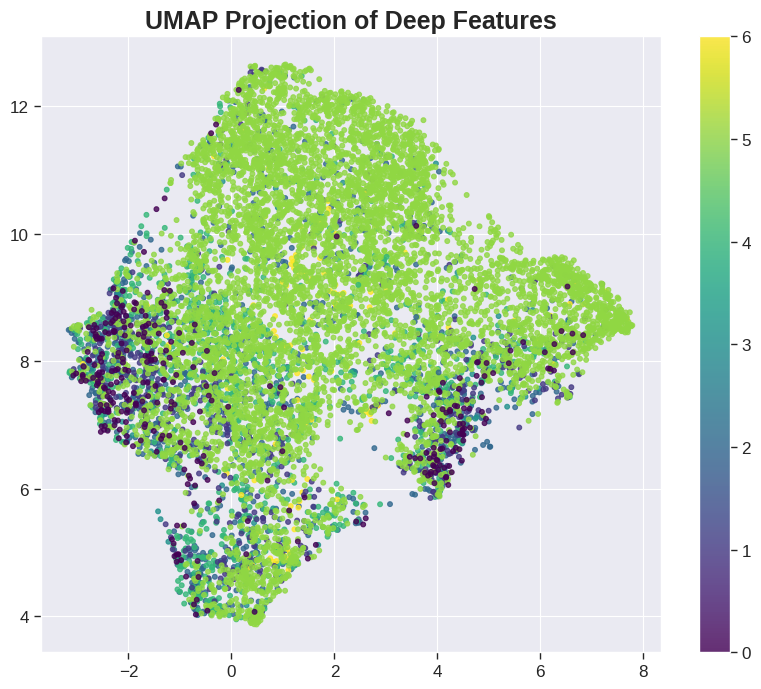

In [ ]:
!pip install umap-learn

import umap
reducer = umap.UMAP(n_neighbors=20, min_dist=0.1, metric='cosine')

embedding = reducer.fit_transform(deep_features)

plt.figure(figsize=(10,8))
scatter = plt.scatter(embedding[:,0], embedding[:,1],
                      c=df.dx_encoded, cmap="viridis", s=12, alpha=0.8)
plt.colorbar(scatter)
plt.title("UMAP Projection of Deep Features", fontsize=18, weight="bold")
save_fig("umap_deep_features")
plt.show()
